In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import glob
import os
from bs4 import BeautifulSoup as bs
import requests
import re

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose

In [124]:
raw_df_12_14_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_12_14_2020.csv')
print(f"The 12_14_2020 dataset contains {len(raw_df_12_14_2020)} AirBnb listings; the avg price is ${round(raw_df_12_14_2020['price'].mean(),2)}.")

raw_df_01_10_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_01_10_2021.csv')
print(f"The dataset contains {len(raw_df_01_10_2021)} AirBnb listings.")

raw_df_02_08_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_02_08_2021.csv')
print(f"The dataset contains {len(raw_df_02_08_2021)} AirBnb listings.")

raw_df_03_04_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_03_04_2021.csv')
print(f"The dataset contains {len(raw_df_03_04_2021)} AirBnb listings.")

raw_df_04_10_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_04_10_2021.csv')
print(f"The dataset contains {len(raw_df_04_10_2021)} AirBnb listings.")

raw_df_06_07_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_06_07_2021.csv')
print(f"The 06_07_2021 dataset contains {len(raw_df_06_07_2021)} AirBnb listings; the avg price is ${round(raw_df_06_07_2021['price'].mean(),2)}.")


The 12_14_2020 dataset contains 65917 AirBnb listings; the avg price is $114.28.
The dataset contains 65256 AirBnb listings.
The dataset contains 64690 AirBnb listings.
The dataset contains 64347 AirBnb listings.
The dataset contains 63090 AirBnb listings.
The 06_07_2021 dataset contains 61105 AirBnb listings; the avg price is $117.4.


In [125]:
df_list = [raw_df_12_14_2020, raw_df_01_10_2021, raw_df_02_08_2021, raw_df_03_04_2021, raw_df_04_10_2021,
          raw_df_06_07_2021]
dates = ['12_14_2020', '01_10_2021', '02_08_2021','03_04_2021', '04_10_2021',
        '06_07_2021', '07_06_2021', '09_09_2021', '10_09_2021']

df_final = []

def airbnb_parse(df_list, dates):
    for date in dates:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_{date}.csv")
        print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for date in dates:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_{date}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final.append(
        {
            'Date of scrape': date.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final)
        

In [126]:
airbnb_parse(df_list, dates)

The 12_14_2020 Paris dataset contains 65917 AirBnb listings -- the avg price is $114.28.
The 01_10_2021 Paris dataset contains 65256 AirBnb listings -- the avg price is $112.89.
The 02_08_2021 Paris dataset contains 64690 AirBnb listings -- the avg price is $113.1.
The 03_04_2021 Paris dataset contains 64347 AirBnb listings -- the avg price is $112.39.
The 04_10_2021 Paris dataset contains 63090 AirBnb listings -- the avg price is $112.92.
The 06_07_2021 Paris dataset contains 61105 AirBnb listings -- the avg price is $117.4.
The 07_06_2021 Paris dataset contains 51040 AirBnb listings -- the avg price is $124.53.
The 09_09_2021 Paris dataset contains 50133 AirBnb listings -- the avg price is $125.89.
The 10_09_2021 Paris dataset contains 49634 AirBnb listings -- the avg price is $130.2.


In [127]:
paris_summary = airbnb_to_frame(df_list, dates)
paris_summary['Date of scrape'] = pd.to_datetime(paris_summary['Date of scrape'])

In [128]:
paris_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0     2020-12-14          65917     114.28          80.0          0   
1     2021-01-10          65256     112.89          80.0          0   
2     2021-02-08          64690     113.10          80.0          0   
3     2021-03-04          64347     112.39          80.0          0   
4     2021-04-10          63090     112.92          80.0          0   
5     2021-06-07          61105     117.40          80.0          0   
6     2021-07-06          51040     124.53          85.0          0   
7     2021-09-09          50133     125.89          88.0          0   
8     2021-10-09          49634     130.20          90.0          0   

   Max Price  Avg reviews per month  
0      11600                   0.69  
1      11600                   0.68  
2      12000                   0.66  
3      12000                   0.66  
4      11600                   0.63  
5      11600                   0.63  
6      11600                   0.71  
7      11600                   0.79  
8      11600                   0.81

<AxesSubplot:xlabel='Date of scrape'>

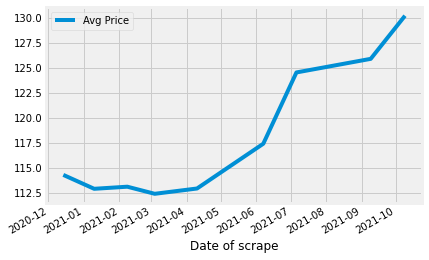

In [129]:
paris_summary.plot(x='Date of scrape', y='Avg Price')

In [130]:
paris_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date of scrape         9 non-null      datetime64[ns]
 1   # of Listings          9 non-null      int64         
 2   Avg Price              9 non-null      float64       
 3   Median Price           9 non-null      float64       
 4   Min Price              9 non-null      int64         
 5   Max Price              9 non-null      int64         
 6   Avg reviews per month  9 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 632.0 bytes


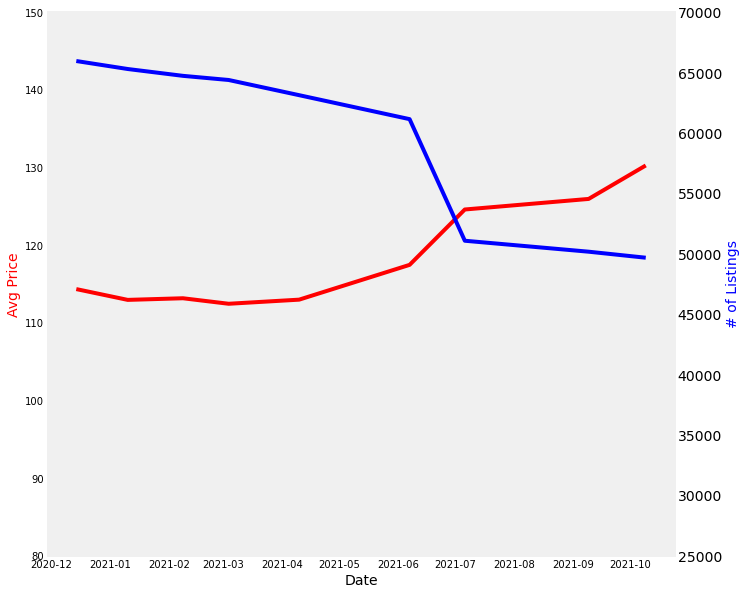

In [131]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use('fivethirtyeight')
ax.plot(paris_summary['Date of scrape'], paris_summary['Avg Price'], color='red')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Avg Price', color='red', fontsize=14)
ax.set_ylim([80, 150])
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(paris_summary['Date of scrape'], paris_summary['# of Listings'], color='blue')
ax2.set_ylabel("# of Listings",color="blue",fontsize=14)
ax2.set_ylim([25000, 70000])
ax2.grid(False)
plt.show()


In [132]:
raw_df_12_14_2020.head()

id                                 name  host_id            host_name  \
0  2577     Loft for 4 by Canal Saint Martin     2827               Karine   
1  3109                         zen and calm     3631                 Anne   
2  4890  Quiet Historic & Cute  +Free Cruise     6792  Ryan Of Cobblestone   
3  5396       Explore the heart of old Paris     7903               Borzou   
4  7397     MARAIS - 2ROOMS APT - 2/4 PEOPLE     2626               Franck   

   neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0                  NaN        Entrepôt  48.86993    2.36251  Entire home/apt   
1                  NaN    Observatoire  48.83349    2.31852  Entire home/apt   
2                  NaN          Temple  48.86409    2.35651  Entire home/apt   
3                  NaN  Hôtel-de-Ville  48.85207    2.35871  Entire home/apt   
4                  NaN  Hôtel-de-Ville  48.85758    2.35275  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    125               3                  1  2019-01-02               0.04   
1     60               2                  9  2019-10-24               0.19   
2     69               5                 23  2020-09-07               0.21   
3     62               1                231  2020-11-05               1.65   
4     53              15                269  2020-08-15               2.28   

   calculated_host_listings_count  availability_365  
0                               1               364  
1                               1                 2  
2                              14                67  
3                               1                90  
4                               3               348

In [133]:
path = os.getcwd()
path

'/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb'

In [134]:
glob.glob('data/**/', recursive=True)

['data/',
 'data/Barcelona/',
 'data/Barcelona/2021-09-10/',
 'data/Barcelona/2021-09-10/visualisations/',
 'data/Barcelona/2021-09-10/data/',
 'data/Austin/',
 'data/Austin/2021-09-14/',
 'data/Austin/2021-09-14/visualisations/',
 'data/Austin/2021-09-14/data/',
 'data/Beijing/',
 'data/Beijing/2021-09-28/',
 'data/Beijing/2021-09-28/visualisations/',
 'data/Beijing/2021-09-28/data/',
 'data/Columbus/',
 'data/Columbus/2021-09-27/',
 'data/Columbus/2021-09-27/visualisations/',
 'data/Columbus/2021-09-27/data/',
 'data/Dublin/',
 'data/Dublin/2021-09-12/',
 'data/Dublin/2021-09-12/visualisations/',
 'data/Dublin/2021-09-12/data/',
 'data/Ghent/',
 'data/Ghent/2021-09-28/',
 'data/Ghent/2021-09-28/visualisations/',
 'data/Ghent/2021-09-28/data/',
 'data/Asheville/',
 'data/Asheville/2020-10-24/',
 'data/Asheville/2020-10-24/visualisations/',
 'data/Asheville/2020-10-24/data/',
 'data/Cambridge/',
 'data/Cambridge/2021-09-29/',
 'data/Cambridge/2021-09-29/visualisations/',
 'data/Cambrid

In [135]:
def get_listings():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Barcelona')+td>a[onclick*=listings_visualisation]")]
    subfolder_names = ['raw_data','cleaned_data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data2',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data2/raw_data/{date}.csv',index=False)
        
def clean_df(df):
    """Function cleaning listing.csv files (fill NaN values, drop inappropriate columns,
    replace Airbnb neighbourhoods by official district numbers). It is used in the get_hist function."""
    df.drop('neighbourhood_group',axis=1,inplace=True)
    df.neighbourhood = df.neighbourhood.map(district_dict)
    df.rename(columns={'neighbourhood':'district'},inplace=True)
    df.reviews_per_month[df.number_of_reviews==0] = df.reviews_per_month[df.number_of_reviews==0].fillna(0)
    df.last_review[df.number_of_reviews==0] = df.last_review[df.number_of_reviews==0].fillna('Never')
    df[['name','host_name']] = df[['name','host_name']].fillna('Unknown')
    return df

def get_hist_df():
    """Function concatenating downloaded listing.csv files into a hist_df DataFrame.
    A column 'date' (YYYY-MM) is added to hist_df, so that we can still
    access the time period on which the data was originally scraped."""
    hist_df = pd.DataFrame()
    for file in os.listdir('data/raw-data'):
        temp_df = pd.read_csv(f'data/raw-data/{file}')
        if not file.startswith('.'):
            temp_df['date'] = re.findall(r'20\d{2}-\d{2}',file)[0]
            hist_df = pd.concat([hist_df,temp_df],ignore_index=True)
    hist_df = clean_df(hist_df)
    hist_df.to_csv(f'data/cleaned-data/listings-hist.csv',index=False)
    return hist_df

In [136]:
get_listings()


In [ ]:
city_list = ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona',
            'Berlin', 'Bordeaux', 'Brussels', 'Copenhagen',
            'Crete', 'Dublin', 'Edinburgh', 'Florence',
            'Geneva', 'Istanbul', 'Lisbon', 'London',
            'Lyon', 'Madrid', 'Milan', 'Munich', 'Naples',
            'Oslo','Prague','Rome','Sicliy','Stockholm','Venice',
            'Vienna', 'Zurich']

In [236]:


def get_listings():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Zurich')+td>a[onclick*=listings_visualisation]")]
    subfolder_names = ['raw_data']
    cities = city_list
    for subfolder_name in subfolder_names:
        for city in city_list:
                    os.makedirs(os.path.join('data2',subfolder_name, city))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data2/raw_data/Zurich_{date}.csv',index=False)

In [237]:
get_listings()

In [238]:
path = os.getcwd()
path

'/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb'

In [240]:


%cd "/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1"

/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1


In [243]:
glob.glob('**/**', recursive=True)

['',
 'Zurich',
 'Zurich/Zurich_2021-03.csv',
 'Zurich/Zurich_2021-02.csv',
 'Zurich/Zurich_2021-01.csv',
 'Zurich/Zurich_2021-04.csv',
 'Zurich/Zurich_2021-10.csv',
 'Zurich/Zurich_2021-06.csv',
 'Zurich/Zurich_2021-07.csv',
 'Zurich/Zurich_2021-09.csv',
 'Zurich/Zurich_2021-08.csv',
 'Zurich/Zurich_2020-12.csv',
 'Zurich/Zurich_2020-11.csv',
 'Barcelona',
 'Barcelona/Barcelona_2020-12.csv',
 'Barcelona/Barcelona_2021-08.csv',
 'Barcelona/Barcelona_2021-09.csv',
 'Barcelona/Barcelona_2021-01.csv',
 'Barcelona/Barcelona_2021-02.csv',
 'Barcelona/Barcelona_2021-03.csv',
 'Barcelona/Barcelona_2021-07.csv',
 'Barcelona/Barcelona_2021-06.csv',
 'Barcelona/Barcelona_2021-04.csv',
 'Barcelona/Barcelona_2021-10.csv',
 'Barcelona/Barcelona_2021-05.csv',
 'Milan',
 'Milan/Milan_2020-12.csv',
 'Milan/Milan_2021-09.csv',
 'Milan/Milan_2021-08.csv',
 'Milan/Milan_2021-06.csv',
 'Milan/Milan_2021-07.csv',
 'Milan/Milan_2021-04.csv',
 'Milan/Milan_2021-10.csv',
 'Milan/Milan_2021-01.csv',
 'Milan/Mi

In [244]:
glob.glob('**/**')

['Zurich/Zurich_2021-03.csv',
 'Zurich/Zurich_2021-02.csv',
 'Zurich/Zurich_2021-01.csv',
 'Zurich/Zurich_2021-04.csv',
 'Zurich/Zurich_2021-10.csv',
 'Zurich/Zurich_2021-06.csv',
 'Zurich/Zurich_2021-07.csv',
 'Zurich/Zurich_2021-09.csv',
 'Zurich/Zurich_2021-08.csv',
 'Zurich/Zurich_2020-12.csv',
 'Zurich/Zurich_2020-11.csv',
 'Barcelona/Barcelona_2020-12.csv',
 'Barcelona/Barcelona_2021-08.csv',
 'Barcelona/Barcelona_2021-09.csv',
 'Barcelona/Barcelona_2021-01.csv',
 'Barcelona/Barcelona_2021-02.csv',
 'Barcelona/Barcelona_2021-03.csv',
 'Barcelona/Barcelona_2021-07.csv',
 'Barcelona/Barcelona_2021-06.csv',
 'Barcelona/Barcelona_2021-04.csv',
 'Barcelona/Barcelona_2021-10.csv',
 'Barcelona/Barcelona_2021-05.csv',
 'Milan/Milan_2020-12.csv',
 'Milan/Milan_2021-09.csv',
 'Milan/Milan_2021-08.csv',
 'Milan/Milan_2021-06.csv',
 'Milan/Milan_2021-07.csv',
 'Milan/Milan_2021-04.csv',
 'Milan/Milan_2021-10.csv',
 'Milan/Milan_2021-01.csv',
 'Milan/Milan_2021-03.csv',
 'Milan/Milan_2021-02.

In [246]:
list_of_csv = glob.glob('**/**')
list_of_csv

['Zurich/Zurich_2021-03.csv',
 'Zurich/Zurich_2021-02.csv',
 'Zurich/Zurich_2021-01.csv',
 'Zurich/Zurich_2021-04.csv',
 'Zurich/Zurich_2021-10.csv',
 'Zurich/Zurich_2021-06.csv',
 'Zurich/Zurich_2021-07.csv',
 'Zurich/Zurich_2021-09.csv',
 'Zurich/Zurich_2021-08.csv',
 'Zurich/Zurich_2020-12.csv',
 'Zurich/Zurich_2020-11.csv',
 'Barcelona/Barcelona_2020-12.csv',
 'Barcelona/Barcelona_2021-08.csv',
 'Barcelona/Barcelona_2021-09.csv',
 'Barcelona/Barcelona_2021-01.csv',
 'Barcelona/Barcelona_2021-02.csv',
 'Barcelona/Barcelona_2021-03.csv',
 'Barcelona/Barcelona_2021-07.csv',
 'Barcelona/Barcelona_2021-06.csv',
 'Barcelona/Barcelona_2021-04.csv',
 'Barcelona/Barcelona_2021-10.csv',
 'Barcelona/Barcelona_2021-05.csv',
 'Milan/Milan_2020-12.csv',
 'Milan/Milan_2021-09.csv',
 'Milan/Milan_2021-08.csv',
 'Milan/Milan_2021-06.csv',
 'Milan/Milan_2021-07.csv',
 'Milan/Milan_2021-04.csv',
 'Milan/Milan_2021-10.csv',
 'Milan/Milan_2021-01.csv',
 'Milan/Milan_2021-03.csv',
 'Milan/Milan_2021-02.

In [257]:
PATH = '/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/'


In [258]:

# loop over the list of csv files
for f in list_of_csv:
      
    # read the csv file
    df = pd.read_csv(PATH+f)
      
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()

Location: Zurich/Zurich_2021-03.csv
File Name: Zurich/Zurich_2021-03.csv
Content:


id                                           name    host_id  \
0        73282                          Clean, central, quiet     377532   
1       143821              marvelous LOFT in SIHLCITY Zürich     697307   
2       178448                   a lovely place, top location     854016   
3       204586                very nice luxury city apartment    1004816   
4       216395             city studio, modern meets colonial    1116961   
...        ...                                            ...        ...   
1790  48784625                            Well located studio  393560500   
1791  48808760        Loft-style studio in Zurich city center   53736232   
1792  48823438                             3.5 rooms for rent   25022991   
1793  48826639                           Private Cozy Bedroom   28702056   
1794  48879374  Zimmer in zentraler, heller Wohnung in Zürich  394260729   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0       Simona             Kreis 3      Sihlfeld  47.37374    8.51957   
1        Erhan             Kreis 3  Alt-Wiedikon  47.35724    8.52304   
2     Delphine             Kreis 2          Enge  47.36565    8.52753   
3        Aicha            Kreis 10         Höngg  47.40656    8.48465   
4          NaN             Kreis 3      Sihlfeld  47.37880    8.50766   
...        ...                 ...           ...       ...        ...   
1790   Alfredo             Kreis 7      Fluntern  47.38080    8.55922   
1791      Heta             Kreis 2          Enge  47.36592    8.53500   
1792     Nahla             Kreis 9    Altstetten  47.38982    8.48864   
1793       NaN             Kreis 3  Alt-Wiedikon  47.36826    8.50815   
1794   Florine             Kreis 3      Sihlfeld  47.37313    8.51724   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    100               3                 49  2019-04-27   
1     Entire home/apt    200               3                  0         NaN   
2        Private room     60               5                  9  2016-05-10   
3        Private room    200               3                  0         NaN   
4     Entire home/apt    210               1                  0         NaN   
...               ...    ...             ...                ...         ...   
1790  Entire home/apt     80              30                  0         NaN   
1791  Entire home/apt    125               4                  0         NaN   
1792  Entire home/apt     95               5                  0         NaN   
1793     Private room     50              15                  0         NaN   
1794     Private room     46               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.45                               1               114  
1                   NaN                               1               365  
2                  0.08                               1               216  
3                   NaN                               1               364  
4                   NaN                               1               365  
...                 ...                             ...               ...  
1790                NaN                               1               362  
1791                NaN                               1                60  
1792                NaN                               3               146  
1793                NaN                               1                 0  
1794                NaN                               1                31  

[1795 rows x 16 columns]


Location: Zurich/Zurich_2021-02.csv
File Name: Zurich/Zurich_2021-02.csv
Content:


id                                               name    host_id  \
0        73282                              Clean, central, quiet     377532   
1       143821                  marvelous LOFT in SIHLCITY Zürich     697307   
2       178448                       a lovely place, top location     854016   
3       204586                    very nice luxury city apartment    1004816   
4       216395                 city studio, modern meets colonial    1116961   
...        ...                                                ...        ...   
1801  48290905                        Wohnen am Klusplatz  HERMES  336827675   
1802  48291198  Ruhiges Gäste- und Arbeitszimmer - Nähe Uni Ir...   28169469   
1803  48293143            Grosse Altbau Wohnung im Herzen Zürichs   14539949   
1804  48295148        Wunderschöne Altbau Dachwohnung an Top Lage    2827347   
1805  48308951                  Cool Double Room, Shared bathroom    2130301   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0       Simona             Kreis 3      Sihlfeld  47.37374    8.51957   
1        Erhan             Kreis 3  Alt-Wiedikon  47.35724    8.52304   
2     Delphine             Kreis 2          Enge  47.36565    8.52753   
3        Aicha            Kreis 10         Höngg  47.40656    8.48465   
4        Fabio             Kreis 3      Sihlfeld  47.37880    8.50766   
...        ...                 ...           ...       ...        ...   
1801   Tiziana             Kreis 7    Hirslanden  47.36258    8.56834   
1802  Marianna            Kreis 11      Oerlikon  47.40398    8.55365   
1803       Sam             Kreis 1       Rathaus  47.37433    8.54463   
1804   Adriana             Kreis 3  Alt-Wiedikon  47.36634    8.51392   
1805    Fabian            Kreis 11     Affoltern  47.41460    8.51669   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    100               3                 49  2019-04-27   
1     Entire home/apt    200               3                  0         NaN   
2        Private room     60               5                  9  2016-05-10   
3        Private room    200               3                  0         NaN   
4     Entire home/apt    210               1                  0         NaN   
...               ...    ...             ...                ...         ...   
1801  Entire home/apt    108               4                  0         NaN   
1802     Private room     50               3                  0         NaN   
1803  Entire home/apt    120              30                  0         NaN   
1804  Entire home/apt     80               3                  0         NaN   
1805     Private room     45               7                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.46                               1                85  
1                   NaN                               1               362  
2                  0.08                               1               187  
3                   NaN                               1               364  
4                   NaN                               1               365  
...                 ...                             ...               ...  
1801                NaN                               6               271  
1802                NaN                               1               176  
1803                NaN                               1                61  
1804                NaN                               2                23  
1805                NaN                               6               124  

[1806 rows x 16 columns]


Location: Zurich/Zurich_2021-01.csv
File Name: Zurich/Zurich_2021-01.csv
Content:


id                                             name    host_id  \
0        73282                            Clean, central, quiet     377532   
1       143821                marvelous LOFT in SIHLCITY Zürich     697307   
2       178448                     a lovely place, top location     854016   
3       204586                  very nice luxury city apartment    1004816   
4       216395               city studio, modern meets colonial    1116961   
...        ...                                              ...        ...   
1819  47893884                 Cosy place available in February  115247856   
1820  47902159     Charming apartment for longstay close to ETH     845972   
1821  47907573                  Comfortable safe clean  bedroom   19091451   
1822  47933442  Sonnige Dachwohnung - in der Nähe vom Zürichsee    7469660   
1823  47946509                Privates Zimmer in riesen Wohnung   54654553   

         host_name neighbourhood_group neighbourhood  latitude  longitude  \
0           Simona             Kreis 3      Sihlfeld  47.37374    8.51957   
1            Erhan             Kreis 3  Alt-Wiedikon  47.35724    8.52304   
2         Delphine             Kreis 2          Enge  47.36565    8.52753   
3            Aicha            Kreis 10         Höngg  47.40656    8.48465   
4            Fabio             Kreis 3      Sihlfeld  47.37880    8.50766   
...            ...                 ...           ...       ...        ...   
1819      Emanuela             Kreis 3   Friesenberg  47.35257    8.51023   
1820        Marisa             Kreis 7      Fluntern  47.37860    8.55764   
1821  Brunno Cesar             Kreis 9    Altstetten  47.38637    8.49252   
1822        Mirela             Kreis 8       Seefeld  47.35565    8.55095   
1823        Julian             Kreis 9    Altstetten  47.38171    8.49464   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    100               3                 49  2019-04-27   
1     Entire home/apt    200               3                  0         NaN   
2        Private room     60               5                  9  2016-05-10   
3        Private room    200               3                  0         NaN   
4     Entire home/apt    205               1                  0         NaN   
...               ...    ...             ...                ...         ...   
1819  Entire home/apt     76               5                  0         NaN   
1820  Entire home/apt     75              30                  0         NaN   
1821     Private room     40               2                  0         NaN   
1822  Entire home/apt    120               1                  0         NaN   
1823     Private room     35               4                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.46                               1                58  
1                   NaN                               1               365  
2                  0.08                               1               160  
3                   NaN                               1               364  
4                   NaN                               1               364  
...                 ...                             ...               ...  
1819                NaN                               1                59  
1820                NaN                              14                30  
1821                NaN                               1                28  
1822                NaN                               1               360  
1823                NaN                               1                38  

[1824 rows x 16 columns]


Location: Zurich/Zurich_2021-04.csv
File Name: Zurich/Zurich_2021-04.csv
Content:


id                                               name    host_id  \
0        73282                              Clean, central, quiet     377532   
1       143821                  marvelous LOFT in SIHLCITY Zürich     697307   
2       178448                       a lovely place, top location     854016   
3       204586                    very nice luxury city apartment    1004816   
4       216395                 city studio, modern meets colonial    1116961   
...        ...                                                ...        ...   
1780  49433949       East meets West - Exclusive Design Penthouse   83271512   
1781  49435936  large 6.5 rooms apartment with garden and parking  100757304   
1782  49436698        3 rooms apartment with parking in Stettbach  100757304   
1783  49444506    Schöne, grosse Wohnung am Standtrand von Zürich  239167734   
1784  49454154        Apartment in Zürich, 20 min to main station   79617276   

      host_name neighbourhood_group         neighbourhood  latitude  \
0        Simona             Kreis 3              Sihlfeld  47.37374   
1         Erhan             Kreis 3          Alt-Wiedikon  47.35724   
2      Delphine             Kreis 2                  Enge  47.36565   
3         Aicha            Kreis 10                 Höngg  47.40656   
4         Fabio             Kreis 3              Sihlfeld  47.37880   
...         ...                 ...                   ...       ...   
1780  José-Luis             Kreis 7             Hottingen  47.36644   
1781     Simone            Kreis 12            Hirzenbach  47.39838   
1782     Simone            Kreis 12            Hirzenbach  47.39969   
1783   Benjamin            Kreis 11             Affoltern  47.42531   
1784       Paul            Kreis 12  Schwamendingen-Mitte  47.40870   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0       8.51957  Entire home/apt    100               3                 49   
1       8.52304  Entire home/apt    200               3                  0   
2       8.52753     Private room     60               5                  9   
3       8.48465     Private room    200               3                  0   
4       8.50766  Entire home/apt    210               1                  0   
...         ...              ...    ...             ...                ...   
1780    8.55842  Entire home/apt    288               2                  0   
1781    8.58992  Entire home/apt     92               1                  0   
1782    8.59065  Entire home/apt     76               5                  0   
1783    8.52024     Private room     32               1                  0   
1784    8.58114  Entire home/apt     57               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-04-27               0.45                               1   
1            NaN                NaN                               1   
2     2016-05-10               0.08                               1   
3            NaN                NaN                               1   
4            NaN                NaN                               1   
...          ...                ...                             ...   
1780         NaN                NaN                              13   
1781         NaN                NaN                               2   
1782         NaN                NaN                               2   
1783         NaN                NaN                               1   
1784         NaN                NaN                               1   

      availability_365  
0                  147  
1                  365  
2                  249  
3                    1  
4                  365  
...                ...  
1780                 0  
1781               362  
1782                 1  
1783                14  
1784                26  

[1785 rows x 16 columns]


Location: Zurich/Zurich_2021-10.csv
File Name: Zurich/Zurich_2021-10.csv
Content:


id                                              name    host_id  \
0        73282                             Clean, central, quiet     377532   
1        86645                   Stadium Letzigrund - by Airhome     475053   
2       143821                 marvelous LOFT in SIHLCITY Zürich     697307   
3       178448                      a lovely place, top location     854016   
4       204586                   very nice luxury city apartment    1004816   
...        ...                                               ...        ...   
1820  52945329     3.5 room apartment in Zurich-Oerlikon (BA-31)   25291258   
1821  52946446          Lovely top floor apartment in district 4   51488519   
1822  52962903  1 bedroom apt, porch with a view, central Zurich  127306659   
1823  53010664   Schöne ruhige 3.5 Zr. Wohnung in Zürich-Witikon   18368691   
1824  53026236                            Viktoria Budget Hostel  293156053   

          host_name neighbourhood_group neighbourhood  latitude  longitude  \
0            Simona             Kreis 3      Sihlfeld  47.37374    8.51957   
1             James             Kreis 3      Sihlfeld  47.38038    8.50461   
2             Erhan             Kreis 3  Alt-Wiedikon  47.35724    8.52304   
3          Delphine             Kreis 2          Enge  47.36565    8.52753   
4             Aicha            Kreis 10         Höngg  47.40656    8.48465   
...             ...                 ...           ...       ...        ...   
1820  Delta Estates            Kreis 11      Oerlikon  47.40939    8.54068   
1821         Denise             Kreis 4          Hard  47.38089    8.51532   
1822        Michael             Kreis 2          Enge  47.36515    8.52684   
1823          Roger             Kreis 7       Witikon  47.36507    8.59591   
1824           Lena            Kreis 10         Höngg  47.39942    8.50025   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    100               3                 49  2019-03-28   
1     Entire home/apt    180               1                 50  2021-07-16   
2     Entire home/apt    200               3                  0         NaN   
3        Private room     60               5                  9  2016-05-10   
4        Private room    200               3                  0         NaN   
...               ...    ...             ...                ...         ...   
1820  Entire home/apt    104               7                  0         NaN   
1821  Entire home/apt    149              10                  0         NaN   
1822  Entire home/apt    110               1                  0         NaN   
1823  Entire home/apt     80               1                  0         NaN   
1824      Shared room     36               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.44                               1                 0   
1                  0.52                              18                 0   
2                   NaN                               1               361   
3                  0.13                               1                 0   
4                   NaN                               1               364   
...                 ...                             ...               ...   
1820                NaN                              16               355   
1821                NaN                               1                53   
1822                NaN                               1                85   
1823                NaN                               1               347   
1824                NaN                               3               365   

      number_of_reviews_ltm  license  
0                         0      NaN  
1                         1      NaN  
2                         0      NaN  
3                         0      NaN  
4                         0      NaN  
...               


Location: Zurich/Zurich_2021-06.csv
File Name: Zurich/Zurich_2021-06.csv
Content:


id                                               name   host_id  \
0        73282                              Clean, central, quiet    377532   
1        86645                    Stadium Letzigrund - by Airhome    475053   
2       143821                  marvelous LOFT in SIHLCITY Zürich    697307   
3       178448                       a lovely place, top location    854016   
4       204586                    very nice luxury city apartment   1004816   
...        ...                                                ...       ...   
1823  50668041                Lovely apartment with a meadow view  24686861   
1824  50688667  Great apartment - 5 minutes from the Zurich lake!   5431046   
1825  50691075     Bright studio in the city center (Greenyard 1)  23561865   
1826  50700054                     Schöne 1-Zimlerwohnung zentral  44371369   
1827  50713082               Schöne ruhige Wohnung mit 2 Terrasse  19329570   

     host_name neighbourhood_group neighbourhood   latitude  longitude  \
0       Simona             Kreis 3      Sihlfeld  47.373740   8.519570   
1        James             Kreis 3      Sihlfeld  47.380380   8.504610   
2        Erhan             Kreis 3  Alt-Wiedikon  47.357240   8.523040   
3     Delphine             Kreis 2          Enge  47.365650   8.527530   
4        Aicha            Kreis 10         Höngg  47.406560   8.484650   
...        ...                 ...           ...        ...        ...   
1823    Marius             Kreis 3      Sihlfeld  47.370620   8.503380   
1824      Anna             Kreis 2          Enge  47.364200   8.530990   
1825     Tania             Kreis 6   Unterstrass  47.382195   8.544195   
1826   Emanuel             Kreis 6    Oberstrass  47.384010   8.546810   
1827    Blanca             Kreis 3  Alt-Wiedikon  47.357130   8.515360   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    100               3                 49  2019-03-28   
1     Entire home/apt    180               1                 49  2017-10-24   
2     Entire home/apt    200               3                  0         NaN   
3        Private room     60               5                  9  2016-05-10   
4        Private room    200               3                  0         NaN   
...               ...    ...             ...                ...         ...   
1823  Entire home/apt     50              60                  0         NaN   
1824  Entire home/apt    170               5                  0         NaN   
1825  Entire home/apt     95               4                  0         NaN   
1826  Entire home/apt     83               1                  0         NaN   
1827  Entire home/apt     95               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.46                               1                 0  
1                  0.53                              18               179  
2                   NaN                               1               276  
3                  0.14                               1               108  
4                   NaN                               1               364  
...                 ...                             ...               ...  
1823                NaN                               1               358  
1824                NaN                               1                14  
1825                NaN                              36                41  
1826                NaN                               1               360  
1827                NaN                               1               325  

[1828 rows x 16 columns]


Location: Zurich/Zurich_2021-07.csv
File Name: Zurich/Zurich_2021-07.csv
Content:


id                                               name    host_id  \
0        73282                              Clean, central, quiet     377532   
1        86645                    Stadium Letzigrund - by Airhome     475053   
2       143821                  marvelous LOFT in SIHLCITY Zürich     697307   
3       178448                       a lovely place, top location     854016   
4       204586                    very nice luxury city apartment    1004816   
...        ...                                                ...        ...   
1894  51136683  Renovated & Quiet Studio Near City Center & Fo...  407449073   
1895  51140658  Renovated & Quiet Studio Near City Center & Fo...  407449073   
1896  51140947  Renovated & Quiet Studio Near City Center & Fo...  407449073   
1897  51141201  Renovated & Quiet Studio Near City Center & Fo...  407449073   
1898  51147408              Coole City Zimmer mitten in der Stadt  157110839   

     host_name neighbourhood_group neighbourhood   latitude  longitude  \
0       Simona             Kreis 3      Sihlfeld  47.373740   8.519570   
1        James             Kreis 3      Sihlfeld  47.380380   8.504610   
2        Erhan             Kreis 3  Alt-Wiedikon  47.357240   8.523040   
3     Delphine             Kreis 2          Enge  47.365650   8.527530   
4        Aicha            Kreis 10         Höngg  47.406560   8.484650   
...        ...                 ...           ...        ...        ...   
1894   Jigyasa             Kreis 3   Friesenberg  47.359147   8.496808   
1895   Jigyasa             Kreis 3   Friesenberg  47.358442   8.498238   
1896   Jigyasa             Kreis 3   Friesenberg  47.357987   8.498474   
1897   Jigyasa             Kreis 3   Friesenberg  47.359944   8.496780   
1898      Tina             Kreis 1   Hochschulen  47.367531   8.546371   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    100               3                 49  2019-03-28   
1     Entire home/apt    180               1                 50  2021-07-16   
2     Entire home/apt    200               3                  0         NaN   
3        Private room     60               5                  9  2016-05-10   
4        Private room    200               3                  0         NaN   
...               ...    ...             ...                ...         ...   
1894     Private room     75               1                  0         NaN   
1895     Private room     75               1                  0         NaN   
1896     Private room     75               1                  0         NaN   
1897     Private room     75               1                  0         NaN   
1898     Private room     95               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.46                               1                 0   
1                  0.54                              18                 0   
2                   NaN                               1               293   
3                  0.14                               1               128   
4                   NaN                               1               364   
...                 ...                             ...               ...   
1894                NaN                               9               199   
1895                NaN                               9               179   
1896                NaN                               9               179   
1897                NaN                               9               179   
1898                NaN                               1               359   

      number_of_reviews_ltm  license  
0                         0      NaN  
1                         1      NaN  
2                         0      NaN  
3                         0      NaN  
4                         0      NaN  
...                     ...      ...  
1894           


Location: Zurich/Zurich_2021-09.csv
File Name: Zurich/Zurich_2021-09.csv
Content:


id                                              name    host_id  \
0        73282                             Clean, central, quiet     377532   
1        86645                   Stadium Letzigrund - by Airhome     475053   
2       143821                 marvelous LOFT in SIHLCITY Zürich     697307   
3       178448                      a lovely place, top location     854016   
4       204586                   very nice luxury city apartment    1004816   
...        ...                                               ...        ...   
1830  52462401  Möblierte Wohnung in Schwamendingen für 2 Monate    9561712   
1831  52477679       Private room in a cosy appartment in Zurich  143111449   
1832  52491701    Quiet double room with large balcony - Kreis 7   43111694   
1833  52508850               1.5 room apartment in Zurich (HG-7)   25291258   
1834  52512196  Modern & Chic Apartment in the heart of Zurich♥️  173887854   

          host_name neighbourhood_group         neighbourhood  latitude  \
0            Simona             Kreis 3              Sihlfeld  47.37374   
1             James             Kreis 3              Sihlfeld  47.38038   
2             Erhan             Kreis 3          Alt-Wiedikon  47.35724   
3          Delphine             Kreis 2                  Enge  47.36565   
4             Aicha            Kreis 10                 Höngg  47.40656   
...             ...                 ...                   ...       ...   
1830          Jonas            Kreis 12  Schwamendingen-Mitte  47.40716   
1831          Faiza             Kreis 6           Unterstrass  47.39905   
1832        Susanna             Kreis 7               Witikon  47.35666   
1833  Delta Estates             Kreis 1           Hochschulen  47.37010   
1834        Michael             Kreis 3              Sihlfeld  47.37074   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0       8.51957  Entire home/apt    100               3                 49   
1       8.50461  Entire home/apt    180               1                 50   
2       8.52304  Entire home/apt    200               3                  0   
3       8.52753     Private room     60               5                  9   
4       8.48465     Private room    200               3                  0   
...         ...              ...    ...             ...                ...   
1830    8.58436  Entire home/apt     50              57                  0   
1831    8.53704     Private room     54               2                  0   
1832    8.60018     Private room     45              28                  0   
1833    8.54817  Entire home/apt     85               7                  0   
1834    8.52139  Entire home/apt    190               5                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-03-28               0.45                               1   
1     2021-07-16               0.52                              18   
2            NaN                NaN                               1   
3     2016-05-10               0.13                               1   
4            NaN                NaN                               1   
...          ...                ...                             ...   
1830         NaN                NaN                               1   
1831         NaN                NaN                               2   
1832         NaN                NaN                              10   
1833         NaN                NaN                              12   
1834         NaN                NaN                               1   

      availability_365  number_of_reviews_ltm  license  
0                    0                      0      NaN  
1                    0                      1      NaN  
2                  364                      0      NaN  
3                    0                      0      NaN  
4                  364                      0      NaN  
...                ...        


Location: Zurich/Zurich_2021-08.csv
File Name: Zurich/Zurich_2021-08.csv
Content:


id                                               name    host_id  \
0        73282                              Clean, central, quiet     377532   
1        86645                    Stadium Letzigrund - by Airhome     475053   
2       143821                  marvelous LOFT in SIHLCITY Zürich     697307   
3       178448                       a lovely place, top location     854016   
4       204586                    very nice luxury city apartment    1004816   
...        ...                                                ...        ...   
1860  51898754   White Studio with a lovely view over Zurich City   22513551   
1861  51899491        New Studio in the Center of Zurich Old Town  420370006   
1862  51902007               New Studio in Zurich Center/Downtown  420370006   
1863  51903755  Studio,3 min walk to Zurich main station(HB)Ce...  420370006   
1864  51904382                   Urbanes Wohnen im Zürcher Altbau   20517050   

     host_name neighbourhood_group neighbourhood   latitude  longitude  \
0       Simona             Kreis 3      Sihlfeld  47.373740   8.519570   
1        James             Kreis 3      Sihlfeld  47.380380   8.504610   
2        Erhan             Kreis 3  Alt-Wiedikon  47.357240   8.523040   
3     Delphine             Kreis 2          Enge  47.365650   8.527530   
4        Aicha            Kreis 10         Höngg  47.406560   8.484650   
...        ...                 ...           ...        ...        ...   
1860      Luca             Kreis 3   Friesenberg  47.358826   8.497919   
1861    Kamila             Kreis 1       Rathaus  47.373770   8.542910   
1862    Kamila             Kreis 1       Rathaus  47.374890   8.544470   
1863    Kamila             Kreis 6   Unterstrass  47.379490   8.545670   
1864   Antonia             Kreis 4   Langstrasse  47.374780   8.530450   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    100               3                 49  2019-03-28   
1     Entire home/apt    180               1                 50  2021-07-16   
2     Entire home/apt    200               3                  0         NaN   
3        Private room     60               5                  9  2016-05-10   
4        Private room    200               3                  0         NaN   
...               ...    ...             ...                ...         ...   
1860  Entire home/apt     92               3                  0         NaN   
1861  Entire home/apt    119               1                  0         NaN   
1862  Entire home/apt    140               1                  0         NaN   
1863  Entire home/apt    117               1                  0         NaN   
1864  Entire home/apt    250               2                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.45                               1                 0   
1                  0.53                              18                 0   
2                   NaN                               1               332   
3                  0.14                               1                 0   
4                   NaN                               1               364   
...                 ...                             ...               ...   
1860                NaN                               4               332   
1861                NaN                               3               363   
1862                NaN                               3               359   
1863                NaN                               3               363   
1864                NaN                               1                84   

      number_of_reviews_ltm  license  
0                         0      NaN  
1                         1      NaN  
2                         0      NaN  
3                         0      NaN  
4                         0      NaN  
...                     ...      ...  
1860           


Location: Zurich/Zurich_2020-12.csv
File Name: Zurich/Zurich_2020-12.csv
Content:


id                                               name    host_id  \
0        73282                              Clean, central, quiet     377532   
1       143821                  marvelous LOFT in SIHLCITY Zürich     697307   
2       178448                       a lovely place, top location     854016   
3       204586                    very nice luxury city apartment    1004816   
4       216395                 city studio, modern meets colonial    1116961   
...        ...                                                ...        ...   
1808  47263759                 Cozy central apartment with garage  342985387   
1809  47288031  Kreis 2: 3 room app 5 waking min from Enge sta...  380542072   
1810  47303762       New, bright 3.5 room apt - central but quiet    7961457   
1811  47309463         Business apartment in the center of Zurich    3449355   
1812  47313619     Süsses  Studio im Züricher Trendbezirk Kreis 4  382045485   

          host_name neighbourhood_group neighbourhood  latitude  longitude  \
0            Simona             Kreis 3      Sihlfeld  47.37374    8.51957   
1             Erhan             Kreis 3  Alt-Wiedikon  47.35724    8.52304   
2          Delphine             Kreis 2          Enge  47.36565    8.52753   
3             Aicha            Kreis 10         Höngg  47.40656    8.48465   
4             Fabio             Kreis 3      Sihlfeld  47.37880    8.50766   
...             ...                 ...           ...       ...        ...   
1808          Nadja             Kreis 2          Enge  47.36055    8.52722   
1809  Dr. Alexander             Kreis 2          Enge  47.36476    8.52802   
1810          Simon             Kreis 6   Unterstrass  47.40231    8.53246   
1811          Marco             Kreis 4          Hard  47.38081    8.50650   
1812           Marc             Kreis 4   Langstrasse  47.37655    8.52196   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    100               3                 49  2019-04-27   
1     Entire home/apt    200               3                  0         NaN   
2        Private room     60               5                  9  2016-05-10   
3        Private room    200               3                  0         NaN   
4     Entire home/apt    206               1                  0         NaN   
...               ...    ...             ...                ...         ...   
1808  Entire home/apt     70               4                  0         NaN   
1809  Entire home/apt     90               3                  0         NaN   
1810  Entire home/apt     91              60                  0         NaN   
1811  Entire home/apt     70               2                  0         NaN   
1812  Entire home/apt     70               4                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.47                               1                29  
1                   NaN                               1               365  
2                  0.08                               1               130  
3                   NaN                               1                 0  
4                   NaN                               1                 1  
...                 ...                             ...               ...  
1808                NaN                               1                24  
1809                NaN                               1               177  
1810                NaN                               1                90  
1811                NaN                               1                 0  
1812                NaN                               1                85  

[1813 rows x 16 columns]


Location: Zurich/Zurich_2020-11.csv
File Name: Zurich/Zurich_2020-11.csv
Content:


id                                          name    host_id  \
0       143821             marvelous LOFT in SIHLCITY Zürich     697307   
1       178448                  a lovely place, top location     854016   
2       204586               very nice luxury city apartment    1004816   
3       216395            city studio, modern meets colonial    1116961   
4       222565             Bedroom overlooking the lake near    1155866   
...        ...                                           ...        ...   
1760  46674441          Ruhiges Zimmer im Quartier Wipkingen   30490978   
1761  46674681                      Cozy apartment Lochergut  250351594   
1762  46678321                            Wohnen am Römerhof  336827675   
1763  46679343    Airhome 4S Small Studio in the City Center     475053   
1764  46682103  hotel marta - im Herzen der Zürcher Altstadt  375385041   

     host_name neighbourhood_group neighbourhood   latitude  longitude  \
0        Erhan             Kreis 3  Alt-Wiedikon  47.357240   8.523040   
1     Delphine             Kreis 2          Enge  47.365650   8.527530   
2        Aicha            Kreis 10         Höngg  47.406560   8.484650   
3        Fabio             Kreis 3      Sihlfeld  47.378800   8.507660   
4       Ysabel             Kreis 2   Wollishofen  47.334630   8.541170   
...        ...                 ...           ...        ...        ...   
1760   Florian            Kreis 10     Wipkingen  47.392910   8.519010   
1761  Carolien             Kreis 4          Hard  47.377480   8.515250   
1762   Tiziana             Kreis 7     Hottingen  47.368990   8.561860   
1763     James             Kreis 1     Lindenhof  47.370750   8.541190   
1764      Anja             Kreis 1   Hochschulen  47.376423   8.545625   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    200               3                  0         NaN   
1        Private room     60               5                  9  2016-05-10   
2        Private room    200               3                  0         NaN   
3     Entire home/apt    205               1                  0         NaN   
4        Private room     69               2                221  2020-08-12   
...               ...    ...             ...                ...         ...   
1760     Private room     28               1                  0         NaN   
1761  Entire home/apt    174              10                  0         NaN   
1762  Entire home/apt    145               1                  0         NaN   
1763  Entire home/apt    140               1                  0         NaN   
1764     Private room     41               5                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                   NaN                               1               365  
1                  0.08                               1                 0  
2                   NaN                               1               364  
3                   NaN                               1               365  
4                  2.00                               1               295  
...                 ...                             ...               ...  
1760                NaN                               1                27  
1761                NaN                               1                31  
1762                NaN                               5               334  
1763                NaN                              17               365  
1764                NaN                               3               174  

[1765 rows x 16 columns]


Location: Barcelona/Barcelona_2020-12.csv
File Name: Barcelona/Barcelona_2020-12.csv
Content:


id                                               name    host_id  \
0         21974                 Comf. double room/private bathroom      73163   
1         23197    Forum DeLuxe 5 mins Walk  To CCIB Center & Sea★      90417   
2         32711                   Sagrada Familia area - Còrsega 1     135703   
3         34241                   Private Double room - Plaza Real      73163   
4         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS      73163   
...         ...                                                ...        ...   
19636  47044808    En el corazón de Barcelona, 2 HAB 4 PAX TERRAZA  148946579   
19637  47046512                Piset - Cosy apartment in Port Vell    3775349   
19638  47050139     3 BEDROOMS  Luxury • Heart • Ciutat Vella • 5*    4959266   
19639  47054069  Hab ind en piso compartido cerca d CC Finestre...   92030382   
19640  47064448                       Suitur Dúplex Plaza Cataluña   48341644   

            host_name neighbourhood_group  \
0              Andres        Ciutat Vella   
1      Etain (Marnie)          Sant Martí   
2                Nick              Gràcia   
3              Andres        Ciutat Vella   
4              Andres        Ciutat Vella   
...               ...                 ...   
19636  Barnapartments        Ciutat Vella   
19637            Mafe        Ciutat Vella   
19638  Lux Apartments            Eixample   
19639       Alexandra           Les Corts   
19640          Javier            Eixample   

                               neighbourhood   latitude  longitude  \
0                             el Barri Gòtic  41.379730   2.176310   
1                      el Besòs i el Maresme  41.412910   2.220630   
2         el Camp d'en Grassot i Gràcia Nova  41.405660   2.170150   
3                             el Barri Gòtic  41.379160   2.175350   
4                             el Barri Gòtic  41.379780   2.176230   
...                                      ...        ...        ...   
19636                               el Raval  41.377200   2.171760   
19637  Sant Pere, Santa Caterina i la Ribera  41.381560   2.183340   
19638                 la Dreta de l'Eixample  41.389630   2.176440   
19639             la Maternitat i Sant Ramon  41.376620   2.101620   
19640                 la Dreta de l'Eixample  41.388769   2.168989   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     80               3                  2  2017-11-06   
1      Entire home/apt    183               3                 52  2019-12-15   
2      Entire home/apt     98               2                 63  2020-02-22   
3         Private room     46              30                  8  2013-07-15   
4      Entire home/apt    183               4                149  2020-03-11   
...                ...    ...             ...                ...         ...   
19636  Entire home/apt     62              31                  0         NaN   
19637  Entire home/apt     60              32                  0         NaN   
19638  Entire home/apt    119              30                  0         NaN   
19639     Private room     12               1                  0         NaN   
19640  Entire home/apt     66               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.05                               3               134  
1                   0.44                               2               320  
2                   0.55                               5                 0  
3                   0.06                               3                 0  
4                   1.20                               3                67  
...                  ...                             ...               ...  
19636                NaN                              14               326  
19637                NaN                              31               365  
1963


Location: Barcelona/Barcelona_2021-08.csv
File Name: Barcelona/Barcelona_2021-08.csv
Content:


id                                               name    host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia      71615   
1         23197  Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony      90417   
2         32711                   Sagrada Familia area - Còrsega 1     135703   
3         34241                   Private Double room - Plaza Real      73163   
4         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS      73163   
...         ...                                                ...        ...   
16549  51498470                 Breathtaking Penthouse in Eixample  212431311   
16550  51500660         Modern and bright House in the city centre  414714198   
16551  51501526       Next to Sagrada Familia! 4-bedroom Apartment  410060534   
16552  51505582                   Apartament with nice terrace 2.1  113952757   
16553  51527471                  Habitacion individual 2 Canalejas   64805231   

              host_name neighbourhood_group  \
0      Mireia And Maria            Eixample   
1        Etain (Marnie)          Sant Martí   
2                  Nick              Gràcia   
3                Andres        Ciutat Vella   
4                Andres        Ciutat Vella   
...                 ...                 ...   
16549              Quim            Eixample   
16550              Gary      Sants-Montjuïc   
16551              Adam            Eixample   
16552             Julia      Sants-Montjuïc   
16553              Marc      Sants-Montjuïc   

                            neighbourhood   latitude  longitude  \
0                      la Sagrada Família  41.405560   2.172620   
1                   el Besòs i el Maresme  41.412910   2.220630   
2      el Camp d'en Grassot i Gràcia Nova  41.405660   2.170150   
3                          el Barri Gòtic  41.380620   2.175170   
4                          el Barri Gòtic  41.379780   2.176230   
...                                   ...        ...        ...   
16549     l'Antiga Esquerra de l'Eixample  41.384598   2.160490   
16550                        el Poble Sec  41.371960   2.165320   
16551                  la Sagrada Família  41.404290   2.175420   
16552                        el Poble Sec  41.364561   2.151754   
16553                       Sants - Badal  41.372383   2.130562   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    147               1                 21  2019-10-11   
1      Entire home/apt    240               3                 52  2019-12-15   
2      Entire home/apt    144               2                 63  2019-09-06   
3         Private room     50              30                  8  2012-12-30   
4      Entire home/apt    379               4                152  2020-03-11   
...                ...    ...             ...                ...         ...   
16549  Entire home/apt    100               4                  0         NaN   
16550  Entire home/apt     86               3                  0         NaN   
16551  Entire home/apt    156               4                  0         NaN   
16552     Private room     99               4                  0         NaN   
16553     Private room     20              32                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.23                              19                60   
1                   0.76                               2               134   
2                   0.61                               3                39   
3                   0.06                               3                26   
4                   1.54                               3               166   
...                  ...                             ...               ...   
16549                NaN                               8               185   
16550                NaN                               1               109   
16551  


Location: Barcelona/Barcelona_2021-09.csv
File Name: Barcelona/Barcelona_2021-09.csv
Content:


id                                               name    host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia      71615   
1         23197  Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony      90417   
2         32711                   Sagrada Familia area - Còrsega 1     135703   
3         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS      73163   
4         35379                  Double 04 CasanovaRooms Barcelona     152232   
...         ...                                                ...        ...   
16201  52159926      Beautiful 2 Bed Apt in front of Montjuïc park  130223809   
16202  52179563     Suites GV Sant Antoni - 2 bedroom with balcony      10704   
16203  52183684                           Laforja 57 2º2º - Room 2    1503151   
16204  52185585      Stylish and centric apartment in Barcelona 5a  212431311   
16205  52186531   Stylish and centric 2-bd Apt, w/ Private Terrace  212431311   

              host_name  neighbourhood_group  \
0      Mireia And Maria             Eixample   
1        Etain (Marnie)           Sant Martí   
2                  Nick               Gràcia   
3                Andres         Ciutat Vella   
4                 Pablo             Eixample   
...                 ...                  ...   
16201             Daiga       Sants-Montjuïc   
16202         Weflating             Eixample   
16203              Laia  Sarrià-Sant Gervasi   
16204              Quim             Eixample   
16205              Quim             Eixample   

                            neighbourhood   latitude  longitude  \
0                      la Sagrada Família  41.405560   2.172620   
1                   el Besòs i el Maresme  41.412910   2.220630   
2      el Camp d'en Grassot i Gràcia Nova  41.405660   2.170150   
3                          el Barri Gòtic  41.379780   2.176230   
4         l'Antiga Esquerra de l'Eixample  41.391610   2.150750   
...                                   ...        ...        ...   
16201                        el Poble Sec  41.372617   2.168788   
16202      la Nova Esquerra de l'Eixample  41.381058   2.156112   
16203              Sant Gervasi - Galvany  41.397681   2.145684   
16204     l'Antiga Esquerra de l'Eixample  41.388390   2.157882   
16205     l'Antiga Esquerra de l'Eixample  41.390583   2.158978   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    121               1                 21  2019-10-11   
1      Entire home/apt    229               4                 52  2019-12-15   
2      Entire home/apt    144               2                 63  2019-09-06   
3      Entire home/apt    189               4                154  2020-03-11   
4         Private room     41               2                358  2021-07-21   
...                ...    ...             ...                ...         ...   
16201  Entire home/apt     58              32                  0         NaN   
16202  Entire home/apt    110              32                  0         NaN   
16203     Private room     18              32                  0         NaN   
16204  Entire home/apt    265               4                  0         NaN   
16205  Entire home/apt    225               4                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.23                              19                58   
1                   0.75                               2               128   
2                   0.61                               3                44   
3                   1.54                               2               156   
4                   4.06                               4               163   
...                  ...                             ...               ...   
16201                NaN                              35               284   
16202                NaN                              16                5


Location: Barcelona/Barcelona_2021-01.csv
File Name: Barcelona/Barcelona_2021-01.csv
Content:


id                                               name    host_id  \
0         21974                 Comf. double room/private bathroom      73163   
1         23197    Forum DeLuxe 5 mins Walk  To CCIB Center & Sea★      90417   
2         32711                   Sagrada Familia area - Còrsega 1     135703   
3         34241                   Private Double room - Plaza Real      73163   
4         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS      73163   
...         ...                                                ...        ...   
18564  47556658  Habitación de matrimonio en tranquilo apartamento  244123709   
18565  47569108  Private room in quiet flat in Bcn for a nice s...  360313043   
18566  47570641               Half apartment with private bathroom   13530812   
18567  47573248  Near the beach, 3 bedroom 2 bath, Pool and Ter...    5878688   
18568  47581097  Apartment with one bedroom in Barcelona, with ...  142948339   

                host_name neighbourhood_group  \
0                  Andres        Ciutat Vella   
1          Etain (Marnie)          Sant Martí   
2                    Nick              Gràcia   
3                  Andres        Ciutat Vella   
4                  Andres        Ciutat Vella   
...                   ...                 ...   
18564           Estefania           Les Corts   
18565                 Srg           Les Corts   
18566               Ninna            Eixample   
18567               Yaiza          Sant Martí   
18568  Loic, Estelle & Co            Eixample   

                            neighbourhood  latitude  longitude  \
0                          el Barri Gòtic  41.37973    2.17631   
1                   el Besòs i el Maresme  41.41291    2.22063   
2      el Camp d'en Grassot i Gràcia Nova  41.40566    2.17015   
3                          el Barri Gòtic  41.37916    2.17535   
4                          el Barri Gòtic  41.37978    2.17623   
...                                   ...       ...        ...   
18564          la Maternitat i Sant Ramon  41.37200    2.11373   
18565          la Maternitat i Sant Ramon  41.37414    2.10625   
18566     l'Antiga Esquerra de l'Eixample  41.38266    2.15813   
18567                         el Poblenou  41.39977    2.19540   
18568              la Dreta de l'Eixample  41.39792    2.17055   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     80               3                  2  2017-11-06   
1      Entire home/apt    200               3                 52  2019-12-15   
2      Entire home/apt     79               2                 63  2020-02-22   
3         Private room     40              30                  8  2013-07-15   
4      Entire home/apt    146               4                149  2020-03-11   
...                ...    ...             ...                ...         ...   
18564     Private room     12              30                  0         NaN   
18565     Private room     15               1                  0         NaN   
18566     Private room     20               1                  0         NaN   
18567  Entire home/apt    118              30                  0         NaN   
18568  Entire home/apt    109               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.04                               3                41  
1                   0.43                               2                 1  
2                   0.54                               5                 0  
3                   0.06                               3                12  
4                   1.19                               3                94  
...                  ...                             ...               ...  
18564                NaN                               1                86  
18565                NaN                               1               175  
1856


Location: Barcelona/Barcelona_2021-02.csv
File Name: Barcelona/Barcelona_2021-02.csv
Content:


id                                               name    host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia      71615   
1         21974                 Comf. double room/private bathroom      73163   
2         23197    Forum DeLuxe 5 mins Walk  To CCIB Center & Sea★      90417   
3         32711                   Sagrada Familia area - Còrsega 1     135703   
4         34241                   Private Double room - Plaza Real      73163   
...         ...                                                ...        ...   
18466  48098967  2 bedroom apartment, views of Barcelona's skyline  172462374   
18467  48101070       Moderno y luminoso, 2 habitaciones en Gracia    5878688   
18468  48102270   Room for 2 with private bathroom Sagrada Familia  385593314   
18469  48102481   Room for 2 with prívate bathroom near the Rambla  385585156   
18470  48103824  Spacious 4bed in central Barcelona, 8mins to m...  223315429   

              host_name neighbourhood_group  \
0      Mireia And Maria            Eixample   
1                Andres        Ciutat Vella   
2        Etain (Marnie)          Sant Martí   
3                  Nick              Gràcia   
4                Andres        Ciutat Vella   
...                 ...                 ...   
18466  Apartaments Unió        Ciutat Vella   
18467             Yaiza              Gràcia   
18468            Serhii          Sant Martí   
18469            Munisa        Ciutat Vella   
18470            Esther        Ciutat Vella   

                            neighbourhood   latitude  longitude  \
0                      la Sagrada Família  41.404200   2.173060   
1                          el Barri Gòtic  41.379730   2.176310   
2                   el Besòs i el Maresme  41.412910   2.220630   
3      el Camp d'en Grassot i Gràcia Nova  41.405660   2.170150   
4                          el Barri Gòtic  41.379160   2.175350   
...                                   ...        ...        ...   
18466                            el Raval  41.380130   2.172300   
18467                   la Vila de Gràcia  41.399576   2.152520   
18468          el Camp de l'Arpa del Clot  41.411593   2.178306   
18469                      el Barri Gòtic  41.383031   2.174710   
18470                      el Barri Gòtic  41.386187   2.172745   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    116               1                 21  2019-11-01   
1         Private room     80               3                  2  2017-11-06   
2      Entire home/apt    200               3                 52  2019-12-15   
3      Entire home/apt     79               2                 63  2020-02-22   
4         Private room     40              30                  8  2013-07-15   
...                ...    ...             ...                ...         ...   
18466  Entire home/apt     56              32                  0         NaN   
18467  Entire home/apt     56              28                  0         NaN   
18468     Private room     21               1                  0         NaN   
18469     Private room     20               1                  0         NaN   
18470  Entire home/apt     73               2                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.22                              19                80  
1                   0.04                               3                69  
2                   0.43                               2               326  
3                   0.54                               5                 0  
4                   0.06                               3                40  
...                  ...                             ...               ...  
18466                NaN                              13               364  
18467                NaN                              40               173  
18468           


Location: Barcelona/Barcelona_2021-03.csv
File Name: Barcelona/Barcelona_2021-03.csv
Content:


id                                               name    host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia      71615   
1         21974                 Comf. double room/private bathroom      73163   
2         23197         Forum CCIB DeLuxe ★ Spacious and Elegant ★      90417   
3         32711                   Sagrada Familia area - Còrsega 1     135703   
4         34241                   Private Double room - Plaza Real      73163   
...         ...                                                ...        ...   
18281  48433403                   Luxury Catalan flat in Port Vell  250042982   
18282  48433703                 Luxury flat in front of La Sagrada  250042982   
18283  48446266         ARTIST FLAT IN RAMBLA CATALUNYA - DIAGONAL   88699083   
18284  48452514  Born Neighborhood Style - Cool heart of Barcelona    3594411   
18285  48459666  Sonder *Monthly Discounts* Private Room near P...  388714704   

                   host_name neighbourhood_group  \
0           Mireia And Maria            Eixample   
1                     Andres        Ciutat Vella   
2             Etain (Marnie)          Sant Martí   
3                       Nick              Gràcia   
4                     Andres        Ciutat Vella   
...                      ...                 ...   
18281                  Arnau        Ciutat Vella   
18282                  Arnau            Eixample   
18283  Oscar ✈ TRIPMATES·BCN            Eixample   
18284            Cesc Y Mari        Ciutat Vella   
18285     Sonder (Barcelona)            Eixample   

                               neighbourhood  latitude  longitude  \
0                         la Sagrada Família  41.40420    2.17306   
1                             el Barri Gòtic  41.37973    2.17631   
2                      el Besòs i el Maresme  41.41291    2.22063   
3         el Camp d'en Grassot i Gràcia Nova  41.40566    2.17015   
4                             el Barri Gòtic  41.37916    2.17535   
...                                      ...       ...        ...   
18281                         la Barceloneta  41.38141    2.18459   
18282                     la Sagrada Família  41.40403    2.17736   
18283                 la Dreta de l'Eixample  41.39409    2.15736   
18284  Sant Pere, Santa Caterina i la Ribera  41.38959    2.18137   
18285                 la Dreta de l'Eixample  41.39025    2.17158   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    116               1                 21  2019-11-01   
1         Private room     80               3                  2  2017-11-06   
2      Entire home/apt    171               3                 52  2019-12-15   
3      Entire home/apt     79               2                 63  2020-02-22   
4         Private room     50              30                  8  2013-07-15   
...                ...    ...             ...                ...         ...   
18281  Entire home/apt     45               1                  0         NaN   
18282  Entire home/apt    230               1                  0         NaN   
18283     Private room    119               7                  0         NaN   
18284  Entire home/apt     60              32                  0         NaN   
18285  Entire home/apt    105               2                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.22                              19                28  
1                   0.04                               3                94  
2                   0.43                               2               356  
3                   0.54                               5                 0  
4                   0.06                               3                65  
...                  ...                             ...               ...  
18281                NaN                              19               126  
18282    


Location: Barcelona/Barcelona_2021-07.csv
File Name: Barcelona/Barcelona_2021-07.csv
Content:


id                                               name    host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia      71615   
1         23197  Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony      90417   
2         32711                   Sagrada Familia area - Còrsega 1     135703   
3         34241                   Private Double room - Plaza Real      73163   
4         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS      73163   
...         ...                                                ...        ...   
17074  50862458  4 bedroom 1 bathroom apartment with lots of charm   47171261   
17075  50863373          Apartment in the city center of Barcelona   51939140   
17076  50864454      WSunny room in L'Hospitalet de Llobregat area  411235834   
17077  50867289             Cosy student apartment with 4 bedrooms  297885449   
17078  50875014                       Ronda Sant Pau stunning flat    1709128   

                         host_name neighbourhood_group  \
0                 Mireia And Maria            Eixample   
1                   Etain (Marnie)          Sant Martí   
2                             Nick              Gràcia   
3                           Andres        Ciutat Vella   
4                           Andres        Ciutat Vella   
...                            ...                 ...   
17074  Lina, Paola, Ana & Ezequiel              Gràcia   
17075                       Albino        Ciutat Vella   
17076                        Maxim           Les Corts   
17077                     ByMonths            Eixample   
17078                        Denis        Ciutat Vella   

                            neighbourhood   latitude  longitude  \
0                      la Sagrada Família  41.405560   2.172620   
1                   el Besòs i el Maresme  41.412910   2.220630   
2      el Camp d'en Grassot i Gràcia Nova  41.405660   2.170150   
3                          el Barri Gòtic  41.380620   2.175170   
4                          el Barri Gòtic  41.379780   2.176230   
...                                   ...        ...        ...   
17074  el Camp d'en Grassot i Gràcia Nova  41.406321   2.167759   
17075                            el Raval  41.380819   2.164823   
17076          la Maternitat i Sant Ramon  41.373161   2.110576   
17077      la Nova Esquerra de l'Eixample  41.382955   2.155390   
17078                            el Raval  41.376355   2.167266   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    169               1                 21  2019-10-11   
1      Entire home/apt    240               3                 52  2019-12-15   
2      Entire home/apt    144               2                 63  2019-09-06   
3         Private room     50              30                  8  2012-12-30   
4      Entire home/apt    283               4                150  2020-03-11   
...                ...    ...             ...                ...         ...   
17074  Entire home/apt    117              32                  0         NaN   
17075  Entire home/apt     40              31                  0         NaN   
17076     Private room     50               1                  0         NaN   
17077  Entire home/apt     68              31                  0         NaN   
17078  Entire home/apt     43              32                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.23                              18                60   
1                   0.78                               2               169   
2                   0.62                               3                 8   
3                   0.06                               2                35   
4                   1.54                               2               148   
...                  ...                             ...               ...   
17074                NaN       


Location: Barcelona/Barcelona_2021-06.csv
File Name: Barcelona/Barcelona_2021-06.csv
Content:


id                                               name    host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia      71615   
1         23197  Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony      90417   
2         32711                   Sagrada Familia area - Còrsega 1     135703   
3         34241                   Private Double room - Plaza Real      73163   
4         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS      73163   
...         ...                                                ...        ...   
17584  50267803  Sonder | Casa Luz | Queen Room + Balcony Near ...  388714704   
17585  50268364  Sonder | Casa Luz | Double Room + Balcony in E...  388714704   
17586  50273937                           Duplex en Villa Olimpica    4396136   
17587  50273960                             Quiet room in Eixample  316386747   
17588  50280401         Modern and bright House in the city centre  356720969   

                host_name neighbourhood_group  \
0        Mireia And Maria            Eixample   
1          Etain (Marnie)          Sant Martí   
2                    Nick              Gràcia   
3                  Andres        Ciutat Vella   
4                  Andres        Ciutat Vella   
...                   ...                 ...   
17584  Sonder (Barcelona)            Eixample   
17585  Sonder (Barcelona)        Ciutat Vella   
17586              Marisa        Ciutat Vella   
17587               Aloha            Eixample   
17588                Alma      Sants-Montjuïc   

                               neighbourhood   latitude  longitude  \
0                         la Sagrada Família  41.405560   2.172620   
1                      el Besòs i el Maresme  41.412910   2.220630   
2         el Camp d'en Grassot i Gràcia Nova  41.405660   2.170150   
3                             el Barri Gòtic  41.380620   2.175170   
4                             el Barri Gòtic  41.379780   2.176230   
...                                      ...        ...        ...   
17584                 la Dreta de l'Eixample  41.387416   2.165993   
17585                               el Raval  41.385073   2.164396   
17586  Sant Pere, Santa Caterina i la Ribera  41.389941   2.187194   
17587                 la Dreta de l'Eixample  41.397298   2.174580   
17588                           el Poble Sec  41.373610   2.163182   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    157               1                 21  2019-10-11   
1      Entire home/apt    220               3                 52  2019-12-15   
2      Entire home/apt    144               2                 63  2019-09-06   
3         Private room     50              30                  8  2012-12-30   
4      Entire home/apt    174               4                150  2020-03-11   
...                ...    ...             ...                ...         ...   
17584  Entire home/apt    150               2                  0         NaN   
17585  Entire home/apt    148               2                  0         NaN   
17586  Entire home/apt     65              32                  0         NaN   
17587     Private room     19              30                  0         NaN   
17588  Entire home/apt    300               3                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.24                              18                78  
1                   0.79                               2               213  
2                   0.62                               5                 0  
3                   0.07                               2                 6  
4                   1.55                               2               152  
...                  ...                             ...               ...  
17584                NaN                              26                 1  
17585                NaN         


Location: Barcelona/Barcelona_2021-04.csv
File Name: Barcelona/Barcelona_2021-04.csv
Content:


id                                               name   host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia     71615   
1         23197  Forum CCIB DeLuxe★Spacious &Elegant ★Large Bal...     90417   
2         32711                   Sagrada Familia area - Còrsega 1    135703   
3         34241                   Private Double room - Plaza Real     73163   
4         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS     73163   
...         ...                                                ...       ...   
18221  49155035                           Habitación 2 con Terraza  64805231   
18222  49155115                           Habitación 3 con Terraza  64805231   
18223  49155172                           Habitación 4 con Terraza  64805231   
18224  49155456                 Habitacion luninosa zona tranquila   8964574   
18225  49158347            BB- Bonito apartamento en casco antiguo  22076771   

              host_name neighbourhood_group  \
0      Mireia And Maria            Eixample   
1        Etain (Marnie)          Sant Martí   
2                  Nick              Gràcia   
3                Andres        Ciutat Vella   
4                Andres        Ciutat Vella   
...                 ...                 ...   
18221              Marc      Sants-Montjuïc   
18222              Marc      Sants-Montjuïc   
18223              Marc      Sants-Montjuïc   
18224           Lourdes          Nou Barris   
18225              Luis        Ciutat Vella   

                            neighbourhood  latitude  longitude  \
0                      la Sagrada Família  41.40556    2.17262   
1                   el Besòs i el Maresme  41.41291    2.22063   
2      el Camp d'en Grassot i Gràcia Nova  41.40566    2.17015   
3                          el Barri Gòtic  41.38062    2.17517   
4                          el Barri Gòtic  41.37978    2.17623   
...                                   ...       ...        ...   
18221                               Sants  41.37949    2.13099   
18222                       Sants - Badal  41.37811    2.12925   
18223                               Sants  41.37998    2.13097   
18224                    Ciutat Meridiana  41.46193    2.17569   
18225                      el Barri Gòtic  41.38041    2.17913   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    157               1                 21  2019-11-01   
1      Entire home/apt    220               3                 52  2019-12-15   
2      Entire home/apt    144               2                 63  2020-02-22   
3         Private room     50              30                  8  2013-07-15   
4      Entire home/apt    243               4                149  2020-03-11   
...                ...    ...             ...                ...         ...   
18221     Private room     22              32                  0         NaN   
18222     Private room     22              32                  0         NaN   
18223     Private room     22              32                  0         NaN   
18224     Private room     18              30                  0         NaN   
18225  Entire home/apt     50              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.22                              21                27  
1                   0.42                               2               359  
2                   0.53                               5                 0  
3                   0.06                               2                 0  
4                   1.16                               2               114  
...                  ...                             ...               ...  
18221                NaN                              26               348  
18222                NaN                              26               348  
18223                NaN                


Location: Barcelona/Barcelona_2021-10.csv
File Name: Barcelona/Barcelona_2021-10.csv
Content:


id                                               name    host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia      71615   
1         23197  Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony      90417   
2         32711                   Sagrada Familia area - Còrsega 1     135703   
3         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS      73163   
4         35379                  Double 04 CasanovaRooms Barcelona     152232   
...         ...                                                ...        ...   
16050  52685901              Avinguda dels Quinze 70 1º4º - Room 1    1503151   
16051  52686011              Avinguda dels Quinze 70 1º4º - Room 2    1503151   
16052  52686117          DOUBLE PRIVATE ROOM + PRIVATE LIVING ROOM  394998732   
16053  52686118              Avinguda dels Quinze 70 1º4º - Room 3    1503151   
16054  52702678                                 Barcelona Sunlight   85283418   

              host_name neighbourhood_group  \
0      Mireia And Maria            Eixample   
1        Etain (Marnie)          Sant Martí   
2                  Nick              Gràcia   
3                Andres        Ciutat Vella   
4                 Pablo            Eixample   
...                 ...                 ...   
16050              Alex          Nou Barris   
16051              Alex          Nou Barris   
16052           Antonio            Eixample   
16053              Alex          Nou Barris   
16054             Jordi            Eixample   

                            neighbourhood   latitude  longitude  \
0                      la Sagrada Família  41.404200    2.17306   
1                   el Besòs i el Maresme  41.412910    2.22063   
2      el Camp d'en Grassot i Gràcia Nova  41.405660    2.17015   
3                          el Barri Gòtic  41.379780    2.17623   
4         l'Antiga Esquerra de l'Eixample  41.390360    2.15274   
...                                   ...        ...        ...   
16050       Vilapicina i la Torre Llobeta  41.427810    2.17350   
16051       Vilapicina i la Torre Llobeta  41.427690    2.17572   
16052              la Dreta de l'Eixample  41.397330    2.17106   
16053       Vilapicina i la Torre Llobeta  41.428290    2.17546   
16054                       el Fort Pienc  41.395981    2.18470   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    121               1                 21  2019-10-11   
1      Entire home/apt    220               4                 52  2019-12-15   
2      Entire home/apt    144               2                 63  2019-09-06   
3      Entire home/apt    181               4                156  2020-03-11   
4         Private room     41               2                358  2021-07-21   
...                ...    ...             ...                ...         ...   
16050     Private room     25              32                  0         NaN   
16051     Private room     23              32                  0         NaN   
16052     Private room     50               5                  0         NaN   
16053     Private room     21              32                  0         NaN   
16054  Entire home/apt    131               3                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.23                              19                47   
1                   0.74                               2                86   
2                   0.60                               3                85   
3                   1.55                               2               136   
4                   4.01                               4               193   
...                  ...                             ...               ...   
16050                NaN                              72               283   
16051                NaN                              72               314   
16052  


Location: Barcelona/Barcelona_2021-05.csv
File Name: Barcelona/Barcelona_2021-05.csv
Content:


id                                               name    host_id  \
0         18674    Huge flat for 8 people close to Sagrada Familia      71615   
1         23197  Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony      90417   
2         32711                   Sagrada Familia area - Còrsega 1     135703   
3         34241                   Private Double room - Plaza Real      73163   
4         34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS      73163   
...         ...                                                ...        ...   
17658  49846482   Modern and Bright apartment in Sant Antoni for 6     299462   
17659  49850491             Providence - vila gracia - Parck Gûell   10287576   
17660  49860012                                  private apartment  402109546   
17661  49873290                       Modern Flat in Eixample Left    1391607   
17662  49874790                    Lluna - piso de 2 dorm en Raval    9478280   

                host_name neighbourhood_group  \
0        Mireia And Maria            Eixample   
1          Etain (Marnie)          Sant Martí   
2                    Nick              Gràcia   
3                  Andres        Ciutat Vella   
4                  Andres        Ciutat Vella   
...                   ...                 ...   
17658        Stay U-Nique            Eixample   
17659  Barcelona Nextdoor              Gràcia   
17660              Martin        Ciutat Vella   
17661        Aline & Alba            Eixample   
17662        Simona & Pia        Ciutat Vella   

                            neighbourhood   latitude  longitude  \
0                      la Sagrada Família  41.405560   2.172620   
1                   el Besòs i el Maresme  41.412910   2.220630   
2      el Camp d'en Grassot i Gràcia Nova  41.405660   2.170150   
3                          el Barri Gòtic  41.380620   2.175170   
4                          el Barri Gòtic  41.379780   2.176230   
...                                   ...        ...        ...   
17658                         Sant Antoni  41.377020   2.153430   
17659                   la Vila de Gràcia  41.405870   2.158460   
17660                            el Raval  41.384579   2.169489   
17661     l'Antiga Esquerra de l'Eixample  41.387150   2.156000   
17662                            el Raval  41.380722   2.164796   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    157               1                 21  2019-11-01   
1      Entire home/apt    220               3                 52  2019-12-15   
2      Entire home/apt    144               2                 63  2020-02-22   
3         Private room     50              30                  8  2013-07-15   
4      Entire home/apt    243               4                150  2021-05-08   
...                ...    ...             ...                ...         ...   
17658  Entire home/apt    110               1                  0         NaN   
17659  Entire home/apt     70               3                  0         NaN   
17660  Entire home/apt     69               1                  0         NaN   
17661  Entire home/apt     74               3                  0         NaN   
17662  Entire home/apt     33              32                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.22                              18                87  
1                   0.42                               2               226  
2                   0.53                               5                 0  
3                   0.06                               2                 0  
4                   1.16                               2               151  
...                  ...                             ...               ...  
17658                NaN                              62               361  
17659                NaN                               2             


Location: Milan/Milan_2020-12.csv
File Name: Milan/Milan_2020-12.csv
Content:


id                                      name   host_id  \
0          6400                          The Studio Milan     13822   
1         18429          Best Opportunity MPX-EXPO-CENTER     66856   
2         23986           " Characteristic Milanese flat"     95941   
3         32119        Nico & Cynthia's Easy Yellow Suite    138683   
4         32649             Nico&Cinzia's Red Easy Suite!    138683   
...         ...                                       ...       ...   
18654  47136561             Luxury apartment bocconi area   8288409   
18655  47147278     Camera matrimoniale con bagno privato   8849394   
18656  47147703          Camera singola con bagno privato   8849394   
18657  47148664         Camera tripla con bagno condiviso   8849394   
18658  47153608  Camera matrimoniale con terrazzo a vista  48948088   

         host_name  neighbourhood_group            neighbourhood   latitude  \
0        Francesca                  NaN                  TIBALDI  45.441950   
1           Simone                  NaN                   BOVISA  45.504800   
2           Jeremy                  NaN                  NAVIGLI  45.449910   
3      Nico&Cinzia                  NaN              VIALE MONZA  45.519880   
4      Nico&Cinzia                  NaN              VIALE MONZA  45.519420   
...            ...                  ...                      ...        ...   
18654      Niccolo                  NaN        EX OM - MORIVIONE  45.440620   
18655      Roberta                  NaN  MACIACHINI - MAGGIOLINA  45.490380   
18656      Roberta                  NaN                 CENTRALE  45.487040   
18657      Roberta                  NaN                 CENTRALE  45.487270   
18658        Marco                  NaN                  TIBALDI  45.437757   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        9.17797     Private room    100               4                 12   
1        9.16199  Entire home/apt    150               2                  1   
2        9.17597  Entire home/apt    150               1                 15   
3        9.22310  Entire home/apt     75               3                 15   
4        9.22615  Entire home/apt     71               3                 29   
...          ...              ...    ...             ...                ...   
18654    9.19024  Entire home/apt     40               1                  0   
18655    9.20086     Private room     43               1                  0   
18656    9.20132     Private room     30               1                  0   
18657    9.20153     Private room     56               1                  0   
18658    9.18258     Private room     42               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-04-13               0.09                               1   
1      2018-08-07               0.03                               1   
2      2020-09-07               0.14                               1   
3      2018-07-01               0.12                               4   
4      2019-07-07               0.23                               4   
...           ...                ...                             ...   
18654         NaN                NaN                              19   
18655         NaN                NaN                               6   
18656         NaN                NaN                               6   
18657         NaN                NaN                               6   
18658         NaN                NaN                               1   

       availability_365  
0                   358  
1                   267  
2                     1  
3                   173  
4                   364  
...                 ...  
18654                88  
18655                29  
18656                29  
18657                 0  
18658               365  

[18659 rows x 16 columns]


Location: Milan/Milan_2021-09.csv
File Name: Milan/Milan_2021-09.csv
Content:


id                                              name    host_id  \
0          6400                                  The Studio Milan      13822   
1         23986                   " Characteristic Milanese flat"      95941   
2         28300                           nice flat near the park     121663   
3         37256   COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER     119002   
4         40470               Giacinto Cosy & clean flat near MM1     174203   
...         ...                                               ...        ...   
17700  52319593                                  Amerigo Vespucci   63191555   
17701  52319594                                          Vigevano   63191555   
17702  52321359                                 White flat Puglie  101936071   
17703  52331722  Loft soppalcato incantevole...real Milano style!  142016547   
17704  52340766                            studio flat 2 precotto   33259915   

       host_name  neighbourhood_group           neighbourhood   latitude  \
0      Francesca                  NaN                 TIBALDI  45.441950   
1         Jeremy                  NaN                 NAVIGLI  45.449910   
2          Marta                  NaN                   SARPI  45.476470   
3      Giancarlo                  NaN  BUENOS AIRES - VENEZIA  45.468840   
4       Giacinto                  NaN             VIALE MONZA  45.521110   
...          ...                  ...                     ...        ...   
17700   Annalisa                  NaN                   BRERA  45.480030   
17701   Annalisa                  NaN                 NAVIGLI  45.451780   
17702    Fabiana                  NaN         LODI - CORVETTO  45.445800   
17703    Corrado                  NaN              BANDE NERE  45.458580   
17704   Vincenza                  NaN             VIALE MONZA  45.513272   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       9.177970     Private room    100               4                 12   
1       9.175970  Entire home/apt    150               1                 15   
2       9.173590     Private room    180               1                  8   
3       9.207770     Private room     55               2                 34   
4       9.227270  Entire home/apt     75               3                 37   
...          ...              ...    ...             ...                ...   
17700   9.191710  Entire home/apt    125               1                  0   
17701   9.173190  Entire home/apt    150               1                  0   
17702   9.223540  Entire home/apt    100               1                  0   
17703   9.148200  Entire home/apt     48               4                  0   
17704   9.225441  Entire home/apt     50              29                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2010-04-19               0.13                               1   
1      2020-09-07               0.21                               1   
2      2012-04-22               0.11                               1   
3      2019-05-13               0.47                               2   
4      2017-07-24               0.32                               2   
...           ...                ...                             ...   
17700         NaN                NaN                              22   
17701         NaN                NaN                              22   
17702         NaN                NaN                               1   
17703         NaN                NaN                               1   
17704         NaN                NaN                              23   

       availability_365  number_of_reviews_ltm license  
0                   358                      0     NaN  
1                   363                      0     NaN  
2                   365                      0     NaN  
3                     0                      0     NaN  
4                   203                 


Location: Milan/Milan_2021-08.csv
File Name: Milan/Milan_2021-08.csv
Content:


id                                             name    host_id  \
0          6400                                 The Studio Milan      13822   
1         23986                  " Characteristic Milanese flat"      95941   
2         28300                          nice flat near the park     121663   
3         37256  COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER     119002   
4         40470              Giacinto Cosy & clean flat near MM1     174203   
...         ...                                              ...        ...   
18277  51660869                    Bilocale metrò Famagosta iulm   45763959   
18278  51675149                          ROOM - NO AIR CONDITION  349964796   
18279  51675182                          ROOM - NO AIR CONDITION  349964796   
18280  51675243                                   ROOM - REGENCY  349964796   
18281  51677632        Quiet single room - Attic w/terrace M1 M2  177606919   

       host_name  neighbourhood_group           neighbourhood   latitude  \
0      Francesca                  NaN                 TIBALDI  45.441190   
1         Jeremy                  NaN                 NAVIGLI  45.448060   
2          Marta                  NaN                   SARPI  45.476470   
3      Giancarlo                  NaN  BUENOS AIRES - VENEZIA  45.468840   
4       Giacinto                  NaN             VIALE MONZA  45.520230   
...          ...                  ...                     ...        ...   
18277       Rino                  NaN           S. CRISTOFORO  45.438242   
18278        NaN                  NaN                GHISOLFA  45.490826   
18279        NaN                  NaN                GHISOLFA  45.489261   
18280        NaN                  NaN                GHISOLFA  45.488963   
18281      Marco                  NaN              WASHINGTON  45.457669   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       9.178130     Private room    100               4                 12   
1       9.173730  Entire home/apt    150               1                 15   
2       9.173590     Private room    180               1                  8   
3       9.207770     Private room     55               2                 34   
4       9.227470  Entire home/apt     75               3                 37   
...          ...              ...    ...             ...                ...   
18277   9.163440  Entire home/apt    150               1                  0   
18278   9.154593     Private room     42               1                  0   
18279   9.153770     Private room     40               1                  0   
18280   9.156093     Private room     44               1                  0   
18281   9.156214     Private room     22              30                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2010-04-19               0.13                               1   
1      2020-09-07               0.21                               1   
2      2012-04-22               0.11                               1   
3      2019-05-13               0.48                               2   
4      2017-07-24               0.33                               2   
...           ...                ...                             ...   
18277         NaN                NaN                               3   
18278         NaN                NaN                              11   
18279         NaN                NaN                              11   
18280         NaN                NaN                              11   
18281         NaN                NaN                              11   

       availability_365  number_of_reviews_ltm license  
0                   358                      0     NaN  
1                   363                      1     NaN  
2                   365                      0     NaN  
3                     0                      0     NaN  
4                   364                      0     N


Location: Milan/Milan_2021-06.csv
File Name: Milan/Milan_2021-06.csv
Content:


id                                name    host_id    host_name  \
0          6400                    The Studio Milan      13822    Francesca   
1         23986     " Characteristic Milanese flat"      95941       Jeremy   
2         28300             nice flat near the park     121663        Marta   
3         32119  Nico & Cynthia's Easy Yellow Suite     138683  Nico&Cinzia   
4         32649       Nico&Cinzia's Red Easy Suite!     138683  Nico&Cinzia   
...         ...                                 ...        ...          ...   
18024  50415455      Home Hotel - Arici 15 - Int.10  173504574         Home   
18025  50415547      Home Hotel - Arici 15 - Int.12  173504574         Home   
18026  50415709      Home Hotel - Arici 15 - Int.14  173504574         Home   
18027  50415795      Home Hotel - Arici 15 - Int.15  173504574         Home   
18028  50415859      Home Hotel - Arici 15 - Int.16  173504574         Home   

       neighbourhood_group neighbourhood   latitude  longitude  \
0                      NaN       TIBALDI  45.441190   9.178130   
1                      NaN       NAVIGLI  45.448060   9.173730   
2                      NaN         SARPI  45.476470   9.173590   
3                      NaN   VIALE MONZA  45.520140   9.223000   
4                      NaN   VIALE MONZA  45.518740   9.224950   
...                    ...           ...        ...        ...   
18024                  NaN        PADOVA  45.504314   9.238908   
18025                  NaN        PADOVA  45.504314   9.238908   
18026                  NaN        PADOVA  45.504314   9.238908   
18027                  NaN        PADOVA  45.504314   9.238908   
18028                  NaN        PADOVA  45.504314   9.238908   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    100               4                 12  2010-04-19   
1      Entire home/apt    150               1                 15  2020-09-07   
2         Private room    180               1                  8  2012-04-22   
3      Entire home/apt     75               2                 15  2018-07-01   
4      Entire home/apt     71               2                 29  2016-10-23   
...                ...    ...             ...                ...         ...   
18024  Entire home/apt     40               1                  0         NaN   
18025  Entire home/apt     40               1                  0         NaN   
18026  Entire home/apt     40               1                  0         NaN   
18027  Entire home/apt     40               1                  0         NaN   
18028  Entire home/apt     40               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.14                               1               358  
1                   0.21                               1               363  
2                   0.12                               1               365  
3                   0.23                               3               266  
4                   0.72                               3               298  
...                  ...                             ...               ...  
18024                NaN                              32               164  
18025                NaN                              32               164  
18026                NaN                              32               164  
18027                NaN                              32               172  
18028                NaN                              32               173  

[18029 rows x 16 columns]


Location: Milan/Milan_2021-07.csv
File Name: Milan/Milan_2021-07.csv
Content:


id                                               name    host_id  \
0          6400                                   The Studio Milan      13822   
1         23986                    " Characteristic Milanese flat"      95941   
2         28300                            nice flat near the park     121663   
3         32119                 Nico & Cynthia's Easy Yellow Suite     138683   
4         32649                      Nico&Cinzia's Red Easy Suite!     138683   
...         ...                                                ...        ...   
18317  50932336           Simonetta's  Apartment in Porta Vittoria   78575545   
18318  50932398  Little Retreat with Balcony and Box near De An...  230140176   
18319  50934102                               MODERN APT. IN REPUB  338964464   
18320  50950278                               Luxury Home in Milan    9800031   
18321  50955051                      Affacciato sul Parco Sempione    1993102   

         host_name  neighbourhood_group           neighbourhood   latitude  \
0        Francesca                  NaN                 TIBALDI  45.441190   
1           Jeremy                  NaN                 NAVIGLI  45.448060   
2            Marta                  NaN                   SARPI  45.476470   
3      Nico&Cinzia                  NaN             VIALE MONZA  45.520140   
4      Nico&Cinzia                  NaN             VIALE MONZA  45.518740   
...            ...                  ...                     ...        ...   
18317     Gregorio                  NaN         UMBRIA - MOLISE  45.453390   
18318     Youhosty                  NaN  DE ANGELI - MONTE ROSA  45.469227   
18319    Valentina                  NaN                CENTRALE  45.480233   
18320      Camilla                  NaN                   SARPI  45.483236   
18321   A. Valeria                  NaN                   SARPI  45.477201   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       9.178130     Private room    100               4                 12   
1       9.173730  Entire home/apt    150               1                 15   
2       9.173590     Private room    180               1                  8   
3       9.223000  Entire home/apt     75               2                 15   
4       9.224950  Entire home/apt     71               2                 29   
...          ...              ...    ...             ...                ...   
18317   9.221160  Entire home/apt     61               3                  0   
18318   9.147238  Entire home/apt    181               2                  0   
18319   9.199446  Entire home/apt    422               1                  0   
18320   9.179121  Entire home/apt    200               4                  0   
18321   9.178967     Private room     60               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2010-04-19               0.14                               1   
1      2020-09-07               0.21                               1   
2      2012-04-22               0.11                               1   
3      2018-07-01               0.23                               3   
4      2016-10-23               0.71                               3   
...           ...                ...                             ...   
18317         NaN                NaN                               1   
18318         NaN                NaN                              60   
18319         NaN                NaN                               1   
18320         NaN                NaN                               1   
18321         NaN                NaN                               2   

       availability_365  
0                   358  
1                   363  
2                   365  
3                   200  
4                   308  
...                 ...  
18317               306  
18318               359  
18319               326  
18320                12  
183


Location: Milan/Milan_2021-04.csv
File Name: Milan/Milan_2021-04.csv
Content:


id                                          name    host_id  \
0          6400                              The Studio Milan      13822   
1         23986               " Characteristic Milanese flat"      95941   
2         28300                       nice flat near the park     121663   
3         32119            Nico & Cynthia's Easy Yellow Suite     138683   
4         32649                 Nico&Cinzia's Red Easy Suite!     138683   
...         ...                                           ...        ...   
18577  49282349            Seven Studios - Appartamento Verde  397215884   
18578  49283350  DEA DREAMS Apartment 💙 NETFLIX Wi-fi Metro 💙  148950417   
18579  49283439            Seven Studios - Appartamento Viola  397215884   
18580  49283486              Seven Studios - Appartamento Blu  397215884   
18581  49283846            Central station business apartment   72840188   

         host_name  neighbourhood_group           neighbourhood  latitude  \
0              NaN                  NaN                 TIBALDI  45.44119   
1           Jeremy                  NaN                 NAVIGLI  45.44806   
2            Marta                  NaN                   SARPI  45.47647   
3      Nico&Cinzia                  NaN             VIALE MONZA  45.52014   
4      Nico&Cinzia                  NaN             VIALE MONZA  45.51874   
...            ...                  ...                     ...       ...   
18577      Claudio                  NaN             GIAMBELLINO  45.44878   
18578     Maurizio                  NaN  DE ANGELI - MONTE ROSA  45.46774   
18579      Claudio                  NaN             GIAMBELLINO  45.45002   
18580      Claudio                  NaN             GIAMBELLINO  45.44994   
18581        Sonja                  NaN                CENTRALE  45.48833   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        9.17813     Private room    100               4                 12   
1        9.17373  Entire home/apt    150               1                 15   
2        9.17359     Private room    180               1                  8   
3        9.22300  Entire home/apt     75               3                 15   
4        9.22495  Entire home/apt     71               3                 29   
...          ...              ...    ...             ...                ...   
18577    9.14593  Entire home/apt     33              30                  0   
18578    9.15078  Entire home/apt     56               1                  0   
18579    9.14749  Entire home/apt     33              30                  0   
18580    9.14762  Entire home/apt     33              30                  0   
18581    9.20365  Entire home/apt     49               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-04-13               0.09                               1   
1      2020-09-07               0.14                               1   
2      2015-10-25               0.07                               1   
3      2018-07-01               0.11                               3   
4      2019-07-07               0.22                               3   
...           ...                ...                             ...   
18577         NaN                NaN                               7   
18578         NaN                NaN                               2   
18579         NaN                NaN                               7   
18580         NaN                NaN                               7   
18581         NaN                NaN                               1   

       availability_365  
0                   358  
1                   363  
2                   365  
3                   360  
4                   362  
...                 ...  
18577               365  
18578               328  
18579               365  
18580               365  
18581                 0  

[18582 rows x 16 columns]


Location: Milan/Milan_2021-10.csv
File Name: Milan/Milan_2021-10.csv
Content:


id                                             name    host_id  \
0          6400                                 The Studio Milan      13822   
1         23986                  " Characteristic Milanese flat"      95941   
2         28300                          nice flat near the park     121663   
3         37256  COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER     119002   
4         40470              Giacinto Cosy & clean flat near MM1     174203   
...         ...                                              ...        ...   
17226  52817074                 Appartamento via Greppi - Milano   31010392   
17227  52818922                        Comodo bilocale in Bovisa   12750407   
17228  52826320        R2 Politecnico and metro at 2 min by walk    2823172   
17229  52836620          Intero appartamento Milano\nOfficina_14  261002924   
17230  52842052                                 Luxury Apartment  332268332   

       host_name  neighbourhood_group           neighbourhood   latitude  \
0      Francesca                  NaN                 TIBALDI  45.441190   
1         Jeremy                  NaN                 NAVIGLI  45.448060   
2          Marta                  NaN                   SARPI  45.476470   
3      Giancarlo                  NaN  BUENOS AIRES - VENEZIA  45.468840   
4       Giacinto                  NaN             VIALE MONZA  45.520230   
...          ...                  ...                     ...        ...   
17226  Salvatore                  NaN         UMBRIA - MOLISE  45.457962   
17227      Alice                  NaN                  BOVISA  45.500778   
17228      Sandy                  NaN            CITTA' STUDI  45.482883   
17229    Daniela                  NaN             VIALE MONZA  45.511097   
17230   Caroline                  NaN              BANDE NERE  45.456043   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       9.178130     Private room    100               4                 12   
1       9.173730  Entire home/apt    150               1                 15   
2       9.173590     Private room    180               1                  8   
3       9.207770     Private room     55               2                 34   
4       9.227470  Entire home/apt     75               3                 37   
...          ...              ...    ...             ...                ...   
17226   9.219107  Entire home/apt     99               3                  0   
17227   9.163678  Entire home/apt     60               1                  0   
17228   9.226709     Private room     33               2                  0   
17229   9.227986  Entire home/apt    160               1                  0   
17230   9.136743  Entire home/apt     83               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2010-04-19               0.13                               1   
1      2020-09-07               0.20                               1   
2      2012-04-22               0.11                               1   
3      2019-05-13               0.47                               2   
4      2017-07-24               0.32                               2   
...           ...                ...                             ...   
17226         NaN                NaN                               1   
17227         NaN                NaN                               1   
17228         NaN                NaN                               2   
17229         NaN                NaN                               1   
17230         NaN                NaN                               6   

       availability_365  number_of_reviews_ltm license  
0                   358                      0     NaN  
1                   361                      0     NaN  
2                   365                      0     NaN  
3                     0                      0     NaN  
4                   232                      0     N


Location: Milan/Milan_2021-01.csv
File Name: Milan/Milan_2021-01.csv
Content:


id                                          name    host_id  \
0          6400                              The Studio Milan      13822   
1         18429              Best Opportunity MPX-EXPO-CENTER      66856   
2         23986               " Characteristic Milanese flat"      95941   
3         32119            Nico & Cynthia's Easy Yellow Suite     138683   
4         32649                 Nico&Cinzia's Red Easy Suite!     138683   
...         ...                                           ...        ...   
18567  47755698                         Relax and enjoy Milan  112134443   
18568  47757018                             La casa di Serena    3635183   
18569  47762120  Delizioso, vicino a metro, Niguarda, Bicocca   21043583   
18570  47763436              Appartamento metrò Affori Centro   20351630   
18571  47763711                                  Maison Milan  308278496   

         host_name  neighbourhood_group            neighbourhood  latitude  \
0        Francesca                  NaN                  TIBALDI  45.44195   
1           Simone                  NaN                   BOVISA  45.50480   
2           Jeremy                  NaN                  NAVIGLI  45.44991   
3      Nico&Cinzia                  NaN              VIALE MONZA  45.51988   
4      Nico&Cinzia                  NaN              VIALE MONZA  45.51942   
...            ...                  ...                      ...       ...   
18567      Antonio                  NaN             CITTA' STUDI  45.48293   
18568        Liyue                  NaN                 BRUZZANO  45.52594   
18569        Maria                  NaN    NIGUARDA - CA' GRANDA  45.50728   
18570         Luca                  NaN                   AFFORI  45.51356   
18571      Massimo                  NaN  GRATOSOGLIO - TICINELLO  45.40761   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        9.17797     Private room    100               4                 12   
1        9.16199  Entire home/apt    150               2                  1   
2        9.17597  Entire home/apt    150               1                 15   
3        9.22310  Entire home/apt     75               3                 15   
4        9.22615  Entire home/apt     71               3                 29   
...          ...              ...    ...             ...                ...   
18567    9.23288  Entire home/apt     80               2                  0   
18568    9.17416  Entire home/apt     45              30                  0   
18569    9.19621  Entire home/apt     39               2                  0   
18570    9.17736  Entire home/apt     40              30                  0   
18571    9.17279  Entire home/apt     96               3                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-04-13               0.09                               1   
1      2018-08-07               0.03                               1   
2      2020-09-07               0.14                               1   
3      2018-07-01               0.12                               4   
4      2019-07-07               0.23                               4   
...           ...                ...                             ...   
18567         NaN                NaN                               1   
18568         NaN                NaN                               1   
18569         NaN                NaN                               1   
18570         NaN                NaN                               3   
18571         NaN                NaN                               2   

       availability_365  
0                   358  
1                   267  
2                   363  
3                   201  
4                   362  
...                 ...  
18567                85  
18568                70  
18569               356  
18570                81  
18571               363  

[18572 rows x 16 columns]


Location: Milan/Milan_2021-03.csv
File Name: Milan/Milan_2021-03.csv
Content:


id                                          name    host_id  \
0          6400                              The Studio Milan      13822   
1         17232                   MPX-Center-EXPO Value/Money      66856   
2         18429              Best Opportunity MPX-EXPO-CENTER      66856   
3         23986               " Characteristic Milanese flat"      95941   
4         28300                       nice flat near the park     121663   
...         ...                                           ...        ...   
18155  48599368           Spacious Room in Corso Buenos Aires  276248169   
18156  48599463           Spacious Room in Corso Buenos Aires  276248169   
18157  48599600            Appartamento bilocale con terrazzo    7587626   
18158  48604358  Il LOFT DI ELEONORA. Quartiere Porta Venezia   36031843   
18159  48605291        Bed in double bedroom in Lambrate area  117908621   

       host_name  neighbourhood_group           neighbourhood  latitude  \
0      Francesca                  NaN                 TIBALDI  45.44195   
1         Simone                  NaN                  BOVISA  45.50465   
2         Simone                  NaN                  BOVISA  45.50480   
3         Jeremy                  NaN                 NAVIGLI  45.44991   
4          Marta                  NaN                   SARPI  45.47814   
...          ...                  ...                     ...       ...   
18155     Andrea                  NaN  BUENOS AIRES - VENEZIA  45.48068   
18156     Andrea                  NaN  BUENOS AIRES - VENEZIA  45.48063   
18157      Mario                  NaN  BUENOS AIRES - VENEZIA  45.48142   
18158   Eleonora                  NaN  BUENOS AIRES - VENEZIA  45.47518   
18159    Van Anh                  NaN                  LORETO  45.49106   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        9.17797     Private room    100               4                 12   
1        9.16087      Shared room     24               2                 55   
2        9.16199  Entire home/apt    150               2                  1   
3        9.17597  Entire home/apt    150               1                 15   
4        9.17294     Private room    180               1                  8   
...          ...              ...    ...             ...                ...   
18155    9.21169     Private room     22              28                  0   
18156    9.21015     Private room     28              90                  0   
18157    9.21433  Entire home/apt    120               1                  0   
18158    9.20909  Entire home/apt     46              31                  0   
18159    9.23085      Shared room     10              90                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-04-13               0.09                               1   
1      2018-10-21               0.41                               2   
2      2018-08-07               0.03                               2   
3      2020-09-07               0.14                               1   
4      2015-10-25               0.07                               1   
...           ...                ...                             ...   
18155         NaN                NaN                              31   
18156         NaN                NaN                              31   
18157         NaN                NaN                               1   
18158         NaN                NaN                               1   
18159         NaN                NaN                               1   

       availability_365  
0                   358  
1                   179  
2                   267  
3                   363  
4                   365  
...                 ...  
18155               346  
18156               346  
18157                19  
18158               214  
18159               315  

[18160 rows x 16 columns]


Location: Milan/Milan_2021-02.csv
File Name: Milan/Milan_2021-02.csv
Content:


id                                  name    host_id  \
0          6400                      The Studio Milan      13822   
1         17232           MPX-Center-EXPO Value/Money      66856   
2         18429      Best Opportunity MPX-EXPO-CENTER      66856   
3         23986       " Characteristic Milanese flat"      95941   
4         32119    Nico & Cynthia's Easy Yellow Suite     138683   
...         ...                                   ...        ...   
18362  48193279                   New Milano Centrale    6047889   
18363  48197882          STUDIO UBERTI - INDIPENDENZA   43980750   
18364  48198255    New flat close to IED and downtown   21029885   
18365  48204757  NEL CUORE DI MILANO YOUR SWEET HOUSE  164463588   
18366  48205463               San Maurilio  Apartment  153879253   

           host_name  neighbourhood_group           neighbourhood  latitude  \
0          Francesca                  NaN                 TIBALDI  45.44195   
1             Simone                  NaN                  BOVISA  45.50465   
2             Simone                  NaN                  BOVISA  45.50480   
3             Jeremy                  NaN                 NAVIGLI  45.44991   
4        Nico&Cinzia                  NaN             VIALE MONZA  45.51988   
...              ...                  ...                     ...       ...   
18362        Alberto                  NaN                CENTRALE  45.48338   
18363      Francesco                  NaN  BUENOS AIRES - VENEZIA  45.46944   
18364           Jole                  NaN            PORTA ROMANA  45.45272   
18365        Sabrina                  NaN                TICINESE  45.45656   
18366  Travel Inside                  NaN                   DUOMO  45.46373   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        9.17797     Private room    100               4                 12   
1        9.16087      Shared room     24               2                 55   
2        9.16199  Entire home/apt    150               2                  1   
3        9.17597  Entire home/apt    150               1                 15   
4        9.22310  Entire home/apt     75               3                 15   
...          ...              ...    ...             ...                ...   
18362    9.20566  Entire home/apt     63               5                  0   
18363    9.21488  Entire home/apt     40               1                  0   
18364    9.20456  Entire home/apt     70               2                  0   
18365    9.18020  Entire home/apt     61               2                  0   
18366    9.18231  Entire home/apt    123               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-04-13               0.09                               1   
1      2018-10-21               0.42                               2   
2      2018-08-07               0.03                               2   
3      2020-09-07               0.14                               1   
4      2018-07-01               0.12                               4   
...           ...                ...                             ...   
18362         NaN                NaN                               1   
18363         NaN                NaN                               6   
18364         NaN                NaN                               4   
18365         NaN                NaN                               1   
18366         NaN                NaN                              19   

       availability_365  
0                   358  
1                   179  
2                   267  
3                   363  
4                   234  
...                 ...  
18362               260  
18363               358  
18364               365  
18365                49  
18366               364  

[18367 rows x 16 columns]


Location: Dublin/Dublin_2021-11.csv
File Name: Dublin/Dublin_2021-11.csv
Content:


id                                               name    host_id  \
0        44077                cosy comfortable Irish cottage twin     193005   
1        85148                   Habitación en Dublín Double room     466111   
2        85156       Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       159889                               Friendly Single Room     766611   
4       162809                 5.5 miles south of Dublin City :^)     777681   
...        ...                                                ...        ...   
6971  53159314   Stylish 1 bed in Dublin 4 close to all amenities  430187374   
6972  53160612                   Lovely non shared single bedroom   56973664   
6973  53177641       Adorable 1 bedroom and 1 bathroom apartment.  430187374   
6974  53178928      Lovely 1 bed apartment in a ideally location.  430187374   
6975  53180353  Stunning in the Dublin Mountains - Near Everyt...  430508254   

     host_name  neighbourhood_group          neighbourhood   latitude  \
0       Teresa                  NaN  Dn Laoghaire-Rathdown  53.291780   
1          Don                  NaN           South Dublin  53.298850   
2       Teresa                  NaN  Dn Laoghaire-Rathdown  53.292090   
3     Margaret                  NaN            Dublin City  53.390270   
4       Robert                  NaN  Dn Laoghaire-Rathdown  53.283260   
...        ...                  ...                    ...        ...   
6971      Mark                  NaN            Dublin City  53.327305   
6972    Camila                  NaN            Dublin City  53.401550   
6973      Mark                  NaN            Dublin City  53.328041   
6974      Mark                  NaN            Dublin City  53.327274   
6975     Ellen                  NaN           South Dublin  53.266380   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     -6.257920     Private room     65               3                227   
1     -6.318500     Private room     30               1                  1   
2     -6.256240     Private room     63               3                182   
3     -6.235470     Private room     45               2                313   
4     -6.191880     Private room     65               1                288   
...         ...              ...    ...             ...                ...   
6971  -6.246794  Entire home/apt    130              14                  0   
6972  -6.163366     Private room     46               1                  0   
6973  -6.246490  Entire home/apt    130              14                  0   
6974  -6.248867  Entire home/apt    130              14                  0   
6975  -6.471050  Entire home/apt     79               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-02-08               1.82                               3   
1     2019-05-11               0.03                               1   
2     2020-02-09               2.15                               3   
3     2019-12-21               3.44                               3   
4     2020-02-09               3.75                               2   
...          ...                ...                             ...   
6971         NaN                NaN                               7   
6972         NaN                NaN                               1   
6973         NaN                NaN                               7   
6974         NaN                NaN                               7   
6975         NaN                NaN                               1   

      availability_365  number_of_reviews_ltm  license  
0                  202                      0      NaN  
1                   68                      0      NaN  
2                  296                      0      NaN  
3                  310                      2      NaN  
4                  106                      4      NaN  
...                ...                    


Location: Dublin/Dublin_2021-10.csv
File Name: Dublin/Dublin_2021-10.csv
Content:


id                                               name    host_id  \
0        44077                cosy comfortable Irish cottage twin     193005   
1        85148                   Habitación en Dublín Double room     466111   
2        85156       Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       159889                               Friendly Single Room     766611   
4       162809                 5.5 miles south of Dublin City :^)     777681   
...        ...                                                ...        ...   
7063  52674849                         City Center Luxurious Room  426395000   
7064  52688812                      Beautiful villa house in Bray  300819020   
7065  52691297          mobile home situated in quite cul-de-sac,  426523404   
7066  52698751  Lovely city centre 2/3 bed apartment with roof...    2992834   
7067  52703166                  Cozy en-suite bedroom city centre    9135756   

     host_name  neighbourhood_group          neighbourhood  latitude  \
0       Teresa                  NaN  Dn Laoghaire-Rathdown  53.29178   
1          Don                  NaN           South Dublin  53.29885   
2       Teresa                  NaN  Dn Laoghaire-Rathdown  53.29209   
3     Margaret                  NaN            Dublin City  53.39027   
4       Robert                  NaN  Dn Laoghaire-Rathdown  53.28326   
...        ...                  ...                    ...       ...   
7063  Gleisson                  NaN            Dublin City  53.35002   
7064     Ramya                  NaN  Dn Laoghaire-Rathdown  53.20922   
7065       Ian                  NaN                 Fingal  53.39119   
7066    Roisin                  NaN            Dublin City  53.34171   
7067   Azzurra                  NaN            Dublin City  53.34366   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -6.25792     Private room     65               3                227   
1      -6.31850     Private room     30               1                  1   
2      -6.25624     Private room     63               3                182   
3      -6.23547     Private room     45               2                312   
4      -6.19188     Private room     65               1                287   
...         ...              ...    ...             ...                ...   
7063   -6.27886     Private room     51               1                  0   
7064   -6.12499     Private room     26               1                  0   
7065   -6.41537  Entire home/apt     84               1                  0   
7066   -6.27526  Entire home/apt    113               1                  0   
7067   -6.24719     Private room     60               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-02-08               1.84                               3   
1     2019-05-11               0.03                               1   
2     2020-02-09               2.17                               3   
3     2019-12-21               3.46                               3   
4     2020-02-09               3.78                               2   
...          ...                ...                             ...   
7063         NaN                NaN                               1   
7064         NaN                NaN                               1   
7065         NaN                NaN                               1   
7066         NaN                NaN                               2   
7067         NaN                NaN                               1   

      availability_365  number_of_reviews_ltm  license  
0                  175                      0      NaN  
1                   41                      0      NaN  
2                  269                      0      NaN  
3                  296                      1      NaN  
4                  101                      3      NaN  
...                ...                    ...      ...


Location: Dublin/Dublin_2021-04.csv
File Name: Dublin/Dublin_2021-04.csv
Content:


id                                          name    host_id  \
0        44077           cosy comfortable Irish cottage twin     193005   
1        85148              Habitación en Dublín Double room     466111   
2        85156  Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       121030           Comfy double room in central area 1     608225   
4       159889                          Friendly Single Room     766611   
...        ...                                           ...        ...   
7617  49167764             Stunning 1 bed near all amenities  396594641   
7618  49172477                                Kilworth 2 bed  102734317   
7619  49173594                                    Wheatfield  102734317   
7620  49175069          Cozy Single Room with private toilet  131751665   
7621  49185986                                    Cosy annex   57924468   

     host_name  neighbourhood_group          neighbourhood  latitude  \
0       Teresa                  NaN  Dn Laoghaire-Rathdown  53.29178   
1          Don                  NaN           South Dublin  53.29885   
2       Teresa                  NaN  Dn Laoghaire-Rathdown  53.29209   
3        Norah                  NaN            Dublin City  53.33616   
4     Margaret                  NaN            Dublin City  53.39027   
...        ...                  ...                    ...       ...   
7617      Kate                  NaN            Dublin City  53.32794   
7618   Michael                  NaN            Dublin City  53.33271   
7619   Michael                  NaN           South Dublin  53.34201   
7620  Eleonora                  NaN            Dublin City  53.36386   
7621      Lucy                  NaN  Dn Laoghaire-Rathdown  53.27564   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -6.25792     Private room     50               3                227   
1      -6.31850     Private room     30               1                  1   
2      -6.25624     Private room     51               3                182   
3      -6.21893     Private room     55               2                110   
4      -6.23547     Private room     38               2                311   
...         ...              ...    ...             ...                ...   
7617   -6.24672  Entire home/apt    110              14                  0   
7618   -6.32350  Entire home/apt    151               2                  0   
7619   -6.39157  Entire home/apt     99               2                  0   
7620   -6.26330     Private room     31               3                  0   
7621   -6.12950  Entire home/apt     90               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-03-06               1.85                               3   
1     2019-05-11               0.04                               1   
2     2020-03-09               1.51                               3   
3     2019-03-19               0.92                               3   
4     2020-02-09               2.81                               3   
...          ...                ...                             ...   
7617         NaN                NaN                               1   
7618         NaN                NaN                               6   
7619         NaN                NaN                               6   
7620         NaN                NaN                               4   
7621         NaN                NaN                               1   

      availability_365  
0                  136  
1                  200  
2                    0  
3                  365  
4                  364  
...                ...  
7617                27  
7618               175  
7619               175  
7620                33  
7621                53  

[7622 rows x 16 columns]


Location: Dublin/Dublin_2021-06.csv
File Name: Dublin/Dublin_2021-06.csv
Content:


id                                               name    host_id  \
0        44077                cosy comfortable Irish cottage twin     193005   
1        85148                   Habitación en Dublín Double room     466111   
2        85156       Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       121030                Comfy double room in central area 1     608225   
4       159889                               Friendly Single Room     766611   
...        ...                                                ...        ...   
7602  50277209                 Beautiful double room on top floor  366384011   
7603  50278184                              Superb Private Duplex   48349424   
7604  50278482  Modern 3 Bedroom Apartment for Students in Cen...  405964390   
7605  50297158                       Sanctuary home in city park!  381842503   
7606  50301771    A Georgian 1 Bed 2nd Floor Pad + WIFI + Netflix   77853226   

          host_name  neighbourhood_group          neighbourhood   latitude  \
0            Teresa                  NaN  Dn Laoghaire-Rathdown  53.291780   
1               Don                  NaN           South Dublin  53.298850   
2            Teresa                  NaN  Dn Laoghaire-Rathdown  53.292090   
3             Norah                  NaN            Dublin City  53.336160   
4          Margaret                  NaN            Dublin City  53.390270   
...             ...                  ...                    ...        ...   
7602          Sandy                  NaN            Dublin City  53.360374   
7603          Niall                  NaN  Dn Laoghaire-Rathdown  53.297448   
7604  Beckett House                  NaN            Dublin City  53.354000   
7605         Rachel                  NaN            Dublin City  53.320491   
7606          Edyta                  NaN            Dublin City  53.355344   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     -6.257920     Private room     50               3                227   
1     -6.318500     Private room     30               1                  1   
2     -6.256240     Private room     63               3                182   
3     -6.218930     Private room     55               2                110   
4     -6.235470     Private room     38               2                311   
...         ...              ...    ...             ...                ...   
7602  -6.263852     Private room     42               3                  0   
7603  -6.230799  Entire home/apt    106               3                  0   
7604  -6.256130  Entire home/apt    126               3                  0   
7605  -6.289601  Entire home/apt     62               5                  0   
7606  -6.265826  Entire home/apt     58               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-02-08               1.90                               3   
1     2019-05-11               0.04                               1   
2     2020-02-09               2.28                               3   
3     2019-03-19               1.35                               3   
4     2019-12-21               3.62                               3   
...          ...                ...                             ...   
7602         NaN                NaN                               7   
7603         NaN                NaN                               1   
7604         NaN                NaN                               1   
7605         NaN                NaN                               1   
7606         NaN                NaN                               9   

      availability_365  
0                  192  
1                  257  
2                  286  
3                  363  
4                  323  
...                ...  
7602                50  
7603                 0  
7604                52  
7605                45  
7606                13  

[7607 rows x 16 columns


Location: Dublin/Dublin_2021-07.csv
File Name: Dublin/Dublin_2021-07.csv
Content:


id                                              name    host_id  \
0        44077               cosy comfortable Irish cottage twin     193005   
1        85148                  Habitación en Dublín Double room     466111   
2        85156      Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       159889                              Friendly Single Room     766611   
4       162809                5.5 miles south of Dublin City :^)     777681   
...        ...                                               ...        ...   
7735  50862522  1 bedroom apartment 8 minute walk from the spire  353715363   
7736  50865404                      Temple Bar & City Hall 1 bed   69683252   
7737  50872278                        Temple Bar City Hall 2 bed   69683252   
7738  50872867             A traditional Irish Cottage in Dublin   27528616   
7739  50892721         Stylish Townhouse in the Heart of Dublin!    4841913   

            host_name  neighbourhood_group          neighbourhood   latitude  \
0              Teresa                  NaN  Dn Laoghaire-Rathdown  53.291780   
1                 Don                  NaN           South Dublin  53.298850   
2              Teresa                  NaN  Dn Laoghaire-Rathdown  53.292090   
3            Margaret                  NaN            Dublin City  53.390270   
4              Robbie                  NaN  Dn Laoghaire-Rathdown  53.283260   
...               ...                  ...                    ...        ...   
7735             Emma                  NaN            Dublin City  53.360135   
7736  Niall And Gavin                  NaN            Dublin City  53.344054   
7737  Niall And Gavin                  NaN            Dublin City  53.345441   
7738             Alex                  NaN  Dn Laoghaire-Rathdown  53.242670   
7739          Rebekah                  NaN            Dublin City  53.341109   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     -6.257920     Private room     50               3                227   
1     -6.318500     Private room     30               1                  1   
2     -6.256240     Private room     63               3                182   
3     -6.235470     Private room     38               2                311   
4     -6.191880     Private room     65               1                284   
...         ...              ...    ...             ...                ...   
7735  -6.262498     Private room     55               1                  0   
7736  -6.267978  Entire home/apt    110               2                  0   
7737  -6.266123  Entire home/apt    133               3                  0   
7738  -6.124160  Entire home/apt    300               7                  0   
7739  -6.279870  Entire home/apt    180               3                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-02-08               1.88                               3   
1     2019-05-11               0.04                               1   
2     2020-02-09               2.26                               3   
3     2019-12-21               3.58                               3   
4     2020-02-09               3.90                               2   
...          ...                ...                             ...   
7735         NaN                NaN                               1   
7736         NaN                NaN                              26   
7737         NaN                NaN                              26   
7738         NaN                NaN                               1   
7739         NaN                NaN                               1   

      availability_365  
0                  217  
1                  284  
2                  312  
3                  344  
4                  286  
...                ...  
7735               364  
7736                90  
7737               174  
7738                17  
7739                85  

[7740 rows 


Location: Dublin/Dublin_2021-03.csv
File Name: Dublin/Dublin_2021-03.csv
Content:


id                                               name    host_id  \
0        44077                cosy comfortable Irish cottage twin     193005   
1        85148                   Habitación en Dublín Double room     466111   
2        85156       Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       121030                Comfy double room in central area 1     608225   
4       159889                               Friendly Single Room     766611   
...        ...                                                ...        ...   
7593  48488834  1 Bed in Shared Room 4 people house in D3 (Bed 3)  243884122   
7594  48489107  1 Bed in Shared Room 4 people house in D3 (Bed 2)  243884122   
7595  48489236  1 Bed in Shared Room 4 people house in D3 (Bed 4)  243884122   
7596  48489293  1 Bed in Shared Room 4 people house in D3 (Bed 4)  243884122   
7597  48503043  Bright & Renovated Apt - Temple Bar Quarter Du...  251149981   

       host_name  neighbourhood_group          neighbourhood  latitude  \
0         Teresa                  NaN  Dn Laoghaire-Rathdown  53.28995   
1            Don                  NaN           South Dublin  53.30110   
2         Teresa                  NaN  Dn Laoghaire-Rathdown  53.29178   
3          Norah                  NaN            Dublin City  53.33648   
4       Margaret                  NaN            Dublin City  53.39027   
...          ...                  ...                    ...       ...   
7593       Maria                  NaN            Dublin City  53.35778   
7594       Maria                  NaN            Dublin City  53.35594   
7595       Maria                  NaN            Dublin City  53.35586   
7596       Maria                  NaN            Dublin City  53.35757   
7597  Temple Bar                  NaN            Dublin City  53.34601   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -6.25813     Private room     50               3                227   
1      -6.31992     Private room     30               1                  1   
2      -6.25618     Private room     51               3                182   
3      -6.22075     Private room     55               2                110   
4      -6.23547     Private room     38               2                311   
...         ...              ...    ...             ...                ...   
7593   -6.23532      Shared room     20              10                  0   
7594   -6.23648      Shared room     20              10                  0   
7595   -6.23658      Shared room     20              10                  0   
7596   -6.23671      Shared room     20              10                  0   
7597   -6.26518  Entire home/apt    100              15                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-03-06               1.87                               3   
1     2019-05-11               0.04                               1   
2     2020-03-09               1.53                               3   
3     2019-03-19               0.93                               3   
4     2020-02-09               2.85                               3   
...          ...                ...                             ...   
7593         NaN                NaN                               9   
7594         NaN                NaN                               9   
7595         NaN                NaN                               9   
7596         NaN                NaN                               9   
7597         NaN                NaN                              11   

      availability_365  
0                  100  
1                  360  
2                  192  
3                  365  
4                  341  
...                ...  
7593               175  
7594               141  
7595               175  
7596               141  
7597               124  

[7598 rows x 16 columns]


Location: Dublin/Dublin_2021-02.csv
File Name: Dublin/Dublin_2021-02.csv
Content:


id                                          name    host_id  \
0        44077           cosy comfortable Irish cottage twin     193005   
1        85148              Habitación en Dublín Double room     466111   
2        85156  Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       121030           Comfy double room in central area 1     608225   
4       159889                          Friendly Single Room     766611   
...        ...                                           ...        ...   
7707  48029613             Single room available for a month  387174263   
7708  48078694                        1 Bed Studio Apartment  387656354   
7709  48080367                           1 Bedroom Apartment  387656354   
7710  48087288   Quiet 1 bed 2 mins from Merrion Square Park   54082092   
7711  48106681                    Own Door Private Apartment  133238523   

     host_name  neighbourhood_group          neighbourhood  latitude  \
0       Teresa                  NaN  Dn Laoghaire-Rathdown  53.28995   
1          Don                  NaN           South Dublin  53.30110   
2       Teresa                  NaN  Dn Laoghaire-Rathdown  53.29178   
3        Norah                  NaN            Dublin City  53.33648   
4     Margaret                  NaN            Dublin City  53.39027   
...        ...                  ...                    ...       ...   
7707      Akan                  NaN                 Fingal  53.38808   
7708     Niall                  NaN  Dn Laoghaire-Rathdown  53.28300   
7709     Niall                  NaN            Dublin City  53.39489   
7710     Naomi                  NaN            Dublin City  53.33815   
7711      Anna                  NaN            Dublin City  53.39262   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -6.25813     Private room     50               3                227   
1      -6.31992     Private room     30               1                  1   
2      -6.25618     Private room     51               3                182   
3      -6.22075     Private room     55               2                110   
4      -6.23547     Private room     38               2                311   
...         ...              ...    ...             ...                ...   
7707   -6.38066     Private room     19               1                  0   
7708   -6.11553  Entire home/apt     39               1                  0   
7709   -6.18047  Entire home/apt     40               1                  0   
7710   -6.24252  Entire home/apt     80              14                  0   
7711   -6.22771  Entire home/apt    100               3                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-03-06               1.88                               3   
1     2019-05-11               0.05                               1   
2     2020-03-09               1.54                               3   
3     2019-03-19               0.94                               3   
4     2020-02-09               2.87                               3   
...          ...                ...                             ...   
7707         NaN                NaN                               1   
7708         NaN                NaN                               2   
7709         NaN                NaN                               2   
7710         NaN                NaN                              12   
7711         NaN                NaN                               1   

      availability_365  
0                   78  
1                  336  
2                  170  
3                  365  
4                  317  
...                ...  
7707               308  
7708               144  
7709               102  
7710                59  
7711                76  

[7712 rows x 16 columns]


Location: Dublin/Dublin_2021-01.csv
File Name: Dublin/Dublin_2021-01.csv
Content:


id                                          name    host_id  \
0        44077           cosy comfortable Irish cottage twin     193005   
1        85148              Habitación en Dublín Double room     466111   
2        85156  Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       121030           Comfy double room in central area 1     608225   
4       159889                          Friendly Single Room     766611   
...        ...                                           ...        ...   
7826  47705084                    Unreal Massive Apartment !  260781923   
7827  47705515                    Unreal Massive Apartment !  260781923   
7828  47705778                    Unreal Massive Apartment !  260781923   
7829  47705902                    Unreal Massive Apartment !  260781923   
7830  47714074               Double Room Ensuite in Dublin 2  159510012   

     host_name  neighbourhood_group          neighbourhood  latitude  \
0       Teresa                  NaN  Dn Laoghaire-Rathdown  53.28995   
1          Don                  NaN           South Dublin  53.30110   
2       Teresa                  NaN  Dn Laoghaire-Rathdown  53.29178   
3        Norah                  NaN            Dublin City  53.33648   
4     Margaret                  NaN            Dublin City  53.39027   
...        ...                  ...                    ...       ...   
7826   Patrick                  NaN            Dublin City  53.38441   
7827   Patrick                  NaN            Dublin City  53.38460   
7828   Patrick                  NaN            Dublin City  53.38499   
7829   Patrick                  NaN            Dublin City  53.38470   
7830      Node                  NaN            Dublin City  53.33429   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -6.25813     Private room     50               3                227   
1      -6.31992     Private room     30               1                  1   
2      -6.25618     Private room     51               3                182   
3      -6.22075     Private room     55               2                110   
4      -6.23547     Private room     38               2                311   
...         ...              ...    ...             ...                ...   
7826   -6.26414  Entire home/apt    270               2                  0   
7827   -6.26593  Entire home/apt    270               2                  0   
7828   -6.26487  Entire home/apt    270               2                  0   
7829   -6.26562  Entire home/apt    270               2                  0   
7830   -6.25378  Entire home/apt     90               7                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-03-06               1.90                               3   
1     2019-05-11               0.05                               1   
2     2020-03-09               1.55                               3   
3     2019-03-19               0.94                               3   
4     2020-02-09               2.89                               3   
...          ...                ...                             ...   
7826         NaN                NaN                              11   
7827         NaN                NaN                              11   
7828         NaN                NaN                              11   
7829         NaN                NaN                              11   
7830         NaN                NaN                               2   

      availability_365  
0                   50  
1                  308  
2                  142  
3                  348  
4                  289  
...                ...  
7826               365  
7827               365  
7828               365  
7829               365  
7830               173  

[7831 rows x 16 columns]


Location: Dublin/Dublin_2021-09.csv
File Name: Dublin/Dublin_2021-09.csv
Content:


id                                             name    host_id  \
0        44077              cosy comfortable Irish cottage twin     193005   
1        85148                 Habitación en Dublín Double room     466111   
2        85156     Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       159889                             Friendly Single Room     766611   
4       162809               5.5 miles south of Dublin City :^)     777681   
...        ...                                              ...        ...   
7251  52130167        Lovely 1-bedroom in the heart of the city  111843226   
7252  52173189            Lovely one bedroom with privet garden  173010578   
7253  52182342  Historic Portobello Redbrick, recently restored   12718443   
7254  52196669                                         Fernbank  162402361   
7255  52196672                                         Fernbank  162402361   

       host_name  neighbourhood_group          neighbourhood  latitude  \
0         Teresa                  NaN  Dn Laoghaire-Rathdown  53.28995   
1            Don                  NaN           South Dublin  53.30110   
2         Teresa                  NaN  Dn Laoghaire-Rathdown  53.29178   
3       Margaret                  NaN            Dublin City  53.39027   
4         Robert                  NaN  Dn Laoghaire-Rathdown  53.28326   
...          ...                  ...                    ...       ...   
7251     Rochita                  NaN            Dublin City  53.35094   
7252  Mustafezur                  NaN            Dublin City  53.34695   
7253       Keith                  NaN            Dublin City  53.33711   
7254         Ian                  NaN  Dn Laoghaire-Rathdown  53.29381   
7255         Ian                  NaN  Dn Laoghaire-Rathdown  53.29375   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -6.25813     Private room     54               3                227   
1      -6.31992     Private room     30               1                  1   
2      -6.25618     Private room     63               3                182   
3      -6.23547     Private room     38               2                311   
4      -6.19188     Private room     65               1                285   
...         ...              ...    ...             ...                ...   
7251   -6.24004     Private room     43               1                  0   
7252   -6.26278     Private room     80               1                  0   
7253   -6.27219  Entire home/apt    100               3                  0   
7254   -6.24942  Entire home/apt    184              14                  0   
7255   -6.24740  Entire home/apt    184              14                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-02-08               1.85                               3   
1     2019-05-11               0.04                               1   
2     2020-02-09               2.20                               3   
3     2019-12-21               3.49                               3   
4     2020-02-09               3.80                               2   
...          ...                ...                             ...   
7251         NaN                NaN                               1   
7252         NaN                NaN                               1   
7253         NaN                NaN                               2   
7254         NaN                NaN                              21   
7255         NaN                NaN                              21   

      availability_365  number_of_reviews_ltm  license  
0                  146                      0      NaN  
1                  351                      0      NaN  
2                  240                      0      NaN  
3                  316                      0      NaN  
4                  336                      1      NaN  
...                ...                    ...      ...


Location: Dublin/Dublin_2021-08.csv
File Name: Dublin/Dublin_2021-08.csv
Content:


id                                               name    host_id  \
0        44077                cosy comfortable Irish cottage twin     193005   
1        85148                   Habitación en Dublín Double room     466111   
2        85156       Cosy Comfortable Irish Cottage  1 Double Bed     193005   
3       159889                               Friendly Single Room     766611   
4       162809                 5.5 miles south of Dublin City :^)     777681   
...        ...                                                ...        ...   
7549  51517787              2 bedroom apt in village of Monkstown   31539566   
7550  51526797  Welcoming Edwardian family home with free on-s...  277069488   
7551  51529644              Bright Private room for 1 or 2 people  149551020   
7552  51531538    Adorable 2 Double Bedroom w/ Bathroom & Parking  147893365   
7553  51533613  Clean Apartment (4 people) Close to City & Air...  104376837   

      host_name  neighbourhood_group          neighbourhood   latitude  \
0        Teresa                  NaN  Dn Laoghaire-Rathdown  53.291780   
1           Don                  NaN           South Dublin  53.298850   
2        Teresa                  NaN  Dn Laoghaire-Rathdown  53.292090   
3      Margaret                  NaN            Dublin City  53.390270   
4        Robbie                  NaN  Dn Laoghaire-Rathdown  53.283260   
...         ...                  ...                    ...        ...   
7549  Katherine                  NaN  Dn Laoghaire-Rathdown  53.293796   
7550  John Paul                  NaN            Dublin City  53.375992   
7551     Amanda                  NaN           South Dublin  53.317934   
7552   Zulfiqar                  NaN                 Fingal  53.400470   
7553       Mike                  NaN                 Fingal  53.394060   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     -6.257920     Private room     50               3                227   
1     -6.318500     Private room     30               1                  1   
2     -6.256240     Private room     63               3                182   
3     -6.235470     Private room     38               2                311   
4     -6.191880     Private room     65               1                284   
...         ...              ...    ...             ...                ...   
7549  -6.147017  Entire home/apt    120               5                  0   
7550  -6.251574      Shared room    120               1                  0   
7551  -6.379776     Private room     60               1                  0   
7552  -6.431210     Private room     72               1                  0   
7553  -6.438550  Entire home/apt    120               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-02-08               1.87                               3   
1     2019-05-11               0.04                               1   
2     2020-02-09               2.23                               3   
3     2019-12-21               3.53                               3   
4     2020-02-09               3.84                               2   
...          ...                ...                             ...   
7549         NaN                NaN                               1   
7550         NaN                NaN                               2   
7551         NaN                NaN                               1   
7552         NaN                NaN                               1   
7553         NaN                NaN                               1   

      availability_365  number_of_reviews_ltm  license  
0                  113                      0      NaN  
1                  317                      0      NaN  
2                  207                      0      NaN  
3                  314                      0      NaN  
4                  313                      0      NaN  
...                ...        


Location: Dublin/Dublin_2020-12.csv
File Name: Dublin/Dublin_2020-12.csv
Content:


id                                               name    host_id  \
0        44077                cosy comfortable Irish cottage twin     193005   
1        68483                   Unique Central Dublin River-view     339817   
2        85148                   Habitación en Dublín Double room     466111   
3        85156       Cosy Comfortable Irish Cottage  1 Double Bed     193005   
4       121030                Comfy double room in central area 1     608225   
...        ...                                                ...        ...   
7889  47070049                     The Grand Canal Dock Apartment  309533121   
7890  47070436                              Lovely room in Dublin   16061592   
7891  47072317              Double bedroom with private bathroom.   95429308   
7892  47075305                                   The garden house   79418940   
7893  47084650  Comfortable and conveniently located homely base.    4658355   

      host_name  neighbourhood_group          neighbourhood   latitude  \
0        Teresa                  NaN  Dn Laoghaire-Rathdown  53.289950   
1          John                  NaN            Dublin City  53.345010   
2           Don                  NaN           South Dublin  53.301100   
3        Teresa                  NaN  Dn Laoghaire-Rathdown  53.291780   
4         Norah                  NaN            Dublin City  53.336480   
...         ...                  ...                    ...        ...   
7889      Colin                  NaN            Dublin City  53.343100   
7890     Teresa                  NaN            Dublin City  53.336300   
7891  Rosemeire                  NaN  Dn Laoghaire-Rathdown  53.286080   
7892     Tracey                  NaN            Dublin City  53.366740   
7893      Emmet                  NaN  Dn Laoghaire-Rathdown  53.302903   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     -6.258130     Private room     50               3                227   
1     -6.265520  Entire home/apt     92               3                103   
2     -6.319920     Private room     30               1                  1   
3     -6.256180     Private room     51               3                182   
4     -6.220750     Private room     55               2                110   
...         ...              ...    ...             ...                ...   
7889  -6.236810  Entire home/apt     98               1                  0   
7890  -6.312720     Private room     35               7                  0   
7891  -6.137430     Private room     70               1                  0   
7892  -6.229300  Entire home/apt    160               3                  0   
7893  -6.201889  Entire home/apt    100               5                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-03-06               1.91                               3   
1     2019-08-12               0.87                               1   
2     2019-05-11               0.05                               1   
3     2020-03-09               1.56                               3   
4     2019-03-19               0.95                               3   
...          ...                ...                             ...   
7889         NaN                NaN                               5   
7890         NaN                NaN                               1   
7891         NaN                NaN                               1   
7892         NaN                NaN                               1   
7893         NaN                NaN                               1   

      availability_365  
0                    0  
1                   43  
2                  348  
3                  114  
4                    0  
...                ...  
7889               331  
7890                54  
7891                14  
7892               174  
7893                14  

[7894 rows x 16 columns]


Location: Lyon/Lyon_2021-08.csv
File Name: Lyon/Lyon_2021-08.csv
Content:


id                                              name    host_id  \
0         56766                Amazing duplex-terrace in old Lyon     269557   
1         77104                   Nice Flat in the center of Lyon     411285   
2        136556               At home near Les Halles Paul Bocuse     668524   
3        137132               Bel apartment, 2 rooms, Lyon center     670404   
4        174304                Apartment in the heart of the city     832917   
...         ...                                               ...        ...   
10875  51595164  APPARTEMENT 150m2 TRES LUMINEUX PISCINE & TENNIS   69738684   
10876  51595204   Chambre privé dans appartement proche transport  375875433   
10877  51596218  Chambre privée dans un appartement en colocation   16087183   
10878  51596220                     DIFY Luxury - Place Bellecour    8067536   
10879  51597591                ⚡️NID DOUILLET CHIC GARE PART DIEU  168526277   

           host_name  neighbourhood_group       neighbourhood   latitude  \
0           Isabelle                  NaN   5e Arrondissement  45.763120   
1         Clementine                  NaN  1er Arrondissement  45.768420   
2           Nathalie                  NaN   3e Arrondissement  45.763460   
3           Sandrine                  NaN   6e Arrondissement  45.769960   
4         Giuseppina                  NaN  1er Arrondissement  45.766950   
...              ...                  ...                 ...        ...   
10875      Cassandre                  NaN   6e Arrondissement  45.790774   
10876         Alexis                  NaN   9e Arrondissement  45.782726   
10877  Jean-Baptiste                  NaN   3e Arrondissement  45.756253   
10878        Nicolas                  NaN   2e Arrondissement  45.753288   
10879          Brice                  NaN   6e Arrondissement  45.766372   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       4.828130  Entire home/apt    190              30                 55   
1       4.827450  Entire home/apt     70               2                 20   
2       4.853380  Entire home/apt     99               3                  2   
3       4.853320  Entire home/apt     88               3                 20   
4       4.832410  Entire home/apt    130               2                299   
...          ...              ...    ...             ...                ...   
10875   4.856060  Entire home/apt    287               2                  0   
10876   4.794137     Private room     23               1                  0   
10877   4.855941     Private room     30               2                  0   
10878   4.829595  Entire home/apt     71               1                  0   
10879   4.867047  Entire home/apt     79               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2016-12-24               0.42                               1   
1      2016-06-17               0.17                               1   
2      2012-09-14               0.92                               1   
3      2015-09-28               0.20                               1   
4      2021-07-10               3.43                               2   
...           ...                ...                             ...   
10875         NaN                NaN                               1   
10876         NaN                NaN                               1   
10877         NaN                NaN                               2   
10878         NaN                NaN                              52   
10879         NaN                NaN                              34   

       availability_365  number_of_reviews_ltm  \
0                   119                      0   
1                   344                      0   
2                    35                      1   
3                   325                      0   
4                   152                     23   
...                 ...  


Location: Lyon/Lyon_2021-09.csv
File Name: Lyon/Lyon_2021-09.csv
Content:


id                                               name    host_id  \
0         56766                 Amazing duplex-terrace in old Lyon     269557   
1         77104                    Nice Flat in the center of Lyon     411285   
2        136556                At home near Les Halles Paul Bocuse     668524   
3        137132                Bel apartment, 2 rooms, Lyon center     670404   
4        174304                 Apartment in the heart of the city     832917   
...         ...                                                ...        ...   
10415  52199777  Un appart sympa, lumineux et accessible à Oull...  422551649   
10416  52227855  Calm with balcony near Part-Dieu and Parc de l...  422791837   
10417  52233406    Appartement cosy au coeur de la Croix Rousse !!    5738746   
10418  52248169           ✨NID DOUILLET CHIC AU CŒUR DU VIEUX LYON  168526277   
10419  52253120                           Appartement Centre-ville   78036714   

        host_name  neighbourhood_group       neighbourhood   latitude  \
0        Isabelle                  NaN   5e Arrondissement  45.763120   
1      Clementine                  NaN  1er Arrondissement  45.768420   
2        Nathalie                  NaN   3e Arrondissement  45.763460   
3        Sandrine                  NaN   6e Arrondissement  45.769960   
4      Giuseppina                  NaN  1er Arrondissement  45.766950   
...           ...                  ...                 ...        ...   
10415         Ida                  NaN   7e Arrondissement  45.718690   
10416     Patrice                  NaN   6e Arrondissement  45.768532   
10417     Viviane                  NaN   4e Arrondissement  45.774772   
10418       Brice                  NaN   5e Arrondissement  45.764940   
10419       Lilia                  NaN   6e Arrondissement  45.766861   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       4.828130  Entire home/apt    190              30                 55   
1       4.827450  Entire home/apt     70               2                 20   
2       4.853380  Entire home/apt     99               3                  2   
3       4.853320  Entire home/apt     88               3                 20   
4       4.832410  Entire home/apt    127               2                302   
...          ...              ...    ...             ...                ...   
10415   4.817910     Private room     28               1                  0   
10416   4.866890  Entire home/apt     71               2                  0   
10417   4.826319     Private room     61               5                  0   
10418   4.828242  Entire home/apt    101               2                  0   
10419   4.868351  Entire home/apt     60               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2016-12-24               0.42                               1   
1      2016-06-17               0.17                               1   
2      2012-09-14               0.61                               1   
3      2015-09-28               0.19                               1   
4      2021-08-05               3.42                               2   
...           ...                ...                             ...   
10415         NaN                NaN                               1   
10416         NaN                NaN                               1   
10417         NaN                NaN                               1   
10418         NaN                NaN                              31   
10419         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm  \
0                   109                      0   
1                   337                      0   
2                    68                      1   
3                   178                      0   
4                   145                     23   
...                 ...                    ...   


Location: Lyon/Lyon_2020-12.csv
File Name: Lyon/Lyon_2020-12.csv
Content:


id                                               name    host_id  \
0         56766                 Amazing duplex-terrace in old Lyon     269557   
1         71455                   La Loge des Avocats - Vieux Lyon     365968   
2         77104                    Nice Flat in the center of Lyon     411285   
3        134539                 Centre of old town,home sweet home     660135   
4        136556                At home near Les Halles Paul Bocuse     668524   
...         ...                                                ...        ...   
11491  47061525    Appartement 63m2 st just en face du funiculaire   29525085   
11492  47065864                          Studio plein centre-ville  119878387   
11493  47083199  ★La Croisade-Studio-Hyper centre Tassin- Suite 2★  326975012   
11494  47094516   Nouveau Le Bélin - Studio Cocooning Neuf à Valmy      87771   
11495  47096010                              petit studio à Mermoz  380597788   

               host_name  neighbourhood_group       neighbourhood  latitude  \
0               Isabelle                  NaN   5e Arrondissement  45.76321   
1      Daphné Et Vincent                  NaN   5e Arrondissement  45.76206   
2             Clementine                  NaN  1er Arrondissement  45.76962   
3                 Polali                  NaN   5e Arrondissement  45.75930   
4               Nathalie                  NaN   3e Arrondissement  45.76208   
...                  ...                  ...                 ...       ...   
11491            Camille                  NaN   5e Arrondissement  45.75722   
11492              Laure                  NaN   7e Arrondissement  45.74851   
11493            Florian                  NaN   5e Arrondissement  45.76340   
11494            Valerie                  NaN   9e Arrondissement  45.77473   
11495             Tasnim                  NaN   8e Arrondissement  45.73123   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        4.82911  Entire home/apt    250              14                 55   
1        4.82751  Entire home/apt     80               2                  7   
2        4.82750  Entire home/apt     70               2                 20   
3        4.82548  Entire home/apt     60               3                120   
4        4.85327  Entire home/apt     99               3                 10   
...          ...              ...    ...             ...                ...   
11491    4.81536  Entire home/apt     57               2                  0   
11492    4.83741  Entire home/apt     20               1                  0   
11493    4.78114  Entire home/apt     44               1                  0   
11494    4.80844  Entire home/apt     51               5                  1   
11495    4.87848  Entire home/apt     32               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-09-04               0.45                               1   
1      2018-11-18               0.12                               1   
2      2020-06-30               0.59                               1   
3      2020-09-30               5.32                               1   
4      2019-11-03               0.60                               1   
...           ...                ...                             ...   
11491         NaN                NaN                               1   
11492         NaN                NaN                               1   
11493         NaN                NaN                               4   
11494  2020-12-26               1.00                               1   
11495         NaN                NaN                               1   

       availability_365  
0                   195  
1                   246  
2                   363  
3                     0  
4                     0  
...                 ...  
11491                 3  
11492                 8  
11493               349  
11494            


Location: Lyon/Lyon_2021-02.csv
File Name: Lyon/Lyon_2021-02.csv
Content:


id                                            name    host_id  \
0         56766              Amazing duplex-terrace in old Lyon     269557   
1         71455                La Loge des Avocats - Vieux Lyon     365968   
2         77104                 Nice Flat in the center of Lyon     411285   
3        134539              Centre of old town,home sweet home     660135   
4        136556             At home near Les Halles Paul Bocuse     668524   
...         ...                                             ...        ...   
11371  48114307               Chambre privée spacieuse à Lyon 8  197683895   
11372  48117930     Le Petit Cordeliers - Coeur de Lyon 2 pers.  320346924   
11373  48120534  Chambre avec balcon, appartement refait à neuf   32506416   
11374  48128194  appartement atypique quartier des Brotteaux T2   76423026   
11375  48129120     Le Petit Lyonnais - Coeur de Lyon - 2 pers.  320346924   

               host_name  neighbourhood_group       neighbourhood  latitude  \
0               Isabelle                  NaN   5e Arrondissement  45.76321   
1      Daphné Et Vincent                  NaN   5e Arrondissement  45.76206   
2             Clementine                  NaN  1er Arrondissement  45.76962   
3                 Polali                  NaN   5e Arrondissement  45.75930   
4               Nathalie                  NaN   3e Arrondissement  45.76208   
...                  ...                  ...                 ...       ...   
11371          Valentina                  NaN   8e Arrondissement  45.72483   
11372            Charles                  NaN   2e Arrondissement  45.76458   
11373          Charlotte                  NaN   3e Arrondissement  45.75472   
11374              Denis                  NaN   6e Arrondissement  45.76620   
11375            Charles                  NaN   2e Arrondissement  45.76434   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        4.82911  Entire home/apt    250              14                 55   
1        4.82751  Entire home/apt     80               2                  7   
2        4.82750  Entire home/apt     70               2                 20   
3        4.82548  Entire home/apt     60               3                118   
4        4.85327  Entire home/apt     99               3                  1   
...          ...              ...    ...             ...                ...   
11371    4.87576     Private room     26               2                  0   
11372    4.83411  Entire home/apt     54               2                  0   
11373    4.86743     Private room     40               1                  0   
11374    4.85541  Entire home/apt     40               2                  0   
11375    4.83362  Entire home/apt     54               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-09-04               0.44                               1   
1      2018-11-18               0.11                               1   
2      2019-12-08               0.17                               1   
3      2020-09-30               1.01                               1   
4      2012-09-14               0.01                               1   
...           ...                ...                             ...   
11371         NaN                NaN                               1   
11372         NaN                NaN                               7   
11373         NaN                NaN                               2   
11374         NaN                NaN                               1   
11375         NaN                NaN                               7   

       availability_365  
0                   162  
1                   289  
2                   363  
3                    28  
4                   178  
...                 ...  
11371                54  
11372                74  
11373               363  
11374                81  
11375                74  




Location: Lyon/Lyon_2021-03.csv
File Name: Lyon/Lyon_2021-03.csv
Content:


id                                               name    host_id  \
0         56766                 Amazing duplex-terrace in old Lyon     269557   
1         71455                   La Loge des Avocats - Vieux Lyon     365968   
2         77104                    Nice Flat in the center of Lyon     411285   
3        134539                 Centre of old town,home sweet home     660135   
4        136556                At home near Les Halles Paul Bocuse     668524   
...         ...                                                ...        ...   
11194  48460803                Very nice renovated apartment Saône  391104489   
11195  48476309                                         colocation  391231348   
11196  48498076                          Petit nid chaleureux 30m2  391366085   
11197  48498453        Grand Appartement Place Hôtel De Ville Lyon  361504891   
11198  48512574  Idéal pour travailler studio côté cour très calme  387245600   

               host_name  neighbourhood_group       neighbourhood  latitude  \
0               Isabelle                  NaN   5e Arrondissement  45.76321   
1      Daphné Et Vincent                  NaN   5e Arrondissement  45.76206   
2             Clementine                  NaN  1er Arrondissement  45.76962   
3                 Polali                  NaN   5e Arrondissement  45.75930   
4               Nathalie                  NaN   3e Arrondissement  45.76208   
...                  ...                  ...                 ...       ...   
11194             Emilie                  NaN   5e Arrondissement  45.76402   
11195             Anissa                  NaN   6e Arrondissement  45.76445   
11196              Maria                  NaN   3e Arrondissement  45.75286   
11197            Clement                  NaN  1er Arrondissement  45.76807   
11198                Rem                  NaN   2e Arrondissement  45.75819   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        4.82911  Entire home/apt    250              14                 55   
1        4.82751  Entire home/apt     80               2                  7   
2        4.82750  Entire home/apt     70               2                 20   
3        4.82548  Entire home/apt     60               3                118   
4        4.85327  Entire home/apt     99               3                  1   
...          ...              ...    ...             ...                ...   
11194    4.82739  Entire home/apt    110               1                  0   
11195    4.86937     Private room     30               1                  0   
11196    4.87172  Entire home/apt     50               2                  0   
11197    4.83583  Entire home/apt     64               1                  0   
11198    4.83609  Entire home/apt     45               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-09-04               0.44                               1   
1      2018-11-18               0.11                               1   
2      2019-12-08               0.16                               1   
3      2020-09-30               1.00                               1   
4      2012-09-14               0.01                               1   
...           ...                ...                             ...   
11194         NaN                NaN                               1   
11195         NaN                NaN                               1   
11196         NaN                NaN                               1   
11197         NaN                NaN                               1   
11198         NaN                NaN                               1   

       availability_365  
0                   138  
1                   313  
2                   363  
3                    37  
4                   178  
...                 ...  
11194               350  
11195               313  
11196               114  
11197            


Location: Lyon/Lyon_2021-01.csv
File Name: Lyon/Lyon_2021-01.csv
Content:


id                                             name    host_id  \
0         56766               Amazing duplex-terrace in old Lyon     269557   
1         71455                 La Loge des Avocats - Vieux Lyon     365968   
2         77104                  Nice Flat in the center of Lyon     411285   
3        134539               Centre of old town,home sweet home     660135   
4        136556              At home near Les Halles Paul Bocuse     668524   
...         ...                                              ...        ...   
11399  47717254  Belle chambre privée dans un t3 spacieux équipé   15599812   
11400  47717418                       STUDIO PART DIEU + NETFLIX  168526277   
11401  47717900                       STUDIO PART DIEU + NETFLIX  168526277   
11402  47725026   Belle chambre privée, bon rapport qualité prix  159226121   
11403  47725959            Appartement Lyon parc de la tête d’or  122164185   

               host_name  neighbourhood_group       neighbourhood  latitude  \
0               Isabelle                  NaN   5e Arrondissement  45.76321   
1      Daphné Et Vincent                  NaN   5e Arrondissement  45.76206   
2             Clementine                  NaN  1er Arrondissement  45.76962   
3                 Polali                  NaN   5e Arrondissement  45.75930   
4               Nathalie                  NaN   3e Arrondissement  45.76208   
...                  ...                  ...                 ...       ...   
11399            Houriya                  NaN   8e Arrondissement  45.72868   
11400              Brice                  NaN   3e Arrondissement  45.75608   
11401              Brice                  NaN   3e Arrondissement  45.75477   
11402               Adil                  NaN   8e Arrondissement  45.72582   
11403               Soba                  NaN   6e Arrondissement  45.77189   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        4.82911  Entire home/apt    250              14                 55   
1        4.82751  Entire home/apt     80               2                  7   
2        4.82750  Entire home/apt     70               2                 20   
3        4.82548  Entire home/apt     60               3                120   
4        4.85327  Entire home/apt     99               3                 10   
...          ...              ...    ...             ...                ...   
11399    4.84939     Private room     32               1                  0   
11400    4.87037  Entire home/apt     64               2                  0   
11401    4.86924  Entire home/apt     80               2                  0   
11402    4.87307     Private room     18               1                  0   
11403    4.84938  Entire home/apt     90               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-09-04               0.44                               1   
1      2018-11-18               0.12                               1   
2      2020-06-30               0.58                               1   
3      2020-09-30               5.20                               1   
4      2019-11-03               0.58                               1   
...           ...                ...                             ...   
11399         NaN                NaN                               1   
11400         NaN                NaN                              32   
11401         NaN                NaN                              32   
11402         NaN                NaN                               1   
11403         NaN                NaN                               1   

       availability_365  
0                   191  
1                   260  
2                   363  
3                     0  
4                     0  
...                 ...  
11399               359  
11400                85  
11401                84  
11402               344  
11403          


Location: Lyon/Lyon_2021-04.csv
File Name: Lyon/Lyon_2021-04.csv
Content:


id                                              name    host_id  \
0         56766                Amazing duplex-terrace in old Lyon     269557   
1         71455                  La Loge des Avocats - Vieux Lyon     365968   
2         77104                   Nice Flat in the center of Lyon     411285   
3        134539                Centre of old town,home sweet home     660135   
4        135202                           Apartment Curtis Durian     609070   
...         ...                                               ...        ...   
11190  49253788  5 min place Bellecour - Bail Mobilité uniquement   51565387   
11191  49256699                Rez de jardin calme centre de Lyon  242666089   
11192  49258481                        Studio de 20 m2 très calme  273223904   
11193  49264886            Studette équipée à 5mn de la Part-Dieu  160715424   
11194  49265205        Appartement 6 personnes avec stationnement   95113821   

               host_name  neighbourhood_group       neighbourhood  latitude  \
0               Isabelle                  NaN   5e Arrondissement  45.76312   
1      Daphné Et Vincent                  NaN   5e Arrondissement  45.76257   
2             Clementine                  NaN  1er Arrondissement  45.76842   
3                 Polali                  NaN   5e Arrondissement  45.75930   
4                 Xavier                  NaN   4e Arrondissement  45.78095   
...                  ...                  ...                 ...       ...   
11190             Daphné                  NaN   5e Arrondissement  45.75670   
11191               Clem                  NaN   8e Arrondissement  45.73555   
11192                NaN                  NaN   3e Arrondissement  45.75611   
11193            Pinardi                  NaN   3e Arrondissement  45.75979   
11194           Stephane                  NaN   7e Arrondissement  45.73180   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0        4.82813  Entire home/apt    250              14                 55   
1        4.82756  Entire home/apt     80               2                  7   
2        4.82745  Entire home/apt     70               2                 20   
3        4.82548  Entire home/apt     60               3                118   
4        4.82435  Entire home/apt     30               1                  0   
...          ...              ...    ...             ...                ...   
11190    4.82497  Entire home/apt     40              30                  0   
11191    4.86705  Entire home/apt     32               7                  0   
11192    4.86373  Entire home/apt     17               7                  0   
11193    4.85101  Entire home/apt     47               2                  0   
11194    4.83643  Entire home/apt    120               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-09-04               0.43                               1   
1      2018-11-18               0.11                               1   
2      2019-12-08               0.16                               1   
3      2020-09-30               0.99                               1   
4             NaN                NaN                               2   
...           ...                ...                             ...   
11190         NaN                NaN                               2   
11191         NaN                NaN                               1   
11192         NaN                NaN                               1   
11193         NaN                NaN                               2   
11194         NaN                NaN                               1   

       availability_365  
0                    34  
1                   355  
2                   363  
3                    79  
4                   359  
...                 ...  
11190               294  
11191                92  
11192                96  
11193                68  
111


Location: Lyon/Lyon_2021-10.csv
File Name: Lyon/Lyon_2021-10.csv
Content:


id                                               name    host_id  \
0        56766                 Amazing duplex-terrace in old Lyon     269557   
1        77104                    Nice Flat in the center of Lyon     411285   
2       136556                At home near Les Halles Paul Bocuse     668524   
3       137132                Bel apartment, 2 rooms, Lyon center     670404   
4       174304                 Apartment in the heart of the city     832917   
...        ...                                                ...        ...   
8299  52764008                       Studio 21m² idéalement situé   52874041   
8300  52764826           Beautiful apartment in the heart of LYON  427164331   
8301  52765506   Canut familial en plein coeur de la croix-rousse    4910325   
8302  52776835    S5. Lovely studio hyper centre Lyon 3 Part Dieu  109311243   
8303  52776912  S5.Studio av une cour privée centre Lyon3 Part...  109311243   

       host_name  neighbourhood_group       neighbourhood   latitude  \
0       Isabelle                  NaN   5e Arrondissement  45.763120   
1     Clementine                  NaN  1er Arrondissement  45.768420   
2       Nathalie                  NaN   3e Arrondissement  45.763460   
3       Sandrine                  NaN   6e Arrondissement  45.769960   
4     Giuseppina                  NaN  1er Arrondissement  45.766950   
...          ...                  ...                 ...        ...   
8299       Yoann                  NaN   6e Arrondissement  45.769611   
8300     Pauline                  NaN   6e Arrondissement  45.763809   
8301    Stéphane                  NaN   4e Arrondissement  45.777382   
8302   Van Giang                  NaN   3e Arrondissement  45.751586   
8303   Van Giang                  NaN   3e Arrondissement  45.751440   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      4.828130  Entire home/apt    190              30                 55   
1      4.827450  Entire home/apt     70               2                 20   
2      4.853380  Entire home/apt     99               3                  2   
3      4.853320  Entire home/apt     88               3                 20   
4      4.832410  Entire home/apt    139               2                307   
...         ...              ...    ...             ...                ...   
8299   4.862207  Entire home/apt     49               4                  0   
8300   4.855603  Entire home/apt     61               1                  0   
8301   4.827418  Entire home/apt    218               2                  0   
8302   4.864890  Entire home/apt     55               1                  0   
8303   4.864750  Entire home/apt     50               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2016-12-24               0.41                               1   
1     2016-06-17               0.17                               1   
2     2012-09-14               0.47                               1   
3     2015-09-28               0.19                               1   
4     2021-08-05               3.44                               2   
...          ...                ...                             ...   
8299         NaN                NaN                               1   
8300         NaN                NaN                               1   
8301         NaN                NaN                               1   
8302         NaN                NaN                               9   
8303         NaN                NaN                               9   

      availability_365  number_of_reviews_ltm  \
0                   56                      0   
1                  334                      0   
2                   97                      1   
3                  207                      0   
4                  149                     25   
...                ...                    ...   
8299                30                      0   
8300


Location: Lyon/Lyon_2021-07.csv
File Name: Lyon/Lyon_2021-07.csv
Content:


id                                               name    host_id  \
0         56766                 Amazing duplex-terrace in old Lyon     269557   
1         77104                    Nice Flat in the center of Lyon     411285   
2        136556                At home near Les Halles Paul Bocuse     668524   
3        137132                Bel apartment, 2 rooms, Lyon center     670404   
4        174304                 Apartment in the heart of the city     832917   
...         ...                                                ...        ...   
10916  50845824                                Appartement rooftop    2095670   
10917  50858673                                   Chambre à Lyon 7   34699806   
10918  50883385                       Le Petit Cocon - Universités    8067536   
10919  50883429           ❤️CHARMANT STUDIO CONFORT HYPER CENTRE❤️  138515977   
10920  50885514  Très Bel Appartement au cœur de Lyon - Super c...   12926303   

        host_name  neighbourhood_group       neighbourhood   latitude  \
0        Isabelle                  NaN   5e Arrondissement  45.763120   
1      Clementine                  NaN  1er Arrondissement  45.768420   
2        Nathalie                  NaN   3e Arrondissement  45.763460   
3        Sandrine                  NaN   6e Arrondissement  45.769960   
4      Giuseppina                  NaN  1er Arrondissement  45.766950   
...           ...                  ...                 ...        ...   
10916       Chloé                  NaN   6e Arrondissement  45.776263   
10917        Anas                  NaN   7e Arrondissement  45.748565   
10918     Nicolas                  NaN   8e Arrondissement  45.746474   
10919     Déborah                  NaN  1er Arrondissement  45.767202   
10920        Hugo                  NaN   2e Arrondissement  45.756246   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       4.828130  Entire home/apt    180              30                 55   
1       4.827450  Entire home/apt     70               2                 20   
2       4.853380  Entire home/apt     99               3                  2   
3       4.853320  Entire home/apt     88               3                 20   
4       4.832410  Entire home/apt    129               2                295   
...          ...              ...    ...             ...                ...   
10916   4.863899     Private room     17              28                  0   
10917   4.857386     Private room     31               1                  0   
10918   4.861071  Entire home/apt     57               1                  0   
10919   4.831988  Entire home/apt     63               2                  0   
10920   4.829061  Entire home/apt     46               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2016-12-24               0.42                               1   
1      2016-06-17               0.17                               1   
2      2012-09-14               2.00                               1   
3      2015-09-28               0.20                               1   
4      2020-10-03               3.43                               2   
...           ...                ...                             ...   
10916         NaN                NaN                               1   
10917         NaN                NaN                               1   
10918         NaN                NaN                              46   
10919         NaN                NaN                              14   
10920         NaN                NaN                               1   

       availability_365  
0                   130  
1                   363  
2                     0  
3                   290  
4                   167  
...                 ...  
10916                34  
10917               352  
10918               362  
10919               134  
10920               355  

[10921 rows x 16 columns]


Location: Lyon/Lyon_2021-06.csv
File Name: Lyon/Lyon_2021-06.csv
Content:


id                                               name    host_id  \
0         56766                 Amazing duplex-terrace in old Lyon     269557   
1         77104                    Nice Flat in the center of Lyon     411285   
2        136556                At home near Les Halles Paul Bocuse     668524   
3        137132                Bel apartment, 2 rooms, Lyon center     670404   
4        174304                 Apartment in the heart of the city     832917   
...         ...                                                ...        ...   
10980  50308866                                         Suite ORIS  393754617   
10981  50311235                        Studio cocooning presqu’île  391972040   
10982  50317399  Modern room w/private parking: Part Dieu/Brott...   49830604   
10983  50325917                              Location juillet/août   22479073   
10984  50328325                      NID DOUILLET CHIC HYPERCENTRE  168526277   

        host_name  neighbourhood_group       neighbourhood   latitude  \
0        Isabelle                  NaN   5e Arrondissement  45.763120   
1      Clementine                  NaN  1er Arrondissement  45.768420   
2        Nathalie                  NaN   3e Arrondissement  45.763460   
3        Sandrine                  NaN   6e Arrondissement  45.769960   
4      Giuseppina                  NaN  1er Arrondissement  45.766950   
...           ...                  ...                 ...        ...   
10980        Lune                  NaN   7e Arrondissement  45.739490   
10981      Martha                  NaN  1er Arrondissement  45.768756   
10982        Lucy                  NaN   3e Arrondissement  45.761350   
10983       Fanny                  NaN   8e Arrondissement  45.740076   
10984       Brice                  NaN   7e Arrondissement  45.740049   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       4.828130  Entire home/apt    250              30                 55   
1       4.827450  Entire home/apt     70               2                 20   
2       4.853380  Entire home/apt     99               3                  1   
3       4.853320  Entire home/apt     88               3                 20   
4       4.832410  Entire home/apt    124               2                292   
...          ...              ...    ...             ...                ...   
10980   4.851062  Entire home/apt     72               2                  0   
10981   4.835042  Entire home/apt     65               2                  0   
10982   4.868860     Private room     26               2                  0   
10983   4.875900     Private room     12              60                  0   
10984   4.852992  Entire home/apt     84               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2016-12-24               0.43                               1   
1      2016-06-17               0.17                               1   
2      2012-09-14               0.01                               1   
3      2015-09-28               0.20                               1   
4      2020-10-03               3.43                               2   
...           ...                ...                             ...   
10980         NaN                NaN                               4   
10981         NaN                NaN                               1   
10982         NaN                NaN                               1   
10983         NaN                NaN                               1   
10984         NaN                NaN                              31   

       availability_365  
0                   137  
1                   363  
2                   177  
3                   263  
4                     0  
...                 ...  
10980                 1  
10981                76  
10982               147  
10983                65  
10984                89  

[10985 rows x 16 columns]


Location: Istanbul/Instanbul_2021-01.csv
File Name: Istanbul/Instanbul_2021-01.csv
Content:


id                                               name    host_id  \
0         20815                  The Bosphorus from The Comfy Hill      78838   
1         27271               Lovely apartment in perfect location     117026   
2         28318                    Cosy home overlooking Bosphorus     121721   
3         29241                      ↪ Istanbul, Your second house     125742   
4         30697                          nice home in popular area     132137   
...         ...                                                ...        ...   
24194  47959544                                    Uzun adamın evi  386582207   
24195  47959761                                 Esenyurt 1+1 daire  218178022   
24196  47960683  Kuzguncuk Bostanı Ve Şehir Manzarasına Karşı H...  209873805   
24197  47961375    BUNK IN WELL DECORATED COSY PLACE - Ev arkadaşı  311783365   
24198  47962281  The house is 1 minutes walk to the 4.Levent me...  152848761   

      host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0        Gülder                  NaN      Besiktas  41.06984   29.04545   
1         Mutlu                  NaN       Beyoglu  41.03254   28.98153   
2         Aydin                  NaN       Sariyer  41.09048   29.05559   
3         Şevki                  NaN       Beyoglu  41.04844   28.95254   
4           Nan                  NaN       Beyoglu  41.03350   28.97626   
...         ...                  ...           ...       ...        ...   
24194     Hakan                  NaN      Atasehir  40.99393   29.07816   
24195    Meltem                  NaN      Esenyurt  41.03657   28.66646   
24196    Behiye                  NaN       Uskudar  41.03470   29.03124   
24197     Mehdi                  NaN         Fatih  41.00600   28.92576   
24198     Elnur                  NaN     Kagithane  41.08700   29.00378   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    865             365                 41  2018-11-07   
1      Entire home/apt    266              30                  2  2018-05-04   
2      Entire home/apt    903               3                  0         NaN   
3         Private room    361               3                  0         NaN   
4         Private room    888               1                  1  2010-06-14   
...                ...    ...             ...                ...         ...   
24194     Private room     96               1                  0         NaN   
24195  Entire home/apt     96               1                  0         NaN   
24196  Entire home/apt    304               1                  0         NaN   
24197      Shared room     72               1                  0         NaN   
24198     Private room     59               9                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.31                               2               363  
1                   0.03                               1               363  
2                    NaN                               1                88  
3                    NaN                               1               365  
4                   0.01                               1               365  
...                  ...                             ...               ...  
24194                NaN                               1                85  
24195                NaN                               2               176  
24196                NaN                               2               365  
24197                NaN                               6               365  
24198                NaN                               2                59  

[24199 rows x 16 columns]


Location: Istanbul/Instanbul_2021-02.csv
File Name: Istanbul/Instanbul_2021-02.csv
Content:


id                                             name    host_id  \
0         20815                The Bosphorus from The Comfy Hill      78838   
1         27271             Lovely apartment in perfect location     117026   
2         28318                  Cosy home overlooking Bosphorus     121721   
3         29241                    ↪ Istanbul, Your second house     125742   
4         30697                        nice home in popular area     132137   
...         ...                                              ...        ...   
24514  48338892  Tarihi mekanda denize yakin giris kat daire nr1  389339650   
24515  48339035                       30 m kare stüdyo daire 1+0  390178153   
24516  48339041           new istanbul and great view in avcilar  265458925   
24517  48339877                  Taksim Günlük Kiralık Daire 1+1  338255456   
24518  48343530       THE PERFECT APARTMENT NEXT TO GALATA TOWER   17768502   

          host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0            Gülder                  NaN      Besiktas  41.069840   29.04545   
1             Mutlu                  NaN       Beyoglu  41.032540   28.98153   
2             Aydin                  NaN       Sariyer  41.090480   29.05559   
3             Şevki                  NaN       Beyoglu  41.048440   28.95254   
4               Nan                  NaN       Beyoglu  41.033500   28.97626   
...             ...                  ...           ...        ...        ...   
24514         Eyyup                  NaN         Fatih  41.003080   28.97058   
24515        Cengiz                  NaN        Kartal  40.909630   29.19889   
24516        Yousef                  NaN      Esenyurt  41.030040   28.66161   
24517  Fatih Serhat                  NaN       Beyoglu  41.040021   28.98266   
24518           Mia                  NaN       Beyoglu  41.024440   28.97469   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    889             365                 41  2018-11-07   
1      Entire home/apt    269              30                  2  2018-05-04   
2      Entire home/apt    928               3                  0         NaN   
3         Private room    371               3                  0         NaN   
4         Private room    896               1                  1  2010-06-14   
...                ...    ...             ...                ...         ...   
24514  Entire home/apt    158               2                  0         NaN   
24515      Shared room     82               1                  0         NaN   
24516     Private room   4031               1                  0         NaN   
24517  Entire home/apt    169               1                  0         NaN   
24518  Entire home/apt   1481               2                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.31                               2               363  
1                   0.03                               1               363  
2                    NaN                               1                88  
3                    NaN                               1               365  
4                   0.01                               1               365  
...                  ...                             ...               ...  
24514                NaN                               3               361  
24515                NaN                               1                84  
24516                NaN                               1               364  
24517                NaN                               9               365  
24518                NaN                              13               180  

[24519 rows x 16 columns]


Location: Istanbul/Instanbul_2021-03.csv
File Name: Istanbul/Instanbul_2021-03.csv
Content:


id                                               name    host_id  \
0         20815                  The Bosphorus from The Comfy Hill      78838   
1         27271               Lovely apartment in perfect location     117026   
2         27831                   Large, clean, spacious apartment     120067   
3         28277                   Duplex Apartment 11 with Terrace     121607   
4         28318                    Cosy home overlooking Bosphorus     121721   
...         ...                                                ...        ...   
24863  48908267  Çekmeköy de Orman ve şehir manzaralı güzel bir ev  179170441   
24864  48908310                Taksim Studio room on the top floor  386321015   
24865  48908905  Sİsli Square Lux Zero 2+1 With Elevator Cozy  ...  238245787   
24866  48911684    ★In Front of GALATA TOWER★Private Terrace★Views  375048822   
24867  48914319  Lovely 1 Bed Room Prime Location with all you ...  164393147   

      host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0        Gülder                  NaN      Besiktas  41.06976   29.04379   
1         Mutlu                  NaN       Beyoglu  41.03254   28.98153   
2         Defne                  NaN         Sisli  41.06777   29.00337   
3          Alen                  NaN         Sisli  41.04672   28.98402   
4         Aydin                  NaN       Sariyer  41.09104   29.05580   
...         ...                  ...           ...       ...        ...   
24863    Niyazi                  NaN      Cekmekoy  41.03943   29.18294   
24864   My Home                  NaN       Beyoglu  41.04024   28.98264   
24865   İbrahim                  NaN         Sisli  41.05924   28.98748   
24866       NaN                  NaN       Beyoglu  41.02532   28.97249   
24867     Ahmad                  NaN      Esenyurt  41.02005   28.64503   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    973             365                 41  2018-11-07   
1      Entire home/apt    286              30                  2  2018-05-04   
2      Entire home/apt    726               1                  0         NaN   
3      Entire home/apt    576              14                  0         NaN   
4      Entire home/apt   1014               3                  0         NaN   
...                ...    ...             ...                ...         ...   
24863     Private room     72               1                  0         NaN   
24864     Private room    224               1                  0         NaN   
24865  Entire home/apt    830              10                  0         NaN   
24866  Entire home/apt    718               2                  0         NaN   
24867  Entire home/apt    398              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.31                               2               363  
1                   0.03                               1               303  
2                    NaN                               1               364  
3                    NaN                              14               331  
4                    NaN                               1                88  
...                  ...                             ...               ...  
24863                NaN                               1               365  
24864                NaN                              11               365  
24865                NaN                               8               364  
24866                NaN                               8               354  
24867                NaN                               1               360  

[24868 rows x 16 columns]


Location: Istanbul/Instanbul_2021-07.csv
File Name: Istanbul/Instanbul_2021-07.csv
Content:


id                                           name    host_id  \
0         20815              The Bosphorus from The Comfy Hill      78838   
1         27831               Large, clean, spacious apartment     120067   
2         28277               Duplex Apartment 11 with Terrace     121607   
3         28318                Cosy home overlooking Bosphorus     121721   
4         29241                  ↪ Istanbul, Your second house     125742   
...         ...                                            ...        ...   
24230  51151939                   Frame King Room with Balcony  272080187   
24231  51152217                                    Frame Apart  272080187   
24232  51156519  Bosphorus View Garden Terrace in Perfect Area  197416680   
24233  51158888                                           no 1  374430270   
24234  51167083        Spacious Studio Flat Near Taksim Square  159404765   

      host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0        Gülder                  NaN      Besiktas  41.069760  29.043790   
1         Defne                  NaN         Sisli  41.067770  29.003370   
2          Alen                  NaN         Sisli  41.046720  28.984020   
3         Aydin                  NaN       Sariyer  41.091040  29.055800   
4         Şevki                  NaN       Beyoglu  41.048030  28.952270   
...         ...                  ...           ...        ...        ...   
24230     Frame                  NaN       Beyoglu  41.028097  28.973408   
24231     Frame                  NaN       Beyoglu  41.028134  28.973256   
24232      Emir                  NaN      Besiktas  41.041832  29.008368   
24233     Fırat                  NaN       Beyoglu  41.038915  28.981979   
24234     Murat                  NaN       Beyoglu  41.038322  28.980588   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1028             365                 41  2017-08-04   
1      Entire home/apt    768               1                  0         NaN   
2      Entire home/apt    596              14                  1  2021-05-15   
3      Entire home/apt   1072               3                  0         NaN   
4         Private room    429               3                  0         NaN   
...                ...    ...             ...                ...         ...   
24230  Entire home/apt    218               1                  0         NaN   
24231  Entire home/apt    197               1                  0         NaN   
24232  Entire home/apt    545               2                  0         NaN   
24233     Private room    455               2                  0         NaN   
24234  Entire home/apt   1010               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.56                               2               363  
1                    NaN                               1               364  
2                   0.44                              16               362  
3                    NaN                               1                88  
4                    NaN                               1               365  
...                  ...                             ...               ...  
24230                NaN                               9               354  
24231                NaN                               9               363  
24232                NaN                               9               341  
24233                NaN                               7               358  
24234                NaN                               3               354  

[24235 rows x 16 columns]


Location: Istanbul/Instanbul_2021-10.csv
File Name: Istanbul/Instanbul_2021-10.csv
Content:


id                                               name   host_id  \
0         20815                  The Bosphorus from The Comfy Hill     78838   
1         27271               Lovely apartment in perfect location    117026   
2         27831                   Large, clean, spacious apartment    120067   
3         28277                   Duplex Apartment 11 with Terrace    121607   
4         28318                    Cosy home overlooking Bosphorus    121721   
...         ...                                                ...       ...   
22534  53057098   Classy, modern furnished residence-7/24 security  96460850   
22535  53057667  Superior, classy residence,7/24 Security,2 bed...  96460850   
22536  53057796  Superior, classy residence,7/24 Security,2 bed...  96460850   
22537  53057891  Superior, classy residence,7/24 Security,2 bed...  96460850   
22538  53058903  Superior, classy residence,7/24 Security,2 bed...  96460850   

      host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0        Gülder                  NaN      Besiktas  41.069840  29.045450   
1         Mutlu                  NaN       Beyoglu  41.032540  28.981530   
2         Defne                  NaN      Besiktas  41.065900  29.005020   
3          Alen                  NaN         Sisli  41.044710  28.985670   
4         Aydin                  NaN       Sariyer  41.091040  29.055800   
...         ...                  ...           ...        ...        ...   
22534    Tevfik                  NaN       Beyoglu  41.039476  28.972566   
22535    Tevfik                  NaN       Beyoglu  41.039568  28.973047   
22536    Tevfik                  NaN       Beyoglu  41.039891  28.972665   
22537    Tevfik                  NaN       Beyoglu  41.039094  28.972589   
22538    Tevfik                  NaN       Beyoglu  41.039427  28.974447   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1149             365                 41  2017-08-04   
1      Entire home/apt    389              30                  2  2018-05-04   
2      Entire home/apt    846               1                  0         NaN   
3      Entire home/apt    657              14                  1  2021-05-15   
4      Entire home/apt   1198               3                  0         NaN   
...                ...    ...             ...                ...         ...   
22534  Entire home/apt    595               3                  0         NaN   
22535  Entire home/apt    990               3                  0         NaN   
22536  Entire home/apt    990               3                  0         NaN   
22537  Entire home/apt    990               3                  0         NaN   
22538  Entire home/apt    990               3                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.54                               2               363   
1                   0.02                               1               332   
2                    NaN                               1               364   
3                   0.18                              17               328   
4                    NaN                               1                88   
...                  ...                             ...               ...   
22534                NaN                              83               258   
22535                NaN                              83               258   
22536                NaN                              83               258   
22537                NaN                              83               258   
22538                NaN                              83               258   

       number_of_reviews_ltm  license  
0                          0      NaN  
1                          0      NaN  
2                          0      NaN  
3                          1      NaN  
4                          0      NaN  
.


Location: Istanbul/Instanbul_2021-04.csv
File Name: Istanbul/Instanbul_2021-04.csv
Content:


id                                            name    host_id  \
0         20815               The Bosphorus from The Comfy Hill      78838   
1         27271            Lovely apartment in perfect location     117026   
2         27831                Large, clean, spacious apartment     120067   
3         28277                Duplex Apartment 11 with Terrace     121607   
4         28318                 Cosy home overlooking Bosphorus     121721   
...         ...                                             ...        ...   
25406  49482677                                Istanbul, Turkey  342484054   
25407  49482976            small and cute apartment in the city  230273654   
25408  49483286                             3 bed room for rent   84286126   
25409  49484545                              Güvenilir ve Temiz  288664735   
25410  49485254  3+1 fully furnished comfortable cosy excellent  399099871   

      host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0        Gülder                  NaN      Besiktas  41.069760  29.043790   
1           NaN                  NaN       Beyoglu  41.032540  28.981530   
2         Defne                  NaN         Sisli  41.067770  29.003370   
3          Alen                  NaN         Sisli  41.046720  28.984020   
4         Aydin                  NaN       Sariyer  41.091040  29.055800   
...         ...                  ...           ...        ...        ...   
25406     Hasan                  NaN      Esenyurt  41.033540  28.641140   
25407    Serhat                  NaN       Beyoglu  41.035743  28.975167   
25408     Bishu                  NaN        Kartal  40.906350  29.161390   
25409       NaN                  NaN         Sisli  41.046888  28.984158   
25410  Mohammad                  NaN  Kucukcekmece  40.985580  28.781690   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    984             365                 41  2018-11-07   
1      Entire home/apt    298              30                  2  2018-05-04   
2      Entire home/apt    756               1                  0         NaN   
3      Entire home/apt    587              14                  0         NaN   
4      Entire home/apt   1026               3                  0         NaN   
...                ...    ...             ...                ...         ...   
25406  Entire home/apt     66               1                  0         NaN   
25407  Entire home/apt    378               3                  0         NaN   
25408     Private room     72              60                  0         NaN   
25409     Private room    100               1                  0         NaN   
25410  Entire home/apt    519               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.30                               2               363  
1                   0.03                               1               334  
2                    NaN                               1               364  
3                    NaN                              16               350  
4                    NaN                               1                88  
...                  ...                             ...               ...  
25406                NaN                               1                71  
25407                NaN                               1                84  
25408                NaN                               1                71  
25409                NaN                               1                85  
25410                NaN                               1               365  

[25411 rows x 16 columns]


Location: Istanbul/Instanbul_2020-11.csv
File Name: Istanbul/Instanbul_2020-11.csv
Content:


id                                               name    host_id  \
0         20815                  The Bosphorus from The Comfy Hill      78838   
1         27271               Lovely apartment in perfect location     117026   
2         28318                    Cosy home overlooking Bosphorus     121721   
3         29241                      ↪ Istanbul, Your second house     125742   
4         30697                          nice home in popular area     132137   
...         ...                                                ...        ...   
23004  46689646     for girls or families only, not for single men  377338399   
23005  46690032                                   istanbul skyline  137797237   
23006  46691021  Luxury Suite in the Heart of Beyoglu, Galata T...   32781803   
23007  46691184                              Jakuzili Standart Oda  375450109   
23008  46693926    Beylikdüzü Residence. Safe. Pool + Gym + Hamam.  234260651   

      host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0        Gülder                  NaN      Besiktas  41.06984   29.04545   
1         Mutlu                  NaN       Beyoglu  41.03254   28.98153   
2         Aydin                  NaN       Sariyer  41.09048   29.05559   
3         Şevki                  NaN       Beyoglu  41.04844   28.95254   
4           Nan                  NaN       Beyoglu  41.03350   28.97626   
...         ...                  ...           ...       ...        ...   
23004    Hichem                  NaN      Esenyurt  41.02943   28.67376   
23005      Eren                  NaN      Esenyurt  41.06312   28.66548   
23006    Sercan                  NaN       Beyoglu  41.02904   28.97441   
23007     Osman                  NaN       Kadikoy  40.99060   29.02336   
23008    Zorbey                  NaN      Esenyurt  41.01923   28.63887   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    939             365                 41  2018-11-07   
1      Entire home/apt    281              30                 10  2018-05-04   
2      Entire home/apt    979               3                  0         NaN   
3         Private room    392               3                  0         NaN   
4         Private room    935               1                  1  2010-06-14   
...                ...    ...             ...                ...         ...   
23004     Private room     67               1                  0         NaN   
23005  Entire home/apt    440               1                  0         NaN   
23006  Entire home/apt    220               7                  0         NaN   
23007  Entire home/apt    611               1                  0         NaN   
23008  Entire home/apt     89               2                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.31                               2               363  
1                   0.31                               1                 0  
2                    NaN                               1                88  
3                    NaN                               1                 0  
4                   0.01                               1               365  
...                  ...                             ...               ...  
23004                NaN                               1               365  
23005                NaN                               1               174  
23006                NaN                               2                37  
23007                NaN                               2                90  
23008                NaN                               5               364  

[23009 rows x 16 columns]


Location: Istanbul/Instanbul_2020-12.csv
File Name: Istanbul/Instanbul_2020-12.csv
Content:


id                                              name    host_id  \
0         20815                 The Bosphorus from The Comfy Hill      78838   
1         27271              Lovely apartment in perfect location     117026   
2         28318                   Cosy home overlooking Bosphorus     121721   
3         29241                     ↪ Istanbul, Your second house     125742   
4         30697                         nice home in popular area     132137   
...         ...                                               ...        ...   
23645  47355971   Spacious new 3 + 1 in Best Location of Esenyurt   36519451   
23646  47356096     ŞİŞLI the heart of Istanbul- 2 mins from bus.  170314928   
23647  47356368  Hyjgienic long-term apartment also available vip  329284317   
23648  47360841                5 Min Istiklal st- Amazing terrace  381804115   
23649  47360958                         Amazing terrace- sea view  381804115   

      host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0        Gülder                  NaN      Besiktas  41.06984   29.04545   
1         Mutlu                  NaN       Beyoglu  41.03254   28.98153   
2         Aydin                  NaN       Sariyer  41.09048   29.05559   
3         Şevki                  NaN       Beyoglu  41.04844   28.95254   
4           Nan                  NaN       Beyoglu  41.03350   28.97626   
...         ...                  ...           ...       ...        ...   
23645      Omer                  NaN      Esenyurt  41.02122   28.63459   
23646     Rabah                  NaN         Sisli  41.05978   28.97905   
23647    Efendi                  NaN       Kadikoy  40.99799   29.04754   
23648     Murat                  NaN       Beyoglu  41.03482   28.97315   
23649     Murat                  NaN       Beyoglu  41.03474   28.97164   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    891             365                 41  2018-11-07   
1      Entire home/apt    273              30                 10  2018-05-04   
2      Entire home/apt    930               3                  0         NaN   
3         Private room    372               3                  0         NaN   
4         Private room    908               1                  1  2010-06-14   
...                ...    ...             ...                ...         ...   
23645  Entire home/apt    302               2                  0         NaN   
23646     Private room    127               5                  0         NaN   
23647  Entire home/apt    120               1                  0         NaN   
23648     Private room     74               1                  0         NaN   
23649     Private room     74               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.31                               2               363  
1                   0.30                               1                 0  
2                    NaN                               1                88  
3                    NaN                               1                 0  
4                   0.01                               1               365  
...                  ...                             ...               ...  
23645                NaN                               8               332  
23646                NaN                               1               365  
23647                NaN                               4               362  
23648                NaN                               3               365  
23649                NaN                               3               338  

[23650 rows x 16 columns]


Location: Istanbul/Instanbul_2021-08.csv
File Name: Istanbul/Instanbul_2021-08.csv
Content:


id                                               name    host_id  \
0         20815                  The Bosphorus from The Comfy Hill      78838   
1         27271               Lovely apartment in perfect location     117026   
2         27831                   Large, clean, spacious apartment     120067   
3         28277                   Duplex Apartment 11 with Terrace     121607   
4         28318                    Cosy home overlooking Bosphorus     121721   
...         ...                                                ...        ...   
23664  51931263    LUX AND CENTRALLY LOCATED2+1 DAİRE NEAR CEVAHİR  404637058   
23665  51931337                      Private Room Near Ist Airport    1754703   
23666  51932102                                         Sweet room   42993400   
23667  51932510     Perfect Dublex Large Apt. at TAKSIM&ISTIKLAL33  176044518   
23668  51935959  ataköy towers/ residence private apartment sui...  300812853   

      host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0        Gülder                  NaN      Besiktas  41.069760  29.043790   
1         Mutlu                  NaN       Beyoglu  41.032540  28.981530   
2         Defne                  NaN         Sisli  41.067770  29.003370   
3          Alen                  NaN         Sisli  41.046720  28.984020   
4         Aydin                  NaN       Sariyer  41.091040  29.055800   
...         ...                  ...           ...        ...        ...   
23664      Anna                  NaN         Sisli  41.057004  28.985173   
23665      Andy                  NaN          Eyup  41.157460  28.913200   
23666  Nurullah                  NaN       Avcilar  40.984700  28.734100   
23667     Murat                  NaN       Beyoglu  41.032513  28.969531   
23668      Mert                  NaN      Bakirkoy  40.990550  28.835030   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1001             365                 41  2017-08-04   
1      Entire home/apt    345              30                  2  2018-05-04   
2      Entire home/apt    748               1                  0         NaN   
3      Entire home/apt    581              14                  1  2021-05-15   
4      Entire home/apt   1043               3                  0         NaN   
...                ...    ...             ...                ...         ...   
23664  Entire home/apt   1250               1                  0         NaN   
23665     Private room     95               1                  0         NaN   
23666     Private room    125               1                  0         NaN   
23667  Entire home/apt    401               3                  0         NaN   
23668  Entire home/apt    543               5                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.55                               2               363   
1                   0.02                               1               324   
2                    NaN                               1               364   
3                   0.28                              16               362   
4                    NaN                               1                89   
...                  ...                             ...               ...   
23664                NaN                               4               358   
23665                NaN                               4               359   
23666                NaN                               2                84   
23667                NaN                               2               365   
23668                NaN                               1               359   

       number_of_reviews_ltm  license  
0                          0      NaN  
1                          0      NaN  
2                          0      NaN  
3                          1      NaN  
4                          0 


Location: Istanbul/Instanbul_2021-09.csv
File Name: Istanbul/Instanbul_2021-09.csv
Content:


id                                               name    host_id  \
0         20815                  The Bosphorus from The Comfy Hill      78838   
1         27271               Lovely apartment in perfect location     117026   
2         27831                   Large, clean, spacious apartment     120067   
3         28277                   Duplex Apartment 11 with Terrace     121607   
4         28318                    Cosy home overlooking Bosphorus     121721   
...         ...                                                ...        ...   
23014  52530056  MODERN APARTMENT 3 BEDROOM /2 BATHROOM w/ELEVA...  373108905   
23015  52530113  MODERN APARTMENT 3 BEDROOM /2 BATHROOM w/ELEVA...  373108905   
23016  52530274   ÜMRANİYE ÇARŞI ANA CADDE ÜZERİNDE GÜNLÜK KİRALIK  374173980   
23017  52531422   CENTER KADIKÖY ECONOMIK 1+1 APARTMENT 2-4 PEOPLE  390211407   
23018  52532584          Merkezi yerde, ulaşımı kolay, güzel daire  374748437   

             host_name  neighbourhood_group neighbourhood   latitude  \
0               Gülder                  NaN      Besiktas  41.069760   
1                Mutlu                  NaN       Beyoglu  41.032540   
2                Defne                  NaN         Sisli  41.067770   
3                 Alen                  NaN         Sisli  41.046720   
4                Aydin                  NaN       Sariyer  41.091040   
...                ...                  ...           ...        ...   
23014  Origine Rentals                  NaN       Beyoglu  41.027542   
23015  Origine Rentals                  NaN       Beyoglu  41.027251   
23016      Kent Suites                  NaN      Umraniye  41.026830   
23017            Caner                  NaN       Kadikoy  40.995108   
23018            Semra                  NaN      Bakirkoy  40.981110   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      29.043790  Entire home/apt   1067             365                 41   
1      28.981530  Entire home/apt    362              30                  2   
2      29.003370  Entire home/apt    786               1                  0   
3      28.984020  Entire home/apt    610              14                  1   
4      29.055800  Entire home/apt   1112               3                  0   
...          ...              ...    ...             ...                ...   
23014  28.969960  Entire home/apt   6197               1                  0   
23015  28.969707  Entire home/apt   6197               2                  0   
23016  29.095740  Entire home/apt    890               1                  1   
23017  29.026428  Entire home/apt    250               5                  0   
23018  28.861560  Entire home/apt    525               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2017-08-04               0.55                               2   
1      2018-05-04               0.02                               1   
2             NaN                NaN                               1   
3      2021-05-15               0.22                              17   
4             NaN                NaN                               1   
...           ...                ...                             ...   
23014         NaN                NaN                              18   
23015         NaN                NaN                              18   
23016  2021-09-30               1.00                              10   
23017         NaN                NaN                               8   
23018         NaN                NaN                               2   

       availability_365  number_of_reviews_ltm  license  
0                   363                      0      NaN  
1                   324                      0      NaN  
2                   364                      0      NaN  
3                   298                      1      NaN  
4                    88                      0      NaN  
...          


Location: Lisbon/Lisbon_2021-05.csv
File Name: Lisbon/Lisbon_2021-05.csv
Content:


id                                      name    host_id  \
0          6499      Belém 1 Bedroom Historical Apartment      14455   
1         25659           Heart of Alfama - Lisbon Center     107347   
2         29248  Apartamento Alfama com vista para o rio!     125768   
3         29396          Alfama Hill - Boutique apartment     126415   
4         29720               TheHOUSE - Your luxury home     128075   
...         ...                                       ...        ...   
19757  49746769    Dill Apartment, Saldanha, Lisbon !New!    1969293   
19758  49749756                Flor da Primavera Azambuja  401222177   
19759  49762824        Lisbon Liberdade Central Apartment    6209374   
19760  49763036       Lisbon Liberdade downtown Apartment    6209374   
19761  49763208        Lisbon Avenida Liberdade Apartment    6209374   

               host_name neighbourhood_group      neighbourhood   latitude  \
0                  Bruno              Lisboa               Belm  38.697500   
1                  Ellie              Lisboa  Santa Maria Maior  38.712410   
2                Bárbara              Lisboa  Santa Maria Maior  38.710820   
3                 Mónica              Lisboa  Santa Maria Maior  38.711560   
4              Francisco              Lisboa            Estrela  38.711080   
...                  ...                 ...                ...        ...   
19757              Tiago              Lisboa     Avenidas Novas  38.733013   
19758     Ricardo E Olga            Azambuja           Azambuja  39.069780   
19759  Paula & Alexandre              Lisboa       Santo Antnio  38.726122   
19760  Paula & Alexandre              Lisboa       Santo Antnio  38.726967   
19761  Paula & Alexandre              Lisboa       Santo Antnio  38.726852   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -9.197680  Entire home/apt     40               3                 27   
1      -9.127060  Entire home/apt     30              10                114   
2      -9.127190  Entire home/apt     37               3                328   
3      -9.129870  Entire home/apt     39               2                267   
4      -9.159790  Entire home/apt   1114               2                 55   
...          ...              ...    ...             ...                ...   
19757  -9.149204  Entire home/apt    129               2                  0   
19758  -8.866610     Private room     49               1                  0   
19759  -9.148073  Entire home/apt    107               2                  0   
19760  -9.147409  Entire home/apt    107               2                  0   
19761  -9.147968  Entire home/apt    107               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-01-26               0.33                               1   
1      2021-03-01               1.33                               1   
2      2021-05-05               2.60                               1   
3      2021-04-05               2.44                               1   
4      2020-03-15               0.44                               2   
...           ...                ...                             ...   
19757         NaN                NaN                              82   
19758         NaN                NaN                               1   
19759         NaN                NaN                               7   
19760         NaN                NaN                               7   
19761         NaN                NaN                               7   

       availability_365  
0                    27  
1                   198  
2                   268  
3                   320  
4                   312  
...                 ...  
19757               120  
19758               363  
19759               365  
19760               365  
19761               365  

[19762 rows x 16 columns]


Location: Lisbon/Lisbon_2021-04.csv
File Name: Lisbon/Lisbon_2021-04.csv
Content:


id                                               name    host_id  \
0          6499               Belém 1 Bedroom Historical Apartment      14455   
1         25659                    Heart of Alfama - Lisbon Center     107347   
2         29248           Apartamento Alfama com vista para o rio!     125768   
3         29396                   Alfama Hill - Boutique apartment     126415   
4         29915                Modern and Cool Apartment in Lisboa     128890   
...         ...                                                ...        ...   
19814  49221505                     Quarto de Duplo/Casal na Graça  375250012   
19815  49225939  "FOOT ON THE SAND"- Little house, terrace & beach   31572637   
19816  49226556                      Passport Lisbon Bairro Alto 0  389967183   
19817  49230852  Apartment with 2 bedrooms in Lisboa, with wond...  107240712   
19818  49238769  3 bedroom apartment w/ 2 balconies in Bairro Alto   14291065   

                host_name neighbourhood_group      neighbourhood  latitude  \
0                   Bruno              Lisboa               Belm  38.69750   
1                   Ellie              Lisboa  Santa Maria Maior  38.71241   
2                 Bárbara              Lisboa  Santa Maria Maior  38.71082   
3                  Mónica              Lisboa  Santa Maria Maior  38.71156   
4                    Sara              Lisboa     Avenidas Novas  38.74571   
...                   ...                 ...                ...       ...   
19814              Silvio              Lisboa         So Vicente  38.71871   
19815                 NaN               Mafra          Carvoeira  38.94052   
19816                 NaN              Lisboa        Misericrdia  38.71136   
19817  Loic, Estelle & Co              Lisboa  Santa Maria Maior  38.71265   
19818             Gonçalo              Lisboa        Misericrdia  38.71203   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       -9.19768  Entire home/apt     40               3                 27   
1       -9.12706  Entire home/apt     30              10                114   
2       -9.12719  Entire home/apt     35               3                326   
3       -9.12987  Entire home/apt     37               2                267   
4       -9.15264  Entire home/apt     48               5                 42   
...          ...              ...    ...             ...                ...   
19814   -9.12923     Private room     24               1                  0   
19815   -9.41172  Entire home/apt     41               3                  0   
19816   -9.14460  Entire home/apt     40               2                  0   
19817   -9.13640  Entire home/apt    207               1                  0   
19818   -9.14474  Entire home/apt     65               4                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-01-26               0.33                               1   
1      2021-03-01               1.34                               1   
2      2021-04-09               2.60                               1   
3      2021-04-05               2.46                               1   
4      2021-03-30               0.32                               1   
...           ...                ...                             ...   
19814         NaN                NaN                               4   
19815         NaN                NaN                              10   
19816         NaN                NaN                               2   
19817         NaN                NaN                               2   
19818         NaN                NaN                              13   

       availability_365  
0                     1  
1                   170  
2                   302  
3                   319  
4                   248  
...                 ...  
19814               294  
19815               168  
19816               339  
19817               365  
198


Location: Lisbon/Lisbon_2021-10.csv
File Name: Lisbon/Lisbon_2021-10.csv
Content:


id                                              name    host_id  \
0          6499              Belém 1 Bedroom Historical Apartment      14455   
1         25659  Heart of Alfama Lisbon Center - Cœur de l'Alfama     107347   
2         29248          Apartamento Alfama com vista para o rio!     125768   
3         29396                  Alfama Hill - Boutique apartment     126415   
4         29720                       TheHOUSE - Your luxury home     128075   
...         ...                                               ...        ...   
18756  52786325                             Mouraria Lisboa Hotel  392692848   
18757  52786944                               Estefânia Apartment   12878313   
18758  52787481                  Charming and cozy CHIADO 1 BR AP    2691312   
18759  52787645                                    Roma Cozy Flat   76223539   
18760  52796324                                   Casa Sarradinho  106937197   

          host_name neighbourhood_group      neighbourhood   latitude  \
0             Bruno              Lisboa               Belm  38.697500   
1             Ellie              Lisboa  Santa Maria Maior  38.712410   
2           Bárbara              Lisboa  Santa Maria Maior  38.710820   
3            Mónica              Lisboa  Santa Maria Maior  38.711560   
4         Francisco              Lisboa            Estrela  38.711080   
...             ...                 ...                ...        ...   
18756         Rahim              Lisboa         So Vicente  38.715518   
18757        Filipe              Lisboa            Arroios  38.731388   
18758        Susana              Lisboa  Santa Maria Maior  38.712619   
18759  BnBird Homes              Lisboa           Alvalade  38.745586   
18760         Vasco             Cascais  Cascais e Estoril  38.715380   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -9.197680  Entire home/apt     40               3                 30   
1      -9.127060  Entire home/apt     45               2                122   
2      -9.127190  Entire home/apt     54               3                333   
3      -9.129870  Entire home/apt     51               2                290   
4      -9.159790  Entire home/apt   1114               2                 59   
...          ...              ...    ...             ...                ...   
18756  -9.132094     Private room     88               1                  0   
18757  -9.138088  Entire home/apt     84               4                  0   
18758  -9.142560  Entire home/apt     75               3                  0   
18759  -9.142566  Entire home/apt     64               3                  0   
18760  -9.445290  Entire home/apt    270               3                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-09-18               0.35                               1   
1      2019-11-08               1.35                               1   
2      2019-10-29               2.73                               1   
3      2021-10-01               2.81                               1   
4      2021-09-04               0.86                               1   
...           ...                ...                             ...   
18756         NaN                NaN                               1   
18757         NaN                NaN                               3   
18758         NaN                NaN                               2   
18759         NaN                NaN                              80   
18760         NaN                NaN                              25   

       availability_365  number_of_reviews_ltm    license  
0                   161                      4        NaN  
1                   296                      9  56539/AL.  
2                   170                     10   23535/AL  
3                   299                     34   28737/AL  
4                   323                      4   55695/AL  
.


Location: Lisbon/Lisbon_2021-06.csv
File Name: Lisbon/Lisbon_2021-06.csv
Content:


id                                              name    host_id  \
0          6499              Belém 1 Bedroom Historical Apartment      14455   
1         25659  Heart of Alfama Lisbon Center - Cœur de l'Alfama     107347   
2         29248          Apartamento Alfama com vista para o rio!     125768   
3         29396                  Alfama Hill - Boutique apartment     126415   
4         29720                       TheHOUSE - Your luxury home     128075   
...         ...                                               ...        ...   
19276  50342574                                    ArtCampers ZEN  267787182   
19277  50342935                              ArtCampers MONA LISA  267787182   
19278  50355271                            Lar doce lar Cascais 3  238490268   
19279  50356935           Autocaravana “Pachucho” pet friendly 🐕😎    7557873   
19280  50363785        Sea Haven, o Mar e a Natureza em harmonia!  127314813   

       host_name neighbourhood_group             neighbourhood   latitude  \
0          Bruno              Lisboa                      Belm  38.697500   
1          Ellie              Lisboa         Santa Maria Maior  38.712410   
2        Bárbara              Lisboa         Santa Maria Maior  38.710820   
3         Mónica              Lisboa         Santa Maria Maior  38.711560   
4      Francisco              Lisboa                   Estrela  38.711080   
...          ...                 ...                       ...        ...   
19276      Paulo              Lisboa                So Vicente  38.714768   
19277      Paulo              Lisboa                So Vicente  38.716642   
19278     Samuel             Cascais         Cascais e Estoril  38.710210   
19279     Miguel              Lisboa                So Vicente  38.718213   
19280        Ana       Torres Vedras  A dos Cunhados e Maceira  39.148220   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -9.197680  Entire home/apt     40               3                 27   
1      -9.127060  Entire home/apt     45               2                114   
2      -9.127190  Entire home/apt     47               3                328   
3      -9.129870  Entire home/apt     54               2                272   
4      -9.159790  Entire home/apt   1114               2                 55   
...          ...              ...    ...             ...                ...   
19276  -9.121700  Entire home/apt     88               4                  0   
19277  -9.120264  Entire home/apt     88               4                  0   
19278  -9.422750     Private room     20               3                  0   
19279  -9.133217  Entire home/apt     44               3                  0   
19280  -9.370290  Entire home/apt    300               3                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-01-26               0.33                               1   
1      2019-11-08               1.31                               1   
2      2019-10-29               2.78                               1   
3      2020-11-26               2.74                               1   
4      2020-03-11               0.85                               1   
...           ...                ...                             ...   
19276         NaN                NaN                               4   
19277         NaN                NaN                               4   
19278         NaN                NaN                               7   
19279         NaN                NaN                               1   
19280         NaN                NaN                              15   

       availability_365  
0                    64  
1                   303  
2                   143  
3                   287  
4                   334  
...                 ...  
19276               171  
19277               178  
19278               168  
19279               355  
19280               339  




Location: Lisbon/Lisbon_2021-07.csv
File Name: Lisbon/Lisbon_2021-07.csv
Content:


id                                               name    host_id  \
0          6499               Belém 1 Bedroom Historical Apartment      14455   
1         25659   Heart of Alfama Lisbon Center - Cœur de l'Alfama     107347   
2         29248           Apartamento Alfama com vista para o rio!     125768   
3         29396                   Alfama Hill - Boutique apartment     126415   
4         29720                        TheHOUSE - Your luxury home     128075   
...         ...                                                ...        ...   
19453  50936315                       Remédios River View - Studio  248190255   
19454  50936510                    Remédios Standard - Two Bedroom  248190255   
19455  50936634                       Remédios Dorm - Two Bedrooms  248190255   
19456  50938402  apartment in center, ocean-view terrace & barb...    2774672   
19457  50939214                         Terrace Saldanha Apartment  140552386   

                host_name neighbourhood_group      neighbourhood   latitude  \
0                   Bruno              Lisboa               Belm  38.697500   
1                   Ellie              Lisboa  Santa Maria Maior  38.712410   
2                 Bárbara              Lisboa  Santa Maria Maior  38.710820   
3                  Mónica              Lisboa  Santa Maria Maior  38.711560   
4               Francisco              Lisboa            Estrela  38.711080   
...                   ...                 ...                ...        ...   
19453  Lisbon Best Choice              Lisboa  Santa Maria Maior  38.712205   
19454  Lisbon Best Choice              Lisboa  Santa Maria Maior  38.710649   
19455  Lisbon Best Choice              Lisboa  Santa Maria Maior  38.711136   
19456              Herwig               Mafra           Ericeira  38.969180   
19457                Nana              Lisboa            Arroios  38.734432   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -9.197680  Entire home/apt     40               3                 27   
1      -9.127060  Entire home/apt     45               3                114   
2      -9.127190  Entire home/apt     50               3                328   
3      -9.129870  Entire home/apt     53               2                274   
4      -9.159790  Entire home/apt   1114               2                 55   
...          ...              ...    ...             ...                ...   
19453  -9.128637     Private room     68               1                  0   
19454  -9.128901  Entire home/apt     68               1                  0   
19455  -9.128554  Entire home/apt     84               1                  0   
19456  -9.417510  Entire home/apt    124               5                  0   
19457  -9.139777  Entire home/apt     55               3                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-01-26               0.32                               1   
1      2019-11-08               1.30                               1   
2      2019-10-29               2.77                               1   
3      2020-11-26               2.74                               1   
4      2020-03-11               0.84                               1   
...           ...                ...                             ...   
19453         NaN                NaN                              11   
19454         NaN                NaN                              11   
19455         NaN                NaN                              11   
19456         NaN                NaN                               8   
19457         NaN                NaN                               3   

       availability_365  
0                    83  
1                   305  
2                   143  
3                   303  
4                   349  
...                 ...  
19453               308  
19454               339  
19455               326  
19456            


Location: Lisbon/Lisbon_2021-03.csv
File Name: Lisbon/Lisbon_2021-03.csv
Content:


id                                              name    host_id  \
0          6499              Belém 1 Bedroom Historical Apartment      14455   
1         25659                   Heart of Alfama - Lisbon Center     107347   
2         29248          Apartamento Alfama com vista para o rio!     125768   
3         29396                  Alfama Hill - Boutique apartment     126415   
4         29915               Modern and Cool Apartment in Lisboa     128890   
...         ...                                               ...        ...   
19799  48536718                 Bed in a 4 female dorm private wc    6855202   
19800  48536912                            Quadruple Room Ensuite    6855202   
19801  48541143       Charming room near the beaches! (long stay)    7304430   
19802  48541347      A lovely dorm close to the beach (long stay)    7304430   
19803  48543918  Casa do Chinelo Azul ambiente especial e único !  295796436   

                   host_name neighbourhood_group      neighbourhood  latitude  \
0                      Bruno              Lisboa               Belm  38.69750   
1                      Ellie              Lisboa  Santa Maria Maior  38.71167   
2                    Bárbara              Lisboa  Santa Maria Maior  38.71272   
3                        NaN              Lisboa  Santa Maria Maior  38.71156   
4                       Sara              Lisboa     Avenidas Novas  38.74712   
...                      ...                 ...                ...       ...   
19799  Lisboa Central Hostel              Lisboa       Santo Antnio  38.72519   
19800  Lisboa Central Hostel              Lisboa       Santo Antnio  38.72505   
19801               Nice Way             Cascais  Cascais e Estoril  38.70438   
19802               Nice Way             Cascais  Cascais e Estoril  38.70572   
19803                    NaN              Sintra     Queluz e Belas  38.75025   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       -9.19768  Entire home/apt     40               3                 27   
1       -9.12696  Entire home/apt     30              10                114   
2       -9.12628  Entire home/apt     43               3                325   
3       -9.12987  Entire home/apt     25               2                266   
4       -9.15286  Entire home/apt     48               5                 41   
...          ...              ...    ...             ...                ...   
19799   -9.14843      Shared room     14               1                  0   
19800   -9.14712      Shared room     61               1                  0   
19801   -9.41921     Private room    450              30                  0   
19802   -9.42099      Shared room    350              30                  0   
19803   -9.25540  Entire home/apt     68               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-01-26               0.34                               1   
1      2021-03-01               1.36                               1   
2      2021-01-10               2.62                               1   
3      2021-02-20               2.48                               1   
4      2021-02-27               0.32                               1   
...           ...                ...                             ...   
19799         NaN                NaN                               7   
19800         NaN                NaN                               7   
19801         NaN                NaN                              13   
19802         NaN                NaN                              13   
19803         NaN                NaN                               1   

       availability_365  
0                   358  
1                   135  
2                   279  
3                   317  
4                   243  
...                 ...  
19799               365  
19800               365  
19801               175  
19802


Location: Lisbon/Lisbon_2021-02.csv
File Name: Lisbon/Lisbon_2021-02.csv
Content:


id                                               name    host_id  \
0          6499               Belém 1 Bedroom Historical Apartment      14455   
1         25659                    Heart of Alfama - Lisbon Center     107347   
2         29248           Apartamento Alfama com vista para o rio!     125768   
3         29396                   Alfama Hill - Boutique apartment     126415   
4         29915                Modern and Cool Apartment in Lisboa     128890   
...         ...                                                ...        ...   
19872  48132640                                           Sky Room   27809636   
19873  48135943                                Hera 1 By Innkeeper  203773123   
19874  48136017                                Hera 2 By Innkeeper  203773123   
19875  48139646     Dom Durão Village House, no sopé de Montejunto  335615367   
19876  48142332  Guincho Countryside bedroom with private bathroom   38921144   

       host_name neighbourhood_group      neighbourhood  latitude  longitude  \
0          Bruno              Lisboa               Belm  38.69750   -9.19768   
1          Ellie              Lisboa  Santa Maria Maior  38.71167   -9.12696   
2        Bárbara              Lisboa  Santa Maria Maior  38.71272   -9.12628   
3         Mónica              Lisboa  Santa Maria Maior  38.71156   -9.12987   
4           Sara              Lisboa     Avenidas Novas  38.74712   -9.15286   
...          ...                 ...                ...       ...        ...   
19872     Miguel               Mafra           Ericeira  38.96054   -9.41491   
19873  Innkeeper              Lisboa        Misericrdia  38.71197   -9.14780   
19874  Innkeeper              Lisboa        Misericrdia  38.71038   -9.14749   
19875    Carlota             Cadaval     Lamas e Cercal  39.22942   -9.07565   
19876      Pedro             Cascais        Alcabideche  38.73939   -9.43694   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt     40               3                 27  2021-01-26   
1      Entire home/apt     30              10                113  2019-12-08   
2      Entire home/apt     38               3                325  2021-01-10   
3      Entire home/apt     25               2                265  2021-01-22   
4      Entire home/apt     48               5                 40  2021-01-24   
...                ...    ...             ...                ...         ...   
19872     Private room     80               1                  0         NaN   
19873  Entire home/apt     33               2                  0         NaN   
19874  Entire home/apt     33               2                  0         NaN   
19875  Entire home/apt     32               2                  0         NaN   
19876     Private room     24               3                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.34                               1               341  
1                   1.36                               1               108  
2                   2.64                               1               303  
3                   2.49                               2               323  
4                   0.31                               1               294  
...                  ...                             ...               ...  
19872                NaN                               5               365  
19873                NaN                              31               359  
19874                NaN                              31               365  
19875                NaN                               2               364  
19876                NaN                               2               364  

[19877 rows x 16 columns]


Location: Lisbon/Lisbon_2021-01.csv
File Name: Lisbon/Lisbon_2021-01.csv
Content:


id                                               name    host_id  \
0          6499               Belém 1 Bedroom Historical Apartment      14455   
1         25659  Heart of Alfama  - Coeur d'Alfama - Lisbon Center     107347   
2         29248           Apartamento Alfama com vista para o rio!     125768   
3         29396                   Alfama Hill - Boutique apartment     126415   
4         29915                Modern and Cool Apartment in Lisboa     128890   
...         ...                                                ...        ...   
20052  47724981             GuestReady - Local Stay in São Vicente  218249777   
20053  47724996   Cama em Quarto Compartilhado Misto com 4 Camas "  373574883   
20054  47725788                              Casa da Mina Nafarros  382949140   
20055  47728596     Private Room in a Beach House, Carcavelos, Lis  122481877   
20056  47730860  House with 3 bedrooms in Santo Isidoro, with w...  142948339   

                host_name neighbourhood_group  \
0                   Bruno              Lisboa   
1                   Ellie              Lisboa   
2                 Bárbara              Lisboa   
3                  Mónica              Lisboa   
4                    Sara              Lisboa   
...                   ...                 ...   
20052              Julien              Lisboa   
20053             Braulio              Oeiras   
20054               Maria              Sintra   
20055               Joana             Cascais   
20056  Loic, Estelle & Co               Mafra   

                                           neighbourhood  latitude  longitude  \
0                                                   Belm  38.69750   -9.19768   
1                                      Santa Maria Maior  38.71167   -9.12696   
2                                      Santa Maria Maior  38.71272   -9.12628   
3                                      Santa Maria Maior  38.71156   -9.12987   
4                                         Avenidas Novas  38.74712   -9.15286   
...                                                  ...       ...        ...   
20052                                  Santa Maria Maior  38.71263   -9.12683   
20053        Algs, Linda-a-Velha e Cruz Quebrada-Dafundo  38.70214   -9.24049   
20054  S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim  38.82072   -9.41622   
20055                                Carcavelos e Parede  38.68354   -9.34117   
20056                                      Santo Isidoro  38.99513   -9.41382   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt     40               3                 26  2020-01-03   
1      Entire home/apt     50               3                113  2019-12-08   
2      Entire home/apt     40               3                324  2020-11-01   
3      Entire home/apt     25               2                264  2021-01-14   
4      Entire home/apt     48               5                 39  2020-12-17   
...                ...    ...             ...                ...         ...   
20052  Entire home/apt     54               1                  0         NaN   
20053      Shared room      7               1                  0         NaN   
20054  Entire home/apt    279               7                  0         NaN   
20055     Private room     30               1                  0         NaN   
20056  Entire home/apt    232               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.33                               1               322  
1                   1.38                               1               363  
2                   2.65                               1               340  
3                   2.50                               2               311  
4                   0.31                               1               266  
...                  ...                             ..


Location: Lisbon/Lisbon_2020-12.csv
File Name: Lisbon/Lisbon_2020-12.csv
Content:


id                                               name    host_id  \
0          6499               Belém 1 Bedroom Historical Apartment      14455   
1         25659  Heart of Alfama  - Coeur d'Alfama - Lisbon Center     107347   
2         29248           Apartamento Alfama com vista para o rio!     125768   
3         29396                   Alfama Hill - Boutique apartment     126415   
4         29915                Modern and Cool Apartment in Lisboa     128890   
...         ...                                                ...        ...   
20136  47077109     Cosy Studio in the Heart of Lisbon City Center  132217576   
20137  47091583  COZY ROOM in the coolest neighborhood in the w...  350834099   
20138  47091625                  Double Room with Private Bathroom  225857461   
20139  47091830  Espaçoso Quarto Duplo com Casa de Banho Privativa  228694732   
20140  47113950                                    Um Lugar ao Sol  380695299   

      host_name neighbourhood_group      neighbourhood  latitude  longitude  \
0         Bruno              Lisboa               Belm  38.69750   -9.19768   
1         Ellie              Lisboa  Santa Maria Maior  38.71167   -9.12696   
2       Bárbara              Lisboa  Santa Maria Maior  38.71272   -9.12628   
3        Mónica              Lisboa  Santa Maria Maior  38.71156   -9.12987   
4          Sara              Lisboa     Avenidas Novas  38.74712   -9.15286   
...         ...                 ...                ...       ...        ...   
20136     Pedro              Lisboa        Misericrdia  38.71256   -9.14450   
20137     Xesco              Lisboa            Arroios  38.73233   -9.13221   
20138    Impact              Lisboa               Belm  38.70770   -9.21566   
20139   Isabela              Lisboa            Arroios  38.72081   -9.13220   
20140     Mario              Sintra            Colares  38.84087   -9.46217   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt     79               3                 26  2020-01-03   
1      Entire home/apt     50               3                113  2019-12-08   
2      Entire home/apt     42               3                324  2020-11-01   
3      Entire home/apt     36               2                260  2020-12-14   
4      Entire home/apt     48               5                 39  2020-12-17   
...                ...    ...             ...                ...         ...   
20136  Entire home/apt     32               3                  0         NaN   
20137     Private room     10               1                  0         NaN   
20138     Private room     40               1                  0         NaN   
20139     Private room     28               3                  0         NaN   
20140  Entire home/apt     76               2                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.34                               1               355  
1                   1.39                               1               363  
2                   2.67                               1               348  
3                   2.49                               2               327  
4                   0.31                               1               270  
...                  ...                             ...               ...  
20136                NaN                               1               365  
20137                NaN                               1               362  
20138                NaN                               6               365  
20139                NaN                               9               365  
20140                NaN                               1               344  

[20141 rows x 16 columns]


Location: Lisbon/Lisbon_2021-09.csv
File Name: Lisbon/Lisbon_2021-09.csv
Content:


id                                              name    host_id  \
0          6499              Belém 1 Bedroom Historical Apartment      14455   
1         25659  Heart of Alfama Lisbon Center - Cœur de l'Alfama     107347   
2         29248          Apartamento Alfama com vista para o rio!     125768   
3         29396                  Alfama Hill - Boutique apartment     126415   
4         29720                       TheHOUSE - Your luxury home     128075   
...         ...                                               ...        ...   
19101  52262957              Quarto perto do jardim Príncipe Real  189741039   
19102  52263789                         Studio Room in the Center  422738531   
19103  52275675  Best location in Ericeira Praia do Sul Apartment  157128049   
19104  52277785        NEW!! Amazing Studio with Bathtub in Baixa  415596856   
19105  52279465                                            BICA 2     624278   

              host_name neighbourhood_group      neighbourhood   latitude  \
0                 Bruno              Lisboa               Belm  38.697500   
1                 Ellie              Lisboa  Santa Maria Maior  38.711670   
2               Bárbara              Lisboa  Santa Maria Maior  38.712720   
3                Mónica              Lisboa  Santa Maria Maior  38.711560   
4             Francisco              Lisboa            Estrela  38.711950   
...                 ...                 ...                ...        ...   
19101           Eduardo              Lisboa        Misericrdia  38.715570   
19102             Julia              Lisboa            Arroios  38.733500   
19103        Alessandra               Mafra           Ericeira  38.960421   
19104           Rodrigo              Lisboa  Santa Maria Maior  38.711954   
19105  Isabelle & Cesar              Lisboa        Misericrdia  38.709595   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -9.197680  Entire home/apt     54               3                 29   
1      -9.126960  Entire home/apt     45               2                121   
2      -9.126280  Entire home/apt     51               3                332   
3      -9.129870  Entire home/apt     52               2                283   
4      -9.158770  Entire home/apt   1114               2                 58   
...          ...              ...    ...             ...                ...   
19101  -9.148660     Private room     40               2                  0   
19102  -9.142750     Private room     31               1                  0   
19103  -9.416212  Entire home/apt    200               2                  0   
19104  -9.135315  Entire home/apt     80               1                  0   
19105  -9.146026  Entire home/apt     70               4                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-08-08               0.34                               1   
1      2019-11-08               1.35                               1   
2      2019-10-29               2.75                               1   
3      2021-07-30               2.77                               1   
4      2021-09-04               0.86                               1   
...           ...                ...                             ...   
19101         NaN                NaN                               2   
19102         NaN                NaN                               3   
19103         NaN                NaN                               1   
19104         NaN                NaN                               5   
19105         NaN                NaN                               5   

       availability_365  number_of_reviews_ltm    license  
0                    60                      3        NaN  
1                   328                      8  56539/AL.  
2                   171                     10   23535/AL  
3                   298                     32   28737/AL  
4            


Location: Lisbon/Lisbon_2021-08.csv
File Name: Lisbon/Lisbon_2021-08.csv
Content:


id                                               name    host_id  \
0          6499               Belém 1 Bedroom Historical Apartment      14455   
1         25659   Heart of Alfama Lisbon Center - Cœur de l'Alfama     107347   
2         29248           Apartamento Alfama com vista para o rio!     125768   
3         29396                   Alfama Hill - Boutique apartment     126415   
4         29720                        TheHOUSE - Your luxury home     128075   
...         ...                                                ...        ...   
19334  51591122  Espaçosa Suite c/ Terraço Privativo Lisboa Centro  228694732   
19335  51595838                                 Santos Apartment 4   34527781   
19336  51601901                               LISBOA JUNTO AO TEJO   12260436   
19337  51603020                    Cozy Purple Telheiras Apartment  105229019   
19338  51614369           2BR at Chiado Historical Heart of Lisbon   76223539   

                   host_name neighbourhood_group      neighbourhood  \
0                      Bruno              Lisboa               Belm   
1                      Ellie              Lisboa  Santa Maria Maior   
2                    Bárbara              Lisboa  Santa Maria Maior   
3                     Mónica              Lisboa  Santa Maria Maior   
4                  Francisco              Lisboa            Estrela   
...                      ...                 ...                ...   
19334  The INDY House Lisbon              Lisboa            Arroios   
19335                  Mário              Lisboa            Estrela   
19336                  Maria              Lisboa           Alcntara   
19337           Carlos André              Lisboa            Carnide   
19338           BnBird Homes              Lisboa  Santa Maria Maior   

        latitude  longitude        room_type  price  minimum_nights  \
0      38.697500  -9.197680  Entire home/apt     59               3   
1      38.712410  -9.127060  Entire home/apt     45               2   
2      38.710820  -9.127190  Entire home/apt     54               3   
3      38.711560  -9.129870  Entire home/apt     54               2   
4      38.711080  -9.159790  Entire home/apt   1114               2   
...          ...        ...              ...    ...             ...   
19334  38.720736  -9.133842     Private room     48               4   
19335  38.707438  -9.154624  Entire home/apt     40               5   
19336  38.706089  -9.182910     Private room     13               7   
19337  38.765274  -9.178030  Entire home/apt     69               2   
19338  38.713410  -9.141810  Entire home/apt    147               3   

       number_of_reviews last_review  reviews_per_month  \
0                     27  2021-01-26               0.32   
1                    117  2019-11-08               1.32   
2                    329  2019-10-29               2.75   
3                    276  2021-07-30               2.73   
4                     56  2020-03-11               0.84   
...                  ...         ...                ...   
19334                  0         NaN                NaN   
19335                  0         NaN                NaN   
19336                  0         NaN                NaN   
19337                  0         NaN                NaN   
19338                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  \
0                                   1                45   
1                                   1               327   
2                                   1               170   
3                                   1               301   
4                                   1               352   
...                               ...               ...   
19334                               6               169   
19335                               4               133   
19336                               3               359   
19337                              


Location: Madrid/Madrid_2021-02.csv
File Name: Madrid/Madrid_2021-02.csv
Content:


id                                               name    host_id  \
0          6369           Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                               Bright and airy room      83531   
2         23001                  Apartmento Arganzuela- Madrid Rio      82175   
3         24805                             Gran Via Studio Madrid     101471   
4         24836                     Select the Madrid more "cool".     101653   
...         ...                                                ...        ...   
20151  48099045            LINDO APARTAMENTO EN SALAMANCA DISTRICT  329533276   
20152  48099714  La Latina,Sol (3ET)Madrid Centro, 3hab, a estr...    4839888   
20153  48099915                          Avenida Europa 3 bedrooms   36694694   
20154  48100264         Encantador piso, con buenas comunicaciones  273212416   
20155  48100819   Habitación privada-Prosperidad-Habitación simple  387877270   

      host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0         Simon           Chamartín  Hispanoamérica  40.45724   -3.67688   
1         Abdel              Latina        Cármenes  40.40341   -3.74084   
2         Jesus          Arganzuela         Legazpi  40.38695   -3.69304   
3        Iraido              Centro     Universidad  40.42202   -3.70395   
4         Tenty              Centro        Justicia  40.41995   -3.69764   
...         ...                 ...             ...       ...        ...   
20151     Gemma           Salamanca       Recoletos  40.42827   -3.68469   
20152    Alicia              Centro     Embajadores  40.41006   -3.70817   
20153    Miguel   Moncloa - Aravaca         Aravaca  40.43956   -3.78882   
20154    Álvaro              Latina          Aluche  40.39330   -3.76046   
20155  Laetitia           Chamartín     Prosperidad  40.44513   -3.66729   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     50               1                 78  2020-09-20   
1         Private room     31               4                 33  2018-07-15   
2      Entire home/apt     50              15                  0         NaN   
3      Entire home/apt     92               5                 10  2020-03-01   
4      Entire home/apt    115               3                 68  2020-01-26   
...                ...    ...             ...                ...         ...   
20151  Entire home/apt     45              28                  0         NaN   
20152  Entire home/apt     87               2                  0         NaN   
20153  Entire home/apt    100               7                  0         NaN   
20154  Entire home/apt     30              85                  0         NaN   
20155     Private room     44               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.59                               1               180  
1                   0.43                               2               364  
2                    NaN                               7               347  
3                   0.13                               1                88  
4                   0.58                               1               358  
...                  ...                             ...               ...  
20151                NaN                               6                85  
20152                NaN                              18               293  
20153                NaN                               2                56  
20154                NaN                               1               361  
20155                NaN                               1               362  

[20156 rows x 16 columns]


Location: Madrid/Madrid_2021-03.csv
File Name: Madrid/Madrid_2021-03.csv
Content:


id                                               name    host_id  \
0          6369           Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                               Bright and airy room      83531   
2         23001                  Apartmento Arganzuela- Madrid Rio      82175   
3         24805                             Gran Via Studio Madrid     101471   
4         26825                 Single Room whith private Bathroom     114340   
...         ...                                                ...        ...   
20002  48499098  Habitacion  con  balcón, muy luminosa en Malasaña    3144023   
20003  48500475      Habitación perfecta para pareja o estudiante!  312640809   
20004  48500726      Habitación perfecta para pareja o estudiante!  312640809   
20005  48501582      Private  double Bedroom  in 3 rooms apartment  389131113   
20006  48507881      Habitacion Amplia Caminando a Sol 10 minutos.  161283576   

             host_name neighbourhood_group     neighbourhood  latitude  \
0                Simon           Chamartín    Hispanoamérica  40.45724   
1                Abdel              Latina          Cármenes  40.40341   
2                Jesus          Arganzuela           Legazpi  40.38695   
3               Iraido              Centro       Universidad  40.42202   
4             Agustina          Arganzuela           Legazpi  40.38985   
...                ...                 ...               ...       ...   
20002        Blanca A.              Centro       Universidad  40.42513   
20003             Luis              Latina  Puerta del Angel  40.41277   
20004             Luis              Latina  Puerta del Angel  40.41184   
20005          Melanie         Carabanchel          Comillas  40.39293   
20006  Rodrigo  Bedoya            Chamberí         Trafalgar  40.43205   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       -3.67688     Private room     60               1                 78   
1       -3.74084     Private room     31               4                 33   
2       -3.69304  Entire home/apt     50              15                  0   
3       -3.70395  Entire home/apt     92               5                 10   
4       -3.69011     Private room     26               2                149   
...          ...              ...    ...             ...                ...   
20002   -3.70565     Private room     28               2                  0   
20003   -3.73213     Private room     11               1                  0   
20004   -3.73348     Private room     11               1                  0   
20005   -3.71386     Private room     15               4                  0   
20006   -3.70182      Shared room     13               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-09-20               0.58                               1   
1      2018-07-15               0.42                               2   
2             NaN                NaN                               7   
3      2020-03-01               0.13                               1   
4      2020-03-12               1.13                               1   
...           ...                ...                             ...   
20002         NaN                NaN                               1   
20003         NaN                NaN                               2   
20004         NaN                NaN                               2   
20005         NaN                NaN                               1   
20006         NaN                NaN                               7   

       availability_365  
0                   180  
1                   364  
2                     1  
3                    88  
4                   365  
...                 ...  
20002                90  
20003                 0  
20004               363  
20005                22  
20006               339  

[20007 rows x 16 columns


Location: Madrid/Madrid_2021-01.csv
File Name: Madrid/Madrid_2021-01.csv
Content:


id                                          name    host_id  \
0          6369      Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                          Bright and airy room      83531   
2         23001             Apartmento Arganzuela- Madrid Rio      82175   
3         24805                        Gran Via Studio Madrid     101471   
4         24836                Select the Madrid more "cool".     101653   
...         ...                                           ...        ...   
20146  47577429         Alquiler habitación (ENERO Y FEBRERO)  171732046   
20147  47577816   ***Lovely Single Room in Heart of Madrid***  284774871   
20148  47578026  ***Nice Double Bedroom in Heart of Madrid***  284774871   
20149  47579759                Habitacion privada en Malasaña  315155503   
20150  47589552                              ✨ ROOM IN MADRID  310520316   

               host_name neighbourhood_group   neighbourhood  latitude  \
0                  Simon           Chamartín  Hispanoamérica  40.45724   
1                  Abdel              Latina        Cármenes  40.40341   
2                  Jesus          Arganzuela         Legazpi  40.38695   
3                 Iraido              Centro     Universidad  40.42202   
4                  Tenty              Centro        Justicia  40.41995   
...                  ...                 ...             ...       ...   
20146            Denisse       Ciudad Lineal    Pueblo Nuevo  40.42868   
20147               Arta              Centro         Palacio  40.41740   
20148               Arta              Centro         Palacio  40.41588   
20149            Mariano              Centro     Universidad  40.42665   
20150  Caroline Michelle               Usera        Moscardó  40.38612   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       -3.67688     Private room     60               1                 78   
1       -3.74084     Private room     31               4                 33   
2       -3.69304  Entire home/apt     50              15                  0   
3       -3.70395  Entire home/apt     92               5                 10   
4       -3.69764  Entire home/apt    115               3                 68   
...          ...              ...    ...             ...                ...   
20146   -3.64047     Private room     14               1                  0   
20147   -3.71015     Private room     13               1                  0   
20148   -3.71159     Private room     18               1                  0   
20149   -3.70474     Private room     17               1                  0   
20150   -3.71409     Private room     16               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-09-20               0.59                               1   
1      2018-07-15               0.43                               2   
2             NaN                NaN                               7   
3      2020-03-01               0.13                               1   
4      2020-01-26               0.58                               1   
...           ...                ...                             ...   
20146         NaN                NaN                               2   
20147         NaN                NaN                               8   
20148         NaN                NaN                               8   
20149         NaN                NaN                               2   
20150         NaN                NaN                               1   

       availability_365  
0                    90  
1                   364  
2                   318  
3                    88  
4                   358  
...                 ...  
20146               330  
20147                84  
20148                 0  
20149                71  
20150               174  

[20151 rows x 16 columns]


Location: Madrid/Madrid_2021-10.csv
File Name: Madrid/Madrid_2021-10.csv
Content:


id                                               name    host_id  \
0          6369           Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                               Bright and airy room      83531   
2         23001                  Apartmento Arganzuela- Madrid Rio      82175   
3         24805                             Gran Via Studio Madrid  346366726   
4         26825                 Single Room whith private Bathroom     114340   
...         ...                                                ...        ...   
17984  52697920  Precioso apartamento bien comunicado con línea...  108808982   
17985  52700574               Preciosa habitación con baño privado  362833270   
17986  52701713                          ☆ Stylish Loft Downtown ☆  412481594   
17987  52715140                           DOBO HOMES PUENTEAREAS A  291759043   
17988  52715258                          DOBO HOMES RELATORES LOFT  291759043   

        host_name neighbourhood_group                neighbourhood   latitude  \
0           Simon           Chamartín               Hispanoamérica  40.457240   
1           Abdel              Latina                     Cármenes  40.403410   
2           Jesus          Arganzuela                      Legazpi  40.386950   
3               A              Centro                  Universidad  40.422020   
4        Agustina          Arganzuela                      Legazpi  40.389750   
...           ...                 ...                          ...        ...   
17984     Lulemka   Villa de Vallecas  Casco Histórico de Vallecas  40.363470   
17985       Paqui          Arganzuela                      Acacias  40.405060   
17986       Maria              Centro                  Embajadores  40.409260   
17987  Dobo Rooms           Chamartín                  Prosperidad  40.443038   
17988  Dobo Rooms              Centro                  Embajadores  40.412273   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -3.676880     Private room     60               1                 80   
1      -3.740840     Private room     31               4                 33   
2      -3.693040  Entire home/apt     50              15                  0   
3      -3.703950  Entire home/apt     92               5                 12   
4      -3.690180     Private room     29               2                150   
...          ...              ...    ...             ...                ...   
17984  -3.593230  Entire home/apt     90               1                  0   
17985  -3.705520     Private room     34               1                  0   
17986  -3.701280  Entire home/apt     47               2                  0   
17987  -3.672011  Entire home/apt     55               1                  0   
17988  -3.703598  Entire home/apt     70               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-05-14               1.19                               1   
1      2018-05-29               0.39                               2   
2             NaN                NaN                               6   
3      2020-03-01               0.49                               1   
4      2018-05-15               1.64                               1   
...           ...                ...                             ...   
17984         NaN                NaN                               1   
17985         NaN                NaN                               1   
17986         NaN                NaN                               6   
17987         NaN                NaN                              13   
17988         NaN                NaN                              13   

       availability_365  number_of_reviews_ltm license  
0                   140                      2     NaN  
1                   253                      0     NaN  
2                   252                      0     NaN  
3                   144  


Location: Madrid/Madrid_2021-04.csv
File Name: Madrid/Madrid_2021-04.csv
Content:


id                                         name    host_id  \
0          6369     Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                         Bright and airy room      83531   
2         23001            Apartmento Arganzuela- Madrid Rio      82175   
3         24805                       Gran Via Studio Madrid  346366726   
4         26825           Single Room whith private Bathroom     114340   
...         ...                                          ...        ...   
19613  49185822    Habitación con TV con Netflix en Lavapiés  172011610   
19614  49186179  Habitación con TV con Netflix en Gaztambide  172011610   
19615  49187258    Habitación con TV con Netflix en Chamberí  172011610   
19616  49187471        Habitación con TV con Netflix en Goya  172011610   
19617  49187791    Habitación con TV con Netflix en Chamberí  172011610   

      host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0         Simon           Chamartín  Hispanoamérica  40.45724   -3.67688   
1         Abdel              Latina        Cármenes  40.40381   -3.74130   
2         Jesus          Arganzuela         Legazpi  40.38840   -3.69511   
3             A              Centro     Universidad  40.42183   -3.70529   
4      Agustina          Arganzuela         Legazpi  40.38975   -3.69018   
...         ...                 ...             ...       ...        ...   
19613    Belaid              Centro     Embajadores  40.40756   -3.69937   
19614    Belaid            Chamberí      Gaztambide  40.43706   -3.71364   
19615    Belaid            Chamberí        Arapiles  40.43857   -3.70715   
19616    Belaid           Salamanca      Guindalera  40.43027   -3.66759   
19617    Belaid            Chamberí        Arapiles  40.43484   -3.70667   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     60               1                 78  2020-09-20   
1         Private room     31               4                 33  2018-07-15   
2      Entire home/apt     50              15                  0         NaN   
3      Entire home/apt     92               5                 10  2020-03-01   
4         Private room     26               2                149  2020-03-12   
...                ...    ...             ...                ...         ...   
19613     Private room     23              30                  0         NaN   
19614     Private room     21              30                  0         NaN   
19615     Private room     22               7                  0         NaN   
19616     Private room     19              30                  0         NaN   
19617     Private room     20              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.58                               1               180  
1                   0.42                               2               364  
2                    NaN                               7                 1  
3                   0.13                               1                72  
4                   1.12                               1               365  
...                  ...                             ...               ...  
19613                NaN                               8               349  
19614                NaN                               8               350  
19615                NaN                               8               364  
19616                NaN                               8               349  
19617                NaN                               8               349  

[19618 rows x 16 columns]


Location: Madrid/Madrid_2021-11.csv
File Name: Madrid/Madrid_2021-11.csv
Content:


id                                               name    host_id  \
0          6369           Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                               Bright and airy room      83531   
2         23001                  Apartmento Arganzuela- Madrid Rio      82175   
3         24805                             Gran Via Studio Madrid  346366726   
4         26825                 Single Room whith private Bathroom     114340   
...         ...                                                ...        ...   
17629  53188720           Lovely apartment in the center of Madrid   15163971   
17630  53189416                   Cozy apartment centrally located   15163971   
17631  53195801  RiNa MADRID 1 independiente, calidades y ubica...  260344662   
17632  53202120             Fabuloso Apartamento para 6 en Madrid.    6288128   
17633  53203303                    Goldi 5 min close to the center   22089497   

      host_name neighbourhood_group   neighbourhood   latitude  longitude  \
0         Simon           Chamartín  Hispanoamérica  40.457240  -3.676880   
1         Abdel              Latina        Cármenes  40.403810  -3.741300   
2         Jesus          Arganzuela         Legazpi  40.388400  -3.695110   
3             A              Centro     Universidad  40.421830  -3.705290   
4      Agustina          Arganzuela         Legazpi  40.389750  -3.690180   
...         ...                 ...             ...        ...        ...   
17629   Carlota              Centro          Cortes  40.414086  -3.702314   
17630   Carlota              Centro          Cortes  40.414066  -3.700412   
17631     Pedro   Moncloa - Aravaca      Valdezarza  40.458357  -3.711475   
17632    Javier            Chamberí      Rios Rosas  40.446588  -3.700744   
17633      Jule              Centro         Palacio  40.410169  -3.709948   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     60               1                 80  2019-05-14   
1         Private room     31               4                 33  2018-05-29   
2      Entire home/apt     50              15                  0         NaN   
3      Entire home/apt     92               5                 12  2020-03-01   
4         Private room     29               2                152  2018-05-15   
...                ...    ...             ...                ...         ...   
17629  Entire home/apt    111               2                  0         NaN   
17630  Entire home/apt    109               2                  0         NaN   
17631  Entire home/apt     80               2                  0         NaN   
17632  Entire home/apt    103               2                  0         NaN   
17633  Entire home/apt     82               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   1.17                               1               155   
1                   0.38                               2                99   
2                    NaN                               6               279   
3                   0.47                               1               148   
4                   1.65                               1               355   
...                  ...                             ...               ...   
17629                NaN                               7               338   
17630                NaN                               7               155   
17631                NaN                               2                84   
17632                NaN                              11               345   
17633                NaN                              18                90   

       number_of_reviews_ltm   license  
0                          2       NaN  
1                          0       NaN  
2                          0       NaN  
3                          2       NaN  
4           


Location: Madrid/Madrid_2021-07.csv
File Name: Madrid/Madrid_2021-07.csv
Content:


id                                               name    host_id  \
0          6369           Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                               Bright and airy room      83531   
2         23001                  Apartmento Arganzuela- Madrid Rio      82175   
3         24805                             Gran Via Studio Madrid  346366726   
4         26825                 Single Room whith private Bathroom     114340   
...         ...                                                ...        ...   
19607  50886158         Royal Double Superior At Chueca-Fuencarral  175128252   
19608  50886357  Affordable Family Room Standard At Puerta Del ...  175128252   
19609  50886410    #15PIN-2 Apartamento de un dormitorio en Tetuán  407612509   
19610  50886859          Habitación con TV con Netflix en Chamberí  172011610   
19611  50887651                             SUNNY ROOM BY THE PARK  248779667   

      host_name neighbourhood_group         neighbourhood   latitude  \
0         Simon           Chamartín        Hispanoamérica  40.457240   
1         Abdel              Latina              Cármenes  40.403810   
2         Jesus          Arganzuela               Legazpi  40.388400   
3             A              Centro           Universidad  40.421830   
4      Agustina          Arganzuela               Legazpi  40.389750   
...         ...                 ...                   ...        ...   
19607       NaN              Centro           Universidad  40.424331   
19608       NaN              Centro                   Sol  40.416603   
19609     Pedro              Tetuán              Almenara  40.466818   
19610    Belaid   Moncloa - Aravaca  Ciudad Universitaria  40.440426   
19611    Edivia              Latina                Lucero  40.404187   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -3.676880     Private room     60               1                 79   
1      -3.741300     Private room     31               4                 33   
2      -3.695110  Entire home/apt     50              15                  0   
3      -3.705290  Entire home/apt     92               5                 12   
4      -3.690180     Private room     26               2                149   
...          ...              ...    ...             ...                ...   
19607  -3.706812     Private room    147               1                  0   
19608  -3.707617     Private room    106               1                  0   
19609  -3.695068  Entire home/apt     50               2                  0   
19610  -3.718486     Private room     19              30                  0   
19611  -3.757190     Private room     15              30                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-05-14               1.23                               1   
1      2018-05-29               0.40                               2   
2             NaN                NaN                               8   
3      2020-03-01               0.56                               1   
4      2018-05-15               1.69                               1   
...           ...                ...                             ...   
19607         NaN                NaN                              31   
19608         NaN                NaN                              31   
19609         NaN                NaN                              26   
19610         NaN                NaN                              18   
19611         NaN                NaN                               4   

       availability_365  
0                   180  
1                   364  
2                   341  
3                    65  
4                   361  
...                 ...  
19607               363  
19608               358  
19609               365  
19610               341  
19611               334  

[19612 rows x 16 columns]


Location: Madrid/Madrid_2021-06.csv
File Name: Madrid/Madrid_2021-06.csv
Content:


id                                          name    host_id  \
0          6369      Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                          Bright and airy room      83531   
2         23001             Apartmento Arganzuela- Madrid Rio      82175   
3         24805                        Gran Via Studio Madrid  346366726   
4         26825            Single Room whith private Bathroom     114340   
...         ...                                           ...        ...   
19473  50297270             APARTAMENTO MERCADO DE SAN MIGUEL  406142054   
19474  50297893  PRECIOSO APARTAMENTO CON EXCELENTE UBICACIÓN  126877886   
19475  50298607                        Palacio juanelo centro   22089497   
19476  50302303          Luxury Bernabu - The "Paris" Bedroom  405967070   
19477  50302756             MIT House Echegaray III en Madrid  377605855   

      host_name neighbourhood_group   neighbourhood   latitude  longitude  \
0         Simon           Chamartín  Hispanoamérica  40.457240  -3.676880   
1         Abdel              Latina        Cármenes  40.403810  -3.741300   
2         Jesus          Arganzuela         Legazpi  40.388400  -3.695110   
3             A              Centro     Universidad  40.421830  -3.705290   
4      Agustina          Arganzuela         Legazpi  40.389750  -3.690180   
...         ...                 ...             ...        ...        ...   
19473     Marta              Centro         Palacio  40.414137  -3.710312   
19474      Luis            Chamberí      Rios Rosas  40.446722  -3.702114   
19475       P.R              Centro     Embajadores  40.412462  -3.705568   
19476     Paula              Tetuán     Castillejos  40.458941  -3.699928   
19477     Marco              Centro          Cortes  40.415894  -3.700453   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     60               1                 78  2019-05-14   
1         Private room     31               4                 33  2018-05-29   
2      Entire home/apt     50              15                  0         NaN   
3      Entire home/apt     92               5                 11  2020-03-01   
4         Private room     26               2                149  2018-05-15   
...                ...    ...             ...                ...         ...   
19473  Entire home/apt     95               2                  0         NaN   
19474  Entire home/apt    141               2                  0         NaN   
19475  Entire home/apt     44               2                  0         NaN   
19476     Private room     45               1                  0         NaN   
19477  Entire home/apt    198               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   1.23                               1               180  
1                   0.41                               2               364  
2                    NaN                               8               326  
3                   0.53                               1                51  
4                   1.71                               1               364  
...                  ...                             ...               ...  
19473                NaN                               1                63  
19474                NaN                               1               363  
19475                NaN                              18                88  
19476                NaN                               1               345  
19477                NaN                             156                 0  

[19478 rows x 16 columns]


Location: Madrid/Madrid_2021-08.csv
File Name: Madrid/Madrid_2021-08.csv
Content:


id                                               name    host_id  \
0          6369           Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                               Bright and airy room      83531   
2         23001                  Apartmento Arganzuela- Madrid Rio      82175   
3         24805                             Gran Via Studio Madrid  346366726   
4         26825                 Single Room whith private Bathroom     114340   
...         ...                                                ...        ...   
19659  51514213                  Espectacular apartamento en Cuzco  391909458   
19660  51515543               Coqueto apartamento en Madrid centro   15666499   
19661  51516088  Spacious Room w/ Balcony, HEART OF MADRID Mala...   31572352   
19662  51518437                    Inmejorable Ubicación en Madrid  229138489   
19663  51518925                Piso luminoso y totalmente equipado   52737402   

      host_name neighbourhood_group   neighbourhood   latitude  longitude  \
0         Simon           Chamartín  Hispanoamérica  40.457240  -3.676880   
1         Abdel              Latina        Cármenes  40.403810  -3.741300   
2         Jesus          Arganzuela         Legazpi  40.388400  -3.695110   
3             A              Centro     Universidad  40.421830  -3.705290   
4      Agustina          Arganzuela         Legazpi  40.389750  -3.690180   
...         ...                 ...             ...        ...        ...   
19659   Rifrapa              Tetuán     Castillejos  40.458980  -3.695730   
19660     Karim              Centro          Cortes  40.413234  -3.697364   
19661     Andre              Centro     Universidad  40.424009  -3.704703   
19662   Antonio              Centro        Justicia  40.423760  -3.691880   
19663   Nicolás              Tetuán   Bellas Vistas  40.450050  -3.705517   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     60               1                 80  2019-05-14   
1         Private room     31               4                 33  2018-05-29   
2      Entire home/apt     50              15                  0         NaN   
3      Entire home/apt     92               5                 12  2020-03-01   
4         Private room     26               2                149  2018-05-15   
...                ...    ...             ...                ...         ...   
19659  Entire home/apt     60               2                  0         NaN   
19660  Entire home/apt     44               4                  0         NaN   
19661     Private room     30               3                  0         NaN   
19662  Entire home/apt    100               3                  0         NaN   
19663  Entire home/apt     70              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   1.23                               2               178   
1                   0.40                               2               364   
2                    NaN                               8               365   
3                   0.53                               1               115   
4                   1.67                               1               365   
...                  ...                             ...               ...   
19659                NaN                               1                30   
19660                NaN                               1               358   
19661                NaN                               2                 6   
19662                NaN                              11                90   
19663                NaN                               5               344   

       number_of_reviews_ltm license  
0                          4     NaN  
1                          0     NaN  
2                          0     NaN  
3                          2     NaN  
4                     


Location: Madrid/Madrid_2021-09.csv
File Name: Madrid/Madrid_2021-09.csv
Content:


id                                               name    host_id  \
0          6369           Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                               Bright and airy room      83531   
2         23001                  Apartmento Arganzuela- Madrid Rio      82175   
3         24805                             Gran Via Studio Madrid  346366726   
4         26825                 Single Room whith private Bathroom     114340   
...         ...                                                ...        ...   
18904  52182264  Enormous Private Room in 12-Bedroom Unit - los...  378060726   
18905  52182273  Stunning Private Room in 11-Bedroom Unit - los...  378060726   
18906  52182303  Classic Private Room in 7-Bedroom Unit - los 3...  378060726   
18907  52182321  Elegant Private Room in 12-Bedroom Unit - los ...  378060726   
18908  52182334  Fashioned Private Room in 12-Bedroom Unit - lo...  378060726   

      host_name neighbourhood_group   neighbourhood   latitude  longitude  \
0         Simon           Chamartín  Hispanoamérica  40.457240  -3.676880   
1         Abdel              Latina        Cármenes  40.403810  -3.741300   
2         Jesus          Arganzuela         Legazpi  40.388400  -3.695110   
3             A              Centro     Universidad  40.421830  -3.705290   
4      Agustina          Arganzuela         Legazpi  40.389750  -3.690180   
...         ...                 ...             ...        ...        ...   
18904  Svetlana              Centro        Justicia  40.424384  -3.691216   
18905  Svetlana              Centro        Justicia  40.424447  -3.691309   
18906  Svetlana              Centro        Justicia  40.424989  -3.691783   
18907  Svetlana           Salamanca       Recoletos  40.424352  -3.690211   
18908  Svetlana              Centro        Justicia  40.425670  -3.691727   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     60               1                 80  2019-05-14   
1         Private room     31               4                 33  2018-05-29   
2      Entire home/apt     50              15                  0         NaN   
3      Entire home/apt     92               5                 12  2020-03-01   
4         Private room     26               2                149  2018-05-15   
...                ...    ...             ...                ...         ...   
18904     Private room     29               1                  0         NaN   
18905     Private room     29               1                  0         NaN   
18906     Private room     29               1                  0         NaN   
18907     Private room     29               1                  0         NaN   
18908     Private room     33               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   1.21                               2               180   
1                   0.39                               2               364   
2                    NaN                               5               222   
3                   0.51                               1               115   
4                   1.65                               1               349   
...                  ...                             ...               ...   
18904                NaN                              87               358   
18905                NaN                              87               358   
18906                NaN                              87               358   
18907                NaN                              87               358   
18908                NaN                              87               358   

       number_of_reviews_ltm license  
0                          4     NaN  
1                          0     NaN  
2                          0     NaN  
3                          2     NaN  
4                     


Location: Madrid/Madrid_2020-12.csv
File Name: Madrid/Madrid_2020-12.csv
Content:


id                                               name    host_id  \
0          6369           Rooftop terrace room ,  ensuite bathroom      13660   
1         21853                               Bright and airy room      83531   
2         23001                  Apartmento Arganzuela- Madrid Rio      82175   
3         24805                             Gran Via Studio Madrid     101471   
4         24836                     Select the Madrid more "cool".     101653   
...         ...                                                ...        ...   
20347  47071881                              ¡Estamos de estreno!!    4735460   
20348  47075240                  Beautiful 4BR apartment in Madrid   50005974   
20349  47082120  Apartment with one bedroom in Madrid, with ter...   31898183   
20350  47083186                    Bohemian Apartamento en Cibeles   54623373   
20351  47084684  Queen room with private bathroom and share kit...  248252451   

                host_name neighbourhood_group   neighbourhood  latitude  \
0                   Simon           Chamartín  Hispanoamérica  40.45724   
1                   Abdel              Latina        Cármenes  40.40341   
2                   Jesus          Arganzuela         Legazpi  40.38695   
3                  Iraido              Centro     Universidad  40.42202   
4                   Tenty              Centro        Justicia  40.41995   
...                   ...                 ...             ...       ...   
20347              Carmen           Salamanca       Recoletos  40.42140   
20348            Jeniffer              Centro     Embajadores  40.41001   
20349  Loic, Estelle & Co              Tetuán     Castillejos  40.45839   
20350                Lara              Centro        Justicia  40.41878   
20351   Lotus Opera House              Centro             Sol  40.41797   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       -3.67688     Private room     60               1                 78   
1       -3.74084     Private room     31               4                 33   
2       -3.69304  Entire home/apt     60              15                  0   
3       -3.70395  Entire home/apt    101               5                 10   
4       -3.69764  Entire home/apt    115               3                 68   
...          ...              ...    ...             ...                ...   
20347   -3.68679  Entire home/apt     80              15                  0   
20348   -3.70680  Entire home/apt    445               4                  0   
20349   -3.69921  Entire home/apt    157               1                  0   
20350   -3.69637  Entire home/apt     36              15                  0   
20351   -3.70786     Private room     80              15                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-09-20               0.59                               1   
1      2018-07-15               0.44                               2   
2             NaN                NaN                               6   
3      2020-03-01               0.14                               1   
4      2020-01-26               0.58                               1   
...           ...                ...                             ...   
20347         NaN                NaN                               4   
20348         NaN                NaN                               1   
20349         NaN                NaN                               1   
20350         NaN                NaN                               4   
20351         NaN                NaN                               6   

       availability_365  
0                    90  
1                   364  
2                   292  
3                    88  
4                   358  
...                 ...  
20347               364  
20348               358  
20349               363  
20350                83  
20351               180  

[20352 rows 


Location: Geneva/Geneva_2021-01.csv
File Name: Geneva/Geneva_2021-01.csv
Content:


id                                               name    host_id  \
0        42515                    Geneva center - Hosting females     185647   
1        44959     Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       107438                Room in an amazingflat linked to UN     556499   
3       194110                      Central apartment by the lake     942248   
4       276025                         Lovely flat by Geneva lake    1442438   
...        ...                                                ...        ...   
2055  47933689        Luminous suite with terrace in the Old Town  178370073   
2056  47933849  SOBNB- Petit studio à coté du tram et de la do...  257492686   
2057  47948052      Chambre dans une colocation proche de la gare  156680067   
2058  47949764                         Appartement aux Eaux Vives  229697118   
2059  47951173  SOBNB- Lumineux appartement devant le tram Genève  257492686   

                  host_name  neighbourhood_group      neighbourhood  latitude  \
0                    Noelle                  NaN  Commune de Genève  46.20140   
1                      Rita                  NaN  Commune de Genève  46.19704   
2                     F. M.                  NaN  Commune de Genève  46.19004   
3                  Virginia                  NaN  Commune de Genève  46.20420   
4                      Gaby                  NaN            Versoix  46.27944   
...                     ...                  ...                ...       ...   
2055                  David                  NaN  Commune de Genève  46.20437   
2056               Francois                  NaN             Thônex  46.19180   
2057                  Kelly                  NaN           Puplinge  46.20382   
2058  Benjamin Et Philibert                  NaN  Commune de Genève  46.20242   
2059               Francois                  NaN             Thônex  46.19100   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0       6.15507     Private room     70              30                 57   
1       6.16076     Private room     90               1                 49   
2       6.16014     Private room     80              60                 27   
3       6.16067  Entire home/apt    135              14                 73   
4       6.16724  Entire home/apt     61               7                103   
...         ...              ...    ...             ...                ...   
2055    6.14573     Private room     78               7                  0   
2056    6.21107  Entire home/apt     56               2                  0   
2057    6.23614     Private room     21              30                  0   
2058    6.16157  Entire home/apt    101               2                  0   
2059    6.21325  Entire home/apt     65               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-05-30               0.50                               1   
1     2020-04-03               0.39                               1   
2     2019-11-30               0.23                               2   
3     2021-01-08               0.66                               1   
4     2021-01-15               0.95                               1   
...          ...                ...                             ...   
2055         NaN                NaN                               2   
2056         NaN                NaN                               3   
2057         NaN                NaN                               1   
2058         NaN                NaN                               7   
2059         NaN                NaN                               3   

      availability_365  
0                  363  
1                  120  
2                  364  
3                  242  
4                  274  
...                ...  
2055                33  
2056               359  
2057               173  
2058                58  
2059         


Location: Geneva/Geneva_2021-02.csv
File Name: Geneva/Geneva_2021-02.csv
Content:


id                                               name    host_id  \
0        42515                    Geneva center - Hosting females     185647   
1        44959     Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       107438                Room in an amazingflat linked to UN     556499   
3       194110                      Central apartment by the lake     942248   
4       276025                         Lovely flat by Geneva lake    1442438   
...        ...                                                ...        ...   
2067  48296943  Cosy studio à 300 m frontière Suisse (Moillesu...   46233097   
2068  48297624   Great apart Geneva center Museum close lake Rive  118735300   
2069  48300560    City center 47m2, 5min lake, 1min train station   63369668   
2070  48305057      Chambre pour étudiant/e 18-22 ans dans maison  163245889   
2071  48309278              Grande chambre avec balcon ensoleillé   27492142   

      host_name  neighbourhood_group      neighbourhood  latitude  longitude  \
0        Noelle                  NaN  Commune de Genève  46.20140    6.15507   
1          Rita                  NaN  Commune de Genève  46.19704    6.16076   
2         F. M.                  NaN  Commune de Genève  46.19004    6.16014   
3      Virginia                  NaN  Commune de Genève  46.20420    6.16067   
4          Gaby                  NaN            Versoix  46.27944    6.16724   
...         ...                  ...                ...       ...        ...   
2067     Gaelle                  NaN             Thônex  46.19046    6.20833   
2068      Grant                  NaN  Commune de Genève  46.19731    6.15772   
2069  L. Manuel                  NaN  Commune de Genève  46.21122    6.14565   
2070     Eliora                  NaN               Onex  46.18257    6.10004   
2071       Naya                  NaN            Vernier  46.20433    6.10238   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room     72              30                 57  2020-05-30   
1        Private room     90               1                 49  2020-04-03   
2        Private room     75               6                 27  2019-11-30   
3     Entire home/apt    135              14                 73  2021-01-08   
4     Entire home/apt     80               5                104  2021-02-21   
...               ...    ...             ...                ...         ...   
2067  Entire home/apt     50              28                  0         NaN   
2068  Entire home/apt     79               1                  0         NaN   
2069  Entire home/apt    269               7                  0         NaN   
2070     Private room     35              30                  0         NaN   
2071     Private room     50               2                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.50                               1               363  
1                  0.39                               1               146  
2                  0.23                               2               329  
3                  0.65                               1               144  
4                  0.95                               1               276  
...                 ...                             ...               ...  
2067                NaN                               1                44  
2068                NaN                              17               361  
2069                NaN                               1               361  
2070                NaN                               1               363  
2071                NaN                               1                 0  

[2072 rows x 16 columns]


Location: Geneva/Geneva_2021-03.csv
File Name: Geneva/Geneva_2021-03.csv
Content:


id                                               name    host_id  \
0        42515                    Geneva center - Hosting females     185647   
1        44959     Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       107438                Room in an amazingflat linked to UN     556499   
3       194110                      Central apartment by the lake     942248   
4       276025                         Lovely flat by Geneva lake    1442438   
...        ...                                                ...        ...   
2086  48803853  Grand studio tout équipé, avec toutes commodit...  351476451   
2087  48826972                                      My Place home  381225032   
2088  48862573                   Apartment in the heart of Paquis   10948293   
2089  48863168  Beautiful 3 room apartment in the heart of Geneva    4183385   
2090  48876201  STUDIO 50m2 agréable et proche de toute commod...  228832099   

       host_name  neighbourhood_group      neighbourhood   latitude  \
0         Noelle                  NaN  Commune de Genève  46.201400   
1           Rita                  NaN  Commune de Genève  46.197040   
2          F. M.                  NaN  Commune de Genève  46.190040   
3       Virginia                  NaN  Commune de Genève  46.204200   
4           Gaby                  NaN            Versoix  46.279440   
...          ...                  ...                ...        ...   
2086      Gérald                  NaN            Versoix  46.288500   
2087  Anastasios                  NaN  Commune de Genève  46.196190   
2088          An                  NaN  Commune de Genève  46.212470   
2089       Sasha                  NaN  Commune de Genève  46.203920   
2090        Sany                  NaN  Commune de Genève  46.209232   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      6.155070     Private room     74              30                 57   
1      6.160760     Private room     90               1                 49   
2      6.160140     Private room     75               6                 27   
3      6.160670  Entire home/apt    135              14                 73   
4      6.167240  Entire home/apt     65               7                104   
...         ...              ...    ...             ...                ...   
2086   6.160400  Entire home/apt     70               1                  0   
2087   6.143490  Entire home/apt    665               1                  0   
2088   6.149410  Entire home/apt    150               2                  0   
2089   6.162780  Entire home/apt     44               4                  0   
2090   6.129014  Entire home/apt    100               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2020-05-30               0.49                               1   
1     2020-04-03               0.38                               1   
2     2019-11-30               0.22                               2   
3     2021-01-08               0.65                               1   
4     2021-02-21               0.95                               1   
...          ...                ...                             ...   
2086         NaN                NaN                               3   
2087         NaN                NaN                               1   
2088         NaN                NaN                               1   
2089         NaN                NaN                               1   
2090         NaN                NaN                               1   

      availability_365  
0                  363  
1                  175  
2                  364  
3                  174  
4                  322  
...                ...  
2086               365  
2087               145  
2088                89  
2089                 6  
2090                71  

[2091 rows x 16 columns]


Location: Geneva/Geneva_2021-07.csv
File Name: Geneva/Geneva_2021-07.csv
Content:


id                                               name    host_id  \
0        42515                    Geneva center - Hosting females     185647   
1        44959     Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       276025                         Lovely flat by Geneva lake    1442438   
3       325986                 Stylish loft in Pâquis, next to UN    1667362   
4       338682                Top location 1 block from the lake!    1001280   
...        ...                                                ...        ...   
2098  51063360  Studio hyper cosy & fonctionnel, au cœur de Ge...   88768738   
2099  51081616                          Grand T2  2 à 3 personnes  310887697   
2100  51091546                            Genève : Willson Appart   94996996   
2101  51103313              Chambre spacieuse avec terrasse perso    1267055   
2102  51104514  GENEVA GARDEN HOUSE, CLOSE TO AIRPORT, SHOPS &...     193484   

      host_name  neighbourhood_group      neighbourhood  latitude  longitude  \
0        Noelle                  NaN  Commune de Genève  46.20140    6.15507   
1          Rita                  NaN  Commune de Genève  46.19704    6.16076   
2          Gaby                  NaN            Versoix  46.27944    6.16724   
3         Virna                  NaN  Commune de Genève  46.21428    6.14610   
4          Mike                  NaN  Commune de Genève  46.20682    6.15526   
...         ...                  ...                ...       ...        ...   
2098      Brice                  NaN  Commune de Genève  46.21174    6.12952   
2099   Capucine                  NaN          Bardonnex  46.13916    6.12084   
2100       Kais                  NaN  Commune de Genève  46.21465    6.14991   
2101         N.                  NaN               Onex  46.19052    6.10663   
2102  Dr. Momar                  NaN     Grand-Saconnex  46.23394    6.12168   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room     73              14                 58  2019-10-23   
1        Private room     59               1                 49  2018-10-24   
2     Entire home/apt     65               7                107  2019-05-14   
3     Entire home/apt    150               3                104  2019-10-10   
4     Entire home/apt    157               6                 95  2020-03-07   
...               ...    ...             ...                ...         ...   
2098  Entire home/apt     64               1                  0         NaN   
2099  Entire home/apt    173               4                  0         NaN   
2100  Entire home/apt     88               1                  0         NaN   
2101     Private room     30               1                  0         NaN   
2102  Entire home/apt    280               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  1.18                               1               321   
1                  0.66                               1                 0   
2                  1.14                               1               292   
3                  1.01                               1               315   
4                  1.01                               2                46   
...                 ...                             ...               ...   
2098                NaN                               1                12   
2099                NaN                               1               362   
2100                NaN                               1               365   
2101                NaN                               1               365   
2102                NaN                               1                34   

      number_of_reviews_ltm  license  
0                         1      NaN  
1                         0      NaN  
2                         8      NaN  
3                         2      NaN  
4                    


Location: Geneva/Geneva_2021-06.csv
File Name: Geneva/Geneva_2021-06.csv
Content:


id                                               name    host_id  \
0        42515                    Geneva center - Hosting females     185647   
1        44959     Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       194110                      Central apartment by the lake     942248   
3       276025                         Lovely flat by Geneva lake    1442438   
4       325986                 Stylish loft in Pâquis, next to UN    1667362   
...        ...                                                ...        ...   
2064  50639175  Cozy spacious room in a villa with parking Car...  133886396   
2065  50665001                                 Apartment à Genève  367369785   
2066  50675141      A 10 minutos de la estación de Versoix, y bus  223453218   
2067  50687989   Large Studio (44m2) In the Heart of the old town  407409202   
2068  50696863                                         Genève lac  367369785   

           host_name  neighbourhood_group      neighbourhood   latitude  \
0             Noelle                  NaN  Commune de Genève  46.201400   
1               Rita                  NaN  Commune de Genève  46.197040   
2           Virginia                  NaN  Commune de Genève  46.204200   
3               Gaby                  NaN            Versoix  46.279440   
4              Virna                  NaN  Commune de Genève  46.214280   
...              ...                  ...                ...        ...   
2064  Jaspreet Singh                  NaN            Carouge  46.175170   
2065          Galina                  NaN  Commune de Genève  46.210240   
2066        Virtudes                  NaN            Versoix  46.274420   
2067          Lionel                  NaN  Commune de Genève  46.200215   
2068          Galina                  NaN  Commune de Genève  46.210868   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      6.155070     Private room     72              14                 58   
1      6.160760     Private room     68               1                 49   
2      6.160670  Entire home/apt    135              14                 73   
3      6.167240  Entire home/apt     65               7                107   
4      6.146100  Entire home/apt    150               3                104   
...         ...              ...    ...             ...                ...   
2064   6.139500     Private room     36               3                  0   
2065   6.146540  Entire home/apt    100              15                  0   
2066   6.167230     Private room     65               1                  0   
2067   6.147685  Entire home/apt     64               3                  0   
2068   6.146524  Entire home/apt    150               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-10-23               1.20                               1   
1     2018-10-24               0.67                               1   
2     2018-04-23               0.67                               1   
3     2019-05-14               1.15                               1   
4     2019-10-10               1.01                               1   
...          ...                ...                             ...   
2064         NaN                NaN                               2   
2065         NaN                NaN                               3   
2066         NaN                NaN                               1   
2067         NaN                NaN                               1   
2068         NaN                NaN                               3   

      availability_365  
0                  363  
1                    0  
2                  207  
3                  313  
4                  340  
...                ...  
2064                28  
2065                31  
2066               365  
2067                63  
2068                59  

[2069 rows x 16 columns]


Location: Geneva/Geneva_2021-10.csv
File Name: Geneva/Geneva_2021-10.csv
Content:


id                                               name    host_id  \
0        42515                    Geneva center - Hosting females     185647   
1        44959     Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       276025                         Lovely flat by Geneva lake    1442438   
3       325986                 Stylish loft in Pâquis, next to UN    1667362   
4       338682                Top location 1 block from the lake!    1001280   
...        ...                                                ...        ...   
2045  52986320                    Appartement au centre de Geneve  428960556   
2046  52987430    10 min to Geneva ! AMAZING view, super quiet...   24867534   
2047  52987777  Genève : superbe appartement en plein centre v...  161408472   
2048  52989833                          Chambre privée sous toit.  399171387   
2049  53014155  Central GENEVA spacious room in a sunny apartment   39757470   

     host_name  neighbourhood_group      neighbourhood   latitude  longitude  \
0       Noelle                  NaN  Commune de Genève  46.201400   6.155070   
1         Rita                  NaN  Commune de Genève  46.197040   6.160760   
2         Gaby                  NaN            Versoix  46.279440   6.167240   
3        Virna                  NaN  Commune de Genève  46.214280   6.146100   
4         Mike                  NaN  Commune de Genève  46.206820   6.155260   
...        ...                  ...                ...        ...        ...   
2045     Artur                  NaN  Commune de Genève  46.207810   6.144820   
2046   Florent                  NaN             Thônex  46.182671   6.194307   
2047    Marion                  NaN  Commune de Genève  46.197200   6.142570   
2048  Patricia                  NaN  Commune de Genève  46.209920   6.136730   
2049     Leila                  NaN  Commune de Genève  46.212750   6.136290   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room     73              14                 59  2019-06-21   
1        Private room     59               1                 49  2018-10-24   
2     Entire home/apt     65               7                108  2019-05-14   
3     Entire home/apt    130               7                106  2019-10-10   
4     Entire home/apt    133               6                 96  2020-03-07   
...               ...    ...             ...                ...         ...   
2045  Entire home/apt    120               1                  0         NaN   
2046  Entire home/apt     58               3                  0         NaN   
2047  Entire home/apt     80               3                  0         NaN   
2048     Private room     72               1                  0         NaN   
2049     Private room     60               7                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  1.12                               1               286   
1                  0.63                               1                 0   
2                  1.11                               1               298   
3                  0.99                               1               291   
4                  0.99                               2                58   
...                 ...                             ...               ...   
2045                NaN                               1               354   
2046                NaN                               1               357   
2047                NaN                               1               158   
2048                NaN                               2               345   
2049                NaN                               2               320   

      number_of_reviews_ltm  license  
0                         2      NaN  
1                         0      NaN  
2                         7      NaN  
3                         3      NaN  
4                    


Location: Geneva/Geneva_2021-04.csv
File Name: Geneva/Geneva_2021-04.csv
Content:


id                                            name    host_id  \
0        42515                 Geneva center - Hosting females     185647   
1        44959  Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       107438             Room in an amazingflat linked to UN     556499   
3       194110                   Central apartment by the lake     942248   
4       276025                      Lovely flat by Geneva lake    1442438   
...        ...                                             ...        ...   
2092  49416547   (NEW) Cosy studio private parking near Geneva    1091734   
2093  49421962       Cozy flat in the heart of old town Geneva   40193925   
2094  49428807   Chambre spacieuse et lumineuse aux Eaux-vives  122533106   
2095  49431767    Maison d’alma avec jardin et proche aéroport   13474931   
2096  49441265               Cosy place in the heart of Geneva  398295683   

     host_name  neighbourhood_group      neighbourhood  latitude  longitude  \
0       Noelle                  NaN  Commune de Genève  46.20140    6.15507   
1         Rita                  NaN  Commune de Genève  46.19704    6.16076   
2        F. M.                  NaN  Commune de Genève  46.19004    6.16014   
3          NaN                  NaN  Commune de Genève  46.20420    6.16067   
4         Gaby                  NaN            Versoix  46.27944    6.16724   
...        ...                  ...                ...       ...        ...   
2092       Rim                  NaN             Thônex  46.18285    6.19381   
2093    Joshua                  NaN  Commune de Genève  46.20213    6.15145   
2094   Shirley                  NaN  Commune de Genève  46.20045    6.16762   
2095   Mathieu                  NaN     Grand-Saconnex  46.24461    6.12884   
2096      Wafa                  NaN  Commune de Genève  46.20159    6.16234   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room     72              30                 57  2020-05-30   
1        Private room     90               1                 49  2020-04-03   
2        Private room     75               6                 27  2019-11-30   
3     Entire home/apt    135              14                 73  2021-01-08   
4     Entire home/apt     65               7                105  2021-03-31   
...               ...    ...             ...                ...         ...   
2092  Entire home/apt     42               5                  0         NaN   
2093  Entire home/apt     60              21                  0         NaN   
2094     Private room     56               1                  0         NaN   
2095  Entire home/apt     90               1                  0         NaN   
2096  Entire home/apt    125               3                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.49                               1               331  
1                  0.38                               1               178  
2                  0.22                               2               365  
3                  0.64                               1               207  
4                  0.95                               1               333  
...                 ...                             ...               ...  
2092                NaN                               1               173  
2093                NaN                               1                56  
2094                NaN                               1                30  
2095                NaN                               1                25  
2096                NaN                               2               169  

[2097 rows x 16 columns]


Location: Geneva/Geneva_2020-11.csv
File Name: Geneva/Geneva_2020-11.csv
Content:


id                                               name    host_id  \
0        42515                    Geneva center - Hosting females     185647   
1        44959     Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       107438                Room in an amazingflat linked to UN     556499   
3       194110                      Central apartment by the lake     942248   
4       256797                  Charming apartment in city center    1350910   
...        ...                                                ...        ...   
2022  46621774  Great apart Geneva center 100m from Jet d’eau ...  118735300   
2023  46621804        Great quiet apart Geneva center Plainpalais  118735300   
2024  46634257     Charming 2 BR Apt Near Train Station & Airport    3528377   
2025  46639454                     Chambre à louer pour étudiante  377000481   
2026  46659345       Chambre Champel dans appartement résidentiel  341406520   

     host_name  neighbourhood_group      neighbourhood  latitude  longitude  \
0       Noelle                  NaN  Commune de Genève  46.20140    6.15507   
1         Rita                  NaN  Commune de Genève  46.19704    6.16076   
2        F. M.                  NaN  Commune de Genève  46.19004    6.16014   
3     Virginia                  NaN  Commune de Genève  46.20420    6.16067   
4         Asif                  NaN  Commune de Genève  46.20216    6.16315   
...        ...                  ...                ...       ...        ...   
2022     Grant                  NaN  Commune de Genève  46.20404    6.16095   
2023     Grant                  NaN  Commune de Genève  46.19302    6.14262   
2024      Marc                  NaN  Commune de Genève  46.21275    6.12930   
2025     Anais                  NaN  Commune de Genève  46.20744    6.12670   
2026   Nicolas                  NaN  Commune de Genève  46.18843    6.15529   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room     72              30                 57  2020-05-30   
1        Private room     90               1                 49  2020-04-03   
2        Private room     80              60                 27  2019-11-30   
3     Entire home/apt    135               6                 71  2020-10-25   
4     Entire home/apt     90              10                 29  2020-08-31   
...               ...    ...             ...                ...         ...   
2022  Entire home/apt     61               1                  0         NaN   
2023  Entire home/apt     66               1                  0         NaN   
2024  Entire home/apt    107               2                  0         NaN   
2025     Private room     22              30                  0         NaN   
2026     Private room     90               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.51                               1               363  
1                  0.40                               1               114  
2                  0.23                               1               299  
3                  0.65                               1               265  
4                  0.26                               1               365  
...                 ...                             ...               ...  
2022                NaN                              13               358  
2023                NaN                              13               364  
2024                NaN                              63               364  
2025                NaN                               1               358  
2026                NaN                               1               365  

[2027 rows x 16 columns]


Location: Geneva/Geneva_2020-12.csv
File Name: Geneva/Geneva_2020-12.csv
Content:


id                                            name    host_id  \
0        42515                 Geneva center - Hosting females     185647   
1        44959  Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       107438             Room in an amazingflat linked to UN     556499   
3       194110                   Central apartment by the lake     942248   
4       256797               Charming apartment in city center    1350910   
...        ...                                             ...        ...   
2038  47282869                           Bord de lac au calme.   14644634   
2039  47290354            Apartment close to UN and  amenities  305453726   
2040  47290631             Apartment close to UN and amenities  305453726   
2041  47306675  Great apart Geneva center Plainpalais Uni-Mail  118735300   
2042  47314078                           Geneva, Carouge, 40M²   22769065   

     host_name  neighbourhood_group      neighbourhood   latitude  longitude  \
0       Noelle                  NaN  Commune de Genève  46.201400   6.155070   
1         Rita                  NaN  Commune de Genève  46.197040   6.160760   
2        F. M.                  NaN  Commune de Genève  46.190040   6.160140   
3     Virginia                  NaN  Commune de Genève  46.204200   6.160670   
4         Asif                  NaN  Commune de Genève  46.202160   6.163150   
...        ...                  ...                ...        ...        ...   
2038    Claire                  NaN            Versoix  46.277380   6.170130   
2039      Emad                  NaN  Commune de Genève  46.223590   6.125890   
2040      Emad                  NaN  Commune de Genève  46.223580   6.126090   
2041     Grant                  NaN  Commune de Genève  46.195200   6.142940   
2042   Rusudan                  NaN            Carouge  46.188662   6.139554   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room     70              30                 57  2020-05-30   
1        Private room     90               1                 49  2020-04-03   
2        Private room     80              60                 27  2019-11-30   
3     Entire home/apt    135              14                 72  2020-12-01   
4     Entire home/apt     90              10                 29  2020-08-31   
...               ...    ...             ...                ...         ...   
2038  Entire home/apt    105               1                  0         NaN   
2039  Entire home/apt    120               5                  0         NaN   
2040  Entire home/apt    144               5                  0         NaN   
2041  Entire home/apt     71               1                  0         NaN   
2042  Entire home/apt     36               4                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.51                               1               363  
1                  0.39                               1                88  
2                  0.23                               2               332  
3                  0.66                               1               260  
4                  0.26                               1               352  
...                 ...                             ...               ...  
2038                NaN                               1                 4  
2039                NaN                               2                57  
2040                NaN                               2                55  
2041                NaN                              18               361  
2042                NaN                               1               249  

[2043 rows x 16 columns]


Location: Geneva/Geneva_2021-08.csv
File Name: Geneva/Geneva_2021-08.csv
Content:


id                                               name    host_id  \
0        42515                    Geneva center - Hosting females     185647   
1        44959     Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       276025                         Lovely flat by Geneva lake    1442438   
3       325986                 Stylish loft in Pâquis, next to UN    1667362   
4       338682                Top location 1 block from the lake!    1001280   
...        ...                                                ...        ...   
2108  51834304                   Lovely Studio in Geneva old town  419901673   
2109  51858595  SOBNB-Cosy appartement calme 50m frontiere,par...  257492686   
2110  51864201  United Nation privative room with a medical do...  163686220   
2111  51879285                        Sweet home away from home 🏡  246254421   
2112  51901396                   Appartement à deux pas de Genève  103239650   

     host_name  neighbourhood_group      neighbourhood   latitude  longitude  \
0       Noelle                  NaN  Commune de Genève  46.201400   6.155070   
1         Rita                  NaN  Commune de Genève  46.197040   6.160760   
2         Gaby                  NaN            Versoix  46.279440   6.167240   
3        Virna                  NaN  Commune de Genève  46.214280   6.146100   
4         Mike                  NaN  Commune de Genève  46.206820   6.155260   
...        ...                  ...                ...        ...        ...   
2108     Romeo                  NaN  Commune de Genève  46.202920   6.145130   
2109  Francois                  NaN             Thônex  46.192560   6.206790   
2110      Alex                  NaN  Commune de Genève  46.215460   6.134990   
2111  Darshana                  NaN  Commune de Genève  46.214460   6.147950   
2112      Iman                  NaN             Thônex  46.198987   6.222848   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room     72              14                 58  2019-06-21   
1        Private room     59               1                 49  2018-10-24   
2     Entire home/apt     68               7                108  2019-05-14   
3     Entire home/apt    150               3                106  2019-10-10   
4     Entire home/apt    157               6                 95  2020-03-07   
...               ...    ...             ...                ...         ...   
2108  Entire home/apt     90               1                  0         NaN   
2109  Entire home/apt     69               2                  0         NaN   
2110     Private room     49               1                  0         NaN   
2111     Private room     69               1                  0         NaN   
2112      Shared room     26               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  1.15                               1               344   
1                  0.65                               1                 0   
2                  1.13                               1               313   
3                  1.01                               1               335   
4                  1.00                               2                48   
...                 ...                             ...               ...   
2108                NaN                               1               335   
2109                NaN                               2               355   
2110                NaN                               1               364   
2111                NaN                               3               365   
2112                NaN                               1               362   

      number_of_reviews_ltm license  
0                         1          
1                         0          
2                         8          
3                         4          
4                         


Location: Geneva/Geneva_2021-09.csv
File Name: Geneva/Geneva_2021-09.csv
Content:


id                                            name    host_id  \
0        42515                 Geneva center - Hosting females     185647   
1        44959  Perfect Cozy Bedroom Close to Lake & Transport     198343   
2       276025                      Lovely flat by Geneva lake    1442438   
3       325986              Stylish loft in Pâquis, next to UN    1667362   
4       338682             Top location 1 block from the lake!    1001280   
...        ...                                             ...        ...   
2084  52451041                        Genève jolie appartement    6392123   
2085  52481618  Great apartment next to the lake in Eaux Vives   39192035   
2086  52486988                        Central Geneva Apartment   16534831   
2087  52500334                                    Chambre cosy    1623105   
2088  52508796     Genève: Superbe studio a 500 mtrs jet d'eau  293437209   

     host_name  neighbourhood_group      neighbourhood  latitude  longitude  \
0       Noelle                  NaN  Commune de Genève  46.20140    6.15507   
1         Rita                  NaN  Commune de Genève  46.19704    6.16076   
2         Gaby                  NaN            Versoix  46.27944    6.16724   
3        Virna                  NaN  Commune de Genève  46.21428    6.14610   
4         Mike                  NaN  Commune de Genève  46.20682    6.15526   
...        ...                  ...                ...       ...        ...   
2084    Layana                  NaN  Commune de Genève  46.20893    6.13692   
2085     Colin                  NaN  Commune de Genève  46.20309    6.15719   
2086     Karim                  NaN  Commune de Genève  46.21486    6.14731   
2087     Aline                  NaN            Carouge  46.18087    6.14297   
2088   Mariana                  NaN  Commune de Genève  46.20263    6.15991   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room     74              14                 59  2019-06-21   
1        Private room     59               1                 49  2018-10-24   
2     Entire home/apt     65               7                108  2019-05-14   
3     Entire home/apt    150               3                106  2019-10-10   
4     Entire home/apt    157               6                 96  2020-03-07   
...               ...    ...             ...                ...         ...   
2084  Entire home/apt    147               3                  0         NaN   
2085  Entire home/apt     71               5                  0         NaN   
2086  Entire home/apt    100               2                  0         NaN   
2087     Private room     78               1                  0         NaN   
2088  Entire home/apt     70               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  1.14                               1               258   
1                  0.64                               1                 0   
2                  1.12                               1               315   
3                  1.00                               1               347   
4                  1.00                               2                61   
...                 ...                             ...               ...   
2084                NaN                               2                84   
2085                NaN                               1               148   
2086                NaN                               1               276   
2087                NaN                               3                 5   
2088                NaN                               1               359   

      number_of_reviews_ltm  license  
0                         2      NaN  
1                         0      NaN  
2                         8      NaN  
3                         3      NaN  
4                         9      NaN  
...                     ...   


Location: Crete/Crete_2021-09.csv
File Name: Crete/Crete_2021-09.csv
Content:


id                                   name    host_id  \
0         27966           Heraklion-Pinelopi Apartment     120502   
1         28970         artists' house in the old town     124670   
2         29130     Villa Kallergi - Athena, 12 guests     125281   
3         29849      Villa Kallergi - Nefeli, 6 guests     125281   
4         29856  Matala Dimitris Villa - Four Bed Room     128653   
...         ...                                    ...        ...   
20296  52481369                      Sisi Mobile Homes  424802917   
20297  52501594      Matala Dimitris Villa-Single Room     128653   
20298  52501926      Matala Dimitris Villa-Double Room     128653   
20299  52513033                  Rousolakos Apartments   29214684   
20300  52532218            Kouremenos Beach Apartments   29214684   

               host_name  neighbourhood_group   neighbourhood  latitude  \
0      Antonia & Manolis                  NaN      Μαλεβιζίου  35.33198   
1                 Eirini                  NaN       Ηρακλείου  35.34005   
2              Dimitrios                  NaN        Ρεθύμνης  35.35596   
3              Dimitrios                  NaN        Ρεθύμνης  35.35441   
4               Dimitris                  NaN         Φαιστού  34.99311   
...                  ...                  ...             ...       ...   
20296             Kostas                  NaN  Αγίου Νικολάου  35.30468   
20297           Dimitris                  NaN         Φαιστού  34.99217   
20298           Dimitris                  NaN         Φαιστού  34.99193   
20299            Claudia                  NaN         Σητείας  35.19882   
20300            Claudia                  NaN         Σητείας  35.21219   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       25.08182  Entire home/apt     45               2                117   
1       25.12809  Entire home/apt     70               1                 53   
2       24.58410  Entire home/apt    123               3                  9   
3       24.58713  Entire home/apt     64               3                  3   
4       24.74964     Private room     48               1                 41   
...          ...              ...    ...             ...                ...   
20296   25.50902  Entire home/apt     80               1                  0   
20297   24.75004     Private room     53               1                  0   
20298   24.74916     Private room     53               1                  0   
20299   26.27082  Entire home/apt     60               2                  0   
20300   26.26718  Entire home/apt     70               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-08-31               1.36                               3   
1      2015-08-23               0.42                               2   
2      2019-04-28               0.35                               3   
3      2017-08-29               0.08                               3   
4      2015-06-15               0.45                               4   
...           ...                ...                             ...   
20296         NaN                NaN                               1   
20297         NaN                NaN                               4   
20298         NaN                NaN                               4   
20299         NaN                NaN                              58   
20300         NaN                NaN                              58   

       availability_365  number_of_reviews_ltm           license  
0                   350                      5       00000247117  
1                     0                      1       00000353067  
2                   242                      0           2512208  
3                   232                      0           2539344  
4                   187                      1       00001193488  
...                 ...                    ...               ...  



Location: Crete/Crete_2021-08.csv
File Name: Crete/Crete_2021-08.csv
Content:


id                                               name    host_id  \
0         27966                       Heraklion-Pinelopi Apartment     120502   
1         28970                     artists' house in the old town     124670   
2         29130                 Villa Kallergi - Athena, 12 guests     125281   
3         29849                  Villa Kallergi - Nefeli, 6 guests     125281   
4         29856                    Matala Dimitris Villa and Hotel     128653   
...         ...                                                ...        ...   
20051  51860687                            MPlace - cosy apartment  419480758   
20052  51861705                                           Marena 1  222350650   
20053  51872953  Nektar Luxury Apartment, 2 BD, 300m from the s...   40567005   
20054  51879258           Eco Villa, a Flamboyant Country Retreat.    4301312   
20055  51880108             Nydelig leilighet med nærhet til sjøen   42600961   

               host_name  neighbourhood_group neighbourhood   latitude  \
0      Antonia & Manolis                  NaN    Μαλεβιζίου  35.331980   
1                 Eirini                  NaN     Ηρακλείου  35.340050   
2              Dimitrios                  NaN      Ρεθύμνης  35.355960   
3              Dimitrios                  NaN      Ρεθύμνης  35.354410   
4               Dimitris                  NaN       Φαιστού  34.993110   
...                  ...                  ...           ...        ...   
20051              Maria                  NaN     Ηρακλείου  35.336159   
20052              Maria                  NaN    Ιεράπετρας  35.038490   
20053  Emmanuel & Yannis                  NaN        Χανίων  35.510288   
20054              Valia                  NaN      Ρεθύμνης  35.358040   
20055            Kristin                  NaN   Μυλοποτάμου  35.417410   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      25.081820  Entire home/apt     47               2                116   
1      25.128090  Entire home/apt     70               1                 53   
2      24.584100  Entire home/apt    414               4                  9   
3      24.587130  Entire home/apt    337               4                  3   
4      24.749640     Private room     68               1                 41   
...          ...              ...    ...             ...                ...   
20051  25.148506  Entire home/apt     34               1                  0   
20052  25.971280  Entire home/apt     65               1                  0   
20053  23.950319  Entire home/apt    110               3                  0   
20054  24.556420  Entire home/apt   1100               7                  0   
20055  24.683790  Entire home/apt    124               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-11-05               1.37                               3   
1      2015-08-23               0.43                               2   
2      2019-04-28               0.36                               3   
3      2017-08-29               0.08                               3   
4      2015-06-15               0.46                               2   
...           ...                ...                             ...   
20051         NaN                NaN                               1   
20052         NaN                NaN                               1   
20053         NaN                NaN                             200   
20054         NaN                NaN                             236   
20055         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm      license  
0                   343                      5  00000247117  
1                    76                      1  00000353067  
2                   237                      0      2512208  
3                   207                      0      2539344  
4                   177    


Location: Crete/Crete_2020-11.csv
File Name: Crete/Crete_2020-11.csv
Content:


id                                  name    host_id  \
0         27966          Heraklion-Pinelopi Apartment     120502   
1         28970        artists' house in the old town     124670   
2         29856       Matala Dimitris Villa and Hotel     128653   
3         31023        Guesthouse Chryssoula Room No1     133208   
4         31789                    Kissamos Windmills     136649   
...         ...                                   ...        ...   
17934  46670826                  Myrtos Mare Studio 1  345934109   
17935  46671311                  Myrtos Mare Studio 2  345934109   
17936  46677672  Villa Astraea, Panaramic Ocean Views   42413957   
17937  46688485         David Luxury Villa with Pool!  368091402   
17938  46691735             Νιώστε σαν το σπίτι σας 2   76779721   

               host_name  neighbourhood_group neighbourhood  latitude  \
0      Antonia & Manolis                  NaN    Μαλεβιζίου  35.33198   
1                 Eirini                  NaN     Ηρακλείου  35.34005   
2               Dimitris                  NaN       Φαιστού  34.99311   
3             Chryssoula                  NaN        Χανίων  35.51591   
4               Georgios                  NaN      Κισσάμου  35.49762   
...                  ...                  ...           ...       ...   
17934        HotelPraxis                  NaN    Ιεράπετρας  35.00354   
17935        HotelPraxis                  NaN    Ιεράπετρας  35.00345   
17936  Michael & Lyndsey                  NaN    Αποκορώνου  35.34828   
17937     Ellie & George                  NaN    Μαλεβιζίου  35.29816   
17938             Sophia                  NaN    Χερσονήσου  35.28908   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       25.08182  Entire home/apt     45               2                120   
1       25.12809  Entire home/apt     70               1                 52   
2       24.74964     Private room     50               1                 40   
3       24.01751  Entire home/apt     35               2                266   
4       23.69768  Entire home/apt    200               3                  2   
...          ...              ...    ...             ...                ...   
17934   25.58438  Entire home/apt     42               2                  0   
17935   25.58230  Entire home/apt     42               2                  0   
17936   24.26643  Entire home/apt    260               1                  0   
17937   25.03742  Entire home/apt    179               2                  0   
17938   25.44558  Entire home/apt     40               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-11-15               4.62                               3   
1      2017-10-16               0.41                               2   
2      2019-10-13               0.32                               2   
3      2020-09-01               2.61                               4   
4      2012-09-23               0.02                               1   
...           ...                ...                             ...   
17934         NaN                NaN                              71   
17935         NaN                NaN                              71   
17936         NaN                NaN                               1   
17937         NaN                NaN                               3   
17938         NaN                NaN                               1   

       availability_365  
0                     1  
1                    89  
2                   220  
3                   270  
4                     0  
...                 ...  
17934                 0  
17935               229  
17936                 0  
17937                 0  
17938               274  

[17939 rows x 16 columns]


Location: Crete/Crete_2020-12.csv
File Name: Crete/Crete_2020-12.csv
Content:


id                                               name    host_id  \
0         27966                       Heraklion-Pinelopi Apartment     120502   
1         28970                     artists' house in the old town     124670   
2         29856                    Matala Dimitris Villa and Hotel     128653   
3         31023                     Guesthouse Chryssoula Room No1     133208   
4         31789                                 Kissamos Windmills     136649   
...         ...                                                ...        ...   
18086  47324246  Villa 7 - Minimalist Design Villa with Heated ...   12389816   
18087  47326444                          Quattro Domus 2 townhouse  103406697   
18088  47328938                  Merastri Villa, Tranquil Scenery!    4301312   
18089  47346372                                   Niko's art Villa  148586925   
18090  47352872                              Antigone's Stonehouse  127594878   

               host_name  neighbourhood_group    neighbourhood   latitude  \
0      Antonia & Manolis                  NaN       Μαλεβιζίου  35.331980   
1                 Eirini                  NaN        Ηρακλείου  35.340050   
2               Dimitris                  NaN          Φαιστού  34.993110   
3             Chryssoula                  NaN           Χανίων  35.515910   
4               Georgios                  NaN         Κισσάμου  35.497620   
...                  ...                  ...              ...        ...   
18086             Kostas                  NaN           Χανίων  35.490379   
18087             Kostas                  NaN        Ηρακλείου  35.335650   
18088              Valia                  NaN         Ρεθύμνης  35.369500   
18089    Holidays Chania                  NaN           Χανίων  35.480570   
18090            Stratos                  NaN  Αγίου Βασιλείου  35.200340   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      25.081820  Entire home/apt     45               2                120   
1      25.128090  Entire home/apt     70               1                 52   
2      24.749640     Private room     50               1                 40   
3      24.017510  Entire home/apt     35               2                266   
4      23.697680  Entire home/apt    200               3                  2   
...          ...              ...    ...             ...                ...   
18086  23.991538  Entire home/apt    643               7                  0   
18087  25.134580  Entire home/apt     28               3                  0   
18088  24.596770  Entire home/apt    130               7                  0   
18089  23.991520  Entire home/apt    138               5                  0   
18090  24.402790  Entire home/apt     66               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-11-15               4.41                               3   
1      2017-10-16               0.41                               2   
2      2019-10-13               0.32                               2   
3      2020-09-01               2.58                               4   
4      2012-09-23               0.02                               1   
...           ...                ...                             ...   
18086         NaN                NaN                             173   
18087         NaN                NaN                               2   
18088         NaN                NaN                             176   
18089         NaN                NaN                              59   
18090         NaN                NaN                               6   

       availability_365  
0                     0  
1                    89  
2                   220  
3                   270  
4                   365  
...                 ...  
18086               364  
18087               183  
18088               235  
18089               200  
18090          


Location: Crete/Crete_2021-01.csv
File Name: Crete/Crete_2021-01.csv
Content:


id                                               name    host_id  \
0         27966                       Heraklion-Pinelopi Apartment     120502   
1         28970                     artists' house in the old town     124670   
2         29856                    Matala Dimitris Villa and Hotel     128653   
3         31023                     Guesthouse Chryssoula Room No1     133208   
4         31789                                 Kissamos Windmills     136649   
...         ...                                                ...        ...   
18311  47943986                         Beach House South Rethymno  201738738   
18312  47948017  Vrises Villa for 12,  Private Pool & All Ameni...  264114628   
18313  47948347  Secluded, Private pool, Child Area, Ping Pong,...    1597830   
18314  47949765                    Villa Elea Gaia By Agroholidays   24511735   
18315  47953381  Vigla Studio 16, with balcony sea view in Kala...     510758   

               host_name  neighbourhood_group    neighbourhood  latitude  \
0      Antonia & Manolis                  NaN       Μαλεβιζίου  35.33198   
1                 Eirini                  NaN        Ηρακλείου  35.34005   
2               Dimitris                  NaN          Φαιστού  34.99311   
3             Chryssoula                  NaN           Χανίων  35.51591   
4               Georgios                  NaN         Κισσάμου  35.49762   
...                  ...                  ...              ...       ...   
18311       Your.Rentals                  NaN  Αγίου Βασιλείου  35.16063   
18312            Nikolas                  NaN       Αποκορώνου  35.37580   
18313              Manos                  NaN         Ρεθύμνης  35.33926   
18314               Clio                  NaN      Μυλοποτάμου  35.33880   
18315             Sophia                  NaN           Χανίων  35.51260   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       25.08182  Entire home/apt     45               2                112   
1       25.12809  Entire home/apt     70               1                 52   
2       24.74964     Private room     50               1                 40   
3       24.01751  Entire home/apt     35               2                266   
4       23.69768  Entire home/apt    200               3                  2   
...          ...              ...    ...             ...                ...   
18311   24.51834  Entire home/apt    200               1                  0   
18312   24.20043  Entire home/apt    236               2                  0   
18313   24.56651  Entire home/apt    143               3                  0   
18314   24.75241  Entire home/apt    149               2                  0   
18315   23.96724  Entire home/apt     18              14                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-09-22               0.98                               3   
1      2017-10-16               0.41                               2   
2      2019-10-13               0.32                               2   
3      2020-09-01               2.56                               4   
4      2012-09-23               0.02                               1   
...           ...                ...                             ...   
18311         NaN                NaN                              78   
18312         NaN                NaN                              24   
18313         NaN                NaN                              87   
18314         NaN                NaN                               7   
18315         NaN                NaN                              12   

       availability_365  
0                   365  
1                    19  
2                   220  
3                   275  
4                   365  
...                 ...  
18311               348  
18312               365  
18313               167  
18314               365  
18315               275  




Location: Crete/Crete_2021-03.csv
File Name: Crete/Crete_2021-03.csv
Content:


id                                           name    host_id  \
0         27966                   Heraklion-Pinelopi Apartment     120502   
1         28970                 artists' house in the old town     124670   
2         29856                Matala Dimitris Villa and Hotel     128653   
3         31023                 Guesthouse Chryssoula Room No1     133208   
4         31789                             Kissamos Windmills     136649   
...         ...                                            ...        ...   
18910  48862304    The Sand Suites - Junior Suite Private Pool    9114389   
18911  48864399                                          Relax  105407279   
18912  48873903    The Sand Suites - Unique Suite Private Pool    9114389   
18913  48875647        Villa Blossom, 3 BD, 2 BA, private pool   40567005   
18914  48876370  White Apartment, 2 BD, 2 BA, 550 m from beach   40567005   

               host_name  neighbourhood_group   neighbourhood  latitude  \
0                    NaN                  NaN      Μαλεβιζίου  35.33198   
1                 Eirini                  NaN       Ηρακλείου  35.34005   
2               Dimitris                  NaN         Φαιστού  34.99311   
3             Chryssoula                  NaN          Χανίων  35.51591   
4               Georgios                  NaN        Κισσάμου  35.49762   
...                  ...                  ...             ...       ...   
18910            Antonis                  NaN  Αγίου Νικολάου  35.17478   
18911            Vagelis                  NaN          Χανίων  35.50994   
18912            Antonis                  NaN  Αγίου Νικολάου  35.17474   
18913  Emmanuel & Yannis                  NaN          Χανίων  35.46386   
18914  Emmanuel & Yannis                  NaN          Χανίων  35.50695   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       25.08182  Entire home/apt     45               2                112   
1       25.12809  Entire home/apt     70               1                 52   
2       24.74964     Private room     37               1                 40   
3       24.01751  Entire home/apt     36               2                266   
4       23.69768  Entire home/apt    200               3                  2   
...          ...              ...    ...             ...                ...   
18910   25.70912  Entire home/apt    240               3                  0   
18911   24.00409  Entire home/apt     34               1                  0   
18912   25.70912  Entire home/apt    250               3                  0   
18913   24.12290  Entire home/apt    160               4                  0   
18914   23.99248  Entire home/apt     50               4                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-09-22               0.96                               3   
1      2017-10-16               0.40                               2   
2      2019-10-13               0.31                               2   
3      2020-09-01               2.51                               4   
4      2012-09-23               0.02                               1   
...           ...                ...                             ...   
18910         NaN                NaN                             102   
18911         NaN                NaN                               1   
18912         NaN                NaN                             102   
18913         NaN                NaN                             191   
18914         NaN                NaN                             191   

       availability_365  
0                   365  
1                    13  
2                   220  
3                   270  
4                   365  
...                 ...  
18910               157  
18911               276  
18912               176  
18913               364  
18914               364  

[18915 rows x 16 columns]


Location: Crete/Crete_2021-02.csv
File Name: Crete/Crete_2021-02.csv
Content:


id                                               name    host_id  \
0         27966                       Heraklion-Pinelopi Apartment     120502   
1         28970                     artists' house in the old town     124670   
2         29856                    Matala Dimitris Villa and Hotel     128653   
3         31023                     Guesthouse Chryssoula Room No1     133208   
4         31789                                 Kissamos Windmills     136649   
...         ...                                                ...        ...   
18516  48322346                             Yialos Villas - Kohili  327284120   
18517  48322389                            Yialos Villas - Votsalo  327284120   
18518  48323175  Deluxe Rooms in the Old Venetian House in Reth...  390051228   
18519  48324218                  Colorful Villa with Pool in Crete  327284120   
18520  48330290      Limosa Luxury Special Residence (6-8 persons)  356576952   

               host_name  neighbourhood_group neighbourhood  latitude  \
0      Antonia & Manolis                  NaN    Μαλεβιζίου  35.33198   
1                 Eirini                  NaN     Ηρακλείου  35.34005   
2               Dimitris                  NaN       Φαιστού  34.99311   
3             Chryssoula                  NaN        Χανίων  35.51591   
4               Georgios                  NaN      Κισσάμου  35.49762   
...                  ...                  ...           ...       ...   
18516               Mint                  NaN    Χερσονήσου  35.33597   
18517               Mint                  NaN    Χερσονήσου  35.33610   
18518              Alena                  NaN      Ρεθύμνης  35.36862   
18519               Mint                  NaN    Χερσονήσου  35.30728   
18520          Εμμανουήλ                  NaN      Κισσάμου  35.49810   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       25.08182  Entire home/apt     45               2                112   
1       25.12809  Entire home/apt     70               1                 52   
2       24.74964     Private room     50               1                 40   
3       24.01751  Entire home/apt     36               2                266   
4       23.69768  Entire home/apt    200               3                  2   
...          ...              ...    ...             ...                ...   
18516   25.36189     Private room    117               1                  0   
18517   25.36171  Entire home/apt    117               1                  0   
18518   24.47213     Private room     42               1                  0   
18519   25.39228  Entire home/apt    585               1                  0   
18520   23.65220  Entire home/apt    128               3                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-09-22               0.97                               3   
1      2017-10-16               0.40                               2   
2      2019-10-13               0.32                               2   
3      2020-09-01               2.54                               4   
4      2012-09-23               0.02                               1   
...           ...                ...                             ...   
18516         NaN                NaN                              12   
18517         NaN                NaN                              12   
18518         NaN                NaN                               1   
18519         NaN                NaN                              12   
18520         NaN                NaN                               3   

       availability_365  
0                   365  
1                    10  
2                   220  
3                   270  
4                   365  
...                 ...  
18516               334  
18517               333  
18518               303  
18519               334  
18520               356  

[18521 rows x 16 columns]


Location: Crete/Crete_2021-07.csv
File Name: Crete/Crete_2021-07.csv
Content:


id                                               name    host_id  \
0         27966                       Heraklion-Pinelopi Apartment     120502   
1         28970                     artists' house in the old town     124670   
2         29856                    Matala Dimitris Villa and Hotel     128653   
3         31023                     Guesthouse Chryssoula Room No1     133208   
4         31789                                 Kissamos Windmills     136649   
...         ...                                                ...        ...   
19668  51103471         Nino's house - in kato chorio of Ierapetra  407932732   
19669  51106505          Γκαρσονιέρα με στεγασμένο χώρο στάθμευσης  404462215   
19670  51114181  Beautiful villa,Private pool,Near Plakias & so...   61036077   
19671  51121137  Barbara Studios - Apartment with Loft and Balc...    5055055   
19672  51125057    Enjoy Magnificent Beach Just Few Steps Away 2.2   72692900   

               host_name  neighbourhood_group    neighbourhood   latitude  \
0      Antonia & Manolis                  NaN       Μαλεβιζίου  35.331980   
1                 Eirini                  NaN        Ηρακλείου  35.340050   
2               Dimitris                  NaN          Φαιστού  34.993110   
3             Chryssoula                  NaN           Χανίων  35.515910   
4               Georgios                  NaN         Κισσάμου  35.497620   
...                  ...                  ...              ...        ...   
19668            Antonis                  NaN       Ιεράπετρας  35.048620   
19669              Μαρια                  NaN        Ηρακλείου  35.324810   
19670            Stratos                  NaN  Αγίου Βασιλείου  35.237200   
19671        Panos & Iro                  NaN         Ρεθύμνης  35.371017   
19672       Konstantinos                  NaN         Ρεθύμνης  35.366730   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      25.081820  Entire home/apt     49               2                113   
1      25.128090  Entire home/apt     70               1                 52   
2      24.749640     Private room     69               1                 41   
3      24.017510  Entire home/apt     47               2                267   
4      23.697680  Entire home/apt    200               3                  2   
...          ...              ...    ...             ...                ...   
19668  25.790860  Entire home/apt     75               2                  0   
19669  25.108150  Entire home/apt     24               1                  0   
19670  24.380270  Entire home/apt    204               1                  0   
19671  24.475513  Entire home/apt     57               4                  0   
19672  24.499700  Entire home/apt     52               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-11-05               1.35                               3   
1      2015-08-23               0.42                               2   
2      2015-06-15               0.47                               2   
3      2019-10-08               2.48                               4   
4      2012-09-23               0.02                               1   
...           ...                ...                             ...   
19668         NaN                NaN                               1   
19669         NaN                NaN                               1   
19670         NaN                NaN                             149   
19671         NaN                NaN                               9   
19672         NaN                NaN                               3   

       availability_365  number_of_reviews_ltm           license  
0                   340                      2       00000247117  
1                    36                      0       00000353067  
2                   147                      1       00001193488  
3                   242          


Location: Crete/Crete_2021-10.csv
File Name: Crete/Crete_2021-10.csv
Content:


id                                               name    host_id  \
0         27966                       Heraklion-Pinelopi Apartment     120502   
1         28970                     artists' house in the old town     124670   
2         29130                     Villa Kallergi - Athena, 640m²     125281   
3         29849                  Villa Kallergi - Nefeli, 6 guests     125281   
4         29856              Matala Dimitris Villa - Four Bed Room     128653   
...         ...                                                ...        ...   
20175  52976059           Ευχάριστο σπίτι: με ψησταριά μπάρμπεκιου  166933535   
20176  52976280          Carob Villa III, an Eco-Friendly Hideaway    4301312   
20177  52979489  Spectacular views overlooking Georgioupolis & ...  428922073   
20178  52997646  Miros garden in Agia Pelagia. 50m from the beach.  423856213   
20179  53002463                              Aloides Village House  327284120   

               host_name  neighbourhood_group   neighbourhood  latitude  \
0      Antonia & Manolis                  NaN      Μαλεβιζίου  35.33198   
1                 Eirini                  NaN       Ηρακλείου  35.34005   
2              Dimitrios                  NaN        Ρεθύμνης  35.35596   
3              Dimitrios                  NaN        Ρεθύμνης  35.35441   
4               Dimitris                  NaN         Φαιστού  34.99311   
...                  ...                  ...             ...       ...   
20175             Loukia                  NaN         Φαιστού  35.02985   
20176              Valia                  NaN  Αγίου Νικολάου  35.28820   
20177               Mark                  NaN      Αποκορώνου  35.37294   
20178               Σάσα                  NaN      Μαλεβιζίου  35.40577   
20179               Mint                  NaN     Μυλοποτάμου  35.36444   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      25.081820  Entire home/apt     45               2                117   
1      25.128090  Entire home/apt     70               1                 53   
2      24.584100  Entire home/apt    111               3                  9   
3      24.587130  Entire home/apt     79               3                  6   
4      24.749640     Private room   4601               1                 41   
...          ...              ...    ...             ...                ...   
20175  24.758930  Entire home/apt    104               1                  0   
20176  25.521519  Entire home/apt    150               7                  0   
20177  24.242980  Entire home/apt    131               3                  0   
20178  25.017440  Entire home/apt     60               1                  0   
20179  24.875400     Private room     73               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2021-08-31               1.35                               2   
1      2015-08-23               0.42                               2   
2      2019-04-28               0.34                               3   
3      2021-10-22               0.15                               3   
4      2015-06-15               0.45                               4   
...           ...                ...                             ...   
20175         NaN                NaN                               1   
20176         NaN                NaN                             231   
20177         NaN                NaN                               1   
20178         NaN                NaN                               1   
20179         NaN                NaN                              43   

       availability_365  number_of_reviews_ltm      license  
0                   365                      5  00000247117  
1                     0                      1  00000353067  
2                   242                      0      2512208  
3                   242                      3      2539344  
4              


Location: Crete/Crete_2021-04.csv
File Name: Crete/Crete_2021-04.csv
Content:


id                             name    host_id  \
0         27966     Heraklion-Pinelopi Apartment     120502   
1         28970   artists' house in the old town     124670   
2         29856  Matala Dimitris Villa and Hotel     128653   
3         31023   Guesthouse Chryssoula Room No1     133208   
4         31789               Kissamos Windmills     136649   
...         ...                              ...        ...   
19426  49455094          Blue Sky Villa in Crete   66345558   
19427  49455326           Turquoise Cretan Villa  398283452   
19428  49455360         Ruby Cretan Villa_Stalos  398283452   
19429  49455401     Amethyst Cretan Villa_Stalos  398283452   
19430  49456750  ΜΕΖΟΝΕΤΑ ΜΕ ΘΕΑ ΣΤΗΝ ΠΑΛΙΑ ΠΟΛΗ  398442888   

               host_name  neighbourhood_group neighbourhood   latitude  \
0      Antonia & Manolis                  NaN    Μαλεβιζίου  35.331980   
1                    NaN                  NaN     Ηρακλείου  35.340050   
2               Dimitris                  NaN       Φαιστού  34.993110   
3             Chryssoula                  NaN        Χανίων  35.515910   
4               Georgios                  NaN      Κισσάμου  35.497620   
...                  ...                  ...           ...        ...   
19426         Alexandros                  NaN    Χερσονήσου  35.288074   
19427                NaN                  NaN        Χανίων  35.511970   
19428                NaN                  NaN        Χανίων  35.512210   
19429                NaN                  NaN        Χανίων  35.510580   
19430            Ιωαννης                  NaN      Ρεθύμνης  35.368877   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      25.081820  Entire home/apt     45               2                112   
1      25.128090  Entire home/apt     70               1                 52   
2      24.749640     Private room     45               1                 40   
3      24.017510  Entire home/apt     40               2                266   
4      23.697680  Entire home/apt    200               3                  2   
...          ...              ...    ...             ...                ...   
19426  25.232374  Entire home/apt     80               4                  0   
19427  23.940370  Entire home/apt    208               1                  0   
19428  23.941680  Entire home/apt    208               1                  0   
19429  23.940370  Entire home/apt    232               1                  0   
19430  24.477693     Private room    125               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2020-09-22               0.95                               3   
1      2017-10-16               0.40                               2   
2      2019-10-13               0.31                               2   
3      2020-09-01               2.49                               4   
4      2012-09-23               0.02                               1   
...           ...                ...                             ...   
19426         NaN                NaN                               1   
19427         NaN                NaN                               3   
19428         NaN                NaN                               3   
19429         NaN                NaN                               3   
19430         NaN                NaN                               4   

       availability_365  
0                   365  
1                    45  
2                   209  
3                   270  
4                   365  
...                 ...  
19426               352  
19427               306  
19428               311  
19429               322  
19430               273  

[19431 rows x 16 columns]


Location: Florence/Florence_2021-09.csv
File Name: Florence/Florence_2021-09.csv
Content:


id                                          name    host_id  \
0         24469           Fortezza/City Centre Modern Apt 2+2      99178   
1         24470           Fortezza/City Centre Modern Apt 2+1      99178   
2         24471           Fortezza/City Centre Modern Apt 4+2      99178   
3         24472           Fortezza/City Centre Modern Apt 4+2      99178   
4         31840              A Residenza Martin  Classic room     380378   
...         ...                                           ...        ...   
10788  52312123                           Santa Croce Moderno   23904874   
10789  52312387                                    Duomo View   23904874   
10790  52312894           Civico 7 - Sweet Dreams in Florence   38777494   
10791  52313922  Casa confortevole in zona Oltrarno a Firenze  128815319   
10792  52313986      YiD Lovely Duomo suite Apt in the hearth  151896777   

                   host_name  neighbourhood_group     neighbourhood  latitude  \
0      Benedetta And Lorenzo                  NaN    Centro Storico  43.78210   
1      Benedetta And Lorenzo                  NaN    Centro Storico  43.78202   
2      Benedetta And Lorenzo                  NaN    Centro Storico  43.78202   
3      Benedetta And Lorenzo                  NaN    Centro Storico  43.78202   
4               Officina 360                  NaN    Centro Storico  43.77709   
...                      ...                  ...               ...       ...   
10788      Edoardo E Michela                  NaN    Centro Storico  43.77359   
10789      Edoardo E Michela                  NaN    Centro Storico  43.77279   
10790                  Irene                  NaN    Centro Storico  43.77115   
10791                Roberto                  NaN  Isolotto Legnaia  43.76851   
10792            Reservation                  NaN    Centro Storico  43.77244   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       11.24392  Entire home/apt     70               2                  1   
1       11.24399  Entire home/apt     70               2                  3   
2       11.24399  Entire home/apt    135               2                  0   
3       11.24399  Entire home/apt    120               2                  2   
4       11.25216     Private room     70               1                119   
...          ...              ...    ...             ...                ...   
10788   11.26388  Entire home/apt     63               1                  0   
10789   11.26367  Entire home/apt     92               1                  0   
10790   11.26076  Entire home/apt    136               1                  0   
10791   11.23807  Entire home/apt     64               1                  0   
10792   11.26074  Entire home/apt     92               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-09-27               0.04                               4   
1      2010-10-22               0.10                               4   
2             NaN                NaN                               4   
3      2012-04-11               0.02                               4   
4      2019-12-20               1.16                              27   
...           ...                ...                             ...   
10788         NaN                NaN                             193   
10789         NaN                NaN                             193   
10790         NaN                NaN                              16   
10791         NaN                NaN                               1   
10792         NaN                NaN                              17   

       availability_365  number_of_reviews_ltm license  
0                   365                      0     NaN  
1                   351                      0     NaN  
2                   365                      0     NaN  
3                   365                      0     NaN  
4                   336     


Location: Florence/Florence_2021-08.csv
File Name: Florence/Florence_2021-08.csv
Content:


id                                               name    host_id  \
0         24469                Fortezza/City Centre Modern Apt 2+2      99178   
1         24470                Fortezza/City Centre Modern Apt 2+1      99178   
2         24471                Fortezza/City Centre Modern Apt 4+2      99178   
3         24472                Fortezza/City Centre Modern Apt 4+2      99178   
4         31840                   A Residenza Martin  Classic room     380378   
...         ...                                                ...        ...   
11030  51699345                              Your nest in Florence  140396930   
11031  51745322  Between Design and Terraces at the Central Market   63709048   
11032  51746046  Small flat overlooking  Duomo and  Medici chapels   63709048   
11033  51758064    UFFIZI Suite II in Florence-hosted by Sweetstay   76556384   
11034  51758856                         Honeymoon flat della Vigna  152140176   

                   host_name  neighbourhood_group   neighbourhood   latitude  \
0      Benedetta And Lorenzo                  NaN  Centro Storico  43.782100   
1      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
2      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
3      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
4               Officina 360                  NaN  Centro Storico  43.777090   
...                      ...                  ...             ...        ...   
11030                  Irene                  NaN  Centro Storico  43.774312   
11031                  Marco                  NaN  Centro Storico  43.776620   
11032                  Marco                  NaN  Centro Storico  43.776324   
11033                 Andrea                  NaN  Centro Storico  43.769831   
11034             Alessandra                  NaN  Centro Storico  43.772511   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      11.243920  Entire home/apt     70               2                  1   
1      11.243990  Entire home/apt     70               2                  3   
2      11.243990  Entire home/apt    135               2                  0   
3      11.243990  Entire home/apt    120               2                  2   
4      11.252160     Private room     66               1                119   
...          ...              ...    ...             ...                ...   
11030  11.258889  Entire home/apt    120               2                  0   
11031  11.254090  Entire home/apt    299               1                  0   
11032  11.252718  Entire home/apt    159               1                  0   
11033  11.255904  Entire home/apt    103               1                  0   
11034  11.250160  Entire home/apt    150               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-09-27               0.04                               4   
1      2010-10-22               0.11                               4   
2             NaN                NaN                               4   
3      2012-04-11               0.02                               4   
4      2019-12-20               1.17                              27   
...           ...                ...                             ...   
11030         NaN                NaN                               1   
11031         NaN                NaN                              32   
11032         NaN                NaN                              32   
11033         NaN                NaN                              45   
11034         NaN                NaN                               7   

       availability_365  number_of_reviews_ltm license  
0                   365                      0     NaN  
1                   321                      0     NaN  
2                   365                      0     NaN  
3                   364              


Location: Florence/Florence_2020-12.csv
File Name: Florence/Florence_2020-12.csv
Content:


id                                         name    host_id  \
0         24469          Fortezza/City Centre Modern Apt 2+2      99178   
1         24470          Fortezza/City Centre Modern Apt 2+1      99178   
2         24471          Fortezza/City Centre Modern Apt 4+2      99178   
3         24472          Fortezza/City Centre Modern Apt 4+2      99178   
4         31840             A Residenza Martin  Classic room     380378   
...         ...                                          ...        ...   
11627  47109218                    Cozy room close to center   66886740   
11628  47114962                 Anguillara - Great Apartment   92288914   
11629  47130278                  Mosca - wonderful apartment   92288914   
11630  47146751                          Romantic urban room  277429247   
11631  47151730  Appartamento Retro-Chic nel cuore medievale  165343303   

                   host_name  neighbourhood_group   neighbourhood  latitude  \
0      Benedetta And Lorenzo                  NaN  Centro Storico  43.78210   
1      Benedetta And Lorenzo                  NaN  Centro Storico  43.78202   
2      Benedetta And Lorenzo                  NaN  Centro Storico  43.78202   
3      Benedetta And Lorenzo                  NaN  Centro Storico  43.78202   
4               Officina 360                  NaN  Centro Storico  43.77709   
...                      ...                  ...             ...       ...   
11627                Rosanna                  NaN  Campo di Marte  43.76680   
11628        White River Srl                  NaN  Centro Storico  43.76835   
11629        White River Srl                  NaN  Centro Storico  43.76827   
11630                   Jane                  NaN  Campo di Marte  43.77037   
11631             Alessandro                  NaN  Centro Storico  43.76760   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       11.24392  Entire home/apt     70               2                  1   
1       11.24399  Entire home/apt     70               2                  3   
2       11.24399  Entire home/apt    135               2                  0   
3       11.24399  Entire home/apt    120               2                  2   
4       11.25216     Private room     35               1                119   
...          ...              ...    ...             ...                ...   
11627   11.29915     Private room      9              28                  0   
11628   11.25920  Entire home/apt     35               2                  0   
11629   11.25860  Entire home/apt     45               2                  0   
11630   11.27865     Private room     11               1                  0   
11631   11.25860  Entire home/apt    320               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-09-27               0.07                               4   
1      2019-04-21               0.02                               4   
2             NaN                NaN                               4   
3      2012-04-11               0.02                               4   
4      2020-10-09               0.93                              27   
...           ...                ...                             ...   
11627         NaN                NaN                              21   
11628         NaN                NaN                              43   
11629         NaN                NaN                              43   
11630         NaN                NaN                               9   
11631         NaN                NaN                               2   

       availability_365  
0                     0  
1                   365  
2                   365  
3                     1  
4                   111  
...                 ...  
11627               322  
11628               176  
11629               265  
11630               365  
11631               348  

[11632 rows x 16 columns]


Location: Florence/Florence_2021-06.csv
File Name: Florence/Florence_2021-06.csv
Content:


id                                 name    host_id  \
0         24469  Fortezza/City Centre Modern Apt 2+2      99178   
1         24470  Fortezza/City Centre Modern Apt 2+1      99178   
2         24471  Fortezza/City Centre Modern Apt 4+2      99178   
3         24472  Fortezza/City Centre Modern Apt 4+2      99178   
4         31840     A Residenza Martin  Classic room     380378   
...         ...                                  ...        ...   
11204  50542902   Classic Double Standard At Firenze  175128252   
11205  50542922    Touching Twin Superior At Firenze  175128252   
11206  50542958  Standard Double Superior At Firenze  175128252   
11207  50543451    Historic Double Deluxe At Firenze  175128252   
11208  50556424           Santa Croce for 6 persons.  161551313   

                          host_name  neighbourhood_group   neighbourhood  \
0             Benedetta And Lorenzo                  NaN  Centro Storico   
1             Benedetta And Lorenzo                  NaN  Centro Storico   
2             Benedetta And Lorenzo                  NaN  Centro Storico   
3             Benedetta And Lorenzo                  NaN  Centro Storico   
4                      Officina 360                  NaN  Centro Storico   
...                             ...                  ...             ...   
11204                           NaN                  NaN  Campo di Marte   
11205                           NaN                  NaN  Campo di Marte   
11206                           NaN                  NaN  Campo di Marte   
11207                           NaN                  NaN  Centro Storico   
11208  Alessandra - Interhome Group                  NaN  Centro Storico   

        latitude  longitude        room_type  price  minimum_nights  \
0      43.782100  11.243920  Entire home/apt     70               2   
1      43.782020  11.243990  Entire home/apt     70               2   
2      43.782020  11.243990  Entire home/apt    135               2   
3      43.782020  11.243990  Entire home/apt    120               2   
4      43.777090  11.252160     Private room     48               1   
...          ...        ...              ...    ...             ...   
11204  43.769038  11.284711     Private room   1493               1   
11205  43.769512  11.284508     Private room   1491               1   
11206  43.768060  11.286310     Private room   1493               1   
11207  43.780069  11.238989     Private room   1491               1   
11208  43.770512  11.260323  Entire home/apt      9               1   

       number_of_reviews last_review  reviews_per_month  \
0                      1  2019-09-27               0.05   
1                      3  2010-10-22               0.11   
2                      0         NaN                NaN   
3                      2  2012-04-11               0.02   
4                    119  2019-12-20               1.19   
...                  ...         ...                ...   
11204                  0         NaN                NaN   
11205                  0         NaN                NaN   
11206                  0         NaN                NaN   
11207                  0         NaN                NaN   
11208                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   4               365  
1                                   4               365  
2                                   4               365  
3                                   4               364  
4                                  26               318  
...                               ...               ...  
11204                             136               274  
11205                             136               274  
11206                             136               274  
11207                             136               275  
11208                               2               345  

[11209 rows x 16 columns]


Location: Florence/Florence_2021-07.csv
File Name: Florence/Florence_2021-07.csv
Content:


id                                               name    host_id  \
0         24469                Fortezza/City Centre Modern Apt 2+2      99178   
1         24470                Fortezza/City Centre Modern Apt 2+1      99178   
2         24471                Fortezza/City Centre Modern Apt 4+2      99178   
3         24472                Fortezza/City Centre Modern Apt 4+2      99178   
4         31840                   A Residenza Martin  Classic room     380378   
...         ...                                                ...        ...   
11359  50950620  [SUITE ELEGANCE]  Suite moderna in zona strate...   51435804   
11360  50955877                                      Casa Eleonora   67069152   
11361  50956328         [PONTE VECCHIO] Fascino e vista mozzafiato  348437528   
11362  50970512    Classic Florentine Flat Near Piazza Santa Croce  171486750   
11363  50984060                                        Bardi Suite   23904874   

                   host_name  neighbourhood_group   neighbourhood   latitude  \
0      Benedetta And Lorenzo                  NaN  Centro Storico  43.782100   
1      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
2      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
3      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
4               Officina 360                  NaN  Centro Storico  43.777090   
...                      ...                  ...             ...        ...   
11359                Samuele                  NaN  Campo di Marte  43.770162   
11360               Cristina                  NaN  Centro Storico  43.764993   
11361                 Matteo                  NaN  Centro Storico  43.766929   
11362          Grandma Wilma                  NaN  Centro Storico  43.770653   
11363      Edoardo E Michela                  NaN  Centro Storico  43.770443   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      11.243920  Entire home/apt     70               2                  1   
1      11.243990  Entire home/apt     70               2                  3   
2      11.243990  Entire home/apt    135               2                  0   
3      11.243990  Entire home/apt    120               2                  2   
4      11.252160     Private room     65               1                119   
...          ...              ...    ...             ...                ...   
11359  11.281776     Private room     47               1                  0   
11360  11.263184  Entire home/apt     69               1                  0   
11361  11.251878  Entire home/apt    160               1                  0   
11362  11.264521  Entire home/apt     62               3                  0   
11363  11.255533  Entire home/apt     80               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-09-27               0.05                               4   
1      2010-10-22               0.11                               4   
2             NaN                NaN                               4   
3      2012-04-11               0.02                               4   
4      2019-12-20               1.19                              26   
...           ...                ...                             ...   
11359         NaN                NaN                               2   
11360         NaN                NaN                               2   
11361         NaN                NaN                               5   
11362         NaN                NaN                               8   
11363         NaN                NaN                             204   

       availability_365  
0                   365  
1                   365  
2                   365  
3                   365  
4                   301  
...                 ...  
11359                85  
11360                88  
11361               123  
11362


Location: Florence/Florence_2021-04.csv
File Name: Florence/Florence_2021-04.csv
Content:


id                                               name    host_id  \
0         24469                Fortezza/City Centre Modern Apt 2+2      99178   
1         24470                Fortezza/City Centre Modern Apt 2+1      99178   
2         24471                Fortezza/City Centre Modern Apt 4+2      99178   
3         24472                Fortezza/City Centre Modern Apt 4+2      99178   
4         31840                   A Residenza Martin  Classic room     380378   
...         ...                                                ...        ...   
11306  49284969  ★ Charming Tuscan city center apartment - Duomo ★   85757539   
11307  49300802                   B&B - Suites De' Medici - Room 1  173326866   
11308  49301823                   B&B - Suites De' Medici - Room 2  173326866   
11309  49305233                             Beato Angelico Mansion  362154304   
11310  49309819                     San Frediano Hipster Apartment  362154304   

                   host_name  neighbourhood_group   neighbourhood   latitude  \
0      Benedetta And Lorenzo                  NaN  Centro Storico  43.782100   
1      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
2      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
3      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
4               Officina 360                  NaN  Centro Storico  43.777090   
...                      ...                  ...             ...        ...   
11306                   Laia                  NaN  Centro Storico  43.774820   
11307                 Nicolò                  NaN  Centro Storico  43.763930   
11308                 Nicolò                  NaN  Centro Storico  43.761953   
11309                   Erin                  NaN  Centro Storico  43.778847   
11310                   Erin                  NaN  Centro Storico  43.770485   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      11.243920  Entire home/apt     70               2                  1   
1      11.243990  Entire home/apt     70               2                  3   
2      11.243990  Entire home/apt    135               2                  0   
3      11.243990  Entire home/apt    120               2                  2   
4      11.252160     Private room     62               1                119   
...          ...              ...    ...             ...                ...   
11306  11.261980  Entire home/apt     69               2                  0   
11307  11.244540     Private room     81               1                  0   
11308  11.244706     Private room     81               1                  0   
11309  11.265125  Entire home/apt    160               3                  0   
11310  11.244004  Entire home/apt     80               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-09-27               0.05                               4   
1      2019-04-21               0.02                               4   
2             NaN                NaN                               4   
3      2012-04-11               0.02                               4   
4      2020-10-09               0.90                              27   
...           ...                ...                             ...   
11306         NaN                NaN                              10   
11307         NaN                NaN                              16   
11308         NaN                NaN                              16   
11309         NaN                NaN                              10   
11310         NaN                NaN                              10   

       availability_365  
0                   365  
1                   365  
2                   365  
3                   365  
4                   252  
...                 ...  
11306               348  
11307               365  
11308               245  
11309


Location: Florence/Florence_2021-10.csv
File Name: Florence/Florence_2021-10.csv
Content:


id                                               name    host_id  \
0         24469                Fortezza/City Centre Modern Apt 2+2      99178   
1         24470                Fortezza/City Centre Modern Apt 2+1      99178   
2         24471                Fortezza/City Centre Modern Apt 4+2      99178   
3         24472                Fortezza/City Centre Modern Apt 4+2      99178   
4         31840                   A Residenza Martin  Classic room     380378   
...         ...                                                ...        ...   
10543  52830568                                  Best View in Town  407264422   
10544  52830682                               Via Maggio Penthouse  407264422   
10545  52856641  Grazioso appartamento in strada tipica di Firenze    3789247   
10546  52869425         Appartamento Piazza della Signoria -VISTA-  428044006   
10547  52869445       Appartamento Piazza della Signoria - CORTE -  428044006   

                   host_name  neighbourhood_group   neighbourhood   latitude  \
0      Benedetta And Lorenzo                  NaN  Centro Storico  43.782100   
1      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
2      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
3      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
4               Officina 360                  NaN  Centro Storico  43.777090   
...                      ...                  ...             ...        ...   
10543                Stefano                  NaN  Centro Storico  43.770004   
10544                Stefano                  NaN  Centro Storico  43.768058   
10545                Massimo                  NaN  Campo di Marte  43.785853   
10546                 Franco                  NaN  Centro Storico  43.769256   
10547                 Franco                  NaN  Centro Storico  43.770583   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      11.243920  Entire home/apt     70               2                  1   
1      11.243990  Entire home/apt     70               2                  3   
2      11.243990  Entire home/apt    135               2                  0   
3      11.243990  Entire home/apt    120               2                  2   
4      11.252160     Private room     67               1                119   
...          ...              ...    ...             ...                ...   
10543  11.251321  Entire home/apt    240               1                  0   
10544  11.248150  Entire home/apt    280               3                  0   
10545  11.264141  Entire home/apt     50              15                  0   
10546  11.254839  Entire home/apt    217               1                  0   
10547  11.256325  Entire home/apt    154               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-09-27               0.04                               4   
1      2010-10-22               0.10                               4   
2             NaN                NaN                               4   
3      2012-04-11               0.02                               4   
4      2019-12-20               1.15                              26   
...           ...                ...                             ...   
10543         NaN                NaN                               4   
10544         NaN                NaN                               4   
10545         NaN                NaN                               3   
10546         NaN                NaN                               2   
10547         NaN                NaN                               2   

       availability_365  number_of_reviews_ltm license  
0                   353                      0     NaN  
1                    49                      0     NaN  
2                    49                      0     NaN  
3                   363              


Location: Florence/Florence_2021-01.csv
File Name: Florence/Florence_2021-01.csv
Content:


id                                 name    host_id  \
0         24469  Fortezza/City Centre Modern Apt 2+2      99178   
1         24470  Fortezza/City Centre Modern Apt 2+1      99178   
2         24471  Fortezza/City Centre Modern Apt 4+2      99178   
3         24472  Fortezza/City Centre Modern Apt 4+2      99178   
4         31840     A Residenza Martin  Classic room     380378   
...         ...                                  ...        ...   
11522  47755637             Great Apartment - Chiesa  171486750   
11523  47776707                   Ponte Rosso Modern   23904874   
11524  47778667               Il magnifico apartment  109846839   
11525  47778982                    Painted apartment  109846839   
11526  47786809        Your private room in Florence   97772075   

                   host_name  neighbourhood_group   neighbourhood   latitude  \
0      Benedetta And Lorenzo                  NaN  Centro Storico  43.782100   
1      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
2      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
3      Benedetta And Lorenzo                  NaN  Centro Storico  43.782020   
4               Officina 360                  NaN  Centro Storico  43.777090   
...                      ...                  ...             ...        ...   
11522          Grandma Wilma                  NaN  Centro Storico  43.767320   
11523      Edoardo E Michela                  NaN  Campo di Marte  43.785140   
11524                   T.P.                  NaN  Centro Storico  43.771250   
11525                   T.P.                  NaN  Campo di Marte  43.771210   
11526                 Parviz                  NaN  Campo di Marte  43.767281   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       11.24392  Entire home/apt     70               2                  1   
1       11.24399  Entire home/apt     70               2                  3   
2       11.24399  Entire home/apt    135               2                  0   
3       11.24399  Entire home/apt    120               2                  2   
4       11.25216     Private room     41               1                119   
...          ...              ...    ...             ...                ...   
11522   11.24442  Entire home/apt    104               2                  0   
11523   11.26119  Entire home/apt     74               1                  0   
11524   11.27024  Entire home/apt     52               2                  0   
11525   11.27258  Entire home/apt     70               2                  0   
11526   11.27519     Private room     19              25                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-09-27               0.06                               4   
1      2019-04-21               0.02                               4   
2             NaN                NaN                               4   
3      2012-04-11               0.02                               4   
4      2020-10-09               0.92                              27   
...           ...                ...                             ...   
11522         NaN                NaN                              10   
11523         NaN                NaN                             187   
11524         NaN                NaN                               4   
11525         NaN                NaN                               4   
11526         NaN                NaN                               1   

       availability_365  
0                   365  
1                   365  
2                   365  
3                   364  
4                    45  
...                 ...  
11522               364  
11523               348  
11524               364  
11525               364  
11526                78  

[11527 rows x 16 columns]


Location: Florence/Florence_2021-03.csv
File Name: Florence/Florence_2021-03.csv
Content:


id                                               name    host_id  \
0         24469                Fortezza/City Centre Modern Apt 2+2      99178   
1         24470                Fortezza/City Centre Modern Apt 2+1      99178   
2         24471                Fortezza/City Centre Modern Apt 4+2      99178   
3         24472                Fortezza/City Centre Modern Apt 4+2      99178   
4         31840                   A Residenza Martin  Classic room     380378   
...         ...                                                ...        ...   
11317  48497106     Cosy & Quiet Flat - Close to San Frediano area   12572390   
11318  48501332                  APPARTAMENTO FIRENZE SAN JACOPINO  391387277   
11319  48541141  GIOTTO IN FLORENCE POLIMODA SAN FREDIANO APART...   13050508   
11320  48580160                                 Indipendenza House   23904874   
11321  48584095        100 metri dal Duomo / 100 meters from Duomo   62818974   

                     host_name  neighbourhood_group     neighbourhood  \
0        Benedetta And Lorenzo                  NaN    Centro Storico   
1        Benedetta And Lorenzo                  NaN    Centro Storico   
2        Benedetta And Lorenzo                  NaN    Centro Storico   
3        Benedetta And Lorenzo                  NaN    Centro Storico   
4                 Officina 360                  NaN    Centro Storico   
...                        ...                  ...               ...   
11317                 Isabella                  NaN  Isolotto Legnaia   
11318                   Franco                  NaN    Centro Storico   
11319          Roberto & Paola                  NaN  Isolotto Legnaia   
11320        Edoardo E Michela                  NaN    Centro Storico   
11321  Agr. Mezzano In Chianti                  NaN    Centro Storico   

       latitude  longitude        room_type  price  minimum_nights  \
0      43.78210   11.24392  Entire home/apt     70               2   
1      43.78202   11.24399  Entire home/apt     70               2   
2      43.78202   11.24399  Entire home/apt    135               2   
3      43.78202   11.24399  Entire home/apt    120               2   
4      43.77709   11.25216     Private room     43               1   
...         ...        ...              ...    ...             ...   
11317  43.77136   11.23894  Entire home/apt     90               2   
11318  43.78309   11.23884  Entire home/apt     56               3   
11319  43.77307   11.23705  Entire home/apt     45               2   
11320  43.78103   11.25238  Entire home/apt     92               1   
11321  43.77280   11.25939  Entire home/apt    150               3   

       number_of_reviews last_review  reviews_per_month  \
0                      1  2019-09-27               0.06   
1                      3  2019-04-21               0.02   
2                      0         NaN                NaN   
3                      2  2012-04-11               0.02   
4                    119  2020-10-09               0.91   
...                  ...         ...                ...   
11317                  0         NaN                NaN   
11318                  0         NaN                NaN   
11319                  0         NaN                NaN   
11320                  0         NaN                NaN   
11321                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   4               365  
1                                   4                 2  
2                                   4               365  
3                                   4               365  
4                                  27               213  
...                               ...               ...  
11317                               6               329  
11318                               1                 9  
11319                               8               198  
11320                            


Location: Florence/Florence_2021-02.csv
File Name: Florence/Florence_2021-02.csv
Content:


id                                               name    host_id  \
0         24469                Fortezza/City Centre Modern Apt 2+2      99178   
1         24470                Fortezza/City Centre Modern Apt 2+1      99178   
2         24471                Fortezza/City Centre Modern Apt 4+2      99178   
3         24472                Fortezza/City Centre Modern Apt 4+2      99178   
4         31840                   A Residenza Martin  Classic room     380378   
...         ...                                                ...        ...   
11431  48223405                Trilocale con giardino uso barbecue  316335042   
11432  48225976                    Singola con balcone zona Novoli   66886740   
11433  48226463  Comfortable flat nearby Boboli with parking space  226037186   
11434  48226863      Comfy and Cute Studio On Piazza Santo Spirito  226037186   
11435  48227235         Studio With Kitchen Steps From Santa Croce  226037186   

                   host_name  neighbourhood_group   neighbourhood  latitude  \
0      Benedetta And Lorenzo                  NaN  Centro Storico  43.78210   
1      Benedetta And Lorenzo                  NaN  Centro Storico  43.78202   
2      Benedetta And Lorenzo                  NaN  Centro Storico  43.78202   
3      Benedetta And Lorenzo                  NaN  Centro Storico  43.78202   
4               Officina 360                  NaN  Centro Storico  43.77709   
...                      ...                  ...             ...       ...   
11431                Alessio                  NaN         Rifredi  43.79907   
11432                Rosanna                  NaN  Centro Storico  43.78744   
11433               Federico                  NaN  Centro Storico  43.75789   
11434               Federico                  NaN  Centro Storico  43.76683   
11435               Federico                  NaN  Centro Storico  43.76784   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       11.24392  Entire home/apt     70               2                  1   
1       11.24399  Entire home/apt     70               2                  3   
2       11.24399  Entire home/apt    135               2                  0   
3       11.24399  Entire home/apt    120               2                  2   
4       11.25216     Private room     41               1                119   
...          ...              ...    ...             ...                ...   
11431   11.19729  Entire home/apt     20               1                  0   
11432   11.22029     Private room     14              28                  0   
11433   11.24257  Entire home/apt     99               2                  0   
11434   11.24588     Private room     80               2                  0   
11435   11.26477  Entire home/apt     80               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-09-27               0.06                               4   
1      2019-04-21               0.02                               4   
2             NaN                NaN                               4   
3      2012-04-11               0.02                               4   
4      2020-10-09               0.92                              27   
...           ...                ...                             ...   
11431         NaN                NaN                               4   
11432         NaN                NaN                              17   
11433         NaN                NaN                               7   
11434         NaN                NaN                               7   
11435         NaN                NaN                               7   

       availability_365  
0                   365  
1                   365  
2                   365  
3                   364  
4                   230  
...                 ...  
11431                77  
11432               262  
11433                 1  
11434            


Location: Sicliy/Sicily_2021-10.csv
File Name: Sicliy/Sicily_2021-10.csv
Content:


id                                   name    host_id  \
0          7011   SEASIDE - Historic Antique Residence      16888   
1         22948     B&B NEAR STATION ROOM WITH BALCONY      88837   
2         28379        Apartment in Taormina - Rinaldo     121867   
3         35264             Etna-sea a panoramic villa     151644   
4         40182                  Casa Vacanze Hipparis     172482   
...         ...                                    ...        ...   
48091  53019874                                   U 46   23557380   
48092  53021242  San Saverio Home: Presto disponibile…  429225349   
48093  53021724                      Agriturismo Litto   82996603   
48094  53025236                       Angolo magnifico  428745548   
48095  53027085          Ciuri Ciuri - sea of Taormina  429268058   

            host_name  neighbourhood_group     neighbourhood  latitude  \
0      Salinara Yu&Ad                  NaN           Marsala  37.84047   
1            Giuseppe                  NaN         Agrigento  37.30885   
2           Francesca                  NaN          Taormina  37.85172   
3              Serena                  NaN  Piedimonte Etneo  37.82464   
4           Francesco                  NaN          Vittoria  36.89101   
...               ...                  ...               ...       ...   
48091        Francois                  NaN           Trapani  38.01683   
48092         Silvana                  NaN           Palermo  38.10825   
48093          Simone                  NaN             Patti  38.11902   
48094         Gaetano                  NaN      Casteldaccia  38.06396   
48095       Salvatore                  NaN         Letojanni  37.87693   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       12.47778  Entire home/apt    180               3                 31   
1       13.58582     Private room     24               1                295   
2       15.28420  Entire home/apt     66               2                269   
3       15.15739  Entire home/apt     62               2                144   
4       14.43056  Entire home/apt     47               7                  1   
...          ...              ...    ...             ...                ...   
48091   12.50335  Entire home/apt     78               2                  0   
48092   13.35945  Entire home/apt     50               2                  0   
48093   15.02587     Private room     12               1                  0   
48094   13.53796     Private room     70               1                  0   
48095   15.30330     Private room     48               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-05-18               0.41                               9   
1      2019-09-23               2.95                               3   
2      2021-07-05               2.52                               5   
3      2021-09-10               1.31                               4   
4      2020-08-16               0.07                               1   
...           ...                ...                             ...   
48091         NaN                NaN                               1   
48092         NaN                NaN                               1   
48093         NaN                NaN                               1   
48094         NaN                NaN                               2   
48095         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm license  
0                   162                      3     NaN  
1                    83                     32     NaN  
2                   299                     16     NaN  
3                   365                      2     NaN  
4                   365                      0     NaN  
...                 ...                    ...     ...  
48091               356                      0     NaN  
48092               148  


Location: Sicliy/Sicily_2021-04.csv
File Name: Sicliy/Sicily_2021-04.csv
Content:


id                                         name    host_id  \
0          7011         SEASIDE - Historic Antique Residence      16888   
1         15782                        B&B Mille e Una Notte      61786   
2         22948               ROOM WITH BALCONY-NEAR STATION      88837   
3         28379              Apartment in Taormina - Rinaldo     121867   
4         31099          Studio apartment near CalaCreta bay     133563   
...         ...                                          ...        ...   
50197  49479331                              Home sweet home  229857787   
50198  49479377                        Monolocale Petrolizzo  102090607   
50199  49479573             CENTRO STORICO - QUARTIERE CADDA    8599851   
50200  49479741                                A CASA RE ZEI   64874649   
50201  49480445  Appartamento in villa sul mare di Scoglitti  138174688   

                   host_name  neighbourhood_group       neighbourhood  \
0             Salinara Yu&Ad                  NaN             Marsala   
1      B&B Mille E Una Notte                  NaN           Agrigento   
2                   Giuseppe                  NaN           Agrigento   
3                  Francesca                  NaN            Taormina   
4                        NaN                  NaN  Lampedusa e Linosa   
...                      ...                  ...                 ...   
50197               Paoletta                  NaN                Noto   
50198              Francesca                  NaN  Lampedusa e Linosa   
50199               Federica                  NaN             Sciacca   
50200    Sicilian Experience                  NaN               Avola   
50201                Daniele                  NaN            Vittoria   

       latitude  longitude        room_type  price  minimum_nights  \
0      37.84047   12.47778  Entire home/apt    150               3   
1      37.31097   13.57490     Private room     59               1   
2      37.30885   13.58582     Private room     25               1   
3      37.85172   15.28420  Entire home/apt     56               2   
4      35.50229   12.61660  Entire home/apt     48               2   
...         ...        ...              ...    ...             ...   
50197  36.89070   15.06131     Private room     53               1   
50198  35.86336   12.87231  Entire home/apt     56               5   
50199  37.50895   13.08172  Entire home/apt     40               2   
50200  36.91574   15.13579  Entire home/apt     50               3   
50201  36.90066   14.42433  Entire home/apt     80               3   

       number_of_reviews last_review  reviews_per_month  \
0                     28  2020-09-13               0.20   
1                      6  2019-08-15               0.05   
2                    263  2020-10-09               2.23   
3                    254  2020-11-08               1.94   
4                     54  2020-10-04               0.51   
...                  ...         ...                ...   
50197                  0         NaN                NaN   
50198                  0         NaN                NaN   
50199                  0         NaN                NaN   
50200                  0         NaN                NaN   
50201                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   9               247  
1                                   3               253  
2                                   5               304  
3                                   5               301  
4                                   2               350  
...                               ...               ...  
50197                               2               363  
50198                               3               116  
50199                               2               357  
50200                               5               169  
50201                               2          


Location: Sicliy/Sicily_2021-07.csv
File Name: Sicliy/Sicily_2021-07.csv
Content:


id                                             name  host_id  \
0          7011             SEASIDE - Historic Antique Residence    16888   
1         22948  B&B "SUMMER" ROOM WITH BALCONY NEAR THE STATION    88837   
2         28379                  Apartment in Taormina - Rinaldo   121867   
3         31099              Studio apartment near CalaCreta bay   133563   
4         35264                       Etna-sea a panoramic villa   151644   
...         ...                                              ...      ...   
49261  51161433                      Fortuna Guest House "Atena"  9116557   
49262  51161463                  Fortuna Guest House "Archimede"  9116557   
49263  51161487                    Fortuna Guest House "Aretusa"  9116557   
49264  51161513                      Fortuna Guest House "Ciane"  9116557   
49265  51163092                                Attico Vista Mare  9088069   

            host_name  neighbourhood_group       neighbourhood   latitude  \
0      Salinara Yu&Ad                  NaN             Marsala  37.840470   
1            Giuseppe                  NaN           Agrigento  37.308850   
2           Francesca                  NaN            Taormina  37.851720   
3                Rosa                  NaN  Lampedusa e Linosa  35.502290   
4              Serena                  NaN    Piedimonte Etneo  37.824640   
...               ...                  ...                 ...        ...   
49261        Antonino                  NaN            Siracusa  37.071927   
49262        Antonino                  NaN            Siracusa  37.072051   
49263        Antonino                  NaN            Siracusa  37.073331   
49264        Antonino                  NaN            Siracusa  37.073310   
49265         Massimo                  NaN      Giardini-Naxos  37.835265   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.477780  Entire home/apt    196               3                 29   
1      13.585820     Private room     32               1                275   
2      15.284200  Entire home/apt     86               2                257   
3      12.616600  Entire home/apt     56               2                 56   
4      15.157390  Entire home/apt     80               2                142   
...          ...              ...    ...             ...                ...   
49261  15.292966     Private room     54               1                  0   
49262  15.293189     Private room     61               1                  0   
49263  15.292742     Private room     70               1                  0   
49264  15.292945     Private room     60               1                  0   
49265  15.272675  Entire home/apt     85               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-05-18               0.40                               9   
1      2019-09-23               2.84                               3   
2      2021-07-05               2.48                               5   
3      2013-10-15               0.51                               2   
4      2020-06-01               1.33                               4   
...           ...                ...                             ...   
49261         NaN                NaN                              13   
49262         NaN                NaN                              13   
49263         NaN                NaN                              13   
49264         NaN                NaN                              13   
49265         NaN                NaN                               2   

       availability_365  number_of_reviews_ltm license  
0                   272                      3     NaN  
1                    11                     27     NaN  
2                   269                     11     NaN  
3                   312                      6     NaN  
4                   338                      3     NaN  
...    


Location: Sicliy/Sicily_2021-03.csv
File Name: Sicliy/Sicily_2021-03.csv
Content:


id                                               name    host_id  \
0          7011               SEASIDE - Historic Antique Residence      16888   
1         15782                              B&B Mille e Una Notte      61786   
2         22948                     ROOM WITH BALCONY-NEAR STATION      88837   
3         28379                    Apartment in Taormina - Rinaldo     121867   
4         31099                Studio apartment near CalaCreta bay     133563   
...         ...                                                ...        ...   
49654  48886984                             Your feet in the water  129647342   
49655  48887948             Villa a Marzamemi, 2km da San Lorenzo.  393535406   
49656  48888281                                       Casa vacanze  215961096   
49657  48893048                                Appartamento Angela  392797579   
49658  48893892  Mini circondato dal verde, a 80 mt dalla spiaggia    4666789   

                   host_name  neighbourhood_group       neighbourhood  \
0             Salinara Yu&Ad                  NaN             Marsala   
1      B&B Mille E Una Notte                  NaN           Agrigento   
2                   Giuseppe                  NaN           Agrigento   
3                  Francesca                  NaN            Taormina   
4                       Rosa                  NaN  Lampedusa e Linosa   
...                      ...                  ...                 ...   
49654                Ignazio                  NaN             Sciacca   
49655                 Pietro                  NaN                Noto   
49656                 Angelo                  NaN             Augusta   
49657                 Angela                  NaN  Lampedusa e Linosa   
49658                  Ambra                  NaN              Lipari   

       latitude  longitude        room_type  price  minimum_nights  \
0      37.84047   12.47778  Entire home/apt    150               3   
1      37.31097   13.57490     Private room     59               1   
2      37.30885   13.58582     Private room     25               1   
3      37.85172   15.28420  Entire home/apt     56               2   
4      35.50229   12.61660  Entire home/apt     48               2   
...         ...        ...              ...    ...             ...   
49654  37.50518   13.07112  Entire home/apt     39               4   
49655  36.74600   15.10899  Entire home/apt     69               7   
49656  37.31434   15.10125  Entire home/apt     40               1   
49657  35.50366   12.61175  Entire home/apt     50               5   
49658  38.47494   14.95379  Entire home/apt     32               1   

       number_of_reviews last_review  reviews_per_month  \
0                     28  2020-09-13               0.20   
1                      6  2019-08-15               0.05   
2                    263  2020-10-09               2.25   
3                    254  2020-11-08               1.96   
4                     54  2020-10-04               0.51   
...                  ...         ...                ...   
49654                  0         NaN                NaN   
49655                  0         NaN                NaN   
49656                  0         NaN                NaN   
49657                  0         NaN                NaN   
49658                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   9                 0  
1                                   3               286  
2                                   5               274  
3                                   5                42  
4                                   2               365  
...                               ...               ...  
49654                               1               290  
49655                               2               336  
49656                               1               267  
49657                            


Location: Sicliy/Sicily_2021-02.csv
File Name: Sicliy/Sicily_2021-02.csv
Content:


id                                               name   host_id  \
0          7011               SEASIDE - Historic Antique Residence     16888   
1         15782                              B&B Mille e Una Notte     61786   
2         22948                     ROOM WITH BALCONY-NEAR STATION     88837   
3         28379                    Apartment in Taormina - Rinaldo    121867   
4         31099                Studio apartment near CalaCreta bay    133563   
...         ...                                                ...       ...   
49673  48323983            Interno siciliano con vista nel barocco  12071917   
49674  48324979    Villa Sanseverino Gibilmanna by Wonderful Italy  13036400   
49675  48324980  Villa Duplex Sanseverino Gibilmanna by Wonderf...  13036400   
49676  48325181  Bivani Panoramico Metropolitana Cibali Policli...  96046222   
49677  48326110                                       Casa Azzurra  26413036   

                   host_name  neighbourhood_group       neighbourhood  \
0             Salinara Yu&Ad                  NaN             Marsala   
1      B&B Mille E Una Notte                  NaN           Agrigento   
2                   Giuseppe                  NaN           Agrigento   
3                  Francesca                  NaN            Taormina   
4                       Rosa                  NaN  Lampedusa e Linosa   
...                      ...                  ...                 ...   
49673               Loredana                  NaN              Scicli   
49674        Wonderful Italy                  NaN               Cefal   
49675        Wonderful Italy                  NaN               Cefal   
49676                Roberto                  NaN             Catania   
49677               Ifigenia                  NaN           Favignana   

       latitude  longitude        room_type  price  minimum_nights  \
0      37.84047   12.47778  Entire home/apt    150               3   
1      37.31097   13.57490     Private room     59               1   
2      37.30885   13.58582     Private room     25               1   
3      37.85172   15.28420  Entire home/apt     56               2   
4      35.50229   12.61660  Entire home/apt     48               2   
...         ...        ...              ...    ...             ...   
49673  36.79026   14.71180  Entire home/apt     80               7   
49674  38.01171   14.03330  Entire home/apt     42               1   
49675  38.01171   14.03330  Entire home/apt     47               1   
49676  37.52237   15.06692  Entire home/apt     28               1   
49677  37.98657   12.33937  Entire home/apt     50               2   

       number_of_reviews last_review  reviews_per_month  \
0                     28  2020-09-13               0.20   
1                      6  2019-08-15               0.05   
2                    263  2020-10-09               2.27   
3                    254  2020-11-08               1.98   
4                     54  2020-10-04               0.52   
...                  ...         ...                ...   
49673                  0         NaN                NaN   
49674                  0         NaN                NaN   
49675                  0         NaN                NaN   
49676                  0         NaN                NaN   
49677                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   9               196  
1                                   3               315  
2                                   5               243  
3                                   5               363  
4                                   2               365  
...                               ...               ...  
49673                               1                83  
49674                             177               365  
49675                             177               365  
49676                               1        


Location: Sicliy/Sicily_2021-01.csv
File Name: Sicliy/Sicily_2021-01.csv
Content:


id                                               name    host_id  \
0          7011               SEASIDE - Historic Antique Residence      16888   
1         14561                 Great panoramic apartment downtown      57243   
2         15782                              B&B Mille e Una Notte      61786   
3         22948                     ROOM WITH BALCONY-NEAR STATION      88837   
4         28379                    Apartment in Taormina - Rinaldo     121867   
...         ...                                                ...        ...   
49230  47904952                      Penthouse in Historic Palazzo   10033200   
49231  47906872  Apartment with 2 bedrooms in Castellammare del...  220007266   
49232  47912800                                    Villa Partenope   26941571   
49233  47914386    Familyholidays Gardenia tra Giardino e spiaggia   40113602   
49234  47914851                                  Arsanbuca in love  148084271   

                   host_name  neighbourhood_group            neighbourhood  \
0             Salinara Yu&Ad                  NaN                  Marsala   
1             Davide Erasmus                  NaN                  Palermo   
2      B&B Mille E Una Notte                  NaN                Agrigento   
3                   Giuseppe                  NaN                Agrigento   
4                  Francesca                  NaN                 Taormina   
...                      ...                  ...                      ...   
49230                  Magda                  NaN                 Taormina   
49231     Loic, Estelle & Co                  NaN  Castellammare del Golfo   
49232             Buena Onda                  NaN                Favignana   
49233                Fabiene                  NaN                    Cefal   
49234             Margherita                  NaN                   Ispica   

       latitude  longitude        room_type  price  minimum_nights  \
0      37.84047   12.47778  Entire home/apt    150               3   
1      38.11451   13.36469  Entire home/apt     82               2   
2      37.31097   13.57490     Private room     59               1   
3      37.30885   13.58582     Private room     25               1   
4      37.85172   15.28420  Entire home/apt     46               2   
...         ...        ...              ...    ...             ...   
49230  37.85230   15.28501  Entire home/apt     77               3   
49231  38.02966   12.88060  Entire home/apt    118               1   
49232  37.91183   12.36394  Entire home/apt    414               2   
49233  38.03075   13.99863  Entire home/apt     80               2   
49234  36.69688   14.95528  Entire home/apt     64               1   

       number_of_reviews last_review  reviews_per_month  \
0                     28  2020-09-13               0.20   
1                     60  2019-09-09               0.47   
2                      6  2019-08-15               0.05   
3                    263  2020-10-09               2.29   
4                    254  2020-11-08               1.99   
...                  ...         ...                ...   
49230                  0         NaN                NaN   
49231                  0         NaN                NaN   
49232                  0         NaN                NaN   
49233                  0         NaN                NaN   
49234                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   9               200  
1                                   6               241  
2                                   3               315  
3                                   4               213  
4                                   5               363  
...                               ...               ...  
49230                               1               314  
49231                               8               365  
49232                          


Location: Sicliy/Sicily_2021-09.csv
File Name: Sicliy/Sicily_2021-09.csv
Content:


id                                  name    host_id  \
0          7011  SEASIDE - Historic Antique Residence      16888   
1         22948    B&B NEAR STATION ROOM WITH BALCONY      88837   
2         28379       Apartment in Taormina - Rinaldo     121867   
3         35264            Etna-sea a panoramic villa     151644   
4         40182                 Casa Vacanze Hipparis     172482   
...         ...                                   ...        ...   
47920  52505293              Villa Ametrino in Modica   20933780   
47921  52505332             Villa Tormalina in Modica   20933780   
47922  52509693                           Loft Judeka   27795147   
47923  52510393               Casa di Paco a Nicolosi  126782682   
47924  52512338                Villa Blu Mediterraneo  425032664   

            host_name  neighbourhood_group         neighbourhood   latitude  \
0      Salinara Yu&Ad                  NaN               Marsala  37.840470   
1            Giuseppe                  NaN             Agrigento  37.308850   
2           Francesca                  NaN              Taormina  37.851720   
3              Serena                  NaN      Piedimonte Etneo  37.824640   
4           Francesco                  NaN              Vittoria  36.891010   
...               ...                  ...                   ...        ...   
47920            Luca                  NaN                Modica  36.875263   
47921            Luca                  NaN                Modica  36.886951   
47922        Pasquale                  NaN                 Cefal  38.040600   
47923        Giuseppe                  NaN            Mascalucia  37.611000   
47924            Sara                  NaN  Santa Croce Camerina  36.807050   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.477780  Entire home/apt    170               3                 30   
1      13.585820     Private room     22               1                289   
2      15.284200  Entire home/apt     60               2                265   
3      15.157390  Entire home/apt     68               2                144   
4      14.430560  Entire home/apt     47               7                  1   
...          ...              ...    ...             ...                ...   
47920  14.776053  Entire home/apt    232               2                  0   
47921  14.886039  Entire home/apt    471               2                  0   
47922  14.026620  Entire home/apt    120               5                  0   
47923  15.027290  Entire home/apt    153               2                  0   
47924  14.530220     Private room     79               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-05-18               0.40                               9   
1      2019-09-23               2.92                               4   
2      2021-07-05               2.50                               5   
3      2021-09-10               1.32                               4   
4      2020-08-16               0.07                               1   
...           ...                ...                             ...   
47920         NaN                NaN                              77   
47921         NaN                NaN                              77   
47922         NaN                NaN                               2   
47923         NaN                NaN                               2   
47924         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm license  
0                   338                      2     NaN  
1                    73                     29     NaN  
2                   283                     17     NaN  
3                   365                      2     NaN  
4                   365                      0     NaN  
...                 ...                    ...     ...  
47920               210           


Location: Sicliy/Sicily_2021-08.csv
File Name: Sicliy/Sicily_2021-08.csv
Content:


id                                          name    host_id  \
0          7011          SEASIDE - Historic Antique Residence      16888   
1         22948         B&B ROOM WITH BALCONY NEAR C. STATION      88837   
2         28379               Apartment in Taormina - Rinaldo     121867   
3         31099           Studio apartment near CalaCreta bay     133563   
4         35264                    Etna-sea a panoramic villa     151644   
...         ...                                           ...        ...   
47871  51932380                              Un oasi di relax   42130690   
47872  51932525                      Appartamento a Marettimo   30707025   
47873  51932779                           Cammilleri Room ⭑⭑⭑  419300725   
47874  51933735                      ⭑⭑⭑Sweet Home Cammilleri  419300725   
47875  51933968  Heavenly Villa With Breathtaking Pool & View    2770598   

            host_name  neighbourhood_group       neighbourhood  latitude  \
0      Salinara Yu&Ad                  NaN             Marsala  37.84047   
1            Giuseppe                  NaN           Agrigento  37.30885   
2           Francesca                  NaN            Taormina  37.85172   
3                Rosa                  NaN  Lampedusa e Linosa  35.50229   
4              Serena                  NaN    Piedimonte Etneo  37.82464   
...               ...                  ...                 ...       ...   
47871           Sofia                  NaN            Siracusa  37.08299   
47872          Franca                  NaN           Favignana  37.97455   
47873         Jolanda                  NaN     Porto Empedocle  37.28722   
47874         Jolanda                  NaN     Porto Empedocle  37.28775   
47875          Moriya                  NaN            Pozzallo  36.73589   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       12.47778  Entire home/apt    210               3                 30   
1       13.58582     Private room     30               1                281   
2       15.28420  Entire home/apt     96               2                263   
3       12.61660  Entire home/apt     48               2                 60   
4       15.15739  Entire home/apt     80               2                143   
...          ...              ...    ...             ...                ...   
47871   15.27740  Entire home/apt     64               2                  0   
47872   12.05493  Entire home/apt    105               1                  0   
47873   13.52759     Private room     70               1                  0   
47874   13.52888     Private room     70               1                  0   
47875   14.87627  Entire home/apt    884               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-05-18               0.40                               9   
1      2019-09-23               2.87                               3   
2      2021-07-05               2.51                               5   
3      2013-10-15               0.54                               2   
4      2020-06-01               1.32                               4   
...           ...                ...                             ...   
47871         NaN                NaN                               2   
47872         NaN                NaN                               3   
47873         NaN                NaN                               8   
47874         NaN                NaN                               8   
47875         NaN                NaN                               4   

       availability_365  number_of_reviews_ltm license  
0                   329                      3     NaN  
1                     0                     28     NaN  
2                   282                     16     NaN  
3                   336                      8     NaN  
4                   362                      2     NaN  
...                 ...        


Location: Sicliy/Sicily_2020-12.csv
File Name: Sicliy/Sicily_2020-12.csv
Content:


id                                               name    host_id  \
0          7011               SEASIDE - Historic Antique Residence      16888   
1         14561                 Great panoramic apartment downtown      57243   
2         15782                              B&B Mille e Una Notte      61786   
3         22948                     ROOM WITH BALCONY-NEAR STATION      88837   
4         28379                    Apartment in Taormina - Rinaldo     121867   
...         ...                                                ...        ...   
48999  47329149  Marale Apartment con terrazzo a Gliaca di Piraino  382144599   
49000  47329460  Casa D’Adúri - sea view terrace&relaxing pool spa  381970382   
49001  47330052               Altido Villa Cristina Costa Turchina  382140377   
49002  47332939  Property with one bedroom in Pozzallo - 120 m ...  142942563   
49003  47338463  Apartment with 2 bedrooms in Punta Braccetto, ...  166804709   

                   host_name  neighbourhood_group         neighbourhood  \
0             Salinara Yu&Ad                  NaN               Marsala   
1             Davide Erasmus                  NaN               Palermo   
2      B&B Mille E Una Notte                  NaN             Agrigento   
3                   Giuseppe                  NaN             Agrigento   
4                  Francesca                  NaN              Taormina   
...                      ...                  ...                   ...   
48999                Stefano                  NaN               Piraino   
49000                   Luca                  NaN                 Cefal   
49001      Tagliabue Sivieri                  NaN               Pollina   
49002     Loic, Estelle & Co                  NaN              Pozzallo   
49003     Loic, Estelle & Co                  NaN  Santa Croce Camerina   

       latitude  longitude        room_type  price  minimum_nights  \
0      37.84047   12.47778  Entire home/apt    150               3   
1      38.11451   13.36469  Entire home/apt     82               2   
2      37.31097   13.57490     Private room     59               1   
3      37.30885   13.58582     Private room     25               1   
4      37.85172   15.28420  Entire home/apt     87               2   
...         ...        ...              ...    ...             ...   
48999  38.16205   14.84695  Entire home/apt     19               3   
49000  38.03222   14.03744  Entire home/apt    120               3   
49001  38.01977   14.16136  Entire home/apt     75               5   
49002  36.73345   14.85466  Entire home/apt    101               1   
49003  36.81083   14.47097  Entire home/apt    173               1   

       number_of_reviews last_review  reviews_per_month  \
0                     28  2020-09-13               0.20   
1                     60  2019-09-09               0.47   
2                      6  2019-08-15               0.05   
3                    263  2020-10-09               2.31   
4                    254  2020-11-08               2.01   
...                  ...         ...                ...   
48999                  0         NaN                NaN   
49000                  0         NaN                NaN   
49001                  0         NaN                NaN   
49002                  0         NaN                NaN   
49003                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   9               170  
1                                   6               219  
2                                   3               312  
3                                   4               280  
4                                   5                 0  
...                               ...               ...  
48999                               1               185  
49000                               1               294  
49001                               1               249  
49002    


Location: Sicliy/Sicily_2020-11.csv
File Name: Sicliy/Sicily_2020-11.csv
Content:


id                                               name    host_id  \
0          7011               SEASIDE - Historic Antique Residence      16888   
1         15782                              B&B Mille e Una Notte      61786   
2         22948                     ROOM WITH BALCONY-NEAR STATION      88837   
3         28379                    Apartment in Taormina - Rinaldo     121867   
4         31099                Studio apartment near CalaCreta bay     133563   
...         ...                                                ...        ...   
48083  46669796            Design Apartment by the Massimo Theater   13036400   
48084  46673100  Modern villa with pool walking distance from t...   20653285   
48085  46673384               Modern private villa near restaurant   20653285   
48086  46675060  Lovely Holiday Home in Triscina di selinunte n...  270230010   
48087  46675070       Comfy Holiday Home in Porto Palo with Garden  270230010   

                   host_name  neighbourhood_group              neighbourhood  \
0             Salinara Yu&Ad                  NaN                    Marsala   
1      B&B Mille E Una Notte                  NaN                  Agrigento   
2                   Giuseppe                  NaN                  Agrigento   
3                  Francesca                  NaN                   Taormina   
4                       Rosa                  NaN         Lampedusa e Linosa   
...                      ...                  ...                        ...   
48083        Wonderful Italy                  NaN                    Palermo   
48084               Cristina                  NaN                  Custonaci   
48085               Cristina                  NaN                    Trapani   
48086        Iris - BELVILLA                  NaN              Castelvetrano   
48087        Iris - BELVILLA                  NaN  Portopalo di Capo Passero   

       latitude  longitude        room_type  price  minimum_nights  \
0      37.84047  12.477780  Entire home/apt    150               3   
1      37.31097  13.574900     Private room     59               1   
2      37.30885  13.585820     Private room     22               1   
3      37.85172  15.284200  Entire home/apt     54               2   
4      35.50229  12.616600  Entire home/apt     48               2   
...         ...        ...              ...    ...             ...   
48083  38.12026  13.354600  Entire home/apt     51               1   
48084  38.08620  12.663412  Entire home/apt    639               7   
48085  37.98968  12.564030  Entire home/apt    634               7   
48086  37.58551  12.769960  Entire home/apt    185               1   
48087  36.67702  15.114390  Entire home/apt    128               1   

       number_of_reviews last_review  reviews_per_month  \
0                     28  2020-09-13               0.20   
1                      6  2019-08-15               0.05   
2                    263  2020-10-09               2.33   
3                    254  2020-11-08               2.02   
4                     54  2020-10-04               0.53   
...                  ...         ...                ...   
48083                  0         NaN                NaN   
48084                  0         NaN                NaN   
48085                  0         NaN                NaN   
48086                  0         NaN                NaN   
48087                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   9                 0  
1                                   3               277  
2                                   4               242  
3                                   5               365  
4                                   2               365  
...                               ...               ...  
48083                             171               349  
48084                             234                 0  
48085  


Location: Antwerp/Antwerp_2021-01.csv
File Name: Antwerp/Antwerp_2021-01.csv
Content:


id                                            name    host_id  \
0        50904   aplace/antwerp: cosy suite - fashion district     234077   
1        67776              Beautiful Big House Center Antwerp     334804   
2       116134               Trendy Vacation Apartment Antwerp     586942   
3       224333      Large stylish room in 1930s house + garden    1167377   
4       224682           APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
...        ...                                             ...        ...   
1712  47845456  Cozy room outside of the center + free parking  302085174   
1713  47879031                Appartement in herenhuis op Zuid   18570517   
1714  47897580                              Luxury Suites Meir  361513412   
1715  47898287                               Historic Palace 2  361513412   
1716  47899338     Luxury Suites Palace- One Bedroom Apartment  361513412   

     host_name  neighbourhood_group       neighbourhood  latitude  longitude  \
0        Karin                  NaN  Historisch Centrum  51.21825    4.39901   
1          Ann                  NaN        Sint-Andries  51.21467    4.39225   
2         Paul                  NaN            Eilandje  51.23051    4.40593   
3        Geert                  NaN    Deurne Zuid West  51.19772    4.45853   
4     Kristien                  NaN        Sint-Andries  51.21722    4.39790   
...        ...                  ...                 ...       ...        ...   
1712     Glenn                  NaN    Lambrechtshoeken  51.24884    4.43136   
1713      Jeff                  NaN           Brederode  51.20460    4.39685   
1714     Daily                  NaN  Universiteitsbuurt  51.22028    4.41390   
1715     Daily                  NaN  Historisch Centrum  51.21927    4.39782   
1716     Daily                  NaN  Historisch Centrum  51.21940    4.39588   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0          Hotel room    145               1                  1  2015-05-06   
1     Entire home/apt     50               7                  9  2016-10-24   
2     Entire home/apt    150               2                102  2020-11-16   
3        Private room     16              14                  2  2020-07-04   
4     Entire home/apt     66               2                342  2021-01-24   
...               ...    ...             ...                ...         ...   
1712     Private room     50               1                  0         NaN   
1713  Entire home/apt     65              14                  0         NaN   
1714  Entire home/apt     45               1                  0         NaN   
1715  Entire home/apt     45               1                  0         NaN   
1716  Entire home/apt     60               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.01                               4               229  
1                  0.08                               2               184  
2                  0.94                               1               326  
3                  0.02                               2               362  
4                  3.14                               1               301  
...                 ...                             ...               ...  
1712                NaN                               1                65  
1713                NaN                               1               360  
1714                NaN                               7               175  
1715                NaN                               7               177  
1716                NaN                               7               176  

[1717 rows x 16 columns]


Location: Antwerp/Antwerp_2021-02.csv
File Name: Antwerp/Antwerp_2021-02.csv
Content:


id                                               name    host_id  \
0        50904      aplace/antwerp: cosy suite - fashion district     234077   
1        67776                 Beautiful Big House Center Antwerp     334804   
2       116134                  Trendy Vacation Apartment Antwerp     586942   
3       224333         Large stylish room in 1930s house + garden    1167377   
4       224682              APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
...        ...                                                ...        ...   
1711  48217347    Antwerp top location! Beautiful 1 BDR apartment  129071533   
1712  48224026  New LUXE DESIGN apt in centre Het zuid with HO...  389076822   
1713  48227279  Recently renovated, light apartment at great spot   70627813   
1714  48261827                   Design appartement op toplocatie  266540939   
1715  48278438             Gerenoveerd appartement op trendy zuid   70922398   

                      host_name  neighbourhood_group          neighbourhood  \
0                         Karin                  NaN     Historisch Centrum   
1                           Ann                  NaN           Sint-Andries   
2                          Paul                  NaN               Eilandje   
3                         Geert                  NaN       Deurne Zuid West   
4                      Kristien                  NaN           Sint-Andries   
...                         ...                  ...                    ...   
1711                      Funny                  NaN               Eilandje   
1712  Jean-Paul From BnbSupport                  NaN                   Zuid   
1713                       Enid                  NaN  Nieuw - Kwartier Oost   
1714                      Katia                  NaN      Theaterbuurt-Meir   
1715                        Zoe                  NaN                   Zuid   

      latitude  longitude        room_type  price  minimum_nights  \
0     51.21825    4.39901       Hotel room    145               1   
1     51.21467    4.39225  Entire home/apt     50               7   
2     51.23051    4.40593  Entire home/apt    150               2   
3     51.19772    4.45853     Private room     16              14   
4     51.21722    4.39790  Entire home/apt     70               2   
...        ...        ...              ...    ...             ...   
1711  51.22729    4.40859  Entire home/apt     80               7   
1712  51.21135    4.39703  Entire home/apt    399               2   
1713  51.18437    4.43935  Entire home/apt     45              30   
1714  51.21321    4.40922  Entire home/apt    145               7   
1715  51.21033    4.39729  Entire home/apt     80               1   

      number_of_reviews last_review  reviews_per_month  \
0                     1  2015-05-06               0.01   
1                     9  2016-10-24               0.08   
2                   102  2020-11-16               0.93   
3                     2  2020-07-04               0.02   
4                   344  2021-01-28               3.13   
...                 ...         ...                ...   
1711                  0         NaN                NaN   
1712                  0         NaN                NaN   
1713                  0         NaN                NaN   
1714                  0         NaN                NaN   
1715                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  
0                                  4               226  
1                                  2               210  
2                                  1               351  
3                                  2               310  
4                                  1               299  
...                              ...               ...  
1711                               1                90  
1712                               1               364  
1713                               1               245  
1714  


Location: Antwerp/Antwerp_2021-03.csv
File Name: Antwerp/Antwerp_2021-03.csv
Content:


id                                            name    host_id  \
0        50904   aplace/antwerp: cosy suite - fashion district     234077   
1        67776              Beautiful Big House Center Antwerp     334804   
2       116134                   Spacious apartment nearby Mas     586942   
3       224333      Large stylish room in 1930s house + garden    1167377   
4       224682           APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
...        ...                                             ...        ...   
1744  48817644         Belle chambre de 35m2 au coeur d'Anvers  244272948   
1745  48818125              Appartement 55m2 au coeur d'Anvers  244272948   
1746  48818312    Bel Appartement 55m2 en plein coeur d'Anvers  244272948   
1747  48820300                       Ruim en licht appartement  213883719   
1748  48866265  Exclusief design appartement met zicht op stad  394164807   

                           host_name  neighbourhood_group  \
0                                NaN                  NaN   
1                                Ann                  NaN   
2                               Paul                  NaN   
3                              Geert                  NaN   
4                           Kristien                  NaN   
...                              ...                  ...   
1744  Arass Hotel***& Business Flats                  NaN   
1745  Arass Hotel***& Business Flats                  NaN   
1746  Arass Hotel***& Business Flats                  NaN   
1747                           Stijn                  NaN   
1748                            Jaak                  NaN   

               neighbourhood  latitude  longitude        room_type  price  \
0         Historisch Centrum  51.21825    4.39901       Hotel room    147   
1               Sint-Andries  51.21467    4.39225  Entire home/apt     50   
2                   Eilandje  51.23051    4.40593  Entire home/apt    150   
3           Deurne Zuid West  51.19772    4.45853     Private room     16   
4               Sint-Andries  51.21722    4.39790  Entire home/apt     70   
...                      ...       ...        ...              ...    ...   
1744        Centraal Station  51.21083    4.42738  Entire home/apt     64   
1745               Zurenborg  51.20970    4.42630  Entire home/apt     82   
1746        Centraal Station  51.21069    4.42607  Entire home/apt     74   
1747  Borgerhout Extra Muros  51.19584    4.44924  Entire home/apt     55   
1748                Eilandje  51.23060    4.41761  Entire home/apt    101   

      minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                  1                  1  2015-05-06               0.01   
1                  7                  9  2016-10-24               0.08   
2                  2                102  2020-11-16               0.92   
3                 14                  2  2020-07-04               0.02   
4                  2                344  2021-01-28               3.11   
...              ...                ...         ...                ...   
1744               1                  0         NaN                NaN   
1745               1                  0         NaN                NaN   
1746               7                  0         NaN                NaN   
1747               1                  0         NaN                NaN   
1748               3                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  
0                                  4               261  
1                                  2               239  
2                                  1                 0  
3                                  2               339  
4                                  1               206  
...                              ...               ...  
1744                              11               354  
1745                              11               365  
1746                       


Location: Antwerp/Antwerp_2021-07.csv
File Name: Antwerp/Antwerp_2021-07.csv
Content:


id                                               name    host_id  \
0        50904      aplace/antwerp: cosy suite - fashion district     234077   
1        67776                 Beautiful Big House Center Antwerp     334804   
2       116134                      Spacious apartment nearby Mas     586942   
3       218916         Apartment with terrace in trendy Zurenborg     915664   
4       224333         Large stylish room in 1930s house + garden    1167377   
...        ...                                                ...        ...   
1838  51079578  Marble Deluxe Apartment in the Heart of Antwer...  165436938   
1839  51079807  Marble Deluxe Apartment in the Heart of Antwer...  165436938   
1840  51080079  Marble Deluxe Apartment in the Heart of Antwer...  165436938   
1841  51096595        Rooftop Loft with amazing view over Antwerp   54179602   
1842  51108968        Apt. 7 Nick's place in the heart of Antwerp  341953444   

      host_name  neighbourhood_group       neighbourhood   latitude  \
0         Karin                  NaN  Historisch Centrum  51.218250   
1           Ann                  NaN        Sint-Andries  51.214670   
2          Paul                  NaN            Eilandje  51.230510   
3         Laura                  NaN           Zurenborg  51.206330   
4         Geert                  NaN    Deurne Zuid West  51.197720   
...         ...                  ...                 ...        ...   
1838  Elisabeth                  NaN   Theaterbuurt-Meir  51.218340   
1839  Elisabeth                  NaN   Theaterbuurt-Meir  51.216940   
1840  Elisabeth                  NaN   Theaterbuurt-Meir  51.217310   
1841     Sophie                  NaN   Theaterbuurt-Meir  51.214483   
1842       Nick                  NaN           Stadspark  51.207510   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      4.399010       Hotel room    153               1                  1   
1      4.392250  Entire home/apt     50               7                  9   
2      4.405930  Entire home/apt    150               2                109   
3      4.429420  Entire home/apt     70               1                 22   
4      4.458530     Private room     16              14                  3   
...         ...              ...    ...             ...                ...   
1838   4.406560  Entire home/apt     60               1                  0   
1839   4.406450  Entire home/apt     60               1                  0   
1840   4.408460  Entire home/apt     60               1                  0   
1841   4.409798  Entire home/apt    110               5                  0   
1842   4.413440     Private room     25               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2015-05-06               0.01                               4   
1     2013-07-11               0.11                               2   
2     2020-02-16               1.24                               1   
3     2013-05-01               0.20                               1   
4     2021-05-13               0.03                               2   
...          ...                ...                             ...   
1838         NaN                NaN                              45   
1839         NaN                NaN                              45   
1840         NaN                NaN                              45   
1841         NaN                NaN                               2   
1842         NaN                NaN                              10   

      availability_365  
0                  258  
1                  353  
2                  308  
3                  215  
4                  345  
...                ...  
1838               360  
1839               322  
1840               358  
1841                62  
1842               139  

[1843 rows x 16 columns]


Location: Antwerp/Antwerp_2021-06.csv
File Name: Antwerp/Antwerp_2021-06.csv
Content:


id                                              name    host_id  \
0        50904     aplace/antwerp: cosy suite - fashion district     234077   
1        67776                Beautiful Big House Center Antwerp     334804   
2       116134                     Spacious apartment nearby Mas     586942   
3       218916        Apartment with terrace in trendy Zurenborg     915664   
4       224333        Large stylish room in 1930s house + garden    1167377   
...        ...                                               ...        ...   
1805  50649805       Apt.15 Nick's place in the heart of Antwerp  341953444   
1806  50650501   Modern,  1 bedroom Appartment with free parking  302085174   
1807  50658757    Cosy room - with awesome hosts ;) - in Antwerp  211639205   
1808  50658805                 Student room available for summer   38260088   
1809  50692902  Spacious place near harbour with private parking    1262171   

     host_name  neighbourhood_group                 neighbourhood  latitude  \
0        Karin                  NaN            Historisch Centrum  51.21825   
1          Ann                  NaN                  Sint-Andries  51.21467   
2         Paul                  NaN                      Eilandje  51.23051   
3        Laura                  NaN                     Zurenborg  51.20633   
4        Geert                  NaN              Deurne Zuid West  51.19772   
...        ...                  ...                           ...       ...   
1805      Nick                  NaN                     Stadspark  51.20742   
1806     Glenn                  NaN                   Linkeroever  51.23207   
1807       Max                  NaN  Borgerhout Intra Muros Noord  51.22119   
1808      Adam                  NaN              Centraal Station  51.21554   
1809     Keije                  NaN            Historisch Centrum  51.21903   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      4.399010       Hotel room    151               1                  1   
1      4.392250  Entire home/apt     50               7                  9   
2      4.405930  Entire home/apt    150               2                108   
3      4.429420  Entire home/apt    102               1                 21   
4      4.458530     Private room     16              14                  3   
...         ...              ...    ...             ...                ...   
1805   4.415320     Private room     28               1                  0   
1806   4.378340  Entire home/apt     40               2                  0   
1807   4.441130     Private room     29               3                  0   
1808   4.426560     Private room     18              14                  0   
1809   4.403387  Entire home/apt     52               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2015-05-06               0.01                               4   
1     2013-07-11               0.11                               2   
2     2020-02-16               1.24                               1   
3     2013-05-01               0.19                               1   
4     2021-05-13               0.03                               2   
...          ...                ...                             ...   
1805         NaN                NaN                               9   
1806         NaN                NaN                               2   
1807         NaN                NaN                               1   
1808         NaN                NaN                               3   
1809         NaN                NaN                               1   

      availability_365  
0                  258  
1                  333  
2                  301  
3                  218  
4                  362  
...                ...  
1805                81  
1806               175  
1807               360  
1808               363  
1809               168  

[1810 rows x 16 columns


Location: Antwerp/Antwerp_2021-04.csv
File Name: Antwerp/Antwerp_2021-04.csv
Content:


id                                           name    host_id  \
0        50904  aplace/antwerp: cosy suite - fashion district     234077   
1        67776             Beautiful Big House Center Antwerp     334804   
2       116134                  Spacious apartment nearby Mas     586942   
3       224333     Large stylish room in 1930s house + garden    1167377   
4       224682          APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
...        ...                                            ...        ...   
1734  49308949       Cozy 80cm2 entire apartment Summer Offer  203107475   
1735  49337625                             The Blue Art House   43185160   
1736  49375199                        In thé hart of the city  101646939   
1737  49398402                   in het centrum van Antwerpen   52432463   
1738  49418734                               Hartje Antwerpen   28040247   

     host_name  neighbourhood_group       neighbourhood  latitude  longitude  \
0        Karin                  NaN  Historisch Centrum  51.21825    4.39901   
1          Ann                  NaN        Sint-Andries  51.21467    4.39225   
2         Paul                  NaN            Eilandje  51.23051    4.40593   
3        Geert                  NaN    Deurne Zuid West  51.19772    4.45853   
4     Kristien                  NaN        Sint-Andries  51.21722    4.39790   
...        ...                  ...                 ...       ...        ...   
1734    Jianli                  NaN                Donk  51.27522    4.45493   
1735       Yan                  NaN          Haringrode  51.20383    4.42263   
1736      Tome                  NaN        Sint-Andries  51.21608    4.40096   
1737     Vanya                  NaN  Universiteitsbuurt  51.22649    4.40646   
1738  Annelies                  NaN  Amandus - Atheneum  51.22318    4.42112   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0          Hotel room    145               1                  1  2015-05-06   
1     Entire home/apt     50               7                  9  2016-10-24   
2     Entire home/apt    150               2                103  2021-04-16   
3        Private room     16              14                  2  2020-07-04   
4     Entire home/apt     70               2                344  2021-01-28   
...               ...    ...             ...                ...         ...   
1734  Entire home/apt     70               5                  0         NaN   
1735  Entire home/apt    185               2                  0         NaN   
1736  Entire home/apt     85               1                  0         NaN   
1737  Entire home/apt     72               1                  0         NaN   
1738     Private room     70               2                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.01                               4               258  
1                  0.08                               2               271  
2                  0.92                               1               351  
3                  0.02                               2               336  
4                  3.07                               1               239  
...                 ...                             ...               ...  
1734                NaN                               3                49  
1735                NaN                               4                73  
1736                NaN                               2                 1  
1737                NaN                               1               365  
1738                NaN                               1               175  

[1739 rows x 16 columns]


Location: Antwerp/Antwerp_2021-10.csv
File Name: Antwerp/Antwerp_2021-10.csv
Content:


id                                               name    host_id  \
0        50904      aplace/antwerp: cosy suite - fashion district     234077   
1       116134                      Spacious apartment nearby Mas     586942   
2       218916         Apartment with terrace in trendy Zurenborg     915664   
3       224333         Large stylish room in 1930s house + garden    1167377   
4       224682              APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
...        ...                                                ...        ...   
1745  52867879           Big double-bedroom studio in city center   88828145   
1746  52899356  Recent gerenoveerd appartement op wandelafstan...   45269751   
1747  52910600               Central 2 bedroom rental in Antwerp.   44948632   
1748  52919278  deux ravissante chambres  aux deuxième étage d...  427668744   
1749  53001401             NEW Full option flat the trendy South.  416983608   

      host_name  neighbourhood_group                neighbourhood  latitude  \
0         Karin                  NaN           Historisch Centrum  51.21825   
1          Paul                  NaN                     Eilandje  51.23051   
2         Laura                  NaN                    Zurenborg  51.20633   
3         Geert                  NaN             Deurne Zuid West  51.19772   
4      Kristien                  NaN                 Sint-Andries  51.21722   
...         ...                  ...                          ...       ...   
1745  Sangeetha                  NaN           Amandus - Atheneum  51.22070   
1746    Evelien                  NaN  Borgerhout Intra Muros Zuid  51.21170   
1747    Patrick                  NaN                     Harmonie  51.20472   
1748     Esther                  NaN              Merksem - Heide  51.24642   
1749      David                  NaN                    Brederode  51.20277   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0       4.39901       Hotel room    166               1                  2   
1       4.40593  Entire home/apt    150               2                116   
2       4.42942  Entire home/apt     85               1                 28   
3       4.45853     Private room     16              14                  3   
4       4.39790  Entire home/apt     75               2                344   
...         ...              ...    ...             ...                ...   
1745    4.41795  Entire home/apt     60               1                  0   
1746    4.42971  Entire home/apt     80               2                  0   
1747    4.40917     Private room     35               2                  0   
1748    4.45586      Shared room     32               1                  1   
1749    4.39179  Entire home/apt     56               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2021-10-10               0.03                               4   
1     2020-02-16               1.28                               1   
2     2013-05-01               0.24                               1   
3     2021-05-13               0.02                               2   
4     2019-12-22               3.21                               1   
...          ...                ...                             ...   
1745         NaN                NaN                               1   
1746         NaN                NaN                               1   
1747         NaN                NaN                               1   
1748  2021-10-24               1.00                               1   
1749         NaN                NaN                               1   

      availability_365  number_of_reviews_ltm  license  
0                  255                      1      NaN  
1                  304                     15      NaN  
2                    0                      7      NaN  
3                  269                      1      NaN  
4                  298     


Location: Antwerp/Antwerp_2021-08.csv
File Name: Antwerp/Antwerp_2021-08.csv
Content:


id                                               name    host_id  \
0        50904      aplace/antwerp: cosy suite - fashion district     234077   
1       116134                      Spacious apartment nearby Mas     586942   
2       218916         Apartment with terrace in trendy Zurenborg     915664   
3       224333         Large stylish room in 1930s house + garden    1167377   
4       224682              APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
...        ...                                                ...        ...   
1787  51855375             Centraal gelegen appartement Antwerpen  259179163   
1788  51861612  Three Bedroom Marble Lodge in Heart of Antwerp 4C  317037207   
1789  51861858  Three Bedroom Marble Lodge in Heart of Antwerp 4C  165436938   
1790  51864931             Apartment with roof terrace in Antwerp   80157868   
1791  51864943                          Cosy caravan "little Rik"   33294574   

     host_name  neighbourhood_group       neighbourhood  latitude  longitude  \
0        Karin                  NaN  Historisch Centrum  51.21825    4.39901   
1         Paul                  NaN            Eilandje  51.23051    4.40593   
2        Laura                  NaN           Zurenborg  51.20633    4.42942   
3        Geert                  NaN    Deurne Zuid West  51.19772    4.45853   
4     Kristien                  NaN        Sint-Andries  51.21722    4.39790   
...        ...                  ...                 ...       ...        ...   
1787     Maxim                  NaN  Historisch Centrum  51.22550    4.40097   
1788      Luca                  NaN   Theaterbuurt-Meir  51.21700    4.40610   
1789      Luca                  NaN   Theaterbuurt-Meir  51.21860    4.40657   
1790   Annabel                  NaN           Zurenborg  51.20885    4.42379   
1791     Randi                  NaN         Deurne Oost  51.22463    4.47775   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0          Hotel room    152               1                  1  2015-05-06   
1     Entire home/apt    150               2                112  2020-02-16   
2     Entire home/apt     80               1                 26  2013-05-01   
3        Private room     16              14                  3  2021-05-13   
4     Entire home/apt     70               2                344  2019-12-22   
...               ...    ...             ...                ...         ...   
1787  Entire home/apt     50               1                  0         NaN   
1788  Entire home/apt     67               1                  0         NaN   
1789  Entire home/apt     64               1                  0         NaN   
1790  Entire home/apt    100               1                  0         NaN   
1791     Private room     52               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.01                               4               260   
1                  1.26                               1               315   
2                  0.23                               1               232   
3                  0.02                               2               332   
4                  3.28                               1               116   
...                 ...                             ...               ...   
1787                NaN                               1                52   
1788                NaN                              49               346   
1789                NaN                              49               346   
1790                NaN                               1               330   
1791                NaN                               1               348   

      number_of_reviews_ltm  license  
0                         0      NaN  
1                        12      NaN  
2                         5      NaN  
3                         1      NaN  
4                    


Location: Antwerp/Antwerp_2021-09.csv
File Name: Antwerp/Antwerp_2021-09.csv
Content:


id                                              name    host_id  \
0        50904     aplace/antwerp: cosy suite - fashion district     234077   
1       116134                     Spacious apartment nearby Mas     586942   
2       218916        Apartment with terrace in trendy Zurenborg     915664   
3       224333        Large stylish room in 1930s house + garden    1167377   
4       224682             APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
...        ...                                               ...        ...   
1771  52415030                                     Zeus Aparts 1  411320422   
1772  52415065                                     Zeus Aparts 2  411320422   
1773  52462577                                     Zeus Aparts 4  411320422   
1774  52462895  Authentic apartment with garden\nCentral station  203069707   
1775  52468143                                     Zeus Aparts 5  411320422   

     host_name  neighbourhood_group       neighbourhood  latitude  longitude  \
0        Karin                  NaN  Historisch Centrum  51.21825    4.39901   
1         Paul                  NaN            Eilandje  51.23051    4.40593   
2        Laura                  NaN           Zurenborg  51.20633    4.42942   
3        Geert                  NaN    Deurne Zuid West  51.19772    4.45853   
4     Kristien                  NaN        Sint-Andries  51.21722    4.39790   
...        ...                  ...                 ...       ...        ...   
1771     Deniz                  NaN  Historisch Centrum  51.21873    4.40428   
1772     Deniz                  NaN  Historisch Centrum  51.21878    4.40300   
1773     Deniz                  NaN  Historisch Centrum  51.22070    4.40309   
1774   Jasmien                  NaN  Amandus - Atheneum  51.22578    4.41841   
1775     Deniz                  NaN  Historisch Centrum  51.22021    4.40524   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0          Hotel room    156               1                  1  2015-05-06   
1     Entire home/apt    150               2                113  2020-02-16   
2     Entire home/apt     85               1                 28  2013-05-01   
3        Private room     16              14                  3  2021-05-13   
4     Entire home/apt     75               2                344  2019-12-22   
...               ...    ...             ...                ...         ...   
1771     Private room     70               1                  1  2021-09-26   
1772     Private room     70               1                  1  2021-09-26   
1773     Private room     70               1                  0         NaN   
1774  Entire home/apt     51               1                  0         NaN   
1775     Private room     70               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.01                               4               255   
1                  1.26                               1               307   
2                  0.24                               1                 0   
3                  0.02                               2               240   
4                  3.24                               1               285   
...                 ...                             ...               ...   
1771               1.00                               5               332   
1772               1.00                               5               332   
1773                NaN                               5               332   
1774                NaN                               1                27   
1775                NaN                               5               332   

      number_of_reviews_ltm  license  
0                         0      NaN  
1                        12      NaN  
2                         7      NaN  
3                         1      NaN  
4                         8      


Location: Antwerp/Antwerp_2020-11.csv
File Name: Antwerp/Antwerp_2020-11.csv
Content:


id                                               name    host_id  \
0        50904      aplace/antwerp: cosy suite - fashion district     234077   
1       116134                  Trendy Vacation Apartment Antwerp     586942   
2       224333         Large stylish room in 1930s house + garden    1167377   
3       224682              APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
4       328911                Large Modern Apt W Great Park Views    1263814   
...        ...                                                ...        ...   
1739  46653323                                     Antwerpen city  284968935   
1740  46653339  "De Rotonde": Panoramic Apartment, next to Ant...  226838182   
1741  46655249               Bright One Bedroom in Antwerpen Zuid   61440766   
1742  46669531               In the middle of the historic center  214067983   
1743  46676042                          Gemeubileerd appartement.   32688849   

                      host_name  neighbourhood_group         neighbourhood  \
0                         Karin                  NaN    Historisch Centrum   
1                          Paul                  NaN              Eilandje   
2                         Geert                  NaN      Deurne Zuid West   
3                      Kristien                  NaN          Sint-Andries   
4                         Tinne                  NaN             Stadspark   
...                         ...                  ...                   ...   
1739                    Parmila                  NaN              Harmonie   
1740  Jean-Paul From BnbSupport                  NaN  Tentoonstellingswijk   
1741                   Shahrnaz                  NaN                  Zuid   
1742                   Clodette                  NaN    Historisch Centrum   
1743                      David                  NaN    Universiteitsbuurt   

      latitude  longitude        room_type  price  minimum_nights  \
0     51.21825    4.39901       Hotel room    145               1   
1     51.23051    4.40593  Entire home/apt    150               2   
2     51.19772    4.45853     Private room     16              14   
3     51.21722    4.39790  Entire home/apt    115               2   
4     51.21078    4.41050  Entire home/apt     44              15   
...        ...        ...              ...    ...             ...   
1739  51.20716    4.40837     Private room     21               3   
1740  51.19247    4.39755  Entire home/apt     92               1   
1741  51.20719    4.39120  Entire home/apt     51               2   
1742  51.22141    4.39985  Entire home/apt     79               2   
1743  51.22207    4.41007  Entire home/apt     45               5   

      number_of_reviews last_review  reviews_per_month  \
0                     1  2015-05-06               0.01   
1                   102  2020-11-16               0.96   
2                     2  2020-07-04               0.02   
3                   336  2020-03-08               3.15   
4                    59  2019-10-30               0.55   
...                 ...         ...                ...   
1739                  0         NaN                NaN   
1740                  0         NaN                NaN   
1741                  0         NaN                NaN   
1742                  0         NaN                NaN   
1743                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  
0                                  4               245  
1                                  1               358  
2                                  2               362  
3                                  1               180  
4                                  1                25  
...                              ...               ...  
1739                               1                84  
1740                               2               364  
1741                               1                35  
1742              


Location: Antwerp/Antwerp_2020-12.csv
File Name: Antwerp/Antwerp_2020-12.csv
Content:


id                                               name    host_id  \
0        50904      aplace/antwerp: cosy suite - fashion district     234077   
1       116134                  Trendy Vacation Apartment Antwerp     586942   
2       224333         Large stylish room in 1930s house + garden    1167377   
3       224682              APARTMENT ROSCAM - OLD CENTRE ANTWERP    1263933   
4       328911                Large Modern Apt W Great Park Views    1263814   
...        ...                                                ...        ...   
1746  47228747   Gezellige verdieping in Bohemian chic-stijl - 4P    1535806   
1747  47235805                   Spacious room in modern building  381461780   
1748  47237017  Studio in cohousing project nearby central sta...  377191166   
1749  47270323  2 terrace condo in the heart of Antwerp + parking  220372450   
1750  47281281              Spacious apartment near Antwerp Expo.   15704935   

             host_name  neighbourhood_group       neighbourhood  latitude  \
0                Karin                  NaN  Historisch Centrum  51.21825   
1                 Paul                  NaN            Eilandje  51.23051   
2                Geert                  NaN    Deurne Zuid West  51.19772   
3             Kristien                  NaN        Sint-Andries  51.21722   
4                Tinne                  NaN           Stadspark  51.21078   
...                ...                  ...                 ...       ...   
1746            Stefan                  NaN            Harmonie  51.20977   
1747            Fatima                  NaN                 Dam  51.23389   
1748              Iris                  NaN  Amandus - Atheneum  51.22157   
1749  Thomas And Jande                  NaN   Theaterbuurt-Meir  51.21612   
1750              Joke                  NaN                Kiel  51.18861   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0       4.39901       Hotel room    158               1                  1   
1       4.40593  Entire home/apt    150               2                102   
2       4.45853     Private room     16              14                  2   
3       4.39790  Entire home/apt     86               2                337   
4       4.41050  Entire home/apt     44              15                 59   
...         ...              ...    ...             ...                ...   
1746    4.40801     Private room     80               1                  0   
1747    4.42395     Private room     19               2                  0   
1748    4.42426     Private room     22               1                  0   
1749    4.41250  Entire home/apt     96               2                  0   
1750    4.38448     Private room     45               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2015-05-06               0.01                               4   
1     2020-11-16               0.95                               1   
2     2020-07-04               0.02                               2   
3     2020-12-28               3.12                               1   
4     2019-10-30               0.55                               1   
...          ...                ...                             ...   
1746         NaN                NaN                               2   
1747         NaN                NaN                               1   
1748         NaN                NaN                               2   
1749         NaN                NaN                               2   
1750         NaN                NaN                               2   

      availability_365  
0                  246  
1                  352  
2                    1  
3                  362  
4                   57  
...                ...  
1746               178  
1747                27  
1748               203  
1749               349  
1750                86  

[1751 rows x 16 columns]


Location: Bordeaux/Bordeaux_2021-08.csv
File Name: Bordeaux/Bordeaux_2021-08.csv
Content:


id                                               name    host_id  \
0        28925     Grande maison centre ville Comme à la campagne     124398   
1       218103                 B&B Apart.Suite  / tropical garden    1127981   
2       222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
3       317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
4       317658  Key to Bordeaux - fairytale view, 2 bd + elevator    1156398   
...        ...                                                ...        ...   
9658  51597964           #2 apt saint joseph, T2 proche bagatelle   20597820   
9659  51598996  Jolie T2 Lumineux & très propre centre de Bord...  344226017   
9660  51599349       Logement entier Bordeaux centre ville tram b  416649437   
9661  51599562           Logement entier duplex quartier Gambetta  416649437   
9662  51617733  Chambre privée dans colocation BORDEAUX PELLEGRIN   32486742   

     host_name neighbourhood_group                              neighbourhood  \
0     Laurence            Bordeaux                    Centre ville (Bordeaux)   
1         Luis               Bgles                                      Bgles   
2      Suzanna            Bordeaux                               Bordeaux Sud   
3      Suzanna            Bordeaux     Chartrons - Grand Parc - Jardin Public   
4      Suzanna            Bordeaux                    Centre ville (Bordeaux)   
...        ...                 ...                                        ...   
9658    Dorian             Talence                                    Talence   
9659     Joyce             Talence                                    Talence   
9660   Sokaïna            Bordeaux                      Nansouty - Saint Gens   
9661   Sokaïna            Bordeaux  Saint Augustin - Tauzin - Alphonse Dupeux   
9662    Sandra            Bordeaux  Saint Augustin - Tauzin - Alphonse Dupeux   

       latitude  longitude        room_type  price  minimum_nights  \
0     44.850240  -0.592090  Entire home/apt    295               2   
1     44.815450  -0.548080  Entire home/apt    110               2   
2     44.836110  -0.566400  Entire home/apt    213               3   
3     44.847820  -0.581050  Entire home/apt    145               3   
4     44.838820  -0.568870  Entire home/apt    213               3   
...         ...        ...              ...    ...             ...   
9658  44.808496  -0.579561  Entire home/apt     47               1   
9659  44.822400  -0.585270  Entire home/apt     45               3   
9660  44.826651  -0.578050     Private room    150               1   
9661  44.832523  -0.589026     Private room    130               1   
9662  44.833390  -0.602270     Private room     28              30   

      number_of_reviews last_review  reviews_per_month  \
0                     2  2017-09-10               0.05   
1                    49  2013-07-05               0.43   
2                    43  2019-11-11               0.70   
3                    26  2019-12-29               0.46   
4                    62  2021-07-28               0.77   
...                 ...         ...                ...   
9658                  0         NaN                NaN   
9659                  0         NaN                NaN   
9660                  0         NaN                NaN   
9661                  0         NaN                NaN   
9662                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                  1               179                      0   
1                                  4               166                     13   
2                                  4               189                      5   
3                                  4               139                      2   
4                                  4               183                      4   
...                              ...               ...


Location: Bordeaux/Bordeaux_2021-09.csv
File Name: Bordeaux/Bordeaux_2021-09.csv
Content:


id                                               name    host_id  \
0        28925     Grande maison centre ville Comme à la campagne     124398   
1       218103                 B&B Apart.Suite  / tropical garden    1127981   
2       222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
3       317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
4       317658  Key to Bordeaux - fairytale view, 2 bd + elevator    1156398   
...        ...                                                ...        ...   
9435  52230227       Charmante maison au fond d'une impasse calme   27936697   
9436  52231180   Appartement spacieux proche Centre-Ville et Gare   26584339   
9437  52231411        Appartement privé , calme, proche du centre  282451430   
9438  52258100                   Superbe appartement neuf moderne   14843552   
9439  52258723                     COSY DUPLEX IN THE CITY CENTER    4723199   

     host_name neighbourhood_group                           neighbourhood  \
0     Laurence            Bordeaux                 Centre ville (Bordeaux)   
1         Luis               Bgles                                   Bgles   
2      Suzanna            Bordeaux                            Bordeaux Sud   
3      Suzanna            Bordeaux  Chartrons - Grand Parc - Jardin Public   
4      Suzanna            Bordeaux                 Centre ville (Bordeaux)   
...        ...                 ...                                     ...   
9435    Alexia            Merignac                              La Glacire   
9436   Aurélie            Bordeaux                            Bordeaux Sud   
9437     Louis            Bordeaux                 Centre ville (Bordeaux)   
9438    Anouar               Cenon                 Plaisance-Loret-Maregue   
9439    Zahara            Bordeaux                            Bordeaux Sud   

       latitude  longitude        room_type  price  minimum_nights  \
0     44.850240  -0.592090  Entire home/apt    255               2   
1     44.815450  -0.548080  Entire home/apt    110               2   
2     44.836110  -0.566400  Entire home/apt    200               3   
3     44.847820  -0.581050  Entire home/apt    162               3   
4     44.838820  -0.568870  Entire home/apt    200               3   
...         ...        ...              ...    ...             ...   
9435  44.834890  -0.616341  Entire home/apt    120               2   
9436  44.818082  -0.549574  Entire home/apt     76               1   
9437  44.845340  -0.585990     Private room     45               2   
9438  44.852052  -0.510324  Entire home/apt    100               2   
9439  44.825538  -0.562258  Entire home/apt     69              60   

      number_of_reviews last_review  reviews_per_month  \
0                     2  2017-09-10               0.05   
1                    52  2013-07-05               0.46   
2                    44  2019-11-11               0.71   
3                    28  2019-12-29               0.49   
4                    63  2021-07-28               0.77   
...                 ...         ...                ...   
9435                  0         NaN                NaN   
9436                  0         NaN                NaN   
9437                  0         NaN                NaN   
9438                  0         NaN                NaN   
9439                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                  1               210                      0   
1                                  4               174                     13   
2                                  4               318                      6   
3                                  4               243                      4   
4                                  4               151                      4   
...                              ...               ...                    ...   
9435     


Location: Bordeaux/Bordeaux_2020-12.csv
File Name: Bordeaux/Bordeaux_2020-12.csv
Content:


id                                               name    host_id  \
0         28925     Grande maison centre ville Comme à la campagne     124398   
1        185534       L'Echoppe typique de Bordeaux - tout confort     890736   
2        218103                 B&B Apart.Suite  / tropical garden    1127981   
3        222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
4        317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
...         ...                                                ...        ...   
10557  47074232            Premier étage rue lumineux et climatisé   74816140   
10558  47077873  Appartement fonctionnel, proche toutes commodités  153100104   
10559  47086255               Appartement cosy de 65m2, à Cauderan    2475561   
10560  47094748                  Bègles 10 Minutes Bordeaux Centre  234768689   
10561  47110485        Appartement neuf T4 HORIZON (bail mobilité)  230633080   

           host_name neighbourhood_group  \
0           Laurence            Bordeaux   
1             Aurore            Bordeaux   
2               Luis               Bgles   
3            Suzanna            Bordeaux   
4            Suzanna            Bordeaux   
...              ...                 ...   
10557          Kathy            Bordeaux   
10558         Sophie            Bordeaux   
10559          Julia            Bordeaux   
10560         Lionel               Bgles   
10561  Aquitain Home            Bordeaux   

                                   neighbourhood  latitude  longitude  \
0                        Centre ville (Bordeaux)  44.84910   -0.59350   
1      Saint Augustin - Tauzin - Alphonse Dupeux  44.83063   -0.59331   
2                                          Bgles  44.81418   -0.54842   
3                                   Bordeaux Sud  44.83611   -0.56640   
4         Chartrons - Grand Parc - Jardin Public  44.84782   -0.58105   
...                                          ...       ...        ...   
10557                               Bordeaux Sud  44.82901   -0.56865   
10558     Chartrons - Grand Parc - Jardin Public  44.85667   -0.57716   
10559                                    Caudran  44.84821   -0.62000   
10560                                      Bgles  44.80280   -0.54439   
10561                               Bordeaux Sud  44.82155   -0.54641   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    350               2                  2  2018-07-06   
1      Entire home/apt    115               3                  0         NaN   
2      Entire home/apt    110               2                 39  2020-09-13   
3      Entire home/apt    157               3                 38  2019-11-11   
4      Entire home/apt    124               3                 24  2020-03-08   
...                ...    ...             ...                ...         ...   
10557  Entire home/apt    150               1                  0         NaN   
10558  Entire home/apt     60               3                  0         NaN   
10559  Entire home/apt     65               2                  0         NaN   
10560  Entire home/apt     65               1                  1  2020-12-27   
10561  Entire home/apt     55              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.05                               1               179  
1                    NaN                               1                 0  
2                   0.35                               4                 3  
3                   0.35                               4               259  
4                   0.31                               4               316  
...                  ...                             ...               ...  
10557                NaN                               7               364  
10558                NaN                               2 


Location: Bordeaux/Bordeaux_2021-10.csv
File Name: Bordeaux/Bordeaux_2021-10.csv
Content:


id                                               name    host_id  \
0        28925     Grande maison centre ville Comme à la campagne     124398   
1       218103                 B&B Apart.Suite  / tropical garden    1127981   
2       222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
3       317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
4       317658  Key to Bordeaux - fairytale view, 2 bd + elevator    1156398   
...        ...                                                ...        ...   
9419  52749812         BORDEAUX MAGNIFIQUE APPARTEMENT TRAVERSANT  132650055   
9420  52752799  Superbe Appartement avec Jacuzzi et Parking Privé  130452857   
9421  52754592                                 Un jardin en ville  149177727   
9422  52755517     Studio 25 m2 dans résidence avec parking privé  427016313   
9423  52770964                              Mosaic Furnished flat  256600876   

     host_name neighbourhood_group                           neighbourhood  \
0     Laurence            Bordeaux                 Centre ville (Bordeaux)   
1         Luis               Bgles                                   Bgles   
2      Suzanna            Bordeaux                            Bordeaux Sud   
3      Suzanna            Bordeaux  Chartrons - Grand Parc - Jardin Public   
4      Suzanna            Bordeaux                 Centre ville (Bordeaux)   
...        ...                 ...                                     ...   
9419      Akim            Bordeaux                 Centre ville (Bordeaux)   
9420   Emerick            Bordeaux                                 Caudran   
9421  Laurence             Talence                                 Talence   
9422     Zahra             Talence                                 Talence   
9423   Jeffrey            Bordeaux                       Bordeaux Maritime   

       latitude  longitude        room_type  price  minimum_nights  \
0     44.850240  -0.592090  Entire home/apt    255               2   
1     44.815450  -0.548080  Entire home/apt    110               2   
2     44.836110  -0.566400  Entire home/apt    158               3   
3     44.847820  -0.581050  Entire home/apt    162               3   
4     44.838820  -0.568870  Entire home/apt    200               3   
...         ...        ...              ...    ...             ...   
9419  44.838207  -0.571187     Private room     67               1   
9420  44.843215  -0.599630  Entire home/apt    140               2   
9421  44.791170  -0.603880  Entire home/apt     85               1   
9422  44.795550  -0.587810  Entire home/apt     48               2   
9423  44.859121  -0.560252  Entire home/apt    148               2   

      number_of_reviews last_review  reviews_per_month  \
0                     2  2017-09-10               0.05   
1                    55  2013-07-05               0.48   
2                    44  2019-11-11               0.70   
3                    28  2019-12-29               0.48   
4                    64  2021-09-25               0.78   
...                 ...         ...                ...   
9419                  0         NaN                NaN   
9420                  0         NaN                NaN   
9421                  0         NaN                NaN   
9422                  0         NaN                NaN   
9423                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                  1               239                      0   
1                                  4               180                     16   
2                                  4               307                      6   
3                                  4               267                      4   
4                                  4               307                      5   
...                              ...               ...                    ...   
9419     


Location: Bordeaux/Bordeaux_2021-04.csv
File Name: Bordeaux/Bordeaux_2021-04.csv
Content:


id                                               name    host_id  \
0         28925     Grande maison centre ville Comme à la campagne     124398   
1        218103                 B&B Apart.Suite  / tropical garden    1127981   
2        222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
3        317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
4        317658  Key to Bordeaux - fairytale view, 2 bd + elevator    1156398   
...         ...                                                ...        ...   
10562  49258507                T3 rénové au pied du tram Peychotte   87206305   
10563  49258783       T2 36m2 chaleureux en plein cœur de Bordeaux  300718931   
10564  49264096            Maison à Bordeaux, proche de la Garonne   31237042   
10565  49264680                   Elégant studio à 5mn de Bordeaux   70937383   
10566  49267800                                    Pessac alouette   18247668   

       host_name neighbourhood_group                           neighbourhood  \
0       Laurence            Bordeaux                 Centre ville (Bordeaux)   
1           Luis               Bgles                                   Bgles   
2        Suzanna            Bordeaux                            Bordeaux Sud   
3        Suzanna            Bordeaux  Chartrons - Grand Parc - Jardin Public   
4        Suzanna            Bordeaux                 Centre ville (Bordeaux)   
...          ...                 ...                                     ...   
10562  Sebastien            Merignac                                   Arlac   
10563      Alice            Bordeaux                            Bordeaux Sud   
10564     Sniege            Bordeaux                              La Bastide   
10565  Alexandre             Floirac                                 Floirac   
10566       Maud              Pessac                  Arago-La Chataigneraie   

       latitude  longitude        room_type  price  minimum_nights  \
0      44.85024   -0.59209  Entire home/apt    269               2   
1      44.81545   -0.54808  Entire home/apt    110               2   
2      44.83611   -0.56640  Entire home/apt    190               3   
3      44.84782   -0.58105  Entire home/apt    123               3   
4      44.83882   -0.56887  Entire home/apt    157               3   
...         ...        ...              ...    ...             ...   
10562  44.82415   -0.62156  Entire home/apt     60              10   
10563  44.83252   -0.56292  Entire home/apt     31               3   
10564  44.82850   -0.53816  Entire home/apt     70               7   
10565  44.83372   -0.52780  Entire home/apt     39               1   
10566  44.79476   -0.65377  Entire home/apt     83               7   

       number_of_reviews last_review  reviews_per_month  \
0                      2  2018-07-06               0.05   
1                     39  2020-09-13               0.34   
2                     40  2021-03-28               0.35   
3                     25  2021-01-15               0.31   
4                     60  2021-02-26               0.54   
...                  ...         ...                ...   
10562                  0         NaN                NaN   
10563                  0         NaN                NaN   
10564                  0         NaN                NaN   
10565                  0         NaN                NaN   
10566                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   1                93  
1                                   4               331  
2                                   4               263  
3                                   4               324  
4                                   4               206  
...                               ...               ...  
10562                               1                67  
10563                               1                14  
10564  


Location: Bordeaux/Bordeaux_2021-07.csv
File Name: Bordeaux/Bordeaux_2021-07.csv
Content:


id                                               name    host_id  \
0         28925     Grande maison centre ville Comme à la campagne     124398   
1        218103                 B&B Apart.Suite  / tropical garden    1127981   
2        222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
3        317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
4        317658  Key to Bordeaux - fairytale view, 2 bd + elevator    1156398   
...         ...                                                ...        ...   
10611  50874250  appartement 4 pers quartier Chartrons à  Bordeaux   32486742   
10612  50874592      appartement  plein coeur du centre historique  162782755   
10613  50880888  loue chambre dans échoppe avec jardin et tout ...   89306093   
10614  50885459     😍 Grande Maison au Bouscat proche Bdx centre 😍  409664047   
10615  50895580            ❤ Loft Industriel tout équipé de 70m2 ❤  176707681   

      host_name neighbourhood_group                           neighbourhood  \
0      Laurence            Bordeaux                 Centre ville (Bordeaux)   
1          Luis               Bgles                                   Bgles   
2       Suzanna            Bordeaux                            Bordeaux Sud   
3       Suzanna            Bordeaux  Chartrons - Grand Parc - Jardin Public   
4       Suzanna            Bordeaux                 Centre ville (Bordeaux)   
...         ...                 ...                                     ...   
10611    Sandra            Bordeaux  Chartrons - Grand Parc - Jardin Public   
10612    Fabien            Bordeaux                 Centre ville (Bordeaux)   
10613  Christel               Bgles                                   Bgles   
10614     Laure          Le Bouscat                              Le Bouscat   
10615   Melanie            Bordeaux                                 Caudran   

        latitude  longitude        room_type  price  minimum_nights  \
0      44.850240  -0.592090  Entire home/apt    234               2   
1      44.815450  -0.548080  Entire home/apt    110               2   
2      44.836110  -0.566400  Entire home/apt    202               3   
3      44.847820  -0.581050  Entire home/apt    145               3   
4      44.838820  -0.568870  Entire home/apt    202               3   
...          ...        ...              ...    ...             ...   
10611  44.853468  -0.579429  Entire home/apt     70               1   
10612  44.839627  -0.570570  Entire home/apt     66               2   
10613  44.806744  -0.552497     Private room     35               1   
10614  44.868034  -0.618562  Entire home/apt    250               7   
10615  44.839456  -0.605685  Entire home/apt     61               3   

       number_of_reviews last_review  reviews_per_month  \
0                      2  2017-09-10               0.05   
1                     45  2013-07-05               0.40   
2                     43  2019-11-11               0.72   
3                     26  2019-12-29               0.47   
4                     61  2020-01-20               0.77   
...                  ...         ...                ...   
10611                  0         NaN                NaN   
10612                  0         NaN                NaN   
10613                  0         NaN                NaN   
10614                  0         NaN                NaN   
10615                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   1               144  
1                                   4               123  
2                                   4               197  
3                                   4               193  
4                                   4               198  
...                               ...               ...  
10611                               8               332  
10612                               1               355  
10613  


Location: Bordeaux/Bordeaux_2021-06.csv
File Name: Bordeaux/Bordeaux_2021-06.csv
Content:


id                                               name    host_id  \
0         28925     Grande maison centre ville Comme à la campagne     124398   
1        218103                 B&B Apart.Suite  / tropical garden    1127981   
2        222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
3        317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
4        317658  Key to Bordeaux - fairytale view, 2 bd + elevator    1156398   
...         ...                                                ...        ...   
10491  50316149          Appartement cosy 53m2 - Coeur de Bordeaux   19900899   
10492  50319866                            Appartement avec jardin   49737070   
10493  50325370                          Studio proche de Bordeaux   36965070   
10494  50325771                 T4 au dernier étage en hypercentre   70569292   
10495  50329122              Maison avec jardin à côté de Bordeaux  406429648   

       host_name neighbourhood_group                           neighbourhood  \
0       Laurence            Bordeaux                 Centre ville (Bordeaux)   
1           Luis               Bgles                                   Bgles   
2        Suzanna            Bordeaux                            Bordeaux Sud   
3        Suzanna            Bordeaux  Chartrons - Grand Parc - Jardin Public   
4        Suzanna            Bordeaux                 Centre ville (Bordeaux)   
...          ...                 ...                                     ...   
10491  Guillaume            Bordeaux                 Centre ville (Bordeaux)   
10492    Pauline            Bordeaux                                 Caudran   
10493  Jean-Marc               Bgles                                   Bgles   
10494      David            Bordeaux                 Centre ville (Bordeaux)   
10495    Anthony            Merignac                 Centre ville (Merignac)   

        latitude  longitude        room_type  price  minimum_nights  \
0      44.850240  -0.592090  Entire home/apt    323               2   
1      44.815450  -0.548080  Entire home/apt    110               2   
2      44.836110  -0.566400  Entire home/apt    202               3   
3      44.847820  -0.581050  Entire home/apt    145               3   
4      44.838820  -0.568870  Entire home/apt    202               3   
...          ...        ...              ...    ...             ...   
10491  44.842453  -0.581967  Entire home/apt    105               1   
10492  44.848874  -0.614303  Entire home/apt     80               1   
10493  44.795970  -0.559290  Entire home/apt     45               3   
10494  44.837768  -0.569931  Entire home/apt    100               4   
10495  44.838640  -0.642260  Entire home/apt    169               6   

       number_of_reviews last_review  reviews_per_month  \
0                      2  2017-09-10               0.06   
1                     43  2013-07-05               0.39   
2                     42  2019-11-11               0.71   
3                     25  2019-12-29               0.46   
4                     61  2020-01-20               0.78   
...                  ...         ...                ...   
10491                  0         NaN                NaN   
10492                  0         NaN                NaN   
10493                  0         NaN                NaN   
10494                  0         NaN                NaN   
10495                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   1               117  
1                                   4               121  
2                                   4               275  
3                                   4               312  
4                                   4               263  
...                               ...               ...  
10491                               1                85  
10492                               1                


Location: Bordeaux/Bordeaux_2021-02.csv
File Name: Bordeaux/Bordeaux_2021-02.csv
Content:


id                                               name    host_id  \
0         28925     Grande maison centre ville Comme à la campagne     124398   
1        185534       L'Echoppe typique de Bordeaux - tout confort     890736   
2        218103                 B&B Apart.Suite  / tropical garden    1127981   
3        222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
4        317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
...         ...                                                ...        ...   
10585  48108662    Appartement proche gare et hyper centre et tram  289789690   
10586  48116842      Le Bobo - Superbe appartement en plein centre  164626639   
10587  48119666        A Stunning Studio with Services in Bordeaux  384683515   
10588  48120857                      Studio avec jardinet privatif   17730323   
10589  48126588  GuestReady - Charming apartment in Place de la...  387319088   

              host_name neighbourhood_group  \
0              Laurence            Bordeaux   
1                Aurore            Bordeaux   
2                  Luis               Bgles   
3               Suzanna            Bordeaux   
4               Suzanna            Bordeaux   
...                 ...                 ...   
10585          Francois            Bordeaux   
10586          Virginie            Bordeaux   
10587  Maison Labruyere            Bordeaux   
10588            Fabian              Pessac   
10589           Laumond            Bordeaux   

                                   neighbourhood  latitude  longitude  \
0                        Centre ville (Bordeaux)  44.84910   -0.59350   
1      Saint Augustin - Tauzin - Alphonse Dupeux  44.83063   -0.59331   
2                                          Bgles  44.81418   -0.54842   
3                                   Bordeaux Sud  44.83611   -0.56640   
4         Chartrons - Grand Parc - Jardin Public  44.84782   -0.58105   
...                                          ...       ...        ...   
10585                      Nansouty - Saint Gens  44.82558   -0.57266   
10586                    Centre ville (Bordeaux)  44.83934   -0.57268   
10587  Saint Augustin - Tauzin - Alphonse Dupeux  44.83409   -0.58671   
10588                     Le Vallon-Les Echoppes  44.80930   -0.61895   
10589                    Centre ville (Bordeaux)  44.84077   -0.57384   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    350               2                  2  2018-07-06   
1      Entire home/apt    118               3                  0         NaN   
2      Entire home/apt    110               2                 39  2020-09-13   
3      Entire home/apt    149               3                 39  2021-01-03   
4      Entire home/apt    113               3                 25  2021-01-15   
...                ...    ...             ...                ...         ...   
10585  Entire home/apt     39               1                  0         NaN   
10586  Entire home/apt     90               1                  0         NaN   
10587  Entire home/apt    209               1                  0         NaN   
10588  Entire home/apt     40               1                  0         NaN   
10589  Entire home/apt     59               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.05                               1                 1  
1                    NaN                               1                87  
2                   0.35                               4               288  
3                   0.35                               4               261  
4                   0.32                               4               319  
...                  ...                             ...               ...  
10585                NaN                               1                85  
10586                


Location: Bordeaux/Bordeaux_2021-03.csv
File Name: Bordeaux/Bordeaux_2021-03.csv
Content:


id                                               name    host_id  \
0         28925     Grande maison centre ville Comme à la campagne     124398   
1        185534       L'Echoppe typique de Bordeaux - tout confort     890736   
2        218103                 B&B Apart.Suite  / tropical garden    1127981   
3        222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
4        317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
...         ...                                                ...        ...   
10461  48479913   Joli appartement 2 pièces climatisé hyper centre   16900168   
10462  48485466      APPARTEMENT à l'étage  d'une  maison de ville  391280572   
10463  48501835        MAISON LUMINEUSE PISCINE AMBIANCE  VACANCES   10616204   
10464  48501915           #2 apt saint joseph, T2 proche bagatelle    7124874   
10465  48515882    Appartement lumineux dans le centre de Bordeaux   96867446   

      host_name neighbourhood_group  \
0      Laurence            Bordeaux   
1        Aurore            Bordeaux   
2          Luis               Bgles   
3       Suzanna            Bordeaux   
4       Suzanna            Bordeaux   
...         ...                 ...   
10461   Antoine            Bordeaux   
10462     Jaime          Le Bouscat   
10463     Nadia            Merignac   
10464       Any             Talence   
10465    Indira            Bordeaux   

                                   neighbourhood  latitude  longitude  \
0                        Centre ville (Bordeaux)  44.84910   -0.59350   
1      Saint Augustin - Tauzin - Alphonse Dupeux  44.83063   -0.59331   
2                                          Bgles  44.81418   -0.54842   
3                                   Bordeaux Sud  44.83611   -0.56640   
4         Chartrons - Grand Parc - Jardin Public  44.84782   -0.58105   
...                                          ...       ...        ...   
10461                    Centre ville (Bordeaux)  44.84255   -0.57984   
10462                                 Le Bouscat  44.86000   -0.59851   
10463                                   Capeyron  44.86132   -0.64896   
10464                                    Talence  44.80696   -0.57749   
10465                               Bordeaux Sud  44.83554   -0.56743   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    350               2                  2  2018-07-06   
1      Entire home/apt    125               3                  0         NaN   
2      Entire home/apt    110               2                 39  2020-09-13   
3      Entire home/apt    174               3                 39  2021-01-03   
4      Entire home/apt    123               3                 25  2021-01-15   
...                ...    ...             ...                ...         ...   
10461  Entire home/apt     75               1                  0         NaN   
10462     Private room     25               1                  0         NaN   
10463  Entire home/apt    250               6                  0         NaN   
10464  Entire home/apt     41               1                  0         NaN   
10465  Entire home/apt     80               4                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.05                               1                81  
1                    NaN                               1                65  
2                   0.34                               4               312  
3                   0.35                               4               272  
4                   0.31                               4                 1  
...                  ...                             ...               ...  
10461                NaN                               5                 0  
10462                NaN                               1               365  
10463                NaN                


Location: Bordeaux/Bordeaux_2021-01.csv
File Name: Bordeaux/Bordeaux_2021-01.csv
Content:


id                                               name    host_id  \
0         28925     Grande maison centre ville Comme à la campagne     124398   
1        185534       L'Echoppe typique de Bordeaux - tout confort     890736   
2        218103                 B&B Apart.Suite  / tropical garden    1127981   
3        222887     Bordeaux Terrace - spectacular view, fast Wifi    1156398   
4        317273  Bordeaux City Gardens - large 1 bd, park adjacent    1156398   
...         ...                                                ...        ...   
10610  47732727            Studio avec mezzanine à Bordeaux centre   60417687   
10611  47738449                          Charmant T1 proche centre  189048561   
10612  47739013       Appartement T4 Gare St Jean ( bail mobilité)  230633080   
10613  47740471                      Apartment Bordeaux Saint-Jean  384618409   
10614  47740678           Appartement très lumineux sans vis à vis   24482106   

           host_name neighbourhood_group  \
0           Laurence            Bordeaux   
1             Aurore            Bordeaux   
2               Luis               Bgles   
3            Suzanna            Bordeaux   
4            Suzanna            Bordeaux   
...              ...                 ...   
10610         Nguyen            Bordeaux   
10611        Morgane            Bordeaux   
10612  Aquitain Home            Bordeaux   
10613          Cindy            Bordeaux   
10614       François          Le Bouscat   

                                   neighbourhood  latitude  longitude  \
0                        Centre ville (Bordeaux)  44.84910   -0.59350   
1      Saint Augustin - Tauzin - Alphonse Dupeux  44.83063   -0.59331   
2                                          Bgles  44.81418   -0.54842   
3                                   Bordeaux Sud  44.83611   -0.56640   
4         Chartrons - Grand Parc - Jardin Public  44.84782   -0.58105   
...                                          ...       ...        ...   
10610  Saint Augustin - Tauzin - Alphonse Dupeux  44.83500   -0.58342   
10611                          Bordeaux Maritime  44.86205   -0.56754   
10612                               Bordeaux Sud  44.82316   -0.55881   
10613                               Bordeaux Sud  44.82755   -0.55808   
10614                                 Le Bouscat  44.86768   -0.58777   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    350               2                  2  2018-07-06   
1      Entire home/apt    115               3                  0         NaN   
2      Entire home/apt    110               2                 39  2020-09-13   
3      Entire home/apt    149               3                 39  2021-01-03   
4      Entire home/apt    113               3                 24  2020-03-08   
...                ...    ...             ...                ...         ...   
10610  Entire home/apt     28               2                  0         NaN   
10611  Entire home/apt     29               7                  0         NaN   
10612  Entire home/apt     60              30                  0         NaN   
10613  Entire home/apt     49               1                  0         NaN   
10614  Entire home/apt     40               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.05                               1               196  
1                    NaN                               1                 0  
2                   0.35                               4               260  
3                   0.35                               4               262  
4                   0.31                               4               327  
...                  ...                             ...               ...  
10610                NaN                               1                32  
10611                NaN                               1 


Location: Venice/Venice_2021-11.csv
File Name: Venice/Venice_2021-11.csv
Content:


id                                             name    host_id  \
0         6623                   Venice Blue on Canal apartment      15016   
1         6624             Venice garden charme and canal view!      15016   
2        12074                Venice home to relax and emotions      15016   
3        27116      Junior Suite with balcony overlooking canal     116144   
4        44527  Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                              ...        ...   
7365  53125683                  Hotel al Sotoportego - Camera 1  163685847   
7366  53139500              S. MARCO APARTMENTS - DOUBLE ROOM 8  246787365   
7367  53141250              S. MARCO APARTMENTS - DOUBLE ROOM 9  246787365   
7368  53142995                   Venice Mestre Entire Apartment  237269141   
7369  53144015       Venice Mestre City Center Entire Apartment  237269141   

             host_name neighbourhood_group           neighbourhood   latitude  \
0            Francesca               Isole                San Polo  45.438170   
1            Francesca               Isole             Santa Croce  45.439770   
2            Francesca               Isole                San Polo  45.438960   
3              Giò&Giò               Isole               San Marco  45.432770   
4     Marc & Elisabeth               Isole              Cannaregio  45.445690   
...                ...                 ...                     ...        ...   
7365            Pleuwy               Isole              Cannaregio  45.439197   
7366             Raoul          Terraferma              Piave 1860  45.486873   
7367             Raoul          Terraferma              Piave 1860  45.487001   
7368            Nayeem          Terraferma              Piave 1860  45.486010   
7369            Nayeem          Terraferma  San Lorenzo XXV Aprile  45.497872   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     12.327390  Entire home/apt    225               3                163   
1     12.327360  Entire home/apt    213               4                 64   
2     12.329700  Entire home/apt    122               4                186   
3     12.334560     Private room    193               1                412   
4     12.329020  Entire home/apt    280               2                 81   
...         ...              ...    ...             ...                ...   
7365  12.336698     Private room     76               1                  0   
7366  12.244885     Private room     32               1                  0   
7367  12.244920     Private room     35               1                  0   
7368  12.244687  Entire home/apt     67               1                  0   
7369  12.241198  Entire home/apt     65               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-06-26               1.52                               3   
1     2016-07-17               0.66                               3   
2     2021-10-20               1.52                               3   
3     2021-10-16               3.29                               2   
4     2021-08-24               1.42                               1   
...          ...                ...                             ...   
7365         NaN                NaN                              91   
7366         NaN                NaN                               9   
7367         NaN                NaN                               9   
7368         NaN                NaN                               3   
7369         NaN                NaN                               3   

      availability_365  number_of_reviews_ltm license  
0                  364                      1     NaN  
1                  357                      0     NaN  
2                  351                      2     NaN  
3                  201                      2     NaN  
4                  289          


Location: Venice/Venice_2021-05.csv
File Name: Venice/Venice_2021-05.csv
Content:


id                                             name    host_id  \
0         6623                   Venice Blue on Canal apartment      15016   
1         6624             Venice garden charme and canal view!      15016   
2        12074                Venice home to relax and emotions      15016   
3        27116    Charming room with balcony close to S. Mark's     116144   
4        44527  Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                              ...        ...   
7742  49723789   Venice Pearl-3 bedrooms apartment in Dorsoduro   27081641   
7743  49724193               Ca' Meraviglia (L.T. M02704211913)    5618111   
7744  49724661        Grande camera doppia vicinissima a Rialto    5564953   
7745  49727247                    Lion Palace Suite Terrace R&R  173200514   
7746  49731717       Un angolo di relax tra la laguna e il mare   40347568   

               host_name neighbourhood_group neighbourhood   latitude  \
0              Francesca               Isole      San Polo  45.438170   
1              Francesca               Isole   Santa Croce  45.439770   
2              Francesca               Isole      San Polo  45.438960   
3                 Gianni               Isole     San Marco  45.432770   
4                    NaN               Isole    Cannaregio  45.445690   
...                  ...                 ...           ...        ...   
7742               Irene               Isole     Dorsoduro  45.431308   
7743  Easy Suite Venezia               Isole     San Marco  45.435700   
7744                 Ada               Isole    Cannaregio  45.439240   
7745          Rent&Relax               Isole      Castello  45.435783   
7746               Elena               Isole          Lido  45.404519   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     12.327390  Entire home/apt    225               7                162   
1     12.327360  Entire home/apt    250               7                 64   
2     12.329700  Entire home/apt    122               4                184   
3     12.334560     Private room    200               1                410   
4     12.329020  Entire home/apt    250               2                 74   
...         ...              ...    ...             ...                ...   
7742  12.323040  Entire home/apt    140               2                  0   
7743  12.340278  Entire home/apt    102               1                  0   
7744  12.339270     Private room     60               7                  0   
7745  12.343724  Entire home/apt    279               1                  0   
7746  12.364163  Entire home/apt     96               2                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-11-06               1.16                               3   
1     2019-11-03               0.55                               3   
2     2019-10-07               1.37                               3   
3     2020-02-21               3.12                               2   
4     2021-03-10               0.60                               1   
...          ...                ...                             ...   
7742         NaN                NaN                               6   
7743         NaN                NaN                              49   
7744         NaN                NaN                               2   
7745         NaN                NaN                              36   
7746         NaN                NaN                               1   

      availability_365  
0                  364  
1                  328  
2                  364  
3                  345  
4                  259  
...                ...  
7742               335  
7743               134  
7744               346  
7745               364  
7746               259  

[7747 rows x 16 columns]


Location: Venice/Venice_2021-04.csv
File Name: Venice/Venice_2021-04.csv
Content:


id                                             name    host_id  \
0         6623                   Venice Blue on Canal apartment      15016   
1         6624             Venice garden charme and canal view!      15016   
2        12074                Venice home to relax and emotions      15016   
3        27116    Charming room with balcony close to S. Mark's     116144   
4        44527  Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                              ...        ...   
7818  49103965  appartamento elegante e luminoso vicino Venezia  395775419   
7819  49119193            Venezia center Ca' Corte Paludo WI-FI   15112827   
7820  49121074            Hotel Mercurio - Double Standard Room  394661668   
7821  49121682                  Hotel Mercurio - Double Classic  394661668   
7822  49123522                                    Casa in campo   65096118   

             host_name neighbourhood_group neighbourhood  latitude  longitude  \
0            Francesca               Isole      San Polo  45.43817   12.32739   
1            Francesca               Isole   Santa Croce  45.43977   12.32736   
2            Francesca               Isole      San Polo  45.43896   12.32970   
3               Gianni               Isole     San Marco  45.43277   12.33456   
4     Marc & Elisabeth               Isole    Cannaregio  45.44569   12.32902   
...                ...                 ...           ...       ...        ...   
7818           Vanessa          Terraferma        Favaro  45.50415   12.27791   
7819               NaN               Isole      Castello  45.43993   12.34209   
7820    Hotel Mercurio               Isole     San Marco  45.43314   12.33424   
7821    Hotel Mercurio               Isole     San Marco  45.43333   12.33389   
7822            Chiara               Isole     Dorsoduro  45.43544   12.32477   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    225               7                162  2019-11-06   
1     Entire home/apt    250               7                 64  2019-11-03   
2     Entire home/apt    122               4                184  2019-10-07   
3        Private room    140               1                410  2020-02-21   
4     Entire home/apt    250               2                 74  2021-03-10   
...               ...    ...             ...                ...         ...   
7818  Entire home/apt     32               1                  0         NaN   
7819  Entire home/apt    288               3                  0         NaN   
7820     Private room    104               1                  0         NaN   
7821     Private room    128               1                  0         NaN   
7822  Entire home/apt     42               3                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  1.17                               3               364  
1                  0.55                               3               328  
2                  1.38                               3               364  
3                  3.15                               2               346  
4                  0.61                               1               332  
...                 ...                             ...               ...  
7818                NaN                               1               365  
7819                NaN                               7               345  
7820                NaN                               2               284  
7821                NaN                               2               221  
7822                NaN                               2               220  

[7823 rows x 16 columns]


Location: Venice/Venice_2021-10.csv
File Name: Venice/Venice_2021-10.csv
Content:


id                                             name    host_id  \
0         6623                   Venice Blue on Canal apartment      15016   
1         6624             Venice garden charme and canal view!      15016   
2        12074                Venice home to relax and emotions      15016   
3        27116      Junior Suite with balcony overlooking canal     116144   
4        44527  Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                              ...        ...   
7563  52522601       Sestiere Dorsoduro, a due passi da Zattere  213535416   
7564  52538455                                   Mestre VENEZIA   21999174   
7565  52543837  Incantevole appartamento con ampia vista canale   20878881   
7566  52567251   Mansarda sul Canal Grande nel cuore di Venezia  425472348   
7567  52608758                   Corte Rubbi 7 Deluxe Apartment     669047   

             host_name neighbourhood_group neighbourhood  latitude  longitude  \
0            Francesca               Isole      San Polo  45.43817   12.32739   
1            Francesca               Isole   Santa Croce  45.43977   12.32736   
2            Francesca               Isole      San Polo  45.43896   12.32970   
3              Giò&Giò               Isole     San Marco  45.43277   12.33456   
4     Marc & Elisabeth               Isole    Cannaregio  45.44569   12.32902   
...                ...                 ...           ...       ...        ...   
7563          Eleonora               Isole     Dorsoduro  45.43277   12.32017   
7564            Gianna          Terraferma     Carpenedo  45.49972   12.24678   
7565           Massimo               Isole      Castello  45.43660   12.33795   
7566        PierAlvise               Isole    Cannaregio  45.44106   12.33287   
7567   Views On Venice               Isole     San Marco  45.43744   12.33699   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    225               7                163  2019-06-26   
1     Entire home/apt    250               7                 64  2016-07-17   
2     Entire home/apt    122               4                184  2018-09-17   
3        Private room    210               1                411  2020-01-02   
4     Entire home/apt    280               2                 78  2021-08-24   
...               ...    ...             ...                ...         ...   
7563  Entire home/apt     66               1                  0         NaN   
7564  Entire home/apt     59               3                  0         NaN   
7565  Entire home/apt    176               2                  0         NaN   
7566     Private room    100               2                  0         NaN   
7567  Entire home/apt    248               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  1.53                               3               351   
1                  0.66                               3               348   
2                  1.52                               3               360   
3                  3.31                               2               154   
4                  1.39                               1               274   
...                 ...                             ...               ...   
7563                NaN                               4               336   
7564                NaN                               4               352   
7565                NaN                               2               365   
7566                NaN                               1               342   
7567                NaN                              82               358   

      number_of_reviews_ltm license  
0                         1     NaN  
1                         0     NaN  
2                         0     NaN  
3                         1     NaN  
4                         6     NaN  



Location: Venice/Venice_2021-06.csv
File Name: Venice/Venice_2021-06.csv
Content:


id                                              name    host_id  \
0         6623                    Venice Blue on Canal apartment      15016   
1         6624              Venice garden charme and canal view!      15016   
2        12074                 Venice home to relax and emotions      15016   
3        27116     Charming room with balcony close to S. Mark's     116144   
4        44527   Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                               ...        ...   
7702  50124253                                  BIENNALE TERRACE  126941407   
7703  50131751                                Biennale apartment  192269500   
7704  50135717    Artsy flat in noble building facing the Lagoon   46755468   
7705  50167903  Favoloso Appartamento a Pellestrina Fronte Mare.  373577073   
7706  50175421                            CÀ LA RIVA double room   30283716   

             host_name neighbourhood_group neighbourhood   latitude  \
0            Francesca               Isole      San Polo  45.438170   
1            Francesca               Isole   Santa Croce  45.439770   
2            Francesca               Isole      San Polo  45.438960   
3               Gianni               Isole     San Marco  45.432770   
4     Marc & Elisabeth               Isole    Cannaregio  45.445690   
...                ...                 ...           ...        ...   
7702            Nicola               Isole      Castello  45.430933   
7703          Giuseppe               Isole      Castello  45.434786   
7704            Giulia               Isole    Cannaregio  45.444094   
7705          Giovanna               Isole   Pellestrina  45.271100   
7706    Piero - Andrea               Isole      Castello  45.437036   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     12.327390  Entire home/apt    225               7                162   
1     12.327360  Entire home/apt    250               7                 64   
2     12.329700  Entire home/apt    122               4                184   
3     12.334560     Private room    200               1                410   
4     12.329020  Entire home/apt    250               2                 74   
...         ...              ...    ...             ...                ...   
7702  12.351528  Entire home/apt    105               4                  0   
7703  12.350509  Entire home/apt     72               3                  0   
7704  12.339589  Entire home/apt     52              20                  0   
7705  12.299340  Entire home/apt    100               3                  0   
7706  12.340506     Private room     65               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-06-26               1.58                               3   
1     2016-07-17               0.69                               3   
2     2018-09-17               1.57                               3   
3     2020-01-02               3.41                               2   
4     2020-01-04               1.42                               1   
...          ...                ...                             ...   
7702         NaN                NaN                               1   
7703         NaN                NaN                               2   
7704         NaN                NaN                               1   
7705         NaN                NaN                               1   
7706         NaN                NaN                               8   

      availability_365  
0                  364  
1                  338  
2                  364  
3                  343  
4                  234  
...                ...  
7702               336  
7703               305  
7704                79  
7705                95  
7706               353  

[7707 rows x 16 columns]


Location: Venice/Venice_2021-07.csv
File Name: Venice/Venice_2021-07.csv
Content:


id                                               name    host_id  \
0         6623                     Venice Blue on Canal apartment      15016   
1         6624               Venice garden charme and canal view!      15016   
2        12074                  Venice home to relax and emotions      15016   
3        27116      Charming room with balcony close to S. Mark's     116144   
4        44527    Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                                ...        ...   
7929  50790384  Entire Apartment Executive Two Bedrooms At Ven...  175128252   
7930  50790678                        Chic Suite Standard At Lido  175128252   
7931  50790703               Good-Looking Double Superior At Lido  175128252   
7932  50791755                  Spotless Suite Classic At Venezia  175128252   
7933  50794416                           Room wi private bathroom  287167799   

             host_name neighbourhood_group neighbourhood   latitude  \
0            Francesca               Isole      San Polo  45.438170   
1            Francesca               Isole   Santa Croce  45.439770   
2            Francesca               Isole      San Polo  45.438960   
3              Giò&Giò               Isole     San Marco  45.432770   
4     Marc & Elisabeth               Isole    Cannaregio  45.445690   
...                ...                 ...           ...        ...   
7929               NaN               Isole     San Marco  45.436302   
7930               NaN               Isole          Lido  45.416142   
7931               NaN               Isole          Lido  45.415751   
7932               NaN               Isole     San Marco  45.435870   
7933     Milen Hristov               Isole    Cannaregio  45.444599   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0     12.327390  Entire home/apt    225               7                162   
1     12.327360  Entire home/apt    250               7                 64   
2     12.329700  Entire home/apt    122               4                184   
3     12.334560     Private room    200               1                410   
4     12.329020  Entire home/apt    280               2                 76   
...         ...              ...    ...             ...                ...   
7929  12.335750  Entire home/apt    353               1                  0   
7930  12.372834     Private room    587               1                  0   
7931  12.373179     Private room    126               1                  0   
7932  12.339590     Private room    466               1                  0   
7933  12.323813     Private room     60               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-06-26               1.57                               3   
1     2016-07-17               0.69                               3   
2     2018-09-17               1.56                               3   
3     2020-01-02               3.38                               2   
4     2020-01-04               1.43                               1   
...          ...                ...                             ...   
7929         NaN                NaN                             175   
7930         NaN                NaN                             175   
7931         NaN                NaN                             175   
7932         NaN                NaN                             175   
7933         NaN                NaN                               8   

      availability_365  number_of_reviews_ltm license  
0                  364                      0     NaN  
1                  338                      0     NaN  
2                  364                      0     NaN  
3                  338                      0     NaN  
4                  220                      4     NaN  
...                ...                    ...     ...  
7929            


Location: Venice/Venice_2021-03.csv
File Name: Venice/Venice_2021-03.csv
Content:


id                                               name    host_id  \
0         6623                     Venice Blue on Canal apartment      15016   
1         6624               Venice garden charme and canal view!      15016   
2        12074                  Venice home to relax and emotions      15016   
3        27116      Charming room with balcony close to S. Mark's     116144   
4        44527    Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                                ...        ...   
7912  48338859  Venice Venezia Venise: perfect CA' ZÀ from 2 t...   21576959   
7913  48360228                                        Blusuite 4.  372090432   
7914  48360334                                        Blusuite 3.  372090432   
7915  48386322                            Venice Aseo Canal Views   29918538   
7916  48419878                                x mostra del cinema   19248759   

             host_name neighbourhood_group neighbourhood  latitude  longitude  \
0            Francesca               Isole      San Polo  45.43823   12.32902   
1            Francesca               Isole   Santa Croce  45.43971   12.32799   
2            Francesca               Isole   Santa Croce  45.44049   12.32877   
3               Gianni               Isole     San Marco  45.43221   12.33411   
4     Marc & Elisabeth               Isole    Cannaregio  45.44754   12.32918   
...                ...                 ...           ...       ...        ...   
7912            Pascal               Isole     San Marco  45.43456   12.32938   
7913            Xhafer               Isole      Castello  45.43677   12.34324   
7914            Xhafer               Isole      Castello  45.43540   12.34361   
7915        Sebastiano               Isole    Cannaregio  45.44433   12.32859   
7916            Gianni               Isole          Lido  45.40865   12.36753   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    225               7                162  2019-11-06   
1     Entire home/apt    250               7                 64  2019-11-03   
2     Entire home/apt    122               4                184  2019-10-07   
3        Private room    120               1                410  2020-02-21   
4     Entire home/apt    250               2                 73  2021-02-15   
...               ...    ...             ...                ...         ...   
7912  Entire home/apt     80               2                  0         NaN   
7913     Private room     40               1                  0         NaN   
7914     Private room     40               1                  0         NaN   
7915  Entire home/apt    112               2                  0         NaN   
7916  Entire home/apt    280              10                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  1.18                               3               345  
1                  0.56                               3               326  
2                  1.39                               3               361  
3                  3.18                               2               341  
4                  0.61                               1               360  
...                 ...                             ...               ...  
7912                NaN                               1               232  
7913                NaN                               4               365  
7914                NaN                               4               365  
7915                NaN                               7               360  
7916                NaN                               2               111  

[7917 rows x 16 columns]


Location: Venice/Venice_2021-02.csv
File Name: Venice/Venice_2021-02.csv
Content:


id                                               name    host_id  \
0         6623                     Venice Blue on Canal apartment      15016   
1         6624               Venice garden charme and canal view!      15016   
2        12074                  Venice home to relax and emotions      15016   
3        27116      Charming room with balcony close to S. Mark's     116144   
4        44527    Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                                ...        ...   
7946  47899040             appartamento  affitti brevi transitori  110351041   
7947  47918125       Peoco flat: a  sunny nest, full of character  197478251   
7948  47990068  Una bella villa nel cuore della Laguna di Venezia  351661882   
7949  48069279       Classy Double Single Use Standard At Venezia  344804377   
7950  48073321        Spazio per chi vuole concedersi una tregua.  132406261   

             host_name neighbourhood_group neighbourhood  latitude  longitude  \
0            Francesca               Isole      San Polo  45.43823   12.32902   
1            Francesca               Isole   Santa Croce  45.43971   12.32799   
2            Francesca               Isole   Santa Croce  45.44049   12.32877   
3               Gianni               Isole     San Marco  45.43221   12.33411   
4     Marc & Elisabeth               Isole    Cannaregio  45.44754   12.32918   
...                ...                 ...           ...       ...        ...   
7946             Luigi          Terraferma    Piave 1860  45.49182   12.23583   
7947             Marta               Isole    Cannaregio  45.44283   12.32913   
7948           Evelina               Isole        Murano  45.45476   12.34843   
7949          Hristina               Isole    Cannaregio  45.44203   12.33233   
7950            Franco               Isole          Lido  45.41240   12.36940   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt    225               7                162  2019-11-06   
1     Entire home/apt    250               7                 64  2019-11-03   
2     Entire home/apt    137               4                184  2019-10-07   
3        Private room    140               1                410  2020-02-21   
4     Entire home/apt    300               2                 72  2020-01-04   
...               ...    ...             ...                ...         ...   
7946  Entire home/apt     35              30                  0         NaN   
7947  Entire home/apt     52               3                  0         NaN   
7948  Entire home/apt    240               3                  0         NaN   
7949     Private room   1561               1                  0         NaN   
7950     Private room     39               2                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  1.18                               3               334  
1                  0.56                               3               354  
2                  1.40                               3               361  
3                  3.20                               2               343  
4                  0.60                               1               357  
...                 ...                             ...               ...  
7946                NaN                               1               118  
7947                NaN                               2               344  
7948                NaN                               1               313  
7949                NaN                               2               333  
7950                NaN                               1               263  

[7951 rows x 16 columns]


Location: Venice/Venice_2021-01.csv
File Name: Venice/Venice_2021-01.csv
Content:


id                                               name    host_id  \
0         6623                     Venice Blue on Canal apartment      15016   
1         6624               Venice garden charme and canal view!      15016   
2        12074                  Venice home to relax and emotions      15016   
3        27116      Charming room with balcony close to S. Mark's     116144   
4        44527    Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                                ...        ...   
8069  47358935  Apartment with one bedroom in Venezia, with wo...  142945216   
8070  47437059                           La Corte dei Cuoridoro 1     669047   
8071  47437060                           La Corte dei Cuoridoro 2     669047   
8072  47463883       Lussuoso appartamento Vista Mare e San Marco  351329391   
8073  47502989                 Deluxe room with Jacuzzi in Venice   25496626   

               host_name neighbourhood_group neighbourhood  latitude  \
0              Francesca               Isole      San Polo  45.43823   
1              Francesca               Isole   Santa Croce  45.43971   
2              Francesca               Isole   Santa Croce  45.44049   
3                 Gianni               Isole     San Marco  45.43221   
4       Marc & Elisabeth               Isole    Cannaregio  45.44754   
...                  ...                 ...           ...       ...   
8069  Loic, Estelle & Co               Isole      Castello  45.43082   
8070       Viewsonvenice               Isole     San Marco  45.43374   
8071       Viewsonvenice               Isole     San Marco  45.43503   
8072            Giovanni               Isole      Castello  45.43255   
8073             Bertoli               Isole      San Polo  45.43918   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.32902  Entire home/apt    225               7                162   
1      12.32799  Entire home/apt    250               7                 64   
2      12.32877  Entire home/apt    122               4                184   
3      12.33411     Private room    120               1                410   
4      12.32918  Entire home/apt    300               2                 72   
...         ...              ...    ...             ...                ...   
8069   12.35639  Entire home/apt    155               1                  0   
8070   12.33510  Entire home/apt    220               1                  0   
8071   12.33418  Entire home/apt    308               1                  0   
8072   12.34997  Entire home/apt    320               3                  0   
8073   12.33265     Private room    150               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-11-06               1.19                               3   
1     2019-11-03               0.57                               3   
2     2019-10-07               1.41                               3   
3     2020-02-21               3.23                               2   
4     2020-01-04               0.61                               1   
...          ...                ...                             ...   
8069         NaN                NaN                               1   
8070         NaN                NaN                              82   
8071         NaN                NaN                              82   
8072         NaN                NaN                               1   
8073         NaN                NaN                               6   

      availability_365  
0                  330  
1                  352  
2                  356  
3                  346  
4                  363  
...                ...  
8069               365  
8070               363  
8071               364  
8072               365  
8073                 1  

[8074 rows x 16 columns]


Location: Venice/Venice_2020-12.csv
File Name: Venice/Venice_2020-12.csv
Content:


id                                             name    host_id  \
0         6623                   Venice Blue on Canal apartment      15016   
1         6624             Venice garden charme and canal view!      15016   
2        12074                Venice home to relax and emotions      15016   
3        27116    Charming room with balcony close to S. Mark's     116144   
4        44527  Historical Luxury Apartment on Calm Sunny Canal     120215   
...        ...                                              ...        ...   
8085  46934173          Camera Matrimoniale con bagno in comune  373458620   
8086  46934267          Camera Tripla con bagno privato esterno  373458620   
8087  46934376       Camera Matrimoniale Superior bagno interno  373458620   
8088  46934554                Camera Matrimoniale bagno esterno  373458620   
8089  46934645                      Camera tripla bagno interno  373458620   

             host_name neighbourhood_group           neighbourhood  latitude  \
0            Francesca               Isole                San Polo  45.43823   
1            Francesca               Isole             Santa Croce  45.43971   
2            Francesca               Isole             Santa Croce  45.44049   
3               Gianni               Isole               San Marco  45.43221   
4     Marc & Elisabeth               Isole              Cannaregio  45.44754   
...                ...                 ...                     ...       ...   
8085            Matteo          Terraferma  San Lorenzo XXV Aprile  45.49368   
8086            Matteo          Terraferma                Bissuola  45.49392   
8087            Matteo          Terraferma                Bissuola  45.49579   
8088            Matteo          Terraferma  San Lorenzo XXV Aprile  45.49430   
8089            Matteo          Terraferma                Bissuola  45.49543   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.32902  Entire home/apt    225               7                162   
1      12.32799  Entire home/apt    250               7                 64   
2      12.32877  Entire home/apt    122               4                184   
3      12.33411     Private room    120               1                410   
4      12.32918  Entire home/apt    214               2                 72   
...         ...              ...    ...             ...                ...   
8085   12.25097     Private room     40               1                  0   
8086   12.25244     Private room     52               1                  0   
8087   12.25305     Private room     52               1                  0   
8088   12.25179     Private room     44               1                  0   
8089   12.25161     Private room     52               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2019-11-06               1.20                               3   
1     2019-11-03               0.57                               3   
2     2019-10-07               1.42                               3   
3     2020-02-21               3.25                               2   
4     2020-01-04               0.61                               1   
...          ...                ...                             ...   
8085         NaN                NaN                               7   
8086         NaN                NaN                               7   
8087         NaN                NaN                               7   
8088         NaN                NaN                               7   
8089         NaN                NaN                               7   

      availability_365  
0                  328  
1                    0  
2                  332  
3                  343  
4                  363  
...                ...  
8085                 0  
8086               175  
8087                 0  
8088               364  
8089               364  

[8090 rows x 16 columns

FileNotFoundError: [Errno 2] No such file or directory: '/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Venice/Vienna'

In [263]:
glob.glob('**/**')

['Zurich/Zurich_2021-03.csv',
 'Zurich/Zurich_2021-02.csv',
 'Zurich/Zurich_2021-01.csv',
 'Zurich/Zurich_2021-04.csv',
 'Zurich/Zurich_2021-10.csv',
 'Zurich/Zurich_2021-06.csv',
 'Zurich/Zurich_2021-07.csv',
 'Zurich/Zurich_2021-09.csv',
 'Zurich/Zurich_2021-08.csv',
 'Zurich/Zurich_2020-12.csv',
 'Zurich/Zurich_2020-11.csv',
 'Barcelona/Barcelona_2020-12.csv',
 'Barcelona/Barcelona_2021-08.csv',
 'Barcelona/Barcelona_2021-09.csv',
 'Barcelona/Barcelona_2021-01.csv',
 'Barcelona/Barcelona_2021-02.csv',
 'Barcelona/Barcelona_2021-03.csv',
 'Barcelona/Barcelona_2021-07.csv',
 'Barcelona/Barcelona_2021-06.csv',
 'Barcelona/Barcelona_2021-04.csv',
 'Barcelona/Barcelona_2021-10.csv',
 'Barcelona/Barcelona_2021-05.csv',
 'Milan/Milan_2020-12.csv',
 'Milan/Milan_2021-09.csv',
 'Milan/Milan_2021-08.csv',
 'Milan/Milan_2021-06.csv',
 'Milan/Milan_2021-07.csv',
 'Milan/Milan_2021-04.csv',
 'Milan/Milan_2021-10.csv',
 'Milan/Milan_2021-01.csv',
 'Milan/Milan_2021-03.csv',
 'Milan/Milan_2021-02.

In [265]:
list_of_csv_rome = glob.glob('Rome/**')
list_of_csv_rome

['Rome/Rome_2021-01.csv',
 'Rome/Rome_2021-02.csv',
 'Rome/Rome_2021-03.csv',
 'Rome/Rome_2021-07.csv',
 'Rome/Rome_2021-06.csv',
 'Rome/Rome_2021-04.csv',
 'Rome/Rome_2021-10.csv',
 'Rome/Rome_2021-08.csv',
 'Rome/Rome_2021-09.csv',
 'Rome/Rome_2020-12.csv']

In [267]:
PATH = '/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/'
PATH_rome = '/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Rome'

# loop over the list of csv files
for f in list_of_csv_rome:
      
    # read the csv file
    df = pd.read_csv(PATH+f)
      
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()

Location: Rome/Rome_2021-01.csv
File Name: Rome/Rome_2021-01.csv
Content:


id                                           name    host_id  \
0          2737               Elif's room in cozy, clean flat.       3047   
1          2903              Stay a night in Calisto6 B&B Rome       3280   
2          3079      Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834                Roma "Charming Boschetto House"      44552   
4         12398            Casa Donatello - Home far from Home      11756   
...         ...                                            ...        ...   
28019  47709109                             STILLHOME PANTHEON  384332114   
28020  47710644    TRINITA' DEI MONTI - COZY PRIVATE APARTMENT  384345837   
28021  47711172                             La Casetta "Cielo"  190585204   
28022  47712116                Big 2 bedroom apartment in Rome  384354074   
28023  47715436  Camera tripla Guest House Vecchia Roma Resort  384373910   

      host_name  neighbourhood_group               neighbourhood   latitude  \
0          Elif                  NaN           VIII Appia Antica  41.872180   
1        Andrea                  NaN            I Centro Storico  41.888260   
2         Laura                  NaN            I Centro Storico  41.895030   
3        Serena                  NaN            I Centro Storico  41.895740   
4           Gea                  NaN        II Parioli/Nomentano  41.925840   
...         ...                  ...                         ...        ...   
28019     Paolo                  NaN            I Centro Storico  41.897100   
28020   Trinità                  NaN            I Centro Storico  41.905390   
28021  Giovanni                  NaN             III Monte Sacro  41.936120   
28022      Фаик                  NaN  VII San Giovanni/Cinecittà  41.842655   
28023     Marco                  NaN            I Centro Storico  41.882160   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.483550     Private room     21               7                  7   
1      12.470020     Private room     37               1                 55   
2      12.491630  Entire home/apt    105               3                 17   
3      12.490580  Entire home/apt     90               2                142   
4      12.468090  Entire home/apt     73               2                 40   
...          ...              ...    ...             ...                ...   
28019  12.480210  Entire home/apt     42               1                  0   
28020  12.485900  Entire home/apt    131               3                  0   
28021  12.532070  Entire home/apt     35               2                  0   
28022  12.546865  Entire home/apt     20               1                  0   
28023  12.484230     Private room    125               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2015-05-28               0.09                               5   
1      2017-10-31               0.37                               3   
2      2018-10-01               0.14                               7   
3      2020-01-03               1.20                               1   
4      2020-11-22               0.32                               2   
...           ...                ...                             ...   
28019         NaN                NaN                               1   
28020         NaN                NaN                               1   
28021         NaN                NaN                               4   
28022         NaN                NaN                               1   
28023         NaN                NaN                               1   

       availability_365  
0                   365  
1                   365  
2                   365  
3                   364  
4                   337  
...                 ...  
28019               173  
28020               365  
28021                55  
28022               264  
28023               359  

[28024 rows 


Location: Rome/Rome_2021-02.csv
File Name: Rome/Rome_2021-02.csv
Content:


id                                               name    host_id  \
0          2737                   Elif's room in cozy, clean flat.       3047   
1          2903                  Stay a night in Calisto6 B&B Rome       3280   
2          3079          Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834                    Roma "Charming Boschetto House"      44552   
4         12398                Casa Donatello - Home far from Home      11756   
...         ...                                                ...        ...   
27642  48106329  SECRET-TIMELESS and-Romantic-Studio-JANICULUM ...  267000573   
27643  48113254  Hotel Room at Esquilino-Stazione Termini on Ai...  376368299   
27644  48115010      camera singola 1 (congr. suore Concezioniste)  387999416   
27645  48115303       Compelling Single Standard At Piazza Bologna  344804377   
27646  48118232                            San Lorenzo Ghost house  169474983   

            host_name  neighbourhood_group         neighbourhood  latitude  \
0                Elif                  NaN     VIII Appia Antica  41.87218   
1              Andrea                  NaN      I Centro Storico  41.88826   
2               Laura                  NaN      I Centro Storico  41.89503   
3              Serena                  NaN      I Centro Storico  41.89574   
4                 Gea                  NaN  II Parioli/Nomentano  41.92584   
...               ...                  ...                   ...       ...   
27642         Pascale                  NaN       XII Monte Verde  41.87845   
27643           Hotel                  NaN      I Centro Storico  41.89757   
27644  Congreg. Suore                  NaN      I Centro Storico  41.89240   
27645        Hristina                  NaN  II Parioli/Nomentano  41.91927   
27646             Ali                  NaN  II Parioli/Nomentano  41.89539   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       12.48355     Private room     21               7                  7   
1       12.47002     Private room     37               1                 55   
2       12.49163  Entire home/apt    105               3                 17   
3       12.49058  Entire home/apt     90               2                142   
4       12.46809  Entire home/apt     73               1                 40   
...          ...              ...    ...             ...                ...   
27642   12.46329  Entire home/apt     44               2                  0   
27643   12.50099     Private room     44               1                  0   
27644   12.50707     Private room     38               1                  0   
27645   12.52475     Private room   1802               1                  0   
27646   12.51611  Entire home/apt     94               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2015-05-28               0.09                               5   
1      2017-10-31               0.37                               3   
2      2018-10-01               0.14                               7   
3      2020-01-03               1.19                               1   
4      2020-11-22               0.32                               2   
...           ...                ...                             ...   
27642         NaN                NaN                               1   
27643         NaN                NaN                               3   
27644         NaN                NaN                               1   
27645         NaN                NaN                              15   
27646         NaN                NaN                               3   

       availability_365  
0                   365  
1                   365  
2                     1  
3                   364  
4                   362  
...                 ...  
27642               350  
27643                 1  
27644               181  
27645               274  
276


Location: Rome/Rome_2021-03.csv
File Name: Rome/Rome_2021-03.csv
Content:


id                                               name    host_id  \
0          2737                   Elif's room in cozy, clean flat.       3047   
1          2903                  Stay a night in Calisto6 B&B Rome       3280   
2          3079          Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834                    Roma "Charming Boschetto House"      44552   
4         12398                Casa Donatello - Home far from Home      11756   
...         ...                                                ...        ...   
27428  48487717                            Appartamento panoramico  385971889   
27429  48489123  Luminoso appartamento panoramico Basilica SanP...   60879793   
27430  48497853                                     casa san peter   10924594   
27431  48499372                     Camera singola e bagno privato   69808529   
27432  48506115                   A due passi da Piazza del Popolo  375757014   

       host_name  neighbourhood_group         neighbourhood  latitude  \
0           Elif                  NaN     VIII Appia Antica  41.87218   
1         Andrea                  NaN      I Centro Storico  41.88826   
2          Laura                  NaN      I Centro Storico  41.89503   
3         Serena                  NaN      I Centro Storico  41.89574   
4            Gea                  NaN  II Parioli/Nomentano  41.92584   
...          ...                  ...                   ...       ...   
27428      David                  NaN  II Parioli/Nomentano  41.89446   
27429    Melania                  NaN     VIII Appia Antica  41.85625   
27430     Serena                  NaN          XIII Aurelia  41.89856   
27431  Annamaria                  NaN  II Parioli/Nomentano  41.93030   
27432      Mario                  NaN      I Centro Storico  41.90801   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       12.48355     Private room     21               7                  7   
1       12.47002     Private room     32               1                 55   
2       12.49163  Entire home/apt    105               3                 17   
3       12.49058  Entire home/apt     90               2                142   
4       12.46809  Entire home/apt     73               1                 40   
...          ...              ...    ...             ...                ...   
27428   12.51767  Entire home/apt     40               5                  0   
27429   12.48153  Entire home/apt     50               3                  0   
27430   12.45063  Entire home/apt     59               1                  0   
27431   12.52610     Private room     30              15                  0   
27432   12.47175  Entire home/apt     70               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2015-05-28               0.09                               5   
1      2017-10-31               0.37                               3   
2      2018-10-01               0.14                               7   
3      2020-01-03               1.18                               1   
4      2020-11-22               0.32                               2   
...           ...                ...                             ...   
27428         NaN                NaN                               1   
27429         NaN                NaN                               1   
27430         NaN                NaN                               2   
27431         NaN                NaN                               1   
27432         NaN                NaN                               2   

       availability_365  
0                   365  
1                   365  
2                   365  
3                   364  
4                   364  
...                 ...  
27428               365  
27429                84  
27430               361  
27431               173  
27432               174  

[27433 rows x 16 columns]


Location: Rome/Rome_2021-07.csv
File Name: Rome/Rome_2021-07.csv
Content:


id                                               name    host_id  \
0          2737                   Elif's room in cozy, clean flat.       3047   
1          2903                  Stay a night in Calisto6 B&B Rome       3280   
2          3079          Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834                    Roma "Charming Boschetto House"      44552   
4         12398                Casa Donatello - Home far from Home      11756   
...         ...                                                ...        ...   
27208  50884227        Amazing Double Or Twin Superior At Colosseo  175128252   
27209  50884970                                         Vincenzo's   49537657   
27210  50886075                  Welcoming Double Deluxe At Navona  175128252   
27211  50886740  Deluxe Room Luxury Suites Stay Inn Rome Experi...   89156655   
27212  50887851          Private bright room in the heart of Rome.  145341610   

      host_name  neighbourhood_group         neighbourhood   latitude  \
0          Elif                  NaN     VIII Appia Antica  41.871360   
1        Andrea                  NaN      I Centro Storico  41.888240   
2         Laura                  NaN      I Centro Storico  41.895000   
3        Serena                  NaN      I Centro Storico  41.896500   
4           Gea                  NaN  II Parioli/Nomentano  41.925820   
...         ...                  ...                   ...        ...   
27208       NaN                  NaN      I Centro Storico  41.894677   
27209  Vincenzo                  NaN      I Centro Storico  41.901134   
27210       NaN                  NaN      I Centro Storico  41.899777   
27211    Andrea                  NaN      I Centro Storico  41.906849   
27212    Salman                  NaN          XIII Aurelia  41.897910   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.482150     Private room     21               7                  7   
1      12.469530     Private room     63               1                 55   
2      12.491170  Entire home/apt     95               4                 17   
3      12.492110  Entire home/apt     90               2                142   
4      12.469280  Entire home/apt     63               1                 41   
...          ...              ...    ...             ...                ...   
27208  12.495310     Private room    279               1                  0   
27209  12.484486  Entire home/apt    136               1                  0   
27210  12.478248     Private room    300               1                  0   
27211  12.462650     Private room     61               1                  0   
27212  12.432522     Private room     36               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2015-04-12               0.09                               5   
1      2013-05-28               0.59                               3   
2      2018-04-30               0.50                               7   
3      2019-07-04               1.35                               1   
4      2020-11-22              41.00                               2   
...           ...                ...                             ...   
27208         NaN                NaN                             337   
27209         NaN                NaN                               2   
27210         NaN                NaN                             337   
27211         NaN                NaN                               4   
27212         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm        license  
0                   365                      0            NaN  
1                   365                      0            NaN  
2                   340                      0            NaN  
3                   364                      0            NaN  
4                   353      


Location: Rome/Rome_2021-06.csv
File Name: Rome/Rome_2021-06.csv
Content:


id                                             name   host_id  \
0          2737                 Elif's room in cozy, clean flat.      3047   
1          2903                Stay a night in Calisto6 B&B Rome      3280   
2          3079        Cozy apartment  (2-4)with Colisseum  view      3504   
3         11834                  Roma "Charming Boschetto House"     44552   
4         12398              Casa Donatello - Home far from Home     11756   
...         ...                                              ...       ...   
27121  50296120  Attico nel cuore di Trastevere con Home Cinema.  30253287   
27122  50297109                        🔱Pigneto Square Home 301🔱   4453257   
27123  50297430                      🔱Pigneto Square suite 302A🔱   4453257   
27124  50297539                      🔱Pigneto Square Suite 302B🔱   4453257   
27125  50298426         Large room with terrace in artistic area  14084567   

                               host_name  neighbourhood_group  \
0                                   Elif                  NaN   
1                                 Andrea                  NaN   
2                                  Laura                  NaN   
3                                 Serena                  NaN   
4                                    Gea                  NaN   
...                                  ...                  ...   
27121                           Giobatta                  NaN   
27122  Marco, Carlotta, Angelo & Friends                  NaN   
27123  Marco, Carlotta, Angelo & Friends                  NaN   
27124  Marco, Carlotta, Angelo & Friends                  NaN   
27125                          Francesco                  NaN   

                    neighbourhood   latitude  longitude        room_type  \
0               VIII Appia Antica  41.871360  12.482150     Private room   
1                I Centro Storico  41.888240  12.469530     Private room   
2                I Centro Storico  41.895000  12.491170  Entire home/apt   
3                I Centro Storico  41.896500  12.492110  Entire home/apt   
4            II Parioli/Nomentano  41.925820  12.469280  Entire home/apt   
...                           ...        ...        ...              ...   
27121            I Centro Storico  41.885600  12.472770  Entire home/apt   
27122     V Prenestino/Centocelle  41.888949  12.523537  Entire home/apt   
27123  VII San Giovanni/Cinecittà  41.888816  12.521995     Private room   
27124  VII San Giovanni/Cinecittà  41.888535  12.521767     Private room   
27125     V Prenestino/Centocelle  41.891018  12.527821     Private room   

       price  minimum_nights  number_of_reviews last_review  \
0         21               7                  7  2015-04-12   
1         62               1                 55  2013-05-28   
2        105               3                 17  2018-04-30   
3         90               2                142  2019-07-04   
4         63               1                 40  2020-11-22   
...      ...             ...                ...         ...   
27121    160               2                  0         NaN   
27122     30               1                  0         NaN   
27123     21               1                  0         NaN   
27124     26               1                  0         NaN   
27125     40               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.09                               5                 2  
1                   0.59                               3               365  
2                   0.52                               7               365  
3                   1.36                               1                 2  
4                   0.31                               2               362  
...                  ...                             ...               ...  
27121                NaN                               1                 0  
27122    


Location: Rome/Rome_2021-04.csv
File Name: Rome/Rome_2021-04.csv
Content:


id                                               name    host_id  \
0          2737                   Elif's room in cozy, clean flat.       3047   
1          2903                  Stay a night in Calisto6 B&B Rome       3280   
2          3079          Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834                    Roma "Charming Boschetto House"      44552   
4         12398                Casa Donatello - Home far from Home      11756   
...         ...                                                ...        ...   
27513  49175650     Stanza a Roma zona universitaria (conca d’oro)   54660623   
27514  49183893  The Telegraph Suites apartment near Trevi Foun...  394639140   
27515  49188052                            Camera Doppia Tiburtina  140295155   
27516  49188476                              Veramente come a casa  307592815   
27517  49189796                              CENTRALE e SILENZIOSA  342251726   

      host_name  neighbourhood_group         neighbourhood  latitude  \
0          Elif                  NaN     VIII Appia Antica  41.87136   
1        Andrea                  NaN      I Centro Storico  41.88824   
2         Laura                  NaN      I Centro Storico  41.89500   
3        Serena                  NaN      I Centro Storico  41.89650   
4           Gea                  NaN  II Parioli/Nomentano  41.92582   
...         ...                  ...                   ...       ...   
27513  Cristina                  NaN       III Monte Sacro  41.94553   
27514     Marco                  NaN      I Centro Storico  41.89625   
27515     Rosal                  NaN          IV Tiburtina  41.90566   
27516     Fabio                  NaN     VIII Appia Antica  41.85383   
27517  Domenico                  NaN  II Parioli/Nomentano  41.89909   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       12.48215     Private room     21               7                  7   
1       12.46953     Private room     46               1                 55   
2       12.49117  Entire home/apt    105               3                 17   
3       12.49211  Entire home/apt     90               2                142   
4       12.46928  Entire home/apt     73               1                 40   
...          ...              ...    ...             ...                ...   
27513   12.52958     Private room     14              20                  0   
27514   12.48215  Entire home/apt     96               7                  0   
27515   12.54845     Private room     32               1                  0   
27516   12.50222  Entire home/apt     49               1                  0   
27517   12.51634     Private room     18               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2015-05-28               0.09                               5   
1      2017-10-31               0.36                               3   
2      2018-10-01               0.14                               7   
3      2020-01-03               1.17                               1   
4      2020-11-22               0.31                               2   
...           ...                ...                             ...   
27513         NaN                NaN                               1   
27514         NaN                NaN                               2   
27515         NaN                NaN                               3   
27516         NaN                NaN                               2   
27517         NaN                NaN                               4   

       availability_365  
0                   365  
1                   365  
2                   365  
3                   364  
4                   364  
...                 ...  
27513               363  
27514               164  
27515               364  
27516               258  
27517               365  

[27518 rows x 16 columns]


Location: Rome/Rome_2021-10.csv
File Name: Rome/Rome_2021-10.csv
Content:


id                                       name    host_id  \
0          2737           Elif's room in cozy, clean flat.       3047   
1          2903          Stay a night in Calisto6 B&B Rome       3280   
2          3079  Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834            Roma "Charming Boschetto House"      44552   
4         12398        Casa Donatello - Home far from Home      11756   
...         ...                                        ...        ...   
25485  52710296                Antica Dimora al Colosseo 3   37329827   
25486  52712089        DEZA cozy place Piazza del Popolo 3  392209109   
25487  52712316         Ema Mini , tiny house a Trastevere  377080739   
25488  52713603   Domus Vittoria Deluxe - Colosseo Termini  357694412   
25489  52713790     Domus Vittoria Room - Colosseo Termini  357694412   

       host_name  neighbourhood_group         neighbourhood   latitude  \
0           Elif                  NaN     VIII Appia Antica  41.871360   
1         Andrea                  NaN      I Centro Storico  41.888240   
2          Laura                  NaN      I Centro Storico  41.895000   
3         Serena                  NaN      I Centro Storico  41.896500   
4            Gea                  NaN  II Parioli/Nomentano  41.925820   
...          ...                  ...                   ...        ...   
25485    Rosetta                  NaN      I Centro Storico  41.889806   
25486      Marco                  NaN      I Centro Storico  41.910540   
25487   Ema Flat                  NaN       XII Monte Verde  41.882226   
25488  Piercarlo                  NaN      I Centro Storico  41.894933   
25489  Piercarlo                  NaN      I Centro Storico  41.894342   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.482150     Private room     26               7                  7   
1      12.469530     Private room     86               1                 55   
2      12.491170  Entire home/apt    100               5                 19   
3      12.492110  Entire home/apt     90               2                142   
4      12.469280  Entire home/apt     63               1                 43   
...          ...              ...    ...             ...                ...   
25485  12.499467     Private room     56               1                  0   
25486  12.475700  Entire home/apt    345               3                  0   
25487  12.467757  Entire home/apt    126               2                  0   
25488  12.503214     Private room     80               2                  0   
25489  12.501491     Private room     68               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2015-04-12               0.08                               5   
1      2013-05-28               0.57                               3   
2      2018-04-30               0.51                               7   
3      2019-07-04               1.31                               1   
4      2020-11-22              10.57                               2   
...           ...                ...                             ...   
25485         NaN                NaN                               3   
25486         NaN                NaN                               6   
25487         NaN                NaN                               2   
25488         NaN                NaN                               2   
25489         NaN                NaN                               2   

       availability_365  number_of_reviews_ltm license  
0                   365                      0     NaN  
1                   357                      0     NaN  
2                   330                      2     NaN  
3                   340                      0     NaN  
4                   151                      4     NaN  
...                 ...                    ...     ...  
25485               362           


Location: Rome/Rome_2021-08.csv
File Name: Rome/Rome_2021-08.csv
Content:


id                                               name   host_id  \
0          2737                   Elif's room in cozy, clean flat.      3047   
1          2903                  Stay a night in Calisto6 B&B Rome      3280   
2          3079          Cozy apartment  (2-4)with Colisseum  view      3504   
3         11834                    Roma "Charming Boschetto House"     44552   
4         12398                Casa Donatello - Home far from Home     11756   
...         ...                                                ...       ...   
26872  51529269  Lovely design apartment in the city center in ...  50744991   
26873  51531764  Colosseo appartamento signorile con idromassaggio   5850413   
26874  51531916                                      Biscione Loft  10651295   
26875  51543790      Intero Appartamento Trastevere Moderno Alex's  42669385   
26876  51545147                               Termini Luxury House  22752756   

        host_name  neighbourhood_group         neighbourhood   latitude  \
0            Elif                  NaN     VIII Appia Antica  41.871360   
1          Andrea                  NaN      I Centro Storico  41.888240   
2           Laura                  NaN      I Centro Storico  41.895000   
3          Serena                  NaN      I Centro Storico  41.896500   
4             Gea                  NaN  II Parioli/Nomentano  41.925820   
...           ...                  ...                   ...        ...   
26872  Alessandra                  NaN      I Centro Storico  41.905010   
26873       Gilda                  NaN      I Centro Storico  41.884751   
26874     Giorgio                  NaN      I Centro Storico  41.894604   
26875  Alessandro                  NaN       XII Monte Verde  41.876863   
26876    Ludovica                  NaN      I Centro Storico  41.896040   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      12.482150     Private room     21               7                  7   
1      12.469530     Private room     64               1                 55   
2      12.491170  Entire home/apt     80               5                 17   
3      12.492110  Entire home/apt     90               2                142   
4      12.469280  Entire home/apt     63               1                 42   
...          ...              ...    ...             ...                ...   
26872  12.461320  Entire home/apt     85              30                  0   
26873  12.500501  Entire home/apt    124               3                  0   
26874  12.472718  Entire home/apt     89               3                  0   
26875  12.465944  Entire home/apt    148               3                  0   
26876  12.503228  Entire home/apt    120               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2015-04-12               0.09                               5   
1      2013-05-28               0.58                               3   
2      2018-04-30               0.49                               7   
3      2019-07-04               1.33                               1   
4      2020-11-22              21.36                               2   
...           ...                ...                             ...   
26872         NaN                NaN                               1   
26873         NaN                NaN                               1   
26874         NaN                NaN                               3   
26875         NaN                NaN                               7   
26876         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm license  
0                   352                      0     NaN  
1                   362                      0     NaN  
2                   355                      0     NaN  
3                   336                      0     NaN  
4                     0                      3     N


Location: Rome/Rome_2021-09.csv
File Name: Rome/Rome_2021-09.csv
Content:


id                                               name    host_id  \
0          2737                   Elif's room in cozy, clean flat.       3047   
1          2903                  Stay a night in Calisto6 B&B Rome       3280   
2          3079          Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834                    Roma "Charming Boschetto House"      44552   
4         12398                Casa Donatello - Home far from Home      11756   
...         ...                                                ...        ...   
26093  52188216                    Small&Pretty Room Ponte Mammolo  290142572   
26094  52189643       Dandi Domus matrimoniale con bagno in camera    2806808   
26095  52195201                           Casa A Roma at Colosseum  203757390   
26096  52197569  Appartamento con Terrazza Roma Est Circelli House  422536668   
26097  52198270    Charming Apartment with dehor near San Giovanni  355933784   

         host_name  neighbourhood_group               neighbourhood  latitude  \
0             Elif                  NaN           VIII Appia Antica  41.87218   
1           Andrea                  NaN            I Centro Storico  41.88826   
2            Laura                  NaN            I Centro Storico  41.89503   
3           Serena                  NaN            I Centro Storico  41.89574   
4              Gea                  NaN        II Parioli/Nomentano  41.92584   
...            ...                  ...                         ...       ...   
26093    Maria Pia                  NaN                IV Tiburtina  41.91128   
26094     Stefania                  NaN            I Centro Storico  41.89267   
26095  Casa A Roma                  NaN            I Centro Storico  41.89095   
26096     Gianluca                  NaN                IV Tiburtina  41.94312   
26097      Claudia                  NaN  VII San Giovanni/Cinecittà  41.88459   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0       12.48355     Private room     21               7                  7   
1       12.47002     Private room     76               1                 55   
2       12.49163  Entire home/apt     90               5                 18   
3       12.49058  Entire home/apt     90               2                142   
4       12.46809  Entire home/apt     63               1                 43   
...          ...              ...    ...             ...                ...   
26093   12.57132     Private room     16               1                  0   
26094   12.50395     Private room     48               1                  0   
26095   12.49903     Private room     51               2                  0   
26096   12.58065  Entire home/apt     96               1                  0   
26097   12.51999  Entire home/apt    120               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2015-04-12               0.09                               5   
1      2013-05-28               0.57                               3   
2      2018-04-30               0.50                               7   
3      2019-07-04               1.32                               1   
4      2020-11-22              13.87                               2   
...           ...                ...                             ...   
26093         NaN                NaN                               1   
26094         NaN                NaN                               6   
26095         NaN                NaN                               8   
26096         NaN                NaN                               1   
26097         NaN                NaN                               3   

       availability_365  number_of_reviews_ltm license  
0                   341                      0     NaN  
1                   365                      0     NaN  
2                   357                      1     NaN  
3                   337  


Location: Rome/Rome_2020-12.csv
File Name: Rome/Rome_2020-12.csv
Content:


id                                               name    host_id  \
0          2737                   Elif's room in cozy, clean flat.       3047   
1          2903                  Stay a night in Calisto6 B&B Rome       3280   
2          3079          Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834                    Roma "Charming Boschetto House"      44552   
4         12398                Casa Donatello - Home far from Home      11756   
...         ...                                                ...        ...   
28146  47074102       CAMPO DE FIORI 27 - LUX SUPERIOR DOUBLE ROOM  378787927   
28147  47074218  CAMPO DE FIORI 27 - SUPERIOR ROOM WITH SQUARE ...  378787927   
28148  47074471       Apartment with 3 bedrooms in Roma, with WiFi  159580021   
28149  47080396  Studio in Lido di Ostia, with wonderful city v...   31898183   
28150  47080490  Apartment with 2 bedrooms in Lido di Ostia, wi...   31898183   

                host_name  neighbourhood_group         neighbourhood  \
0                    Elif                  NaN     VIII Appia Antica   
1                  Andrea                  NaN      I Centro Storico   
2                   Laura                  NaN      I Centro Storico   
3                  Serena                  NaN      I Centro Storico   
4                     Gea                  NaN  II Parioli/Nomentano   
...                   ...                  ...                   ...   
28146              Enrica                  NaN      I Centro Storico   
28147              Enrica                  NaN      I Centro Storico   
28148  Loic, Estelle & Co                  NaN      I Centro Storico   
28149  Loic, Estelle & Co                  NaN        X Ostia/Acilia   
28150  Loic, Estelle & Co                  NaN        X Ostia/Acilia   

       latitude  longitude        room_type  price  minimum_nights  \
0      41.87218   12.48355     Private room     21               7   
1      41.88826   12.47002     Private room     37               1   
2      41.89503   12.49163  Entire home/apt     94               3   
3      41.89574   12.49058  Entire home/apt     90               2   
4      41.92584   12.46809  Entire home/apt     73               2   
...         ...        ...              ...    ...             ...   
28146  41.89651   12.47229     Private room     80               1   
28147  41.89578   12.47084     Private room    105               1   
28148  41.89795   12.50447  Entire home/apt    175               1   
28149  41.73864   12.27099  Entire home/apt     68               1   
28150  41.73983   12.26457  Entire home/apt    103               1   

       number_of_reviews last_review  reviews_per_month  \
0                      7  2015-05-28               0.10   
1                     55  2017-10-31               0.37   
2                     17  2018-10-01               0.14   
3                    142  2020-01-03               1.21   
4                     40  2020-11-22               0.32   
...                  ...         ...                ...   
28146                  0         NaN                NaN   
28147                  0         NaN                NaN   
28148                  0         NaN                NaN   
28149                  0         NaN                NaN   
28150                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   5               365  
1                                   3               365  
2                                   7               365  
3                                   1               364  
4                                   2               319  
...                               ...               ...  
28146                               5               365  
28147                               5               364  
28148                               3               363  
28149                               2        

In [271]:
df

id                                               name    host_id  \
0          2737                   Elif's room in cozy, clean flat.       3047   
1          2903                  Stay a night in Calisto6 B&B Rome       3280   
2          3079          Cozy apartment  (2-4)with Colisseum  view       3504   
3         11834                    Roma "Charming Boschetto House"      44552   
4         12398                Casa Donatello - Home far from Home      11756   
...         ...                                                ...        ...   
28146  47074102       CAMPO DE FIORI 27 - LUX SUPERIOR DOUBLE ROOM  378787927   
28147  47074218  CAMPO DE FIORI 27 - SUPERIOR ROOM WITH SQUARE ...  378787927   
28148  47074471       Apartment with 3 bedrooms in Roma, with WiFi  159580021   
28149  47080396  Studio in Lido di Ostia, with wonderful city v...   31898183   
28150  47080490  Apartment with 2 bedrooms in Lido di Ostia, wi...   31898183   

                host_name  neighbourhood_group         neighbourhood  \
0                    Elif                  NaN     VIII Appia Antica   
1                  Andrea                  NaN      I Centro Storico   
2                   Laura                  NaN      I Centro Storico   
3                  Serena                  NaN      I Centro Storico   
4                     Gea                  NaN  II Parioli/Nomentano   
...                   ...                  ...                   ...   
28146              Enrica                  NaN      I Centro Storico   
28147              Enrica                  NaN      I Centro Storico   
28148  Loic, Estelle & Co                  NaN      I Centro Storico   
28149  Loic, Estelle & Co                  NaN        X Ostia/Acilia   
28150  Loic, Estelle & Co                  NaN        X Ostia/Acilia   

       latitude  longitude        room_type  price  minimum_nights  \
0      41.87218   12.48355     Private room     21               7   
1      41.88826   12.47002     Private room     37               1   
2      41.89503   12.49163  Entire home/apt     94               3   
3      41.89574   12.49058  Entire home/apt     90               2   
4      41.92584   12.46809  Entire home/apt     73               2   
...         ...        ...              ...    ...             ...   
28146  41.89651   12.47229     Private room     80               1   
28147  41.89578   12.47084     Private room    105               1   
28148  41.89795   12.50447  Entire home/apt    175               1   
28149  41.73864   12.27099  Entire home/apt     68               1   
28150  41.73983   12.26457  Entire home/apt    103               1   

       number_of_reviews last_review  reviews_per_month  \
0                      7  2015-05-28               0.10   
1                     55  2017-10-31               0.37   
2                     17  2018-10-01               0.14   
3                    142  2020-01-03               1.21   
4                     40  2020-11-22               0.32   
...                  ...         ...                ...   
28146                  0         NaN                NaN   
28147                  0         NaN                NaN   
28148                  0         NaN                NaN   
28149                  0         NaN                NaN   
28150                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   5               365  
1                                   3               365  
2                                   7               365  
3                                   1               364  
4                                   2               319  
...                               ...               ...  
28146                               5               365  
28147                               5               364  
28148                               3               363  
28149                               2        